## DSC680_project_03_Ross-Kim-Schreck

# milestone one

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from datetime import datetime
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from numpy import mean, std
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import sys
import time
import traceback
from joblib.externals.loky import set_loky_pickler
from joblib import Parallel, delayed
from joblib import wrap_non_picklable_objects
import multiprocessing as mp
from dask import dataframe as df1
import csv
from pyspark.sql import SparkSession
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Ridge

In [2]:
# 08.02.01.01
# read csv
# assign variable
# dt01

dt01_death_cause_gend________00 = pd.read_csv('101_DT_1B34E09_20240718123555.csv')

In [3]:
# 08.02.01.02
# read csv
# assign variable
# dt02

dt02_death_cause_geo_________00 = pd.read_csv('101_DT_1B34E12_20240718123805.csv')

In [4]:
# 08.02.01.03
# read csv
# assign variable
# dt03

dt03_who_suicide_____________00 = pd.read_csv('who_suicide_statistics.csv')

In [5]:
# 08.02.02.01
# return first and last ten rows
# dt01

print(dt01_death_cause_gend________00.head(10))
print(dt01_death_cause_gend________00.tail(10))

  By the cause of death(104 items) By gender  ... 2022 Year Unnamed: 45
0                            Total     Total  ...    372939         NaN
1                            Total     Total  ...     55296         NaN
2                            Total     Total  ...     27713         NaN
3                            Total     Total  ...     17592         NaN
4                            Total     Total  ...     18957         NaN
5                            Total     Total  ...      9350         NaN
6                            Total     Total  ...      9302         NaN
7                            Total     Total  ...      6369         NaN
8                            Total     Total  ...      1678         NaN
9                            Total     Total  ...     79010         NaN

[10 rows x 46 columns]
                       By the cause of death(104 items)  ... Unnamed: 45
1070  External causes of mobidity and mortality (V01...  ...         NaN
1071  External causes of mobidity and 

In [6]:
# 08.02.02.02
# return first and last ten rows
# dt02

print(dt02_death_cause_geo_________00.head(10))
print(dt02_death_cause_geo_________00.tail(10))

  By the cause of death(104 items)    By province  ... 2022 Year Unnamed: 32
0                            Total  Whole country  ...     327.3         NaN
1                            Total  Whole country  ...     439.4         NaN
2                            Total  Whole country  ...     234.8         NaN
3                            Total          Seoul  ...     285.8         NaN
4                            Total          Seoul  ...     387.1         NaN
5                            Total          Seoul  ...     201.6         NaN
6                            Total          Busan  ...     355.1         NaN
7                            Total          Busan  ...     484.4         NaN
8                            Total          Busan  ...     248.8         NaN
9                            Total          Daegu  ...     341.0         NaN

[10 rows x 33 columns]
                       By the cause of death(104 items)  ... Unnamed: 32
1070  External causes of mobidity and mortality (V01... 

In [7]:
# 08.02.02.03
# return first and last ten rows
# dt03

print(dt03_who_suicide_____________00.head(10))
print(dt03_who_suicide_____________00.tail(10))

   country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0
5  Albania  1985  female    75+ years          NaN     34200.0
6  Albania  1985    male  15-24 years          NaN    301400.0
7  Albania  1985    male  25-34 years          NaN    264200.0
8  Albania  1985    male  35-54 years          NaN    296700.0
9  Albania  1985    male   5-14 years          NaN    325800.0
        country  year     sex          age  suicides_no  population
43766  Zimbabwe  1990  female  35-54 years         45.0         NaN
43767  Zimbabwe  1990  female   5-14 years          6.0         NaN
43768  Zimbabwe  1990  female  55-74 years         20.0         NaN
43769  Zimbabwe  1990  female    75

# milestone two

In [8]:
# 09.02.01.01
# return dimensions
# dt01

print(dt01_death_cause_gend________00.shape)

(1080, 46)


In [9]:
# 09.02.01.02
# return dimensions
# dt02

print(dt02_death_cause_geo_________00.shape)

(1080, 33)


In [10]:
# 09.02.01.03
# return dimensions
# dt03

print(dt03_who_suicide_____________00.shape)

(43776, 6)


In [11]:
# 09.02.02.01
# confirm column names
# dt01

dt01_death_cause_gend________00.columns

Index(['By the cause of death(104 items)', 'By gender', 'By province', 'Item',
       'UNIT', '1983 Year', '1984 Year', '1985 Year', '1986 Year', '1987 Year',
       '1988 Year', '1989 Year', '1990 Year', '1991 Year', '1992 Year',
       '1993 Year', '1994 Year', '1995 Year', '1996 Year', '1997 Year',
       '1998 Year', '1999 Year', '2000 Year', '2001 Year', '2002 Year',
       '2003 Year', '2004 Year', '2005 Year', '2006 Year', '2007 Year',
       '2008 Year', '2009 Year', '2010 Year', '2011 Year', '2012 Year',
       '2013 Year', '2014 Year', '2015 Year', '2016 Year', '2017 Year',
       '2018 Year', '2019 Year', '2020 Year', '2021 Year', '2022 Year',
       'Unnamed: 45'],
      dtype='object')

In [12]:
# 09.02.02.02
# confirm column names
# dt02

dt02_death_cause_geo_________00.columns

Index(['By the cause of death(104 items)', 'By province', 'By gender', 'Item',
       'UNIT', '1996 Year', '1997 Year', '1998 Year', '1999 Year', '2000 Year',
       '2001 Year', '2002 Year', '2003 Year', '2004 Year', '2005 Year',
       '2006 Year', '2007 Year', '2008 Year', '2009 Year', '2010 Year',
       '2011 Year', '2012 Year', '2013 Year', '2014 Year', '2015 Year',
       '2016 Year', '2017 Year', '2018 Year', '2019 Year', '2020 Year',
       '2021 Year', '2022 Year', 'Unnamed: 32'],
      dtype='object')

In [13]:
# 09.02.02.03
# confirm column names
# dt03

dt03_who_suicide_____________00.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [14]:
# 09.02.03.01
# column rename to remove spaces
# dt01

dt01_death_cause_gend________00_rn = dt01_death_cause_gend________00.rename(columns = {
    'By the cause of death(104 items)': 'cause',
    'By gender': 'gender',
    'By province': 'province',
    'Item': 'item',
    'UNIT': 'unit',
    '1983 Year': '1983',
    '1984 Year': '1984',
    '1985 Year': '1985',
    '1986 Year': '1986',
    '1987 Year': '1987',
    '1988 Year': '1988',
    '1989 Year': '1989',
    '1990 Year': '1990',
    '1991 Year': '1991',
    '1992 Year': '1992',
    '1993 Year': '1993',
    '1994 Year': '1994',
    '1995 Year': '1995',
    '1996 Year': '1996',
    '1997 Year': '1997',
    '1998 Year': '1998',
    '1999 Year': '1999',
    '2000 Year': '2000',
    '2001 Year': '2001',
    '2002 Year': '2002',
    '2003 Year': '2003',
    '2004 Year': '2004',
    '2005 Year': '2005',
    '2006 Year': '2006',
    '2007 Year': '2007',
    '2008 Year': '2008',
    '2009 Year': '2009',
    '2010 Year': '2010',
    '2011 Year': '2011',
    '2012 Year': '2012',
    '2013 Year': '2013',
    '2014 Year': '2014',
    '2015 Year': '2015',
    '2016 Year': '2016',
    '2017 Year': '2017',
    '2018 Year': '2018',
    '2019 Year': '2019',
    '2020 Year': '2020',
    '2021 Year': '2021',
    '2022 Year': '2022',
    'Unnamed: 45': 'unnamed_45'
    })

In [15]:
# 09.02.03.02
# column rename to remove spaces
# dt02

dt02_death_cause_geo_________00_rn = dt02_death_cause_geo_________00.rename(columns = {
    'By the cause of death(104 items)': 'cause',
    'By province': 'province',
    'By gender': 'gender',
    'Item': 'item',
    'UNIT': 'unit',
    '1996 Year': '1996',
    '1997 Year': '1997',
    '1998 Year': '1998',
    '1999 Year': '1999',
    '2000 Year': '2000',
    '2001 Year': '2001',
    '2002 Year': '2002',
    '2003 Year': '2003',
    '2004 Year': '2004',
    '2005 Year': '2005',
    '2006 Year': '2006',
    '2007 Year': '2007',
    '2008 Year': '2008',
    '2009 Year': '2009',
    '2010 Year': '2010',
    '2011 Year': '2011',
    '2012 Year': '2012',
    '2013 Year': '2013',
    '2014 Year': '2014',
    '2015 Year': '2015',
    '2016 Year': '2016',
    '2017 Year': '2017',
    '2018 Year': '2018',
    '2019 Year': '2019',
    '2020 Year': '2020',
    '2021 Year': '2021',
    '2022 Year': '2022',
    'Unnamed: 32': 'unnamed_32'
    })

In [16]:
# 09.02.03.03
# column rename to remove spaces
# dt03

dt03_who_suicide_____________00_rn = dt03_who_suicide_____________00.rename(columns = {
    'country': 'country',
    'year': 'year',
    'sex': 'gender',
    'age': 'age',
    'suicides_no': 'suicides',
    'population': 'population'
    })

In [17]:
# 09.02.04.01
# confirm column names
# dt01

dt01_death_cause_gend________00_rn.columns

Index(['cause', 'gender', 'province', 'item', 'unit', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'unnamed_45'],
      dtype='object')

In [18]:
# 09.02.04.02
# confirm column names
# dt02

dt02_death_cause_geo_________00_rn.columns

Index(['cause', 'province', 'gender', 'item', 'unit', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', 'unnamed_32'],
      dtype='object')

In [19]:
# 09.02.04.03
# confirm column names
# dt03

dt03_who_suicide_____________00_rn.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [20]:
# 09.02.05.01
# confirm datatype
# dt01

print(dt01_death_cause_gend________00_rn['cause'].dtypes)
print(dt01_death_cause_gend________00_rn['gender'].dtypes)
print(dt01_death_cause_gend________00_rn['province'].dtypes)
print(dt01_death_cause_gend________00_rn['item'].dtypes)
print(dt01_death_cause_gend________00_rn['unit'].dtypes)
print(dt01_death_cause_gend________00_rn['1983'].dtypes)
print(dt01_death_cause_gend________00_rn['2022'].dtypes)
print(dt01_death_cause_gend________00_rn['unnamed_45'].dtypes)

object
object
object
object
object
float64
int64
float64


In [21]:
# 09.02.05.02
# confirm datatype
# dt02

print(dt02_death_cause_geo_________00_rn['cause'].dtypes)
print(dt02_death_cause_geo_________00_rn['province'].dtypes)
print(dt02_death_cause_geo_________00_rn['gender'].dtypes)
print(dt02_death_cause_geo_________00_rn['item'].dtypes)
print(dt02_death_cause_geo_________00_rn['unit'].dtypes)
print(dt02_death_cause_geo_________00_rn['1996'].dtypes)
print(dt02_death_cause_geo_________00_rn['2022'].dtypes)
print(dt02_death_cause_geo_________00_rn['unnamed_32'].dtypes)

object
object
object
object
object
float64
float64
float64


In [22]:
# 09.02.05.03
# confirm datatype
# dt03

print(dt03_who_suicide_____________00_rn['country'].dtypes)
print(dt03_who_suicide_____________00_rn['year'].dtypes)
print(dt03_who_suicide_____________00_rn['gender'].dtypes)
print(dt03_who_suicide_____________00_rn['age'].dtypes)
print(dt03_who_suicide_____________00_rn['suicides'].dtypes)
print(dt03_who_suicide_____________00_rn['population'].dtypes)

object
int64
object
object
float64
float64


In [23]:
# 09.02.06.01
# convert to date-time
# dt01

'''dt01_death_cause_gend________00_rn["1983"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1983"])
dt01_death_cause_gend________00_rn["1984"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1984"])
dt01_death_cause_gend________00_rn["1985"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1985"])
dt01_death_cause_gend________00_rn["1986"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1986"])
dt01_death_cause_gend________00_rn["1987"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1987"])
dt01_death_cause_gend________00_rn["1988"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1988"])
dt01_death_cause_gend________00_rn["1989"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1989"])
dt01_death_cause_gend________00_rn["1990"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1990"])
dt01_death_cause_gend________00_rn["1991"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1991"])
dt01_death_cause_gend________00_rn["1992"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1992"])
dt01_death_cause_gend________00_rn["1993"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1993"])
dt01_death_cause_gend________00_rn["1994"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1994"])
dt01_death_cause_gend________00_rn["1995"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1995"])
dt01_death_cause_gend________00_rn["1996"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1996"])
dt01_death_cause_gend________00_rn["1997"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1997"])
dt01_death_cause_gend________00_rn["1998"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1998"])
dt01_death_cause_gend________00_rn["1999"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1999"])
dt01_death_cause_gend________00_rn["2000"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2000"])
dt01_death_cause_gend________00_rn["2001"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2001"])
dt01_death_cause_gend________00_rn["2002"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2002"])
dt01_death_cause_gend________00_rn["2003"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2003"])
dt01_death_cause_gend________00_rn["2004"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2004"])
dt01_death_cause_gend________00_rn["2005"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2005"])
dt01_death_cause_gend________00_rn["2006"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2006"])
dt01_death_cause_gend________00_rn["2007"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2007"])
dt01_death_cause_gend________00_rn["2008"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2008"])
dt01_death_cause_gend________00_rn["2009"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2009"])
dt01_death_cause_gend________00_rn["2010"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2010"])
dt01_death_cause_gend________00_rn["2011"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2011"])
dt01_death_cause_gend________00_rn["2012"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2012"])
dt01_death_cause_gend________00_rn["2013"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2013"])
dt01_death_cause_gend________00_rn["2014"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2014"])
dt01_death_cause_gend________00_rn["2015"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2015"])
dt01_death_cause_gend________00_rn["2016"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2016"])
dt01_death_cause_gend________00_rn["2017"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2017"])
dt01_death_cause_gend________00_rn["2018"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2018"])
dt01_death_cause_gend________00_rn["2019"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2019"])
dt01_death_cause_gend________00_rn["2020"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2020"])
dt01_death_cause_gend________00_rn["2021"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2021"])
dt01_death_cause_gend________00_rn["2022"] = pd.to_datetime(dt01_death_cause_gend________00_rn["2022"])'''

'dt01_death_cause_gend________00_rn["1983"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1983"])\ndt01_death_cause_gend________00_rn["1984"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1984"])\ndt01_death_cause_gend________00_rn["1985"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1985"])\ndt01_death_cause_gend________00_rn["1986"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1986"])\ndt01_death_cause_gend________00_rn["1987"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1987"])\ndt01_death_cause_gend________00_rn["1988"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1988"])\ndt01_death_cause_gend________00_rn["1989"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1989"])\ndt01_death_cause_gend________00_rn["1990"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1990"])\ndt01_death_cause_gend________00_rn["1991"] = pd.to_datetime(dt01_death_cause_gend________00_rn["1991"])\ndt01_death_cause_gend________00_rn["1992"] = pd.to_dat

In [24]:
# 09.02.06.02
# convert to date-time
# dt02

'''dt02_death_cause_geo_________00_rn["1996"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["1996"])
dt02_death_cause_geo_________00_rn["1997"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["1997"])
dt02_death_cause_geo_________00_rn["1998"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["1998"])
dt02_death_cause_geo_________00_rn["1999"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["1999"])
dt02_death_cause_geo_________00_rn["2000"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2000"])
dt02_death_cause_geo_________00_rn["2001"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2001"])
dt02_death_cause_geo_________00_rn["2002"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2002"])
dt02_death_cause_geo_________00_rn["2003"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2003"])
dt02_death_cause_geo_________00_rn["2004"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2004"])
dt02_death_cause_geo_________00_rn["2005"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2005"])
dt02_death_cause_geo_________00_rn["2006"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2006"])
dt02_death_cause_geo_________00_rn["2007"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2007"])
dt02_death_cause_geo_________00_rn["2008"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2008"])
dt02_death_cause_geo_________00_rn["2009"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2009"])
dt02_death_cause_geo_________00_rn["2010"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2010"])
dt02_death_cause_geo_________00_rn["2011"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2011"])
dt02_death_cause_geo_________00_rn["2012"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2012"])
dt02_death_cause_geo_________00_rn["2013"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2013"])
dt02_death_cause_geo_________00_rn["2014"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2014"])
dt02_death_cause_geo_________00_rn["2015"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2015"])
dt02_death_cause_geo_________00_rn["2016"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2016"])
dt02_death_cause_geo_________00_rn["2017"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2017"])
dt02_death_cause_geo_________00_rn["2018"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2018"])
dt02_death_cause_geo_________00_rn["2019"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2019"])
dt02_death_cause_geo_________00_rn["2020"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2020"])
dt02_death_cause_geo_________00_rn["2021"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2021"])
dt02_death_cause_geo_________00_rn["2022"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2022"])'''

'dt02_death_cause_geo_________00_rn["1996"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["1996"])\ndt02_death_cause_geo_________00_rn["1997"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["1997"])\ndt02_death_cause_geo_________00_rn["1998"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["1998"])\ndt02_death_cause_geo_________00_rn["1999"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["1999"])\ndt02_death_cause_geo_________00_rn["2000"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2000"])\ndt02_death_cause_geo_________00_rn["2001"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2001"])\ndt02_death_cause_geo_________00_rn["2002"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2002"])\ndt02_death_cause_geo_________00_rn["2003"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2003"])\ndt02_death_cause_geo_________00_rn["2004"] = pd.to_datetime(dt02_death_cause_geo_________00_rn["2004"])\ndt02_death_cause_geo_________00_rn["2005"] = pd.to_dat

In [25]:
# 09.02.06.03
# convert to date-time
# dt03

dt03_who_suicide_____________00_rn["year"] = pd.to_datetime(dt03_who_suicide_____________00_rn["year"])

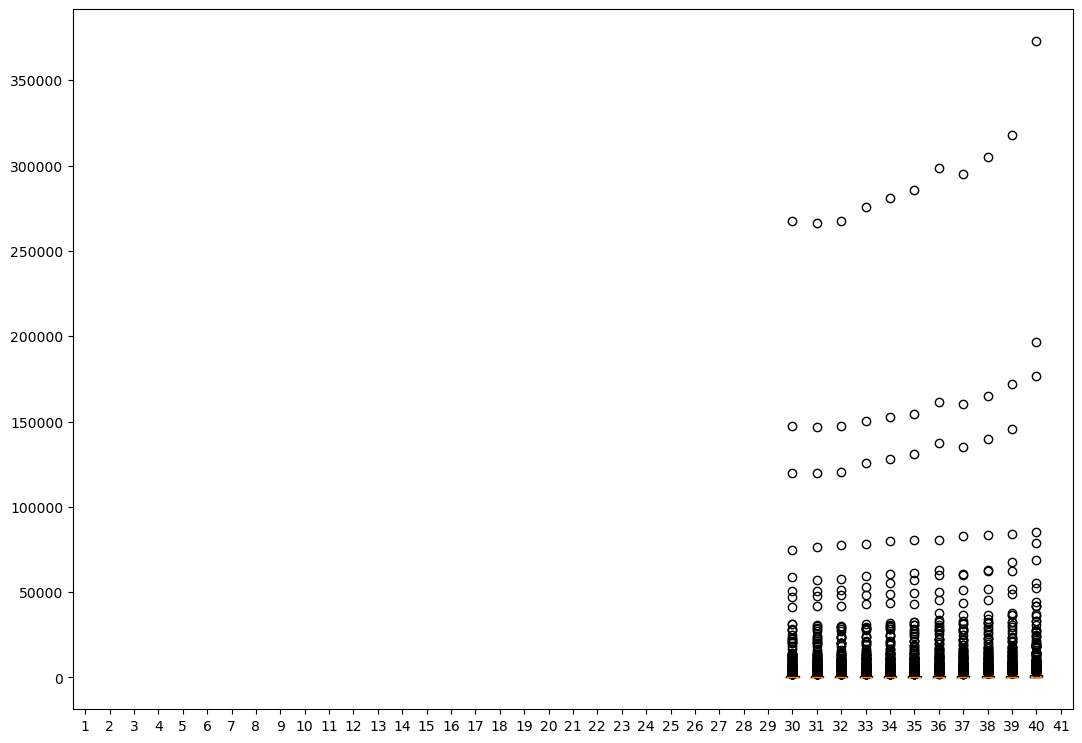

In [26]:
# 09.02.07.01
# boxplot
# dt01

np.random.seed(10)
dt01_death_cause_gend________00_rn_boxplot = [dt01_death_cause_gend________00_rn['1983'], dt01_death_cause_gend________00_rn['1984'], dt01_death_cause_gend________00_rn['1985'], dt01_death_cause_gend________00_rn['1986'], dt01_death_cause_gend________00_rn['1987'], dt01_death_cause_gend________00_rn['1988'], dt01_death_cause_gend________00_rn['1989'], dt01_death_cause_gend________00_rn['1990'], dt01_death_cause_gend________00_rn['1991'], dt01_death_cause_gend________00_rn['1992'], dt01_death_cause_gend________00_rn['1993'], dt01_death_cause_gend________00_rn['1994'], dt01_death_cause_gend________00_rn['1995'], dt01_death_cause_gend________00_rn['1996'], dt01_death_cause_gend________00_rn['1997'], dt01_death_cause_gend________00_rn['1998'], dt01_death_cause_gend________00_rn['1999'], dt01_death_cause_gend________00_rn['2000'], dt01_death_cause_gend________00_rn['2001'], dt01_death_cause_gend________00_rn['2002'], dt01_death_cause_gend________00_rn['2003'], dt01_death_cause_gend________00_rn['2004'], dt01_death_cause_gend________00_rn['2005'], dt01_death_cause_gend________00_rn['2006'], dt01_death_cause_gend________00_rn['2007'], dt01_death_cause_gend________00_rn['2008'], dt01_death_cause_gend________00_rn['2009'], dt01_death_cause_gend________00_rn['2010'], dt01_death_cause_gend________00_rn['2011'], dt01_death_cause_gend________00_rn['2012'], dt01_death_cause_gend________00_rn['2013'], dt01_death_cause_gend________00_rn['2014'], dt01_death_cause_gend________00_rn['2015'], dt01_death_cause_gend________00_rn['2016'], dt01_death_cause_gend________00_rn['2017'], dt01_death_cause_gend________00_rn['2018'], dt01_death_cause_gend________00_rn['2019'], dt01_death_cause_gend________00_rn['2020'], dt01_death_cause_gend________00_rn['2021'], dt01_death_cause_gend________00_rn['2022'], dt01_death_cause_gend________00_rn['unnamed_45']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(dt01_death_cause_gend________00_rn_boxplot)
plt.show()

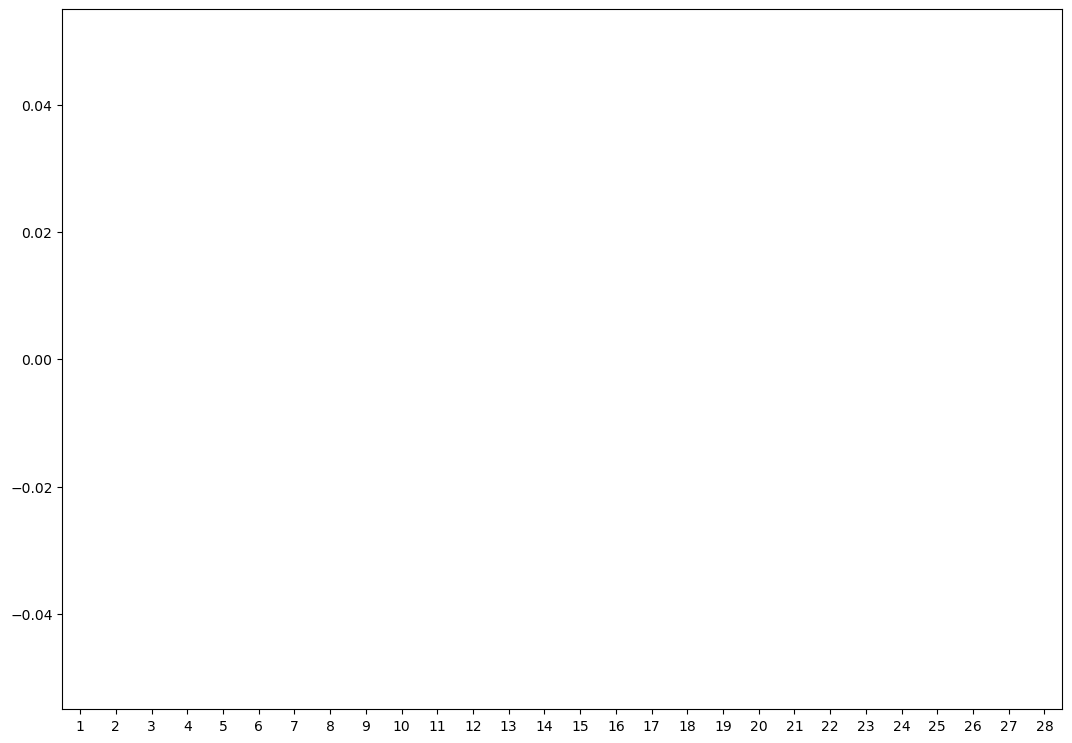

In [27]:
# 09.02.07.02
# boxplot
# dt02

np.random.seed(10)
dt02_death_cause_geo_________00_rn_boxplot = [dt02_death_cause_geo_________00_rn['1996'], dt02_death_cause_geo_________00_rn['1997'], dt02_death_cause_geo_________00_rn['1998'], dt02_death_cause_geo_________00_rn['1999'], dt02_death_cause_geo_________00_rn['2000'], dt02_death_cause_geo_________00_rn['2001'], dt02_death_cause_geo_________00_rn['2002'], dt02_death_cause_geo_________00_rn['2003'], dt02_death_cause_geo_________00_rn['2004'], dt02_death_cause_geo_________00_rn['2005'], dt02_death_cause_geo_________00_rn['2006'], dt02_death_cause_geo_________00_rn['2007'], dt02_death_cause_geo_________00_rn['2008'], dt02_death_cause_geo_________00_rn['2009'], dt02_death_cause_geo_________00_rn['2010'], dt02_death_cause_geo_________00_rn['2011'], dt02_death_cause_geo_________00_rn['2012'], dt02_death_cause_geo_________00_rn['2013'], dt02_death_cause_geo_________00_rn['2014'], dt02_death_cause_geo_________00_rn['2015'], dt02_death_cause_geo_________00_rn['2016'], dt02_death_cause_geo_________00_rn['2017'], dt02_death_cause_geo_________00_rn['2018'], dt02_death_cause_geo_________00_rn['2019'], dt02_death_cause_geo_________00_rn['2020'], dt02_death_cause_geo_________00_rn['2021'], dt02_death_cause_geo_________00_rn['2022'], dt02_death_cause_geo_________00_rn['unnamed_32']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(dt02_death_cause_geo_________00_rn_boxplot)
plt.show()

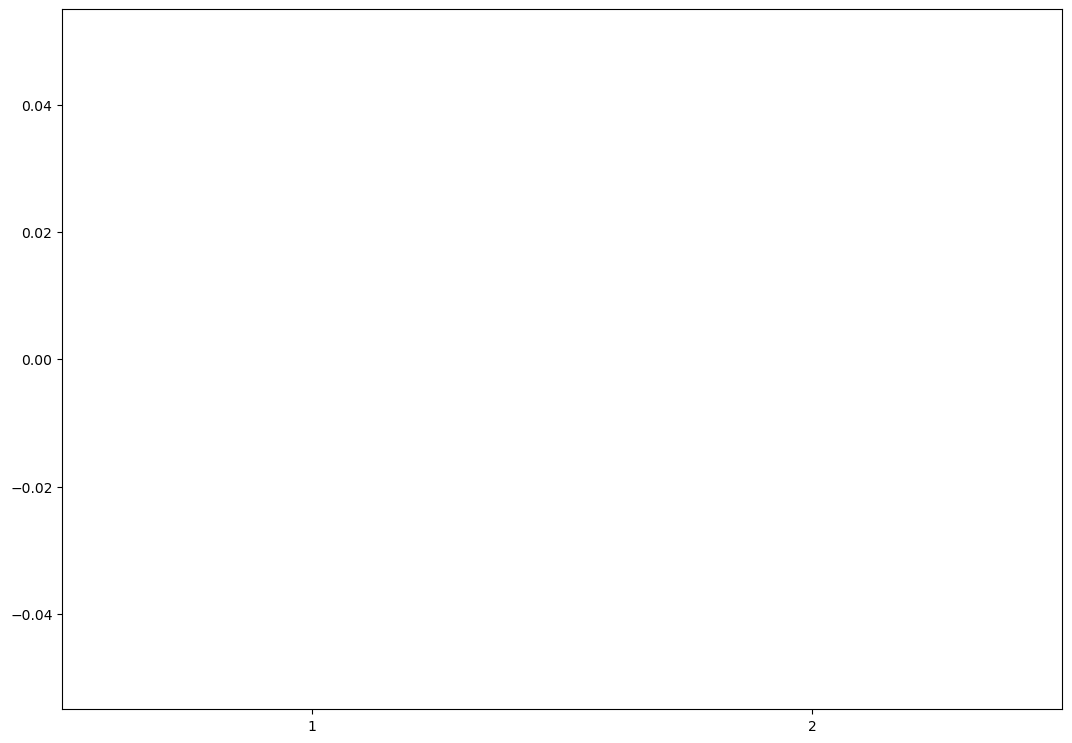

In [28]:
# 09.02.07.03
# boxplot
# dt03

np.random.seed(10)
dt03_who_suicide_____________00_rn_boxplot = [dt03_who_suicide_____________00_rn['suicides'], dt03_who_suicide_____________00_rn['population']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(dt03_who_suicide_____________00_rn_boxplot)
plt.show()

In [29]:
# 09.02.08.01
# confirm column names
# dt01

dt01_death_cause_gend________00_rn.columns

Index(['cause', 'gender', 'province', 'item', 'unit', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'unnamed_45'],
      dtype='object')

In [30]:
# 09.02.08.02
# confirm column names
# dt02

dt02_death_cause_geo_________00_rn.columns

Index(['cause', 'province', 'gender', 'item', 'unit', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', 'unnamed_32'],
      dtype='object')

In [31]:
# 09.02.08.03
# confirm column names
# dt03

dt03_who_suicide_____________00_rn.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [32]:
# 09.02.09.01
# function async
# dt01

def func_async(i, *args):
    return 2 * i

print(Parallel(n_jobs=2)(delayed(func_async)(21) for _ in range(1))[0])

42


In [33]:
# 09.02.09.02
# function mp
# dt01

if mp.get_start_method() != "spawn":
    def func_async(i, *args):
        return 2 * i

    with parallel_config('multiprocessing'):
        t_start = time.time()
        Parallel(n_jobs=2)(
            delayed(func_async)(21, dt01_death_cause_gend________00_rn) for _ in range(1))
        print("With multiprocessing backend and pickle serialization: {:.3f}s"
              .format(time.time() - t_start))

In [34]:
# 09.02.09.03
# set the `loky_pickler` to use pickle serialization from stdlib
# do not pass desired function ``func_async`` as it is not picklable
# replaced by ``id`` for demonstration purposes
# dt01

set_loky_pickler('pickle')
t_start = time.time()
Parallel(n_jobs=2)(delayed(id)(dt01_death_cause_gend________00_rn) for _ in range(1))
print("With pickle serialization: {:.3f}s".format(time.time() - t_start))

With pickle serialization: 1.949s


In [35]:
# 09.02.09.04
# function async
# dt01

def func_async(i, *args):
    return 2 * i

try:
    Parallel(n_jobs=2)(delayed(func_async)(21, dt01_death_cause_gend________00_rn) for _ in range(1))
except Exception:
    traceback.print_exc(file=sys.stdout)

joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/gimjun-won/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gimjun-won/anaconda3/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'func_async' on <module 'joblib.externals.loky.backend.popen_loky_posix' from '/Users/gimjun-won/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/backend/popen_loky_posix.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/var/folders/vb/3rppqxbs6y589jc4_y00n23h0000gn/T/ipykernel_2047/458441059.py", line 9, in <module>
    Parallel(n_jobs=2)(delayed(f

In [36]:
# 09.02.09.05
# function async wrapped
# dt01

@delayed
@wrap_non_picklable_objects
def func_async_wrapped(i, *args):
    return 2 * i

t_start = time.time()
Parallel(n_jobs=2)(func_async_wrapped(21, dt01_death_cause_gend________00_rn) for _ in range(1))
print("With pickle from stdlib and wrapper: {:.3f}s"
      .format(time.time() - t_start))

With pickle from stdlib and wrapper: 1.542s


In [37]:
# 09.02.09.06
# Reset loky_pickler to avoid border effects
# dt01

set_loky_pickler()

In [38]:
# 09.02.10.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt01

'''dt01_death_cause_gend________00_rn.insert(0, 'index', range(0, 0 + len(dt01_death_cause_gend________00_rn)))'''

"dt01_death_cause_gend________00_rn.insert(0, 'index', range(0, 0 + len(dt01_death_cause_gend________00_rn)))"

In [39]:
# 09.02.10.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt01

'''dt01_death_cause_gend________00_rn_dv = pd.get_dummies(dt01_death_cause_gend________00_rn, drop_first = True, dtype = int)'''

'dt01_death_cause_gend________00_rn_dv = pd.get_dummies(dt01_death_cause_gend________00_rn, drop_first = True, dtype = int)'

In [40]:
# 09.02.10.03
# preparing data for modeling
# split data
# select columns 
# dt01

'''dt01_x01 = dt01_death_cause_gend________00_rn_dv.drop(['2022'], axis = 1)
dt01_y01 = dt01_death_cause_gend________00_rn_dv['2022']'''

"dt01_x01 = dt01_death_cause_gend________00_rn_dv.drop(['2022'], axis = 1)\ndt01_y01 = dt01_death_cause_gend________00_rn_dv['2022']"

In [41]:
# 09.02.10.04
# preparing data for modeling
# split into train and test 
# dt01

'''dt01_x01_trn, dt01_x01_tst, dt01_y01_trn, dt01_y01_tst = train_test_split(dt01_x01, dt01_y01, test_size = 0.3, random_state = 0)'''

'dt01_x01_trn, dt01_x01_tst, dt01_y01_trn, dt01_y01_tst = train_test_split(dt01_x01, dt01_y01, test_size = 0.3, random_state = 0)'

In [42]:
# 09.02.10.05
# preparing data for modeling
# assign regression variable 
# dt01

'''dt01_lr01 = LinearRegression()'''

'dt01_lr01 = LinearRegression()'

In [43]:
# 09.02.10.06
# fit data for modeling
# fit variables to model
# dt01

'''dt01_lr01.fit(dt01_x01_trn, dt01_y01_trn)'''

'dt01_lr01.fit(dt01_x01_trn, dt01_y01_trn)'

In [44]:
# 09.02.10.07
# predict data for modeling
# fit variables to model
# dt01

'''dt01_y01_pdct = dt01_lr01.predict(dt01_x01_tst)'''

'dt01_y01_pdct = dt01_lr01.predict(dt01_x01_tst)'

In [45]:
# 09.02.10.08
# preparing data for modeling
# assign variable for rmse and r2
# dt01

'''dt01_rmse01 = np.sqrt(mean_squared_error(dt01_y01_tst, dt01_y01_pdct))
dt01_r201 = r2_score(dt01_y01_tst, dt01_y01_pdct)'''

'dt01_rmse01 = np.sqrt(mean_squared_error(dt01_y01_tst, dt01_y01_pdct))\ndt01_r201 = r2_score(dt01_y01_tst, dt01_y01_pdct)'

In [46]:
# 09.02.10.09
# run model
# return rmse and r2 dt01
# rmse:
# r2:
# dt01

'''print(f'rmse: {dt01_rmse01}')
print(f'r2: {dt01_r201}')'''

"print(f'rmse: {dt01_rmse01}')\nprint(f'r2: {dt01_r201}')"

In [47]:
# 09.02.10.10
# assign variable for pca
# dt01

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [48]:
# 09.02.10.11
# calculate pca
# dt01

'''pca.fit(dt01_x01_trn)
dt01_x01_pca_trn = pca.transform(dt01_x01_trn)
dt01_x01_pca_tst = pca.transform(dt01_x01_tst)'''

'pca.fit(dt01_x01_trn)\ndt01_x01_pca_trn = pca.transform(dt01_x01_trn)\ndt01_x01_pca_tst = pca.transform(dt01_x01_tst)'

In [49]:
# 09.02.10.12
# return pca calculation matrix
# dt01

'''print(f'features in pca matrix: {dt01_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt01_x01_pca_trn.shape[1]}')"

In [50]:
# 09.02.10.13
# assign variables for classification
# Accuracy: 0.944
# dt01

dt01_x01, dt01_y01 = make_classification(n_samples=10000, n_features=100, n_informative=50, n_redundant=50, random_state=1)
dt01_x01_trn, dt01_x01_tst, dt01_y01_trn, dt01_y01_tst = train_test_split(dt01_x01, dt01_y01, test_size=0.2, random_state=42)
dt01_model = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
dt01_model.fit(dt01_x01_trn, dt01_y01_trn)
dt01_y01_pdct = dt01_model.predict(dt01_x01_tst)
dt01_accuracy = accuracy_score(dt01_y01_tst, dt01_y01_pdct)
print(f'Accuracy: {dt01_accuracy:.3f}')

Accuracy: 0.944


In [51]:
# 09.02.11.01
# function async
# dt02

def func_async(i, *args):
    return 2 * i

print(Parallel(n_jobs=2)(delayed(func_async)(21) for _ in range(1))[0])

42


In [52]:
# 09.02.11.02
# function mp
# dt02

if mp.get_start_method() != "spawn":
    def func_async(i, *args):
        return 2 * i

    with parallel_config('multiprocessing'):
        t_start = time.time()
        Parallel(n_jobs=2)(
            delayed(func_async)(21, dt02_death_cause_geo_________00_rn) for _ in range(1))
        print("With multiprocessing backend and pickle serialization: {:.3f}s"
              .format(time.time() - t_start))

In [53]:
# 09.02.11.03
# set the `loky_pickler` to use pickle serialization from stdlib
# do not pass desired function ``func_async`` as it is not picklable
# replaced by ``id`` for demonstration purposes
# dt02

set_loky_pickler('pickle')
t_start = time.time()
Parallel(n_jobs=2)(delayed(id)(dt02_death_cause_geo_________00_rn) for _ in range(1))
print("With pickle serialization: {:.3f}s".format(time.time() - t_start))

With pickle serialization: 0.007s


In [54]:
# 09.02.11.04
# function async
# dt02

def func_async(i, *args):
    return 2 * i

try:
    Parallel(n_jobs=2)(delayed(func_async)(21, dt02_death_cause_geo_________00_rn) for _ in range(1))
except Exception:
    traceback.print_exc(file=sys.stdout)

joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/gimjun-won/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gimjun-won/anaconda3/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'func_async' on <module 'joblib.externals.loky.backend.popen_loky_posix' from '/Users/gimjun-won/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/backend/popen_loky_posix.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/var/folders/vb/3rppqxbs6y589jc4_y00n23h0000gn/T/ipykernel_2047/860862541.py", line 9, in <module>
    Parallel(n_jobs=2)(delayed(f

In [55]:
# 09.02.11.05
# function async wrapped
# dt01

@delayed
@wrap_non_picklable_objects
def func_async_wrapped(i, *args):
    return 2 * i

t_start = time.time()
Parallel(n_jobs=2)(func_async_wrapped(21, dt02_death_cause_geo_________00_rn) for _ in range(1))
print("With pickle from stdlib and wrapper: {:.3f}s"
      .format(time.time() - t_start))

With pickle from stdlib and wrapper: 1.464s


In [56]:
# 09.02.11.06
# Reset loky_pickler to avoid border effects
# dt02

set_loky_pickler()

In [57]:
# 09.02.12.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt02

'''dt02_death_cause_geo_________00_rn.insert(0, 'index', range(0, 0 + len(dt02_death_cause_geo_________00_rn)))'''

"dt02_death_cause_geo_________00_rn.insert(0, 'index', range(0, 0 + len(dt02_death_cause_geo_________00_rn)))"

In [58]:
# 09.02.12.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt02

'''dt02_death_cause_geo_________00_rn_dv = pd.get_dummies(dt02_death_cause_geo_________00_rn, drop_first = True, dtype = int)'''

'dt02_death_cause_geo_________00_rn_dv = pd.get_dummies(dt02_death_cause_geo_________00_rn, drop_first = True, dtype = int)'

In [59]:
# 09.02.12.03
# preparing data for modeling
# split data
# select columns 
# dt02

'''dt02_x01 = dt02_death_cause_geo_________00_rn_dv.drop(['2022'], axis = 1)
dt02_y01 = dt02_death_cause_geo_________00_rn_dv['2022']'''

"dt02_x01 = dt02_death_cause_geo_________00_rn_dv.drop(['2022'], axis = 1)\ndt02_y01 = dt02_death_cause_geo_________00_rn_dv['2022']"

In [60]:
# 09.02.12.04
# preparing data for modeling
# split into train and test 
# dt02

'''dt02_x01_trn, dt02_x01_tst, dt02_y01_trn, dt02_y01_tst = train_test_split(dt02_x01, dt02_y01, test_size = 0.3, random_state = 0)'''

'dt02_x01_trn, dt02_x01_tst, dt02_y01_trn, dt02_y01_tst = train_test_split(dt02_x01, dt02_y01, test_size = 0.3, random_state = 0)'

In [61]:
# 09.02.12.05
# preparing data for modeling
# assign regression variable 
# dt02

'''dt02_lr01 = LinearRegression()'''

'dt02_lr01 = LinearRegression()'

In [62]:
# 09.02.12.06
# fit data for modeling
# fit variables to model
# dt02

'''dt02_lr01.fit(dt02_x01_trn, dt02_y01_trn)'''

'dt02_lr01.fit(dt02_x01_trn, dt02_y01_trn)'

In [63]:
# 09.02.12.07
# predict data for modeling
# fit variables to model
# dt02

'''dt02_y01_pdct = dt02_lr01.predict(dt02_x01_tst)'''

'dt02_y01_pdct = dt02_lr01.predict(dt02_x01_tst)'

In [64]:
# 09.02.12.08
# preparing data for modeling
# assign variable for rmse and r2
# dt02

'''dt02_rmse01 = np.sqrt(mean_squared_error(dt02_y01_tst, dt02_y01_pdct))
dt02_r201 = r2_score(dt02_y01_tst, dt02_y01_pdct)'''

'dt02_rmse01 = np.sqrt(mean_squared_error(dt02_y01_tst, dt02_y01_pdct))\ndt02_r201 = r2_score(dt02_y01_tst, dt02_y01_pdct)'

In [65]:
# 09.02.12.09
# run model
# return rmse and r2 dt02
# rmse:
# r2:
# dt02

'''print(f'rmse: {dt02_rmse01}')
print(f'r2: {dt02_r201}')'''

"print(f'rmse: {dt02_rmse01}')\nprint(f'r2: {dt02_r201}')"

In [66]:
# 09.02.12.10
# assign variable for pca
# dt02

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [67]:
# 09.02.12.11
# calculate pca
# dt02

'''pca.fit(dt02_x01_trn)
dt01_x02_pca_trn = pca.transform(dt02_x01_trn)
dt01_x02_pca_tst = pca.transform(dt02_x01_tst)'''

'pca.fit(dt02_x01_trn)\ndt01_x02_pca_trn = pca.transform(dt02_x01_trn)\ndt01_x02_pca_tst = pca.transform(dt02_x01_tst)'

In [68]:
# 09.02.12.12
# return pca calculation matrix
# dt02

'''print(f'features in pca matrix: {dt02_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt02_x01_pca_trn.shape[1]}')"

In [69]:
# 09.02.12.13
# assign variables for classification
# Accuracy: 0.944
# dt02

dt02_x01, dt02_y01 = make_classification(n_samples=10000, n_features=100, n_informative=50, n_redundant=50, random_state=1)
dt02_x01_trn, dt02_x01_tst, dt02_y01_trn, dt02_y01_tst = train_test_split(dt02_x01, dt02_y01, test_size=0.2, random_state=42)
dt02_model = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
dt02_model.fit(dt02_x01_trn, dt02_y01_trn)
dt02_y01_pdct = dt02_model.predict(dt02_x01_tst)
dt02_accuracy = accuracy_score(dt02_y01_tst, dt02_y01_pdct)
print(f'Accuracy: {dt02_accuracy:.3f}')

Accuracy: 0.944


In [70]:
# 09.02.13.01
# function async
# dt03

def func_async(i, *args):
    return 2 * i

print(Parallel(n_jobs=2)(delayed(func_async)(21) for _ in range(1))[0])

42


In [71]:
# 09.02.13.02
# function mp
# dt03

if mp.get_start_method() != "spawn":
    def func_async(i, *args):
        return 2 * i

    with parallel_config('multiprocessing'):
        t_start = time.time()
        Parallel(n_jobs=2)(
            delayed(func_async)(21, dt03_who_suicide_____________00_rn) for _ in range(1))
        print("With multiprocessing backend and pickle serialization: {:.3f}s"
              .format(time.time() - t_start))

In [72]:
# 09.02.13.03
# set the `loky_pickler` to use pickle serialization from stdlib
# do not pass desired function ``func_async`` as it is not picklable
# replaced by ``id`` for demonstration purposes
# dt03

set_loky_pickler('pickle')
t_start = time.time()
Parallel(n_jobs=2)(delayed(id)(dt03_who_suicide_____________00_rn) for _ in range(1))
print("With pickle serialization: {:.3f}s".format(time.time() - t_start))

With pickle serialization: 0.056s


In [73]:
# 09.02.13.04
# function async
# dt03

def func_async(i, *args):
    return 2 * i

try:
    Parallel(n_jobs=2)(delayed(func_async)(21, dt03_who_suicide_____________00_rn) for _ in range(1))
except Exception:
    traceback.print_exc(file=sys.stdout)

joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/gimjun-won/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gimjun-won/anaconda3/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'func_async' on <module 'joblib.externals.loky.backend.popen_loky_posix' from '/Users/gimjun-won/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/backend/popen_loky_posix.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/var/folders/vb/3rppqxbs6y589jc4_y00n23h0000gn/T/ipykernel_2047/2013410489.py", line 9, in <module>
    Parallel(n_jobs=2)(delayed(

In [74]:
# 09.02.13.05
# function async wrapped
# dt01

@delayed
@wrap_non_picklable_objects
def func_async_wrapped(i, *args):
    return 2 * i

t_start = time.time()
Parallel(n_jobs=2)(func_async_wrapped(21, dt03_who_suicide_____________00_rn) for _ in range(1))
print("With pickle from stdlib and wrapper: {:.3f}s"
      .format(time.time() - t_start))

With pickle from stdlib and wrapper: 3.535s


In [75]:
# 09.02.13.06
# Reset loky_pickler to avoid border effects
# dt03

set_loky_pickler()

In [76]:
# 09.02.14.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt03

'''dt03_who_suicide_____________00_rn.insert(0, 'index', range(0, 0 + len(dt03_who_suicide_____________00_rn)))'''

"dt03_who_suicide_____________00_rn.insert(0, 'index', range(0, 0 + len(dt03_who_suicide_____________00_rn)))"

In [77]:
# 09.02.14.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt03

'''dt03_who_suicide_____________00_rn_dv = pd.get_dummies(dt03_who_suicide_____________00_rn, drop_first = True, dtype = int)'''

'dt03_who_suicide_____________00_rn_dv = pd.get_dummies(dt03_who_suicide_____________00_rn, drop_first = True, dtype = int)'

In [78]:
# 09.02.14.03
# preparing data for modeling
# split data
# select columns 
# dt03

'''dt03_x01 = dt03_who_suicide_____________00_rn_dv.drop(['suicides'], axis = 1)
dt03_y01 = dt03_who_suicide_____________00_rn_dv['suicides']'''

"dt03_x01 = dt03_who_suicide_____________00_rn_dv.drop(['suicides'], axis = 1)\ndt03_y01 = dt03_who_suicide_____________00_rn_dv['suicides']"

In [79]:
# 09.02.14.04
# preparing data for modeling
# split into train and test 
# dt03

'''dt03_x01_trn, dt03_x01_tst, dt03_y01_trn, dt03_y01_tst = train_test_split(dt03_x01, dt03_y01, test_size = 0.3, random_state = 0)'''

'dt03_x01_trn, dt03_x01_tst, dt03_y01_trn, dt03_y01_tst = train_test_split(dt03_x01, dt03_y01, test_size = 0.3, random_state = 0)'

In [80]:
# 09.02.14.05
# preparing data for modeling
# assign regression variable 
# dt03

'''dt03_lr01 = LinearRegression()'''

'dt03_lr01 = LinearRegression()'

In [81]:
# 09.02.14.06
# fit data for modeling
# fit variables to model
# dt03

'''dt03_lr01.fit(dt03_x01_trn, dt03_y01_trn)'''

'dt03_lr01.fit(dt03_x01_trn, dt03_y01_trn)'

In [82]:
# 09.02.14.07
# predict data for modeling
# fit variables to model
# dt03

'''dt03_y01_pdct = dt03_lr01.predict(dt03_x01_tst)'''

'dt03_y01_pdct = dt03_lr01.predict(dt03_x01_tst)'

In [83]:
# 09.02.14.08
# preparing data for modeling
# assign variable for rmse and r2
# dt03

'''dt03_rmse01 = np.sqrt(mean_squared_error(dt03_y01_tst, dt03_y01_pdct))
dt03_r201 = r2_score(dt03_y01_tst, dt03_y01_pdct)'''

'dt03_rmse01 = np.sqrt(mean_squared_error(dt03_y01_tst, dt03_y01_pdct))\ndt03_r201 = r2_score(dt03_y01_tst, dt03_y01_pdct)'

In [84]:
# 09.02.14.09
# run model
# return rmse and r2 dt03
# rmse:
# r2:
# dt03

'''print(f'rmse: {dt03_rmse01}')
print(f'r2: {dt03_r201}')'''

"print(f'rmse: {dt03_rmse01}')\nprint(f'r2: {dt03_r201}')"

In [85]:
# 09.02.14.10
# assign variable for pca
# dt03

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [86]:
# 09.02.14.11
# calculate pca
# dt03

'''pca.fit(dt03_x01_trn)
dt03_x01_pca_trn = pca.transform(dt03_x01_trn)
dt03_x01_pca_tst = pca.transform(dt03_x01_tst)'''

'pca.fit(dt03_x01_trn)\ndt03_x01_pca_trn = pca.transform(dt03_x01_trn)\ndt03_x01_pca_tst = pca.transform(dt03_x01_tst)'

In [87]:
# 09.02.14.12
# return pca calculation matrix
# dt03

'''print(f'features in pca matrix: {dt03_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt03_x01_pca_trn.shape[1]}')"

In [88]:
# 09.02.14.13
# assign variables for classification
# Accuracy: 0.944
# dt03

dt03_x01, dt03_y01 = make_classification(n_samples=10000, n_features=100, n_informative=50, n_redundant=50, random_state=1)
dt03_x01_trn, dt03_x01_tst, dt03_y01_trn, dt03_y01_tst = train_test_split(dt03_x01, dt03_y01, test_size=0.2, random_state=42)
dt03_model = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
dt03_model.fit(dt03_x01_trn, dt03_y01_trn)
dt03_y01_pdct = dt03_model.predict(dt03_x01_tst)
dt03_accuracy = accuracy_score(dt03_y01_tst, dt03_y01_pdct)
print(f'Accuracy: {dt03_accuracy:.3f}')

Accuracy: 0.944


# milestone three

In [89]:
# 10.02.01.01
# read csv
# assign variable
# dt04

dt04_combined________________00 = pd.read_csv('combined_processed_data.csv')

In [90]:
# 10.02.01.02
# read csv
# assign variable
# dt05

dt05_stress_general__________00 = pd.read_csv('Degree_of_Stress__General_Life__13_years_old_and_over__20240719092712.csv')

In [91]:
# 10.02.01.03
# read csv
# assign variable
# dt06

dt06_stress_home_____________00 = pd.read_csv('Degree_of_Stress__Home_Life__13_years_old_and_over__20240719092914.csv')

In [92]:
# 10.02.01.04
# read csv
# assign variable
# dt07

dt07_stress_school___________00 = pd.read_csv('Degree_of_Stress__School_Life__13_years_old_and_over__20240719092757.csv', encoding = 'unicode_escape')

In [93]:
# 10.02.01.05
# read csv
# assign variable
# dt08

dt08_stress_work_____________00 = pd.read_csv('Degree_of_Stress__Work_Life__13_years_old_and_over__20240719092838.csv')

In [94]:
# 10.02.01.06
# read csv
# assign variable
# dt09

dt09_drinking_19_____________00 = pd.read_csv('Drinking__19_years_old_and_over__20240719093320.csv')

In [95]:
# 10.02.01.07
# read csv
# assign variable
# dt10

dt10_drinking_20_____________00 = pd.read_csv('Drinking__20_years_old_and_over__20240719093241.csv')

In [96]:
# 10.02.01.08
# read csv
# assign variable
# dt11

dt11_drinking_manage_19______00 = pd.read_csv('Drinking_and_Health_Management__19_years_old_and_over__20240719093528.csv')

In [97]:
# 10.02.01.09
# read csv
# assign variable
# dt12

dt12_drinking_manage_20______00 = pd.read_csv('Drinking_and_Health_Management__20_years_old_and_over__20240719093453.csv')

In [98]:
# 10.02.01.09
# read csv
# assign variable
# dt13

dt13_suicide_impulse_________00 = pd.read_csv('Impulse_to_Commit_Suicide_and_Reasons__13_years_old_and_over__20240719092337.csv')

In [99]:
# 10.02.01.10
# read csv
# assign variable
# dt14

dt14_suicide_impulse_________00 = pd.read_csv('Impulse_to_Commit_Suicide_and_Reasons__13_years_old_and_over__20240719092337.csv')

In [100]:
# 10.02.01.11
# read csv
# assign variable
# dt15

dt15_suicide_reason__________00 = pd.read_csv('Reason_and_Attempt_to_Think_Suicide_by_General_Feature_of_older_persons_Over_65_Years_Old__20240719092517.csv', encoding = 'unicode_escape')

In [101]:
# 10.02.01.12
# read csv
# assign variable
# dt16

dt16_suicide_reason__________00 = pd.read_csv('Reason_and_Attempt_to_Think_Suicide_by_General_Feature_of_older_persons_Over_65_Years_Old__20240719092517.csv', encoding = 'unicode_escape')

In [102]:
# 10.02.01.13
# read csv
# assign variable
# dt17

dt17_smoke_drink_19__________00 = pd.read_csv('Smoking_and_Drinking__19_years_old_and_over__20240719093138.csv')

In [103]:
# 10.02.01.14
# read csv
# assign variable
# dt18

dt18_smoke_drink_20__________00 = pd.read_csv('Smoking_and_Drinking__20_years_old_and_over__20240719093056.csv')

In [104]:
# 10.02.01.15
# read csv
# assign variable
# dt19

dt19_ph_categories___________00 = pd.read_csv('ph_categories_index.csv')

In [105]:
# 10.02.01.16
# read csv
# assign variable
# dt20

'''dt20_ph_analysis_____________00 = pd.read_excel('ph_Pornhub Analysis year by year.xlsx')'''

"dt20_ph_analysis_____________00 = pd.read_excel('ph_Pornhub Analysis year by year.xlsx')"

In [106]:
# 10.02.01.17
# read csv
# assign variable
# dt21

dt21_ph_videos_______________00 = pd.read_csv('ph_videos.csv')

In [107]:
'''spark = SparkSession.builder.appName("LargeFileProcessing").getOrCreate()
dt19_pornhub_________________00 = spark.read.csv("pornhub.com-db.csv", header=True, inferSchema=True)
dt19_pornhub_________________00 = data.repartition(10)
dt19_pornhub_________________00_ft = dt19_pornhub_________________00.filter(dt19_pornhub_________________00["column1"] > 10).select("column2", "column3")
dt19_pornhub_________________00_ft.show(truncate=False)
dt19_pornhub_________________00_ft.write.parquet("processed_data.parquet")
spark.stop()'''

'spark = SparkSession.builder.appName("LargeFileProcessing").getOrCreate()\ndt19_pornhub_________________00 = spark.read.csv("pornhub.com-db.csv", header=True, inferSchema=True)\ndt19_pornhub_________________00 = data.repartition(10)\ndt19_pornhub_________________00_ft = dt19_pornhub_________________00.filter(dt19_pornhub_________________00["column1"] > 10).select("column2", "column3")\ndt19_pornhub_________________00_ft.show(truncate=False)\ndt19_pornhub_________________00_ft.write.parquet("processed_data.parquet")\nspark.stop()'

In [108]:
'''spark = SparkSession.builder \
    .appName("LargeCSVProcessing") \
    .getOrCreate()
csv_file_path = "pornhub.com-db.csv"
dt19_pornhub_________________00 = spark.read \
    .format("csv") \
    .option("header", "true") \
    .load(csv_file_path)'''

'spark = SparkSession.builder     .appName("LargeCSVProcessing")     .getOrCreate()\ncsv_file_path = "pornhub.com-db.csv"\ndt19_pornhub_________________00 = spark.read     .format("csv")     .option("header", "true")     .load(csv_file_path)'

In [109]:
'''def read_csv(csv:str, sep:str=',') -> list[str]:
    f = open(csv)
    for row in f:
        yield row.strip().split(sep)

for row in read_csv("pornhub.com-db.csv"):
    process(row)'''

'def read_csv(csv:str, sep:str=\',\') -> list[str]:\n    f = open(csv)\n    for row in f:\n        yield row.strip().split(sep)\n\nfor row in read_csv("pornhub.com-db.csv"):\n    process(row)'

In [110]:
'''dt19_pornhub_________________00 = (row for row in open("pornhub.com-db.csv"))

for row in dt19_pornhub_________________00:
    process(row)'''

'dt19_pornhub_________________00 = (row for row in open("pornhub.com-db.csv"))\n\nfor row in dt19_pornhub_________________00:\n    process(row)'

In [111]:
'''csv_file_name = "large_csv_file.csv"

spark = SparkSession.builder.appName("pornhub.com-db.csv").getOrCreate()
dt19_pornhub_________________00 = spark.read.csv(csv_file_name, header=True)'''

'csv_file_name = "large_csv_file.csv"\n\nspark = SparkSession.builder.appName("pornhub.com-db.csv").getOrCreate()\ndt19_pornhub_________________00 = spark.read.csv(csv_file_name, header=True)'

In [112]:
'''s_time_dask = time.time()
dt19_pornhub_________________00 = df1.read_csv('pornhub.com-db.csv', on_bad_lines='skip')
e_time_dask = time.time()
print("Read with dask: ", (e_time_dask-s_time_dask), "seconds")
, sep=',', encoding='utf-8', on_bad_lines='skip', quoting=csv.QUOTE_NONE, quotechar='"'
, quoting=csv.QUOTE_NONE, quotechar='"'
'''

's_time_dask = time.time()\ndt19_pornhub_________________00 = df1.read_csv(\'pornhub.com-db.csv\', on_bad_lines=\'skip\')\ne_time_dask = time.time()\nprint("Read with dask: ", (e_time_dask-s_time_dask), "seconds")\n, sep=\',\', encoding=\'utf-8\', on_bad_lines=\'skip\', quoting=csv.QUOTE_NONE, quotechar=\'"\'\n, quoting=csv.QUOTE_NONE, quotechar=\'"\'\n'

In [113]:
# 10.02.01.18
# read csv
# assign variable
# dt22

'''s_time_chunk = time.time()
chunk = pd.read_csv('pornhub.com-db.csv', on_bad_lines='skip', chunksize=100)
e_time_chunk = time.time()'''

"s_time_chunk = time.time()\nchunk = pd.read_csv('pornhub.com-db.csv', on_bad_lines='skip', chunksize=100)\ne_time_chunk = time.time()"

In [114]:
# 10.02.01.19
# read csv
# return time
# dt22

'''print("With chunks: ", (e_time_chunk-s_time_chunk), "sec")'''

'print("With chunks: ", (e_time_chunk-s_time_chunk), "sec")'

In [115]:
# 10.02.01.20
# read csv
# concatenate chunks
# dt22

'''dt22_ph_tot__________________00 = pd.concat(chunk)'''

'dt22_ph_tot__________________00 = pd.concat(chunk)'

In [116]:
# 10.02.01.21
# read csv
# return sample
# dt22

'''dt22_ph_tot__________________00.sample(10)'''

'dt22_ph_tot__________________00.sample(10)'

In [117]:
# 10.02.02.01
# return first and last ten rows
# dt04

print(dt04_combined________________00.head(10))
print(dt04_combined________________00.tail(10))

  Region Name  ... Death rate per 100 000 population
0      Africa  ...                          0.000000
1      Africa  ...                          0.000000
2      Africa  ...                          2.395998
3      Africa  ...                         28.024735
4      Africa  ...                          0.074515
5      Africa  ...                          0.133735
6      Africa  ...                          0.132515
7      Africa  ...                          0.104396
8      Africa  ...                          0.024010
9      Africa  ...                          0.094178

[10 rows x 27 columns]
     Region Name  ... Death rate per 100 000 population
9528     Oceania  ...                          5.970159
9529     Oceania  ...                         17.320801
9530     Oceania  ...                          5.535677
9531     Oceania  ...                         17.160208
9532     Oceania  ...                          4.945755
9533     Oceania  ...                         16.744376
9

In [118]:
# 10.02.02.02
# return first and last ten rows
# dt05

print(dt05_stress_general__________00.head(10))
print(dt05_stress_general__________00.tail(10))

   By city & province(1)                         Type(1)  ... 2022.3 2022.4
0  By city & province(1)                         Type(1)  ...   Weak    NaN
1          Whole country                           Total  ...   44.2   10.8
2          Whole country  Total for Dongs, Eups & Myeons  ...   43.7   10.2
3          Whole country  Total for Dongs, Eups & Myeons  ...   46.7   13.7
4          Whole country                          Gender  ...   46.0   11.7
5          Whole country                          Gender  ...   42.5   10.0
6          Whole country               Type of Household  ...   44.2   15.2
7          Whole country               Type of Household  ...   49.7   11.4
8          Whole country               Type of Household  ...   42.0    9.4
9          Whole country               Type of Household  ...   43.9   10.8

[10 rows x 43 columns]
    By city & province(1)                             Type(1)  ... 2022.3 2022.4
91          Whole country                          Cigarett

In [119]:
# 10.02.02.03
# return first and last ten rows
# dt06

print(dt06_stress_home_____________00.head(10))
print(dt06_stress_home_____________00.tail(10))

   By city & province(1)                         Type(1)  ... 2022.3 2022.4
0  By city & province(1)                         Type(1)  ...   Weak    NaN
1          Whole country                           Total  ...   47.1   17.9
2          Whole country  Total for Dongs, Eups & Myeons  ...   46.8   17.5
3          Whole country  Total for Dongs, Eups & Myeons  ...   48.7   20.0
4          Whole country                          Gender  ...   50.2   20.5
5          Whole country                          Gender  ...   44.1   15.3
6          Whole country               Type of Household  ...   46.8   26.7
7          Whole country               Type of Household  ...   51.3   17.5
8          Whole country               Type of Household  ...   45.7   15.8
9          Whole country               Type of Household  ...   44.8   15.2

[10 rows x 43 columns]
    By city & province(1)                             Type(1)  ... 2022.3 2022.4
91          Whole country                          Cigarett

In [120]:
# 10.02.02.04
# return first and last ten rows
# dt07

print(dt07_stress_school___________00.head(10))
print(dt07_stress_school___________00.tail(10))

   By city & province(1)                         Type(1)  ... 2022.3 2022.4
0  By city & province(1)                         Type(1)  ...   Weak    NaN
1          Whole country                           Total  ...   43.5   20.8
2          Whole country  Total for Dongs, Eups & Myeons  ...   43.5   20.3
3          Whole country  Total for Dongs, Eups & Myeons  ...   43.6   24.1
4          Whole country                          Gender  ...   45.3   22.8
5          Whole country                          Gender  ...   41.5   18.7
6          Whole country                      Generation  ...   41.9   21.7
7          Whole country                      Generation  ...   41.7   34.5
8          Whole country                      Generation  ...   43.6   19.7
9          Whole country                      Generation  ...   44.9   21.7

[10 rows x 43 columns]
   By city & province(1)                           Type(1)  ... 2022.3 2022.4
19         Whole country           Satisfaction with Life   ..

In [121]:
# 10.02.02.05
# return first and last ten rows
# dt08

print(dt08_stress_work_____________00.head(10))
print(dt08_stress_work_____________00.tail(10))

   By city & province(1)                         Type(1)  ... 2022.3 2022.4
0  By city & province(1)                         Type(1)  ...   Weak    NaN
1          Whole country                           Total  ...   29.9    7.9
2          Whole country  Total for Dongs, Eups & Myeons  ...   28.6    7.0
3          Whole country  Total for Dongs, Eups & Myeons  ...   35.4   11.8
4          Whole country                          Gender  ...   30.0    7.9
5          Whole country                          Gender  ...   29.8    8.0
6          Whole country                      Generation  ...   32.9   10.7
7          Whole country                      Generation  ...   33.7    9.6
8          Whole country                      Generation  ...   27.6    6.6
9          Whole country                      Generation  ...   29.8    6.3

[10 rows x 43 columns]
   By city & province(1)                             Type(1)  ... 2022.3 2022.4
76         Whole country                          Cigarettes

In [122]:
# 10.02.02.06
# return first and last ten rows
# dt09

print(dt09_drinking_19_____________00.head(10))
print(dt09_drinking_19_____________00.tail(10))

   By city & province(1)  ...   2018.9
0  By city & province(1)  ...  - Never
1          Whole country  ...     54.4
2          Whole country  ...     53.2
3          Whole country  ...     58.8
4          Whole country  ...     36.6
5          Whole country  ...     62.8
6          Whole country  ...     58.7
7          Whole country  ...     46.2
8          Whole country  ...     49.3
9          Whole country  ...     54.5

[10 rows x 23 columns]
   By city & province(1)                             Type(1)  ... 2018.8 2018.9
70         Whole country          Age*Educational Attainment  ...   47.1   52.9
71         Whole country          Age*Educational Attainment  ...   45.5   54.5
72         Whole country          Age*Educational Attainment  ...   41.0   59.0
73         Whole country          Age*Educational Attainment  ...   45.2   54.8
74         Whole country          Age*Educational Attainment  ...   50.1   49.9
75         Whole country          Age*Educational Attainment  ...  

In [123]:
# 10.02.02.07
# return first and last ten rows
# dt10

print(dt10_drinking_20_____________00.head(10))
print(dt10_drinking_20_____________00.tail(10))

   By city & province(1)  ...   2014.9
0  By city & province(1)  ...  - Never
1          Whole country  ...     57.0
2          Whole country  ...     56.3
3          Whole country  ...     59.5
4          Whole country  ...     38.4
5          Whole country  ...     64.7
6          Whole country  ...     54.8
7          Whole country  ...     52.0
8          Whole country  ...     55.7
9          Whole country  ...     57.8

[10 rows x 43 columns]
   By city & province(1)                     Type(1)  ... 2014.8 2014.9
63         Whole country  Age*Educational Attainment  ...   47.4   52.6
64         Whole country  Age*Educational Attainment  ...   41.5   58.5
65         Whole country  Age*Educational Attainment  ...   42.5   57.5
66         Whole country  Age*Educational Attainment  ...   42.7   57.3
67         Whole country  Age*Educational Attainment  ...   38.8   61.2
68         Whole country  Age*Educational Attainment  ...   47.3   52.7
69         Whole country  Age*Educational A

In [124]:
# 10.02.02.08
# return first and last ten rows
# dt11

print(dt11_drinking_manage_19______00.head(10))
print(dt11_drinking_manage_19______00.tail(10))

   By city & province(1)  ...                       2018.8
0  By city & province(1)  ...  Get a regular check up-Dont
1          Whole country  ...                         20.5
2          Whole country  ...                         21.6
3          Whole country  ...                         18.5
4          Whole country  ...                         19.5
5          Whole country  ...                         17.7
6          Whole country  ...                         22.8
7          Whole country  ...                         22.9
8          Whole country  ...                         20.2
9          Whole country  ...                         18.7

[10 rows x 21 columns]
   By city & province(1)                 Type(1)  ... 2018.7 2018.8
1          Whole country                   Total  ...   79.5   20.5
2          Whole country                Drinking  ...   78.4   21.6
3          Whole country                Drinking  ...   81.5   18.5
4          Whole country                Drinking  ...  

In [125]:
# 10.02.02.09
# return first and last ten rows
# dt12

print(dt12_drinking_manage_20______00.head(10))
print(dt12_drinking_manage_20______00.tail(10))

   By city & province(1)  ...                        2014.8
0  By city & province(1)  ...  Get a regular check up-Don't
1          Whole country  ...                          38.6
2          Whole country  ...                          41.4
3          Whole country  ...                          33.4
4          Whole country  ...                          33.3
5          Whole country  ...                          33.4
6          Whole country  ...                          41.8
7          Whole country  ...                          40.9
8          Whole country  ...                          42.2
9          Whole country  ...                          39.6

[10 rows x 39 columns]
   By city & province(1)                 Type(1)  ... 2014.7 2014.8
1          Whole country                   Total  ...   61.4   38.6
2          Whole country                Drinking  ...   58.6   41.4
3          Whole country                Drinking  ...   66.6   33.4
4          Whole country                Drin

In [126]:
# 10.02.02.10
# return first and last ten rows
# dt13

print(dt13_suicide_impulse_________00.head(10))
print(dt13_suicide_impulse_________00.tail(10))

   By city & province(1)                         Type(1)  ...  2022.11      2022.12
0  By city & province(1)                         Type(1)  ...  -Others  Didn't feel
1          Whole country                           Total  ...      2.6         94.3
2          Whole country  Total for Dongs, Eups & Myeons  ...      2.6         94.1
3          Whole country  Total for Dongs, Eups & Myeons  ...      2.8         95.4
4          Whole country                          Gender  ...      2.5         95.1
5          Whole country                          Gender  ...      2.7         93.6
6          Whole country               Type of Household  ...      3.0         92.1
7          Whole country               Type of Household  ...      1.8         95.5
8          Whole country               Type of Household  ...      2.7         94.5
9          Whole country               Type of Household  ...      3.7         93.8

[10 rows x 107 columns]
   By city & province(1)                 Type(1)  .

In [127]:
# 10.02.02.11
# return first and last ten rows
# dt14

print(dt14_suicide_impulse_________00.head(10))
print(dt14_suicide_impulse_________00.tail(10))

   By city & province(1)                         Type(1)  ...  2022.11      2022.12
0  By city & province(1)                         Type(1)  ...  -Others  Didn't feel
1          Whole country                           Total  ...      2.6         94.3
2          Whole country  Total for Dongs, Eups & Myeons  ...      2.6         94.1
3          Whole country  Total for Dongs, Eups & Myeons  ...      2.8         95.4
4          Whole country                          Gender  ...      2.5         95.1
5          Whole country                          Gender  ...      2.7         93.6
6          Whole country               Type of Household  ...      3.0         92.1
7          Whole country               Type of Household  ...      1.8         95.5
8          Whole country               Type of Household  ...      2.7         94.5
9          Whole country               Type of Household  ...      3.7         93.8

[10 rows x 107 columns]
   By city & province(1)                 Type(1)  .

In [128]:
# 10.02.02.12
# return first and last ten rows
# dt15

print(dt15_suicide_reason__________00.head(10))
print(dt15_suicide_reason__________00.tail(10))

   By Characteristic(1)  ...                   2020.8
0  By Characteristic(1)  ...  Reason To Think Suicide
1  By Characteristic(1)  ...               Others (%)
2                 Total  ...                      0.4
3                Region  ...                      0.0
4                Region  ...                      1.6
5           Family Name  ...                      0.0
6           Family Name  ...                      0.5
7                   Age  ...                      0.0
8                   Age  ...                      1.5
9                   Age  ...                      0.0

[10 rows x 41 columns]
           By Characteristic(1)        By Characteristic(2)  ... 2020.7 2020.8
25            Educational Level  Higher Than Junior College  ...   13.9    0.0
26  Current State of Employment                    Employed  ...   12.1    0.0
27  Current State of Employment                  Unemployed  ...    6.3    0.5
28   Annual Income of Household        The First Five Group  ...  

In [129]:
# 10.02.02.13
# return first and last ten rows
# dt16

print(dt16_suicide_reason__________00.head(10))
print(dt16_suicide_reason__________00.tail(10))

   By Characteristic(1)  ...                   2020.8
0  By Characteristic(1)  ...  Reason To Think Suicide
1  By Characteristic(1)  ...               Others (%)
2                 Total  ...                      0.4
3                Region  ...                      0.0
4                Region  ...                      1.6
5           Family Name  ...                      0.0
6           Family Name  ...                      0.5
7                   Age  ...                      0.0
8                   Age  ...                      1.5
9                   Age  ...                      0.0

[10 rows x 41 columns]
           By Characteristic(1)        By Characteristic(2)  ... 2020.7 2020.8
25            Educational Level  Higher Than Junior College  ...   13.9    0.0
26  Current State of Employment                    Employed  ...   12.1    0.0
27  Current State of Employment                  Unemployed  ...    6.3    0.5
28   Annual Income of Household        The First Five Group  ...  

In [130]:
# 10.02.02.14
# return first and last ten rows
# dt17

print(dt17_smoke_drink_19__________00.head(10))
print(dt17_smoke_drink_19__________00.tail(10))

   By city & province(1)     Type(1)  ...              2018.8   2018.9
0  By city & province(1)     Type(1)  ...  - Used to but quit  - Never
1          Whole country     Smoking  ...                63.1     36.9
2          Whole country     Smoking  ...                43.9     56.1
3          Whole country     Smoking  ...                77.5     22.5
4          Whole country     Smoking  ...                37.3     62.7
5          Whole country  Cigarettes  ...                62.2     37.8
6          Whole country  Cigarettes  ...                62.9     37.1
7          Whole country  Cigarettes  ...                73.5     26.5

[8 rows x 23 columns]
   By city & province(1)     Type(1)  ...              2018.8   2018.9
0  By city & province(1)     Type(1)  ...  - Used to but quit  - Never
1          Whole country     Smoking  ...                63.1     36.9
2          Whole country     Smoking  ...                43.9     56.1
3          Whole country     Smoking  ...             

In [131]:
# 10.02.02.15
# return first and last ten rows
# dt18

print(dt18_smoke_drink_20__________00.head(10))
print(dt18_smoke_drink_20__________00.tail(10))

   By city & province(1)     Type(1)  ...              2014.8   2014.9
0  By city & province(1)     Type(1)  ...  - Used to but quit  - Never
1          Whole country       Total  ...                43.0     57.0
2          Whole country     Smoking  ...                61.0     39.0
3          Whole country     Smoking  ...                41.2     58.8
4          Whole country     Smoking  ...                76.2     23.8
5          Whole country     Smoking  ...                35.0     65.0
6          Whole country  Cigarettes  ...                63.0     37.0
7          Whole country  Cigarettes  ...                57.4     42.6
8          Whole country  Cigarettes  ...                72.9     27.1
9          Whole country  Cigarettes  ...                74.4     25.6

[10 rows x 43 columns]
   By city & province(1)     Type(1)  ...              2014.8   2014.9
0  By city & province(1)     Type(1)  ...  - Used to but quit  - Never
1          Whole country       Total  ...            

In [132]:
# 10.02.02.16
# return first and last ten rows
# dt19

print(dt19_ph_categories___________00.head(10))
print(dt19_ph_categories___________00.tail(10))

                  loc             name num_vids  obj_id popular
0         /video?c=28           Mature   36,631      28    True
1    /categories/teen       Teen (18+)  252,914      37    True
2         /video?c=29             MILF  150,983      29    True
3         /video?c=17            Ebony   43,843      17    True
4         /video?c=35             Anal  105,778      35    True
5        /video?c=181  Old/Young (18+)   36,843     181    True
6         /video?c=27          Lesbian   41,695      27    True
7         /video?c=65        Threesome   42,171      65    True
8        /video?c=111         Japanese   32,711     111    True
9  /categories/hentai           Hentai   15,612      36    True
                  loc               name num_vids  obj_id popular
100  /categories/teen         Teen (18+)  252 914      37     NaN
101       /video?c=65          Threesome   42 171      65     NaN
102       /video?c=23               Toys   99 592      23     NaN
103      /transgender        Tra

In [133]:
# 10.02.02.17
# return first and last ten rows
# dt20

'''print(dt20_ph_analysis_____________00.head(10))
print(dt20_ph_analysis_____________00.tail(10))'''

'print(dt20_ph_analysis_____________00.head(10))\nprint(dt20_ph_analysis_____________00.tail(10))'

In [134]:
# 10.02.02.18
# return first and last ten rows
# dt21

print(dt21_ph_videos_______________00.head(10))
print(dt21_ph_videos_______________00.tail(10))

   obj_id  ...                  vkey
0       0  ...  f4cc0ad3819a36752467
1       1  ...  3eee609d05b90c14222f
2       2  ...  e5e9f6611e2ee05a31ce
3       3  ...  f8e13f14b405e038deb6
4       4  ...  e3299bcdfa75a097d7c1
5       5  ...  b7e60c393f84d196425a
6       6  ...  56ebeb0579a0b6645325
7       7  ...  588b74d8791b61f8ef27
8       8  ...  39fa357123f438e1d040
9       9  ...  f696a5ef1789dd3ebe1a

[10 rows x 7 columns]
          obj_id  ...           vkey
4172095  4172095  ...  652ed9650a1ef
4172096  4172096  ...  652ecfd097454
4172097  4172097  ...  652ed96a45f08
4172098  4172098  ...  652ed95711994
4172099  4172099  ...  652ed9be54aa6
4172100  4172100  ...  652ed998cef11
4172101  4172101  ...  652ed8400acd7
4172102  4172102  ...  652ed8a84d665
4172103  4172103  ...  652ed9c5d9882
4172104  4172104  ...  652eda24ae950

[10 rows x 7 columns]


In [135]:
# 10.02.02.19
# return first and last ten rows
# dt22

'''print(dt22_ph_tot__________________00.head(10))
print(dt22_ph_tot__________________00.tail(10))'''

'print(dt22_ph_tot__________________00.head(10))\nprint(dt22_ph_tot__________________00.tail(10))'

In [136]:
# 10.02.03.01
# return dimensions
# dt04

print(dt04_combined________________00.shape)

(9538, 27)


In [137]:
# 10.02.03.02
# return dimensions
# dt05

print(dt05_stress_general__________00.shape)

(101, 43)


In [138]:
# 10.02.03.03
# return dimensions
# dt06

print(dt06_stress_home_____________00.shape)

(101, 43)


In [139]:
# 10.02.03.04
# return dimensions
# dt07

print(dt07_stress_school___________00.shape)

(29, 43)


In [140]:
# 10.02.03.05
# return dimensions
# dt08

print(dt08_stress_work_____________00.shape)

(86, 43)


In [141]:
# 10.02.03.06
# return dimensions
# dt09

print(dt09_drinking_19_____________00.shape)

(80, 23)


In [142]:
# 10.02.03.07
# return dimensions
# dt10

print(dt10_drinking_20_____________00.shape)

(73, 43)


In [143]:
# 10.02.03.08
# return dimensions
# dt11

print(dt11_drinking_manage_19______00.shape)

(11, 21)


In [144]:
# 10.02.03.09
# return dimensions
# dt12

print(dt12_drinking_manage_20______00.shape)

(11, 39)


In [145]:
# 10.02.03.10
# return dimensions
# dt13

print(dt13_suicide_impulse_________00.shape)

(31, 107)


In [146]:
# 10.02.03.11
# return dimensions
# dt14

print(dt14_suicide_impulse_________00.shape)

(31, 107)


In [147]:
# 10.02.03.12
# return dimensions
# dt15

print(dt15_suicide_reason__________00.shape)

(35, 41)


In [148]:
# 10.02.03.13
# return dimensions
# dt16

print(dt16_suicide_reason__________00.shape)

(35, 41)


In [149]:
# 10.02.03.14
# return dimensions
# dt17

print(dt17_smoke_drink_19__________00.shape)

(8, 23)


In [150]:
# 10.02.03.15
# return dimensions
# dt18

print(dt18_smoke_drink_20__________00.shape)

(10, 43)


In [151]:
# 10.02.03.16
# return dimensions
# dt19

print(dt19_ph_categories___________00.shape)

(110, 5)


In [152]:
# 10.02.03.17
# return dimensions
# dt20

'''print(dt20_ph_analysis_____________00.shape)'''

'print(dt20_ph_analysis_____________00.shape)'

In [153]:
# 10.02.03.18
# return dimensions
# dt21

print(dt21_ph_videos_______________00.shape)

(4172105, 7)


In [154]:
# 10.02.03.19
# return dimensions
# dt22

'''print(dt22_ph_tot__________________00.shape)'''

'print(dt22_ph_tot__________________00.shape)'

In [155]:
# 10.02.04.01
# confirm column names
# dt04

dt04_combined________________00.columns

Index(['Region Name', 'Country Name', 'Year', 'Sex', '0 Year', '1-4 Years',
       '5-9 Years', '10-14 Years', '15-19 Years', '20-24 Years', '25-29 Years',
       '30-34 Years', '35-39 Years', '40-44 Years', '45-49 Years',
       '50-54 Years', '55-59 Years', '60-64 Years', '65-69 Years',
       '70-74 Years', '75-79 Years', '80-84 Years', '85+ Years', 'Unknown Age',
       'No of Suicides',
       'Percentage of cause-specific deaths out of total deaths',
       'Death rate per 100 000 population'],
      dtype='object')

In [156]:
# 10.02.04.02
# confirm column names
# dt05

dt05_stress_general__________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2008', '2008.1',
       '2008.2', '2008.3', '2008.4', '2010', '2010.1', '2010.2', '2010.3',
       '2010.4', '2012', '2012.1', '2012.2', '2012.3', '2012.4', '2014',
       '2014.1', '2014.2', '2014.3', '2014.4', '2016', '2016.1', '2016.2',
       '2016.3', '2016.4', '2018', '2018.1', '2018.2', '2018.3', '2018.4',
       '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2022', '2022.1',
       '2022.2', '2022.3', '2022.4'],
      dtype='object')

In [157]:
# 10.02.04.03
# confirm column names
# dt06

dt06_stress_home_____________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2008', '2008.1',
       '2008.2', '2008.3', '2008.4', '2010', '2010.1', '2010.2', '2010.3',
       '2010.4', '2012', '2012.1', '2012.2', '2012.3', '2012.4', '2014',
       '2014.1', '2014.2', '2014.3', '2014.4', '2016', '2016.1', '2016.2',
       '2016.3', '2016.4', '2018', '2018.1', '2018.2', '2018.3', '2018.4',
       '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2022', '2022.1',
       '2022.2', '2022.3', '2022.4'],
      dtype='object')

In [158]:
# 10.02.04.04
# confirm column names
# dt07

dt07_stress_school___________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2008', '2008.1',
       '2008.2', '2008.3', '2008.4', '2010', '2010.1', '2010.2', '2010.3',
       '2010.4', '2012', '2012.1', '2012.2', '2012.3', '2012.4', '2014',
       '2014.1', '2014.2', '2014.3', '2014.4', '2016', '2016.1', '2016.2',
       '2016.3', '2016.4', '2018', '2018.1', '2018.2', '2018.3', '2018.4',
       '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2022', '2022.1',
       '2022.2', '2022.3', '2022.4'],
      dtype='object')

In [159]:
# 10.02.04.05
# confirm column names
# dt08

dt08_stress_work_____________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2008', '2008.1',
       '2008.2', '2008.3', '2008.4', '2010', '2010.1', '2010.2', '2010.3',
       '2010.4', '2012', '2012.1', '2012.2', '2012.3', '2012.4', '2014',
       '2014.1', '2014.2', '2014.3', '2014.4', '2016', '2016.1', '2016.2',
       '2016.3', '2016.4', '2018', '2018.1', '2018.2', '2018.3', '2018.4',
       '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2022', '2022.1',
       '2022.2', '2022.3', '2022.4'],
      dtype='object')

In [160]:
# 10.02.04.06
# confirm column names
# dt09

dt09_drinking_19_____________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2016', '2016.1',
       '2016.2', '2016.3', '2016.4', '2016.5', '2016.6', '2016.7', '2016.8',
       '2016.9', '2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5',
       '2018.6', '2018.7', '2018.8', '2018.9'],
      dtype='object')

In [161]:
# 10.02.04.07
# confirm column names
# dt10

dt10_drinking_20_____________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2008', '2008.1',
       '2008.2', '2008.3', '2008.4', '2008.5', '2008.6', '2008.7', '2008.8',
       '2008.9', '2010', '2010.1', '2010.2', '2010.3', '2010.4', '2010.5',
       '2010.6', '2010.7', '2010.8', '2010.9', '2012', '2012.1', '2012.2',
       '2012.3', '2012.4', '2012.5', '2012.6', '2012.7', '2012.8', '2012.9',
       '2014', '2014.1', '2014.2', '2014.3', '2014.4', '2014.5', '2014.6',
       '2014.7', '2014.8', '2014.9'],
      dtype='object')

In [162]:
# 10.02.04.08
# confirm column names
# dt11

dt11_drinking_manage_19______00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2016', '2016.1',
       '2016.2', '2016.3', '2016.4', '2016.5', '2016.6', '2016.7', '2016.8',
       '2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6',
       '2018.7', '2018.8'],
      dtype='object')

In [163]:
# 10.02.04.09
# confirm column names
# dt12

dt12_drinking_manage_20______00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2008', '2008.1',
       '2008.2', '2008.3', '2008.4', '2008.5', '2008.6', '2008.7', '2008.8',
       '2010', '2010.1', '2010.2', '2010.3', '2010.4', '2010.5', '2010.6',
       '2010.7', '2010.8', '2012', '2012.1', '2012.2', '2012.3', '2012.4',
       '2012.5', '2012.6', '2012.7', '2012.8', '2014', '2014.1', '2014.2',
       '2014.3', '2014.4', '2014.5', '2014.6', '2014.7', '2014.8'],
      dtype='object')

In [164]:
# 10.02.04.10
# confirm column names
# dt13

dt13_suicide_impulse_________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2008', '2008.1',
       '2008.2', '2008.3', '2008.4', '2008.5', '2008.6',
       ...
       '2022.3', '2022.4', '2022.5', '2022.6', '2022.7', '2022.8', '2022.9',
       '2022.10', '2022.11', '2022.12'],
      dtype='object', length=107)

In [165]:
# 10.02.04.11
# confirm column names
# dt14

dt14_suicide_impulse_________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2008', '2008.1',
       '2008.2', '2008.3', '2008.4', '2008.5', '2008.6',
       ...
       '2022.3', '2022.4', '2022.5', '2022.6', '2022.7', '2022.8', '2022.9',
       '2022.10', '2022.11', '2022.12'],
      dtype='object', length=107)

In [166]:
# 10.02.04.12
# confirm column names
# dt15

dt15_suicide_reason__________00.columns

Index(['By Characteristic(1)', 'By Characteristic(2)', '2011', '2011.1',
       '2011.2', '2011.3', '2011.4', '2011.5', '2011.6', '2011.7', '2011.8',
       '2011.9', '2014', '2014.1', '2014.2', '2014.3', '2014.4', '2014.5',
       '2014.6', '2014.7', '2014.8', '2014.9', '2017', '2017.1', '2017.2',
       '2017.3', '2017.4', '2017.5', '2017.6', '2017.7', '2017.8', '2017.9',
       '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6',
       '2020.7', '2020.8'],
      dtype='object')

In [167]:
# 10.02.04.13
# confirm column names
# dt16

dt16_suicide_reason__________00.columns

Index(['By Characteristic(1)', 'By Characteristic(2)', '2011', '2011.1',
       '2011.2', '2011.3', '2011.4', '2011.5', '2011.6', '2011.7', '2011.8',
       '2011.9', '2014', '2014.1', '2014.2', '2014.3', '2014.4', '2014.5',
       '2014.6', '2014.7', '2014.8', '2014.9', '2017', '2017.1', '2017.2',
       '2017.3', '2017.4', '2017.5', '2017.6', '2017.7', '2017.8', '2017.9',
       '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6',
       '2020.7', '2020.8'],
      dtype='object')

In [168]:
# 10.02.04.14
# confirm column names
# dt17

dt17_smoke_drink_19__________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2016', '2016.1',
       '2016.2', '2016.3', '2016.4', '2016.5', '2016.6', '2016.7', '2016.8',
       '2016.9', '2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5',
       '2018.6', '2018.7', '2018.8', '2018.9'],
      dtype='object')

In [169]:
# 10.02.04.15
# confirm column names
# dt18

dt18_smoke_drink_20__________00.columns

Index(['By city & province(1)', 'Type(1)', 'Type(2)', '2008', '2008.1',
       '2008.2', '2008.3', '2008.4', '2008.5', '2008.6', '2008.7', '2008.8',
       '2008.9', '2010', '2010.1', '2010.2', '2010.3', '2010.4', '2010.5',
       '2010.6', '2010.7', '2010.8', '2010.9', '2012', '2012.1', '2012.2',
       '2012.3', '2012.4', '2012.5', '2012.6', '2012.7', '2012.8', '2012.9',
       '2014', '2014.1', '2014.2', '2014.3', '2014.4', '2014.5', '2014.6',
       '2014.7', '2014.8', '2014.9'],
      dtype='object')

In [170]:
# 10.02.04.16
# confirm column names
# dt19

dt19_ph_categories___________00.columns

Index(['loc', 'name', 'num_vids', 'obj_id', 'popular'], dtype='object')

In [171]:
# 10.02.04.17
# confirm column names
# dt20

'''dt20_ph_analysis_____________00.columns'''

'dt20_ph_analysis_____________00.columns'

In [172]:
# 10.02.04.18
# confirm column names
# dt21

dt21_ph_videos_______________00.columns

Index(['obj_id', 'href', 'title', 'description', 'pub_date', 'uploader',
       'vkey'],
      dtype='object')

In [173]:
# 10.02.04.19
# confirm column names
# dt22

'''dt22_ph_tot__________________00.columns'''

'dt22_ph_tot__________________00.columns'

In [174]:
# 10.02.05.01
# column rename to remove spaces
# dt04

dt04_combined________________00_rn = dt04_combined________________00.rename(columns = {
    'Region Name': 'name_region',
    'Country Name': 'name_country',
    'Year': 'year',
    'Sex': 'gender',
    '0 Year': '00',
    '1-4 Years': '01_04',
    '5-9 Years': '05_09',
    '10-14 Years': '10_14',
    '15-19 Years': '15_19',
    '20-24 Years': '20_24',
    '25-29 Years': '25_29',
    '30-34 Years': '30_34',
    '35-39 Years': '35_39',
    '40-44 Years': '40_44',
    '45-49 Years': '45_49',
    '50-54 Years': '50_54',
    '55-59 Years': '55_59',
    '60-64 Years': '60_64',
    '65-69 Years': '65_69',
    '70-74 Years': '70_74',
    '75-79 Years': '75_79',
    '80-84 Years': '80_84',
    '85+ Years': '85_up',
    'Unknown Age': 'age_unknown',
    'No of Suicides': 'num_suicide',
    'Percentage of cause-specific deaths out of total deaths': 'death_specific_total',
    'Death rate per 100 000 population': 'death_rate_100000'
    })

In [175]:
# 10.02.05.02
# column rename to remove spaces
# dt05

dt05_stress_general__________00_rn = dt05_stress_general__________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02', 
    '2008': '2008_00', 
    '2008.1': '2008_01',
    '2008.2': '2008_02', 
    '2008.3': '2008_03', 
    '2008.4': '2008_04', 
    '2010': '2010_00', 
    '2010.1': '2010_01', 
    '2010.2': '2010_02', 
    '2010.3': '2010_03',
    '2010.4': '2010_04', 
    '2012': '2012_00', 
    '2012.1': '2012_01', 
    '2012.2': '2012_02', 
    '2012.3': '2012_03', 
    '2012.4': '2012_04', 
    '2014': '2014_00',
    '2014.1': '2014_01', 
    '2014.2': '2014_02', 
    '2014.3': '2014_03', 
    '2014.4': '2014_04', 
    '2016': '2016_00', 
    '2016.1': '2016_01', 
    '2016.2': '2016_02',
    '2016.3': '2016_03', 
    '2016.4': '2016_04', 
    '2018': '2018_00', 
    '2018.1': '2018_01', 
    '2018.2': '2018_02', 
    '2018.3': '2018_03', 
    '2018.4': '2018_04',
    '2020': '2020_00', 
    '2020.1': '2020_01', 
    '2020.2': '2020_02', 
    '2020.3': '2020_03', 
    '2020.4': '2020_04', 
    '2022': '2022_00', 
    '2022.1': '2022_01',
    '2022.2': '2022_02', 
    '2022.3': '2022_03', 
    '2022.4': '2022_04'
    })

In [176]:
# 10.02.05.03
# column rename to remove spaces
# dt06

dt06_stress_home_____________00_rn = dt06_stress_home_____________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02', 
    '2008': '2008_00', 
    '2008.1': '2008_01',
    '2008.2': '2008_02', 
    '2008.3': '2008_03', 
    '2008.4': '2008_04', 
    '2010': '2010_00', 
    '2010.1': '2010_01', 
    '2010.2': '2010_02', 
    '2010.3': '2010_03',
    '2010.4': '2010_04', 
    '2012': '2012_00', 
    '2012.1': '2012_01', 
    '2012.2': '2012_02', 
    '2012.3': '2012_03', 
    '2012.4': '2012_04', 
    '2014': '2014_00',
    '2014.1': '2014_01', 
    '2014.2': '2014_02', 
    '2014.3': '2014_03', 
    '2014.4': '2014_04', 
    '2016': '2016_00', 
    '2016.1': '2016_01', 
    '2016.2': '2016_02',
    '2016.3': '2016_03', 
    '2016.4': '2016_04', 
    '2018': '2018_00', 
    '2018.1': '2018_01', 
    '2018.2': '2018_02', 
    '2018.3': '2018_03', 
    '2018.4': '2018_04',
    '2020': '2020_00', 
    '2020.1': '2020_01', 
    '2020.2': '2020_02', 
    '2020.3': '2020_03', 
    '2020.4': '2020_04', 
    '2022': '2022_00', 
    '2022.1': '2022_01',
    '2022.2': '2022_02', 
    '2022.3': '2022_03', 
    '2022.4': '2022_04'
    })

In [177]:
# 10.02.05.04
# column rename to remove spaces
# dt07

dt07_stress_school___________00_rn = dt07_stress_school___________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02', 
    '2008': '2008_00', 
    '2008.1': '2008_01',
    '2008.2': '2008_02', 
    '2008.3': '2008_03', 
    '2008.4': '2008_04', 
    '2010': '2010_00', 
    '2010.1': '2010_01', 
    '2010.2': '2010_02', 
    '2010.3': '2010_03',
    '2010.4': '2010_04', 
    '2012': '2012_00', 
    '2012.1': '2012_01', 
    '2012.2': '2012_02', 
    '2012.3': '2012_03', 
    '2012.4': '2012_04', 
    '2014': '2014_00',
    '2014.1': '2014_01', 
    '2014.2': '2014_02', 
    '2014.3': '2014_03', 
    '2014.4': '2014_04', 
    '2016': '2016_00', 
    '2016.1': '2016_01', 
    '2016.2': '2016_02',
    '2016.3': '2016_03', 
    '2016.4': '2016_04', 
    '2018': '2018_00', 
    '2018.1': '2018_01', 
    '2018.2': '2018_02', 
    '2018.3': '2018_03', 
    '2018.4': '2018_04',
    '2020': '2020_00', 
    '2020.1': '2020_01', 
    '2020.2': '2020_02', 
    '2020.3': '2020_03', 
    '2020.4': '2020_04', 
    '2022': '2022_00', 
    '2022.1': '2022_01',
    '2022.2': '2022_02', 
    '2022.3': '2022_03', 
    '2022.4': '2022_04'
    })

In [178]:
# 10.02.05.05
# column rename to remove spaces
# dt08

dt08_stress_work_____________00_rn = dt08_stress_work_____________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02', 
    '2008': '2008_00', 
    '2008.1': '2008_01',
    '2008.2': '2008_02', 
    '2008.3': '2008_03', 
    '2008.4': '2008_04', 
    '2010': '2010_00', 
    '2010.1': '2010_01', 
    '2010.2': '2010_02', 
    '2010.3': '2010_03',
    '2010.4': '2010_04', 
    '2012': '2012_00', 
    '2012.1': '2012_01', 
    '2012.2': '2012_02', 
    '2012.3': '2012_03', 
    '2012.4': '2012_04', 
    '2014': '2014_00',
    '2014.1': '2014_01', 
    '2014.2': '2014_02', 
    '2014.3': '2014_03', 
    '2014.4': '2014_04', 
    '2016': '2016_00', 
    '2016.1': '2016_01', 
    '2016.2': '2016_02',
    '2016.3': '2016_03', 
    '2016.4': '2016_04', 
    '2018': '2018_00', 
    '2018.1': '2018_01', 
    '2018.2': '2018_02', 
    '2018.3': '2018_03', 
    '2018.4': '2018_04',
    '2020': '2020_00', 
    '2020.1': '2020_01', 
    '2020.2': '2020_02', 
    '2020.3': '2020_03', 
    '2020.4': '2020_04', 
    '2022': '2022_00', 
    '2022.1': '2022_01',
    '2022.2': '2022_02', 
    '2022.3': '2022_03', 
    '2022.4': '2022_04'
    })

In [179]:
# 10.02.05.06
# column rename to remove spaces
# dt09

dt09_drinking_19_____________00_rn = dt09_drinking_19_____________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02',  
    '2016': '2016_00', 
    '2016.1': '2016_01', 
    '2016.2': '2016_02',
    '2016.3': '2016_03', 
    '2016.4': '2016_04', 
    '2016.5': '2016_05', 
    '2016.6': '2016_06', 
    '2016.7': '2016_07', 
    '2016.8': '2016_08', 
    '2016.9': '2016_09', 
    '2018': '2018_00', 
    '2018.1': '2018_01', 
    '2018.2': '2018_02', 
    '2018.3': '2018_03', 
    '2018.4': '2018_04',
    '2018.5': '2018_05',
    '2018.6': '2018_06',
    '2018.7': '2018_07',
    '2018.8': '2018_08',
    '2018.9': '2018_09'
    })

In [180]:
# 10.02.05.07
# column rename to remove spaces
# dt10

dt10_drinking_20_____________00_rn = dt10_drinking_20_____________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02',  
    '2008': '2008_00',
    '2008.1': '2008_01',
    '2008.2': '2008_02',
    '2008.3': '2008_03',
    '2008.4': '2008_04',
    '2008.5': '2008_05',
    '2008.6': '2008_06',
    '2008.7': '2008_07',
    '2008.8': '2008_08',
    '2008.9': '2008_09',
    '2010': '2010_00',
    '2010.1': '2010_01',
    '2010.2': '2010_02',
    '2010.3': '2010_03',
    '2010.4': '2010_04',
    '2010.5': '2010_05',
    '2010.6': '2010_06',
    '2010.7': '2010_07',
    '2010.8': '2010_08',
    '2010.9': '2010_09',
    '2012': '2012_00',
    '2012.1': '2012_01',
    '2012.2': '2012_02',
    '2012.3': '2012_03',
    '2012.4': '2012_04',
    '2012.5': '2012_05',
    '2012.6': '2012_06',
    '2012.7': '2012_07',
    '2012.8': '2012_08',
    '2012.9': '2012_09',
    '2014': '2014_00',
    '2014.1': '2014_01',
    '2014.2': '2014_02',
    '2014.3': '2014_03',
    '2014.4': '2014_04',
    '2014.5': '2014_05',
    '2014.6': '2014_06',
    '2014.7': '2014_07',
    '2014.8': '2014_08',
    '2014.9': '2014_09'
    })

In [181]:
# 10.02.05.08
# column rename to remove spaces
# dt11

dt11_drinking_manage_19______00_rn = dt11_drinking_manage_19______00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02',  
    '2016': '2016_00', 
    '2016.1': '2016_01', 
    '2016.2': '2016_02',
    '2016.3': '2016_03', 
    '2016.4': '2016_04', 
    '2016.5': '2016_05', 
    '2016.6': '2016_06', 
    '2016.7': '2016_07', 
    '2016.8': '2016_08', 
    '2018': '2018_00', 
    '2018.1': '2018_01', 
    '2018.2': '2018_02', 
    '2018.3': '2018_03', 
    '2018.4': '2018_04',
    '2018.5': '2018_05',
    '2018.6': '2018_06',
    '2018.7': '2018_07',
    '2018.8': '2018_08'
    })

In [182]:
# 10.02.05.09
# column rename to remove spaces
# dt12

dt12_drinking_manage_20______00_rn = dt12_drinking_manage_20______00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02',  
    '2008': '2008_00',
    '2008.1': '2008_01',
    '2008.2': '2008_02',
    '2008.3': '2008_03',
    '2008.4': '2008_04',
    '2008.5': '2008_05',
    '2008.6': '2008_06',
    '2008.7': '2008_07',
    '2008.8': '2008_08',
    '2010': '2010_00',
    '2010.1': '2010_01',
    '2010.2': '2010_02',
    '2010.3': '2010_03',
    '2010.4': '2010_04',
    '2010.5': '2010_05',
    '2010.6': '2010_06',
    '2010.7': '2010_07',
    '2010.8': '2010_08',
    '2012': '2012_00',
    '2012.1': '2012_01',
    '2012.2': '2012_02',
    '2012.3': '2012_03',
    '2012.4': '2012_04',
    '2012.5': '2012_05',
    '2012.6': '2012_06',
    '2012.7': '2012_07',
    '2012.8': '2012_08',
    '2014': '2014_00',
    '2014.1': '2014_01',
    '2014.2': '2014_02',
    '2014.3': '2014_03',
    '2014.4': '2014_04',
    '2014.5': '2014_05',
    '2014.6': '2014_06',
    '2014.7': '2014_07',
    '2014.8': '2014_08'
    })

In [183]:
# 10.02.05.10
# column rename to remove spaces
# dt13

dt13_suicide_impulse_________00_rn = dt13_suicide_impulse_________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02', 
    '2008': '2008_00', 
    '2008.1': '2008_01',
    '2008.2': '2008_02', 
    '2008.3': '2008_03', 
    '2008.4': '2008_04', 
    '2008.5': '2008_05', 
    '2008.6': '2008_06', 
    '2008.7': '2008_07', 
    '2008.8': '2008_08', 
    '2008.9': '2008_09', 
    '2008.10': '2008_10', 
    '2008.11': '2008_11', 
    '2008.12': '2008_12', 
    '2010': '2010_00', 
    '2010.1': '2010_01', 
    '2010.2': '2010_02', 
    '2010.3': '2010_03',
    '2010.4': '2010_04', 
    '2010.5': '2010_05', 
    '2010.6': '2010_06', 
    '2010.7': '2010_07', 
    '2010.8': '2010_08', 
    '2010.9': '2010_09', 
    '2010.10': '2010_10', 
    '2010.11': '2010_11', 
    '2010.12': '2010_12', 
    '2012': '2012_00', 
    '2012.1': '2012_01', 
    '2012.2': '2012_02', 
    '2012.3': '2012_03', 
    '2012.4': '2012_04', 
    '2012.5': '2012_05', 
    '2012.6': '2012_06', 
    '2012.7': '2012_07', 
    '2012.8': '2012_08', 
    '2012.9': '2012_09', 
    '2012.10': '2012_10', 
    '2012.11': '2012_11', 
    '2012.12': '2012_12', 
    '2014': '2014_00',
    '2014.1': '2014_01', 
    '2014.2': '2014_02', 
    '2014.3': '2014_03', 
    '2014.4': '2014_04', 
    '2014.5': '2014_05', 
    '2014.6': '2014_06', 
    '2014.7': '2014_07', 
    '2014.8': '2014_08', 
    '2014.9': '2014_09', 
    '2014.10': '2014_10', 
    '2014.11': '2014_11', 
    '2014.12': '2014_12', 
    '2016': '2016_00', 
    '2016.1': '2016_01', 
    '2016.2': '2016_02',
    '2016.3': '2016_03', 
    '2016.4': '2016_04', 
    '2016.5': '2016_05', 
    '2016.6': '2016_06', 
    '2016.7': '2016_07', 
    '2016.8': '2016_08', 
    '2016.9': '2016_09', 
    '2016.10': '2016_10', 
    '2016.11': '2016_11', 
    '2016.12': '2016_12', 
    '2018': '2018_00', 
    '2018.1': '2018_01', 
    '2018.2': '2018_02', 
    '2018.3': '2018_03', 
    '2018.4': '2018_04',
    '2018.5': '2018_05', 
    '2018.6': '2018_06', 
    '2018.7': '2018_07', 
    '2018.8': '2018_08', 
    '2018.9': '2018_09', 
    '2018.10': '2018_10', 
    '2018.11': '2018_11', 
    '2018.12': '2018_12',
    '2020': '2020_00', 
    '2020.1': '2020_01', 
    '2020.2': '2020_02', 
    '2020.3': '2020_03', 
    '2020.4': '2020_04', 
    '2020.5': '2020_05', 
    '2020.6': '2020_06', 
    '2020.7': '2020_07', 
    '2020.8': '2020_08', 
    '2020.9': '2020_09', 
    '2020.10': '2020_10', 
    '2020.11': '2020_11', 
    '2020.12': '2020_12',
    '2022': '2022_00', 
    '2022.1': '2022_01',
    '2022.2': '2022_02', 
    '2022.3': '2022_03', 
    '2022.4': '2022_04',
    '2022.5': '2022_05', 
    '2022.6': '2022_06', 
    '2022.7': '2022_07', 
    '2022.8': '2022_08', 
    '2022.9': '2022_09', 
    '2022.10': '2022_10', 
    '2022.11': '2022_11', 
    '2022.12': '2022_12'
    })

In [184]:
# 10.02.05.11
# column rename to remove spaces
# dt14

dt14_suicide_impulse_________00_rn = dt14_suicide_impulse_________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02', 
    '2008': '2008_00', 
    '2008.1': '2008_01',
    '2008.2': '2008_02', 
    '2008.3': '2008_03', 
    '2008.4': '2008_04', 
    '2008.5': '2008_05', 
    '2008.6': '2008_06', 
    '2008.7': '2008_07', 
    '2008.8': '2008_08', 
    '2008.9': '2008_09', 
    '2008.10': '2008_10', 
    '2008.11': '2008_11', 
    '2008.12': '2008_12', 
    '2010': '2010_00', 
    '2010.1': '2010_01', 
    '2010.2': '2010_02', 
    '2010.3': '2010_03',
    '2010.4': '2010_04', 
    '2010.5': '2010_05', 
    '2010.6': '2010_06', 
    '2010.7': '2010_07', 
    '2010.8': '2010_08', 
    '2010.9': '2010_09', 
    '2010.10': '2010_10', 
    '2010.11': '2010_11', 
    '2010.12': '2010_12', 
    '2012': '2012_00', 
    '2012.1': '2012_01', 
    '2012.2': '2012_02', 
    '2012.3': '2012_03', 
    '2012.4': '2012_04', 
    '2012.5': '2012_05', 
    '2012.6': '2012_06', 
    '2012.7': '2012_07', 
    '2012.8': '2012_08', 
    '2012.9': '2012_09', 
    '2012.10': '2012_10', 
    '2012.11': '2012_11', 
    '2012.12': '2012_12', 
    '2014': '2014_00',
    '2014.1': '2014_01', 
    '2014.2': '2014_02', 
    '2014.3': '2014_03', 
    '2014.4': '2014_04', 
    '2014.5': '2014_05', 
    '2014.6': '2014_06', 
    '2014.7': '2014_07', 
    '2014.8': '2014_08', 
    '2014.9': '2014_09', 
    '2014.10': '2014_10', 
    '2014.11': '2014_11', 
    '2014.12': '2014_12', 
    '2016': '2016_00', 
    '2016.1': '2016_01', 
    '2016.2': '2016_02',
    '2016.3': '2016_03', 
    '2016.4': '2016_04', 
    '2016.5': '2016_05', 
    '2016.6': '2016_06', 
    '2016.7': '2016_07', 
    '2016.8': '2016_08', 
    '2016.9': '2016_09', 
    '2016.10': '2016_10', 
    '2016.11': '2016_11', 
    '2016.12': '2016_12', 
    '2018': '2018_00', 
    '2018.1': '2018_01', 
    '2018.2': '2018_02', 
    '2018.3': '2018_03', 
    '2018.4': '2018_04',
    '2018.5': '2018_05', 
    '2018.6': '2018_06', 
    '2018.7': '2018_07', 
    '2018.8': '2018_08', 
    '2018.9': '2018_09', 
    '2018.10': '2018_10', 
    '2018.11': '2018_11', 
    '2018.12': '2018_12',
    '2020': '2020_00', 
    '2020.1': '2020_01', 
    '2020.2': '2020_02', 
    '2020.3': '2020_03', 
    '2020.4': '2020_04', 
    '2020.5': '2020_05', 
    '2020.6': '2020_06', 
    '2020.7': '2020_07', 
    '2020.8': '2020_08', 
    '2020.9': '2020_09', 
    '2020.10': '2020_10', 
    '2020.11': '2020_11', 
    '2020.12': '2020_12',
    '2022': '2022_00', 
    '2022.1': '2022_01',
    '2022.2': '2022_02', 
    '2022.3': '2022_03', 
    '2022.4': '2022_04',
    '2022.5': '2022_05', 
    '2022.6': '2022_06', 
    '2022.7': '2022_07', 
    '2022.8': '2022_08', 
    '2022.9': '2022_09', 
    '2022.10': '2022_10', 
    '2022.11': '2022_11', 
    '2022.12': '2022_12'
    })

In [185]:
# 10.02.05.12
# column rename to remove spaces
# dt15

dt15_suicide_reason__________00_rn = dt15_suicide_reason__________00.rename(columns = {
    'By Characteristic(1)': 'characteristic_01', 
    'By Characteristic(2)': 'characteristic_02', 
    '2011': '2011_00', 
    '2011.1': '2011_01',
    '2011.2': '2011_02', 
    '2011.3': '2011_03', 
    '2011.4': '2011_04', 
    '2011.5': '2011_05', 
    '2011.6': '2011_06', 
    '2011.7': '2011_07', 
    '2011.8': '2011_08',
    '2011.9': '2011_09', 
    '2014': '2014_00', 
    '2014.1': '2014_01', 
    '2014.2': '2014_02', 
    '2014.3': '2014_03', 
    '2014.4': '2014_04', 
    '2014.5': '2014_05',
    '2014.6': '2014_06', 
    '2014.7': '2014_07', 
    '2014.8': '2014_08', 
    '2014.9': '2014_09', 
    '2017': '2017_00', 
    '2017.1': '2017_01', 
    '2017.2': '2017_02',
    '2017.3': '2017_03', 
    '2017.4': '2017_04', 
    '2017.5': '2017_05', 
    '2017.6': '2017_06', 
    '2017.7': '2017_07', 
    '2017.8': '2017_08', 
    '2017.9': '2017_09',
    '2020': '2020_00', 
    '2020.1': '2020_01', 
    '2020.2': '2020_02', 
    '2020.3': '2020_03', 
    '2020.4': '2020_04', 
    '2020.5': '2020_05', 
    '2020.6': '2020_06',
    '2020.7': '2020_07', 
    '2020.8': '2020_08'
    })

In [186]:
# 10.02.05.13
# column rename to remove spaces
# dt16

dt16_suicide_reason__________00_rn = dt16_suicide_reason__________00.rename(columns = {
    'By Characteristic(1)': 'characteristic_01', 
    'By Characteristic(2)': 'characteristic_02', 
    '2011': '2011_00', 
    '2011.1': '2011_01',
    '2011.2': '2011_02', 
    '2011.3': '2011_03', 
    '2011.4': '2011_04', 
    '2011.5': '2011_05', 
    '2011.6': '2011_06', 
    '2011.7': '2011_07', 
    '2011.8': '2011_08',
    '2011.9': '2011_09', 
    '2014': '2014_00', 
    '2014.1': '2014_01', 
    '2014.2': '2014_02', 
    '2014.3': '2014_03', 
    '2014.4': '2014_04', 
    '2014.5': '2014_05',
    '2014.6': '2014_06', 
    '2014.7': '2014_07', 
    '2014.8': '2014_08', 
    '2014.9': '2014_09', 
    '2017': '2017_00', 
    '2017.1': '2017_01', 
    '2017.2': '2017_02',
    '2017.3': '2017_03', 
    '2017.4': '2017_04', 
    '2017.5': '2017_05', 
    '2017.6': '2017_06', 
    '2017.7': '2017_07', 
    '2017.8': '2017_08', 
    '2017.9': '2017_09',
    '2020': '2020_00', 
    '2020.1': '2020_01', 
    '2020.2': '2020_02', 
    '2020.3': '2020_03', 
    '2020.4': '2020_04', 
    '2020.5': '2020_05', 
    '2020.6': '2020_06',
    '2020.7': '2020_07', 
    '2020.8': '2020_08'
    })

In [187]:
# 10.02.05.14
# column rename to remove spaces
# dt17

dt17_smoke_drink_19__________00_rn = dt17_smoke_drink_19__________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02',  
    '2016': '2016_00', 
    '2016.1': '2016_01', 
    '2016.2': '2016_02',
    '2016.3': '2016_03', 
    '2016.4': '2016_04', 
    '2016.5': '2016_05', 
    '2016.6': '2016_06', 
    '2016.7': '2016_07', 
    '2016.8': '2016_08', 
    '2016.9': '2016_09', 
    '2018': '2018_00', 
    '2018.1': '2018_01', 
    '2018.2': '2018_02', 
    '2018.3': '2018_03', 
    '2018.4': '2018_04',
    '2018.5': '2018_05',
    '2018.6': '2018_06',
    '2018.7': '2018_07',
    '2018.8': '2018_08',
    '2018.9': '2018_09'
    })

In [188]:
# 10.02.05.15
# column rename to remove spaces
# dt18

dt18_smoke_drink_20__________00_rn = dt18_smoke_drink_20__________00.rename(columns = {
    'By city & province(1)': 'city_province', 
    'Type(1)': 'type_01', 
    'Type(2)': 'type_02',  
    '2008': '2008_00',
    '2008.1': '2008_01',
    '2008.2': '2008_02',
    '2008.3': '2008_03',
    '2008.4': '2008_04',
    '2008.5': '2008_05',
    '2008.6': '2008_06',
    '2008.7': '2008_07',
    '2008.8': '2008_08',
    '2008.9': '2008_09',
    '2010': '2010_00',
    '2010.1': '2010_01',
    '2010.2': '2010_02',
    '2010.3': '2010_03',
    '2010.4': '2010_04',
    '2010.5': '2010_05',
    '2010.6': '2010_06',
    '2010.7': '2010_07',
    '2010.8': '2010_08',
    '2010.9': '2010_09',
    '2012': '2012_00',
    '2012.1': '2012_01',
    '2012.2': '2012_02',
    '2012.3': '2012_03',
    '2012.4': '2012_04',
    '2012.5': '2012_05',
    '2012.6': '2012_06',
    '2012.7': '2012_07',
    '2012.8': '2012_08',
    '2012.9': '2012_09',
    '2014': '2014_00',
    '2014.1': '2014_01',
    '2014.2': '2014_02',
    '2014.3': '2014_03',
    '2014.4': '2014_04',
    '2014.5': '2014_05',
    '2014.6': '2014_06',
    '2014.7': '2014_07',
    '2014.8': '2014_08',
    '2014.9': '2014_09'
    })

In [189]:
# 10.02.05.16
# column rename to remove spaces
# dt19

dt19_ph_categories___________00_rn = dt19_ph_categories___________00.rename(columns = {
    'loc': 'loc', 
    'name': 'name',
    'num_vids': 'num_vid',
    'obj_id': 'id_obj',
    'popular': 'pop'
    })

In [190]:
# 10.02.05.17
# column rename to remove spaces
# dt20

'''dt20_ph_analysis_____________00_rn = dt20_ph_analysis_____________00.rename(columns = {
    '': '', 
    '': ''
    })'''

"dt20_ph_analysis_____________00_rn = dt20_ph_analysis_____________00.rename(columns = {\n    '': '', \n    '': ''\n    })"

In [191]:
# 10.02.05.18
# column rename to remove spaces
# dt21

dt21_ph_videos_______________00_rn = dt21_ph_videos_______________00.rename(columns = {
    'obj_id': 'id_obj', 
    'href': 'href',
    'title': 'title',
    'description': 'desc',
    'pub_date': 'date_pub',
    'uploader': 'upload',
    'vkey': 'vkey',
    })

In [192]:
# 10.02.05.19
# column rename to remove spaces
# dt22

'''dt22_ph_tot__________________00_rn = dt22_ph_tot__________________00.rename(columns = {
    '': '', 
    '': ''
    })'''

"dt22_ph_tot__________________00_rn = dt22_ph_tot__________________00.rename(columns = {\n    '': '', \n    '': ''\n    })"

In [193]:
# 10.02.06.01
# confirm column names
# dt04

dt04_combined________________00_rn.columns

Index(['name_region', 'name_country', 'year', 'gender', '00', '01_04', '05_09',
       '10_14', '15_19', '20_24', '25_29', '30_34', '35_39', '40_44', '45_49',
       '50_54', '55_59', '60_64', '65_69', '70_74', '75_79', '80_84', '85_up',
       'age_unknown', 'num_suicide', 'death_specific_total',
       'death_rate_100000'],
      dtype='object')

In [194]:
# 10.02.06.02
# confirm column names
# dt05

dt05_stress_general__________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2008_00', '2008_01', '2008_02',
       '2008_03', '2008_04', '2010_00', '2010_01', '2010_02', '2010_03',
       '2010_04', '2012_00', '2012_01', '2012_02', '2012_03', '2012_04',
       '2014_00', '2014_01', '2014_02', '2014_03', '2014_04', '2016_00',
       '2016_01', '2016_02', '2016_03', '2016_04', '2018_00', '2018_01',
       '2018_02', '2018_03', '2018_04', '2020_00', '2020_01', '2020_02',
       '2020_03', '2020_04', '2022_00', '2022_01', '2022_02', '2022_03',
       '2022_04'],
      dtype='object')

In [195]:
# 10.02.06.03
# confirm column names
# dt06

dt06_stress_home_____________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2008_00', '2008_01', '2008_02',
       '2008_03', '2008_04', '2010_00', '2010_01', '2010_02', '2010_03',
       '2010_04', '2012_00', '2012_01', '2012_02', '2012_03', '2012_04',
       '2014_00', '2014_01', '2014_02', '2014_03', '2014_04', '2016_00',
       '2016_01', '2016_02', '2016_03', '2016_04', '2018_00', '2018_01',
       '2018_02', '2018_03', '2018_04', '2020_00', '2020_01', '2020_02',
       '2020_03', '2020_04', '2022_00', '2022_01', '2022_02', '2022_03',
       '2022_04'],
      dtype='object')

In [196]:
# 10.02.06.04
# confirm column names
# dt07

dt07_stress_school___________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2008_00', '2008_01', '2008_02',
       '2008_03', '2008_04', '2010_00', '2010_01', '2010_02', '2010_03',
       '2010_04', '2012_00', '2012_01', '2012_02', '2012_03', '2012_04',
       '2014_00', '2014_01', '2014_02', '2014_03', '2014_04', '2016_00',
       '2016_01', '2016_02', '2016_03', '2016_04', '2018_00', '2018_01',
       '2018_02', '2018_03', '2018_04', '2020_00', '2020_01', '2020_02',
       '2020_03', '2020_04', '2022_00', '2022_01', '2022_02', '2022_03',
       '2022_04'],
      dtype='object')

In [197]:
# 10.02.06.05
# confirm column names
# dt08

dt08_stress_work_____________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2008_00', '2008_01', '2008_02',
       '2008_03', '2008_04', '2010_00', '2010_01', '2010_02', '2010_03',
       '2010_04', '2012_00', '2012_01', '2012_02', '2012_03', '2012_04',
       '2014_00', '2014_01', '2014_02', '2014_03', '2014_04', '2016_00',
       '2016_01', '2016_02', '2016_03', '2016_04', '2018_00', '2018_01',
       '2018_02', '2018_03', '2018_04', '2020_00', '2020_01', '2020_02',
       '2020_03', '2020_04', '2022_00', '2022_01', '2022_02', '2022_03',
       '2022_04'],
      dtype='object')

In [198]:
# 10.02.06.06
# confirm column names
# dt09

dt09_drinking_19_____________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2016_00', '2016_01', '2016_02',
       '2016_03', '2016_04', '2016_05', '2016_06', '2016_07', '2016_08',
       '2016_09', '2018_00', '2018_01', '2018_02', '2018_03', '2018_04',
       '2018_05', '2018_06', '2018_07', '2018_08', '2018_09'],
      dtype='object')

In [199]:
# 10.02.06.07
# confirm column names
# dt10

dt10_drinking_20_____________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2008_00', '2008_01', '2008_02',
       '2008_03', '2008_04', '2008_05', '2008_06', '2008_07', '2008_08',
       '2008_09', '2010_00', '2010_01', '2010_02', '2010_03', '2010_04',
       '2010_05', '2010_06', '2010_07', '2010_08', '2010_09', '2012_00',
       '2012_01', '2012_02', '2012_03', '2012_04', '2012_05', '2012_06',
       '2012_07', '2012_08', '2012_09', '2014_00', '2014_01', '2014_02',
       '2014_03', '2014_04', '2014_05', '2014_06', '2014_07', '2014_08',
       '2014_09'],
      dtype='object')

In [200]:
# 10.02.06.08
# confirm column names
# dt11

dt11_drinking_manage_19______00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2016_00', '2016_01', '2016_02',
       '2016_03', '2016_04', '2016_05', '2016_06', '2016_07', '2016_08',
       '2018_00', '2018_01', '2018_02', '2018_03', '2018_04', '2018_05',
       '2018_06', '2018_07', '2018_08'],
      dtype='object')

In [201]:
# 10.02.06.09
# confirm column names
# dt12

dt12_drinking_manage_20______00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2008_00', '2008_01', '2008_02',
       '2008_03', '2008_04', '2008_05', '2008_06', '2008_07', '2008_08',
       '2010_00', '2010_01', '2010_02', '2010_03', '2010_04', '2010_05',
       '2010_06', '2010_07', '2010_08', '2012_00', '2012_01', '2012_02',
       '2012_03', '2012_04', '2012_05', '2012_06', '2012_07', '2012_08',
       '2014_00', '2014_01', '2014_02', '2014_03', '2014_04', '2014_05',
       '2014_06', '2014_07', '2014_08'],
      dtype='object')

In [202]:
# 10.02.06.10
# confirm column names
# dt13

dt13_suicide_impulse_________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2008_00', '2008_01', '2008_02',
       '2008_03', '2008_04', '2008_05', '2008_06',
       ...
       '2022_03', '2022_04', '2022_05', '2022_06', '2022_07', '2022_08',
       '2022_09', '2022_10', '2022_11', '2022_12'],
      dtype='object', length=107)

In [203]:
# 10.02.06.11
# confirm column names
# dt14

dt14_suicide_impulse_________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2008_00', '2008_01', '2008_02',
       '2008_03', '2008_04', '2008_05', '2008_06',
       ...
       '2022_03', '2022_04', '2022_05', '2022_06', '2022_07', '2022_08',
       '2022_09', '2022_10', '2022_11', '2022_12'],
      dtype='object', length=107)

In [204]:
# 10.02.06.12
# confirm column names
# dt15

dt15_suicide_reason__________00_rn.columns

Index(['characteristic_01', 'characteristic_02', '2011_00', '2011_01',
       '2011_02', '2011_03', '2011_04', '2011_05', '2011_06', '2011_07',
       '2011_08', '2011_09', '2014_00', '2014_01', '2014_02', '2014_03',
       '2014_04', '2014_05', '2014_06', '2014_07', '2014_08', '2014_09',
       '2017_00', '2017_01', '2017_02', '2017_03', '2017_04', '2017_05',
       '2017_06', '2017_07', '2017_08', '2017_09', '2020_00', '2020_01',
       '2020_02', '2020_03', '2020_04', '2020_05', '2020_06', '2020_07',
       '2020_08'],
      dtype='object')

In [205]:
# 10.02.06.13
# confirm column names
# dt16

dt16_suicide_reason__________00_rn.columns

Index(['characteristic_01', 'characteristic_02', '2011_00', '2011_01',
       '2011_02', '2011_03', '2011_04', '2011_05', '2011_06', '2011_07',
       '2011_08', '2011_09', '2014_00', '2014_01', '2014_02', '2014_03',
       '2014_04', '2014_05', '2014_06', '2014_07', '2014_08', '2014_09',
       '2017_00', '2017_01', '2017_02', '2017_03', '2017_04', '2017_05',
       '2017_06', '2017_07', '2017_08', '2017_09', '2020_00', '2020_01',
       '2020_02', '2020_03', '2020_04', '2020_05', '2020_06', '2020_07',
       '2020_08'],
      dtype='object')

In [206]:
# 10.02.06.14
# confirm column names
# dt17

dt17_smoke_drink_19__________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2016_00', '2016_01', '2016_02',
       '2016_03', '2016_04', '2016_05', '2016_06', '2016_07', '2016_08',
       '2016_09', '2018_00', '2018_01', '2018_02', '2018_03', '2018_04',
       '2018_05', '2018_06', '2018_07', '2018_08', '2018_09'],
      dtype='object')

In [207]:
# 10.02.06.15
# confirm column names
# dt18

dt18_smoke_drink_20__________00_rn.columns

Index(['city_province', 'type_01', 'type_02', '2008_00', '2008_01', '2008_02',
       '2008_03', '2008_04', '2008_05', '2008_06', '2008_07', '2008_08',
       '2008_09', '2010_00', '2010_01', '2010_02', '2010_03', '2010_04',
       '2010_05', '2010_06', '2010_07', '2010_08', '2010_09', '2012_00',
       '2012_01', '2012_02', '2012_03', '2012_04', '2012_05', '2012_06',
       '2012_07', '2012_08', '2012_09', '2014_00', '2014_01', '2014_02',
       '2014_03', '2014_04', '2014_05', '2014_06', '2014_07', '2014_08',
       '2014_09'],
      dtype='object')

In [208]:
# 10.02.06.16
# confirm column names
# dt19

dt19_ph_categories___________00_rn.columns

Index(['loc', 'name', 'num_vids', 'id_obj', 'pop'], dtype='object')

In [209]:
# 10.02.06.17
# confirm column names
# dt20

'''dt20_ph_analysis_____________00_rn.columns'''

'dt20_ph_analysis_____________00_rn.columns'

In [210]:
# 10.02.06.18
# confirm column names
# dt21

dt21_ph_videos_______________00_rn.columns

Index(['id_obj', 'href', 'title', 'desc', 'date_pub', 'upload', 'vkey'], dtype='object')

In [211]:
# 10.02.06.19
# confirm column names
# dt22

'''dt22_ph_tot__________________00_rn.columns'''

'dt22_ph_tot__________________00_rn.columns'

In [212]:
# 10.02.07.01
# confirm datatype
# dt04

print(dt04_combined________________00_rn['name_region'].dtypes)
print(dt04_combined________________00_rn['name_country'].dtypes)
print(dt04_combined________________00_rn['year'].dtypes)
print(dt04_combined________________00_rn['gender'].dtypes)
print(dt04_combined________________00_rn['00'].dtypes)
print(dt04_combined________________00_rn['01_04'].dtypes)
print(dt04_combined________________00_rn['85_up'].dtypes)
print(dt04_combined________________00_rn['age_unknown'].dtypes)
print(dt04_combined________________00_rn['num_suicide'].dtypes)
print(dt04_combined________________00_rn['death_specific_total'].dtypes)
print(dt04_combined________________00_rn['death_rate_100000'].dtypes)

object
object
int64
object
float64
float64
float64
float64
float64
float64
float64


In [213]:
# 10.02.07.02
# confirm datatype
# dt05

print(dt05_stress_general__________00_rn['city_province'].dtypes)
print(dt05_stress_general__________00_rn['type_01'].dtypes)
print(dt05_stress_general__________00_rn['type_02'].dtypes)
print(dt05_stress_general__________00_rn['2008_00'].dtypes)
print(dt05_stress_general__________00_rn['2022_04'].dtypes)

object
object
object
object
object


In [214]:
# 10.02.07.03
# confirm datatype
# dt06

print(dt06_stress_home_____________00_rn['city_province'].dtypes)
print(dt06_stress_home_____________00_rn['type_01'].dtypes)
print(dt06_stress_home_____________00_rn['type_02'].dtypes)
print(dt06_stress_home_____________00_rn['2008_00'].dtypes)
print(dt06_stress_home_____________00_rn['2022_04'].dtypes)

object
object
object
object
object


In [215]:
# 10.02.07.04
# confirm datatype
# dt07

print(dt07_stress_school___________00_rn['city_province'].dtypes)
print(dt07_stress_school___________00_rn['type_01'].dtypes)
print(dt07_stress_school___________00_rn['type_02'].dtypes)
print(dt07_stress_school___________00_rn['2008_00'].dtypes)
print(dt07_stress_school___________00_rn['2022_04'].dtypes)

object
object
object
object
float64


In [216]:
# 10.02.07.05
# confirm datatype
# dt08

print(dt08_stress_work_____________00_rn['city_province'].dtypes)
print(dt08_stress_work_____________00_rn['type_01'].dtypes)
print(dt08_stress_work_____________00_rn['type_02'].dtypes)
print(dt08_stress_work_____________00_rn['2008_00'].dtypes)
print(dt08_stress_work_____________00_rn['2022_04'].dtypes)

object
object
object
object
object


In [217]:
# 10.02.07.06
# confirm datatype
# dt09

print(dt09_drinking_19_____________00_rn['city_province'].dtypes)
print(dt09_drinking_19_____________00_rn['type_01'].dtypes)
print(dt09_drinking_19_____________00_rn['type_02'].dtypes)
print(dt09_drinking_19_____________00_rn['2016_00'].dtypes)
print(dt09_drinking_19_____________00_rn['2018_09'].dtypes)

object
object
object
object
object


In [218]:
# 10.02.07.07
# confirm datatype
# dt10

print(dt10_drinking_20_____________00_rn['city_province'].dtypes)
print(dt10_drinking_20_____________00_rn['type_01'].dtypes)
print(dt10_drinking_20_____________00_rn['type_02'].dtypes)
print(dt10_drinking_20_____________00_rn['2008_00'].dtypes)
print(dt10_drinking_20_____________00_rn['2014_09'].dtypes)

object
object
object
object
object


In [219]:
# 10.02.07.08
# confirm datatype
# dt11

print(dt11_drinking_manage_19______00_rn['city_province'].dtypes)
print(dt11_drinking_manage_19______00_rn['type_01'].dtypes)
print(dt11_drinking_manage_19______00_rn['type_02'].dtypes)
print(dt11_drinking_manage_19______00_rn['2016_00'].dtypes)
print(dt11_drinking_manage_19______00_rn['2018_08'].dtypes)

object
object
object
object
object


In [220]:
# 10.02.07.09
# confirm datatype
# dt12

print(dt12_drinking_manage_20______00_rn['city_province'].dtypes)
print(dt12_drinking_manage_20______00_rn['type_01'].dtypes)
print(dt12_drinking_manage_20______00_rn['type_02'].dtypes)
print(dt12_drinking_manage_20______00_rn['2008_00'].dtypes)
print(dt12_drinking_manage_20______00_rn['2014_08'].dtypes)

object
object
object
object
object


In [221]:
# 10.02.07.10
# confirm datatype
# dt13

print(dt13_suicide_impulse_________00_rn['city_province'].dtypes)
print(dt13_suicide_impulse_________00_rn['type_01'].dtypes)
print(dt13_suicide_impulse_________00_rn['type_02'].dtypes)
print(dt13_suicide_impulse_________00_rn['2008_00'].dtypes)
print(dt13_suicide_impulse_________00_rn['2022_12'].dtypes)

object
object
object
object
object


In [222]:
# 10.02.07.11
# confirm datatype
# dt14

print(dt14_suicide_impulse_________00_rn['city_province'].dtypes)
print(dt14_suicide_impulse_________00_rn['type_01'].dtypes)
print(dt14_suicide_impulse_________00_rn['type_02'].dtypes)
print(dt14_suicide_impulse_________00_rn['2008_00'].dtypes)
print(dt14_suicide_impulse_________00_rn['2022_12'].dtypes)

object
object
object
object
object


In [223]:
# 10.02.07.12
# confirm datatype
# dt15

print(dt15_suicide_reason__________00_rn['characteristic_01'].dtypes)
print(dt15_suicide_reason__________00_rn['characteristic_02'].dtypes)
print(dt15_suicide_reason__________00_rn['2011_00'].dtypes)
print(dt15_suicide_reason__________00_rn['2020_08'].dtypes)

object
object
object
object


In [224]:
# 10.02.07.13
# confirm datatype
# dt16

print(dt16_suicide_reason__________00_rn['characteristic_01'].dtypes)
print(dt16_suicide_reason__________00_rn['characteristic_02'].dtypes)
print(dt16_suicide_reason__________00_rn['2011_00'].dtypes)
print(dt16_suicide_reason__________00_rn['2020_08'].dtypes)

object
object
object
object


In [225]:
# 10.02.07.14
# confirm datatype
# dt17

print(dt17_smoke_drink_19__________00_rn['city_province'].dtypes)
print(dt17_smoke_drink_19__________00_rn['type_01'].dtypes)
print(dt17_smoke_drink_19__________00_rn['type_02'].dtypes)
print(dt17_smoke_drink_19__________00_rn['2016_00'].dtypes)
print(dt17_smoke_drink_19__________00_rn['2018_09'].dtypes)

object
object
object
object
object


In [226]:
# 10.02.07.15
# confirm datatype
# dt18

print(dt18_smoke_drink_20__________00_rn['city_province'].dtypes)
print(dt18_smoke_drink_20__________00_rn['type_01'].dtypes)
print(dt18_smoke_drink_20__________00_rn['type_02'].dtypes)
print(dt18_smoke_drink_20__________00_rn['2008_00'].dtypes)
print(dt18_smoke_drink_20__________00_rn['2014_09'].dtypes)

object
object
object
object
object


In [227]:
# 10.02.07.16
# confirm datatype
# dt19

print(dt19_ph_categories___________00_rn['loc'].dtypes)
print(dt19_ph_categories___________00_rn['name'].dtypes)
print(dt19_ph_categories___________00_rn['num_vids'].dtypes)
print(dt19_ph_categories___________00_rn['id_obj'].dtypes)
print(dt19_ph_categories___________00_rn['pop'].dtypes)

object
object
object
int64
object


In [228]:
# 10.02.07.17
# confirm datatype
# dt20

'''print(dt20_ph_analysis_____________00_rn['loc'].dtypes)
print(dt20_ph_analysis_____________00_rn['name'].dtypes)
print(dt20_ph_analysis_____________00_rn['num_vids'].dtypes)
print(dt20_ph_analysis_____________00_rn['id_obj'].dtypes)
print(dt20_ph_analysis_____________00_rn['pop'].dtypes)'''

"print(dt20_ph_analysis_____________00_rn['loc'].dtypes)\nprint(dt20_ph_analysis_____________00_rn['name'].dtypes)\nprint(dt20_ph_analysis_____________00_rn['num_vids'].dtypes)\nprint(dt20_ph_analysis_____________00_rn['id_obj'].dtypes)\nprint(dt20_ph_analysis_____________00_rn['pop'].dtypes)"

In [229]:
# 10.02.07.18
# confirm datatype
# dt21

print(dt21_ph_videos_______________00_rn['id_obj'].dtypes)
print(dt21_ph_videos_______________00_rn['href'].dtypes)
print(dt21_ph_videos_______________00_rn['title'].dtypes)
print(dt21_ph_videos_______________00_rn['desc'].dtypes)
print(dt21_ph_videos_______________00_rn['date_pub'].dtypes)
print(dt21_ph_videos_______________00_rn['upload'].dtypes)
print(dt21_ph_videos_______________00_rn['vkey'].dtypes)

int64
object
object
object
object
object
object


In [230]:
# 10.02.07.19
# confirm datatype
# dt22

'''print(dt22_ph_tot__________________00_rn['loc'].dtypes)
print(dt22_ph_tot__________________00_rn['name'].dtypes)
print(dt22_ph_tot__________________00_rn['num_vids'].dtypes)
print(dt22_ph_tot__________________00_rn['id_obj'].dtypes)
print(dt22_ph_tot__________________00_rn['pop'].dtypes)'''

"print(dt22_ph_tot__________________00_rn['loc'].dtypes)\nprint(dt22_ph_tot__________________00_rn['name'].dtypes)\nprint(dt22_ph_tot__________________00_rn['num_vids'].dtypes)\nprint(dt22_ph_tot__________________00_rn['id_obj'].dtypes)\nprint(dt22_ph_tot__________________00_rn['pop'].dtypes)"

In [231]:
# 10.02.08.01
# change types date-time
# dt04

'''ts, ms = '20.12.2016 09:38:42,76'.split(',')
dt04_combined________________00_rn['year'] = datetime.strptime(ts, '%d.%m.%Y %H:%M:%S')'''
dt04_combined________________00_rn_cv = dt04_combined________________00_rn

In [232]:
# 10.02.08.02
# change types string / float
# dt04

dt04_combined________________00_rn_cv['name_region'].astype('string')
dt04_combined________________00_rn_cv['name_country'].astype('string')
dt04_combined________________00_rn_cv['year'].astype('int64')
dt04_combined________________00_rn_cv['gender'].astype('string')
dt04_combined________________00_rn_cv['00'].astype('float')
dt04_combined________________00_rn_cv['01_04'].astype('float')
dt04_combined________________00_rn_cv['05_09'].astype('float')
dt04_combined________________00_rn_cv['10_14'].astype('float')
dt04_combined________________00_rn_cv['15_19'].astype('float')
dt04_combined________________00_rn_cv['20_24'].astype('float')
dt04_combined________________00_rn_cv['25_29'].astype('float')
dt04_combined________________00_rn_cv['30_34'].astype('float')
dt04_combined________________00_rn_cv['35_39'].astype('float')
dt04_combined________________00_rn_cv['40_44'].astype('float')
dt04_combined________________00_rn_cv['45_49'].astype('float')
dt04_combined________________00_rn_cv['50_54'].astype('float')
dt04_combined________________00_rn_cv['55_59'].astype('float')
dt04_combined________________00_rn_cv['60_64'].astype('float')
dt04_combined________________00_rn_cv['65_69'].astype('float')
dt04_combined________________00_rn_cv['70_74'].astype('float')
dt04_combined________________00_rn_cv['75_79'].astype('float')
dt04_combined________________00_rn_cv['80_84'].astype('float')
dt04_combined________________00_rn_cv['85_up'].astype('float')
dt04_combined________________00_rn_cv['age_unknown'].astype('float')
dt04_combined________________00_rn_cv['num_suicide'].astype('float')
dt04_combined________________00_rn_cv['death_specific_total'].astype('float')
dt04_combined________________00_rn_cv['death_rate_100000'].astype('float')

0        0.000000
1        0.000000
2        2.395998
3       28.024735
4        0.074515
          ...    
9533    16.744376
9534     5.458483
9535    16.703400
9536     5.342887
9537    17.383315
Name: death_rate_100000, Length: 9538, dtype: float64

In [233]:
# 10.02.08.03
# drop first row (string)
# dt05-dt22

'''dt05_stress_general__________00_rn.drop([0], inplace = True)
dt06_stress_home_____________00_rn.drop([0], inplace = True)
dt07_stress_school___________00_rn.drop([0], inplace = True)
dt08_stress_work_____________00_rn.drop([0], inplace = True)
dt09_drinking_19_____________00_rn.drop([0], inplace = True)
dt10_drinking_20_____________00_rn.drop([0], inplace = True)
dt11_drinking_manage_19______00_rn.drop([0], inplace = True)
dt12_drinking_manage_20______00_rn.drop([0], inplace = True)
dt13_suicide_impulse_________00_rn.drop([0], inplace = True)
dt14_suicide_impulse_________00_rn.drop([0], inplace = True)
dt15_suicide_reason__________00_rn.drop([0], inplace = True)
dt16_suicide_reason__________00_rn.drop([0], inplace = True)
dt17_smoke_drink_19__________00_rn.drop([0], inplace = True)
dt18_smoke_drink_20__________00_rn.drop([0], inplace = True)
dt19_ph_categories___________00_rn.drop([0], inplace = True)
dt20_ph_analysis_____________00_rn.drop([0], inplace = True)
dt21_ph_videos_______________00_rn.drop([0], inplace = True)
dt22_ph_tot__________________00_rn.drop([0], inplace = True)'''

'dt05_stress_general__________00_rn.drop([0], inplace = True)\ndt06_stress_home_____________00_rn.drop([0], inplace = True)\ndt07_stress_school___________00_rn.drop([0], inplace = True)\ndt08_stress_work_____________00_rn.drop([0], inplace = True)\ndt09_drinking_19_____________00_rn.drop([0], inplace = True)\ndt10_drinking_20_____________00_rn.drop([0], inplace = True)\ndt11_drinking_manage_19______00_rn.drop([0], inplace = True)\ndt12_drinking_manage_20______00_rn.drop([0], inplace = True)\ndt13_suicide_impulse_________00_rn.drop([0], inplace = True)\ndt14_suicide_impulse_________00_rn.drop([0], inplace = True)\ndt15_suicide_reason__________00_rn.drop([0], inplace = True)\ndt16_suicide_reason__________00_rn.drop([0], inplace = True)\ndt17_smoke_drink_19__________00_rn.drop([0], inplace = True)\ndt18_smoke_drink_20__________00_rn.drop([0], inplace = True)\ndt19_ph_categories___________00_rn.drop([0], inplace = True)\ndt20_ph_analysis_____________00_rn.drop([0], inplace = True)\ndt21_ph

In [234]:
# 10.02.09.01
# convert tuple to dict
# dt05

dt05_stress_general__________00_rn_dict = dict(dt05_stress_general__________00_rn)

In [235]:
# 10.02.09.02
# convert dict to df
# dt05

dt05_stress_general__________00_rn_dict_df = pd.DataFrame.from_dict(dt05_stress_general__________00_rn_dict, orient='index')

In [236]:
# 10.02.09.03
# transpose df
# dt05

dt05_stress_general__________00_rn_dict_df_tp = dt05_stress_general__________00_rn_dict_df.T
dt05_stress_general__________00_rn_dict_df_tp_ntf = dt05_stress_general__________00_rn_dict_df.T

In [237]:
# 10.02.09.04
# replace symbols
# dt05

dt05_stress_general__________00_rn_dict_df_tp['2008_00'] = dt05_stress_general__________00_rn_dict_df_tp['2008_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2008_00'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2008_01'] = dt05_stress_general__________00_rn_dict_df_tp['2008_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2008_01'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2008_02'] = dt05_stress_general__________00_rn_dict_df_tp['2008_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2008_02'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2008_03'] = dt05_stress_general__________00_rn_dict_df_tp['2008_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2008_03'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2008_04'] = dt05_stress_general__________00_rn_dict_df_tp['2008_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2008_04'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2010_00'] = dt05_stress_general__________00_rn_dict_df_tp['2010_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2010_00'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2010_01'] = dt05_stress_general__________00_rn_dict_df_tp['2010_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2010_01'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2010_02'] = dt05_stress_general__________00_rn_dict_df_tp['2010_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2010_02'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2010_03'] = dt05_stress_general__________00_rn_dict_df_tp['2010_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2010_03'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2010_04'] = dt05_stress_general__________00_rn_dict_df_tp['2010_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2010_04'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2012_00'] = dt05_stress_general__________00_rn_dict_df_tp['2012_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2012_00'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2012_01'] = dt05_stress_general__________00_rn_dict_df_tp['2012_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2012_01'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2012_02'] = dt05_stress_general__________00_rn_dict_df_tp['2012_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2012_02'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2012_03'] = dt05_stress_general__________00_rn_dict_df_tp['2012_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2012_03'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2012_04'] = dt05_stress_general__________00_rn_dict_df_tp['2012_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2012_04'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2014_00'] = dt05_stress_general__________00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2014_01'] = dt05_stress_general__________00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2014_02'] = dt05_stress_general__________00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2014_03'] = dt05_stress_general__________00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2014_04'] = dt05_stress_general__________00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2016_00'] = dt05_stress_general__________00_rn_dict_df_tp['2016_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2016_00'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2016_01'] = dt05_stress_general__________00_rn_dict_df_tp['2016_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2016_01'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2016_02'] = dt05_stress_general__________00_rn_dict_df_tp['2016_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2016_02'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2016_03'] = dt05_stress_general__________00_rn_dict_df_tp['2016_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2016_03'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2016_04'] = dt05_stress_general__________00_rn_dict_df_tp['2016_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2016_04'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2018_00'] = dt05_stress_general__________00_rn_dict_df_tp['2018_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2018_00'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2018_01'] = dt05_stress_general__________00_rn_dict_df_tp['2018_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2018_01'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2018_02'] = dt05_stress_general__________00_rn_dict_df_tp['2018_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2018_02'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2018_03'] = dt05_stress_general__________00_rn_dict_df_tp['2018_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2018_03'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2018_04'] = dt05_stress_general__________00_rn_dict_df_tp['2018_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2018_04'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2020_00'] = dt05_stress_general__________00_rn_dict_df_tp['2020_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2020_00'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2020_01'] = dt05_stress_general__________00_rn_dict_df_tp['2020_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2020_01'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2020_02'] = dt05_stress_general__________00_rn_dict_df_tp['2020_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2020_02'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2020_03'] = dt05_stress_general__________00_rn_dict_df_tp['2020_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2020_03'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2020_04'] = dt05_stress_general__________00_rn_dict_df_tp['2020_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2020_04'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2022_00'] = dt05_stress_general__________00_rn_dict_df_tp['2022_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2022_00'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2022_01'] = dt05_stress_general__________00_rn_dict_df_tp['2022_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2022_01'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2022_02'] = dt05_stress_general__________00_rn_dict_df_tp['2022_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2022_02'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2022_03'] = dt05_stress_general__________00_rn_dict_df_tp['2022_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2022_03'], errors='coerce')))

dt05_stress_general__________00_rn_dict_df_tp['2022_04'] = dt05_stress_general__________00_rn_dict_df_tp['2022_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt05_stress_general__________00_rn_dict_df_tp['2022_04'], errors='coerce')))

In [238]:
# 10.02.09.05
# change types
# dt05

dt05_stress_general__________00_rn_dict_df_tp['2008_00'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2008_01'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2008_02'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2008_03'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2008_04'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2010_00'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2010_01'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2010_02'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2010_03'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2010_04'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2012_00'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2012_01'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2012_02'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2012_03'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2012_04'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2014_00'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2014_01'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2014_02'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2014_03'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2014_04'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2016_00'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2016_01'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2016_02'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2016_03'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2016_04'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2018_00'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2018_01'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2018_02'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2018_03'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2018_04'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2020_00'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2020_01'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2020_02'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2020_03'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2020_04'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2022_00'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2022_01'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2022_02'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2022_03'].astype('float')
dt05_stress_general__________00_rn_dict_df_tp['2022_04'].astype('float')

0       NaN
1      10.8
2      10.2
3      13.7
4      11.7
       ... 
96      9.1
97      8.9
98     10.4
99     13.0
100    10.7
Name: 2022_04, Length: 101, dtype: float64

In [239]:
# 10.02.09.06
# replace NaN with mean
# dt05

dt05_stress_general__________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt05_stress_general__________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [240]:
# 10.02.10.01
# convert tuple to dict
# dt06

dt06_stress_home_____________00_rn_dict = dict(dt06_stress_home_____________00_rn)

In [241]:
# 10.02.10.02
# convert dict to df
# dt06

dt06_stress_home_____________00_rn_dict_df = pd.DataFrame.from_dict(dt06_stress_home_____________00_rn_dict, orient='index')

In [242]:
# 10.02.10.03
# transpose df
# dt06

dt06_stress_home_____________00_rn_dict_df_tp = dt06_stress_home_____________00_rn_dict_df.T
dt06_stress_home_____________00_rn_dict_df_tp_ntf = dt06_stress_home_____________00_rn_dict_df.T

In [243]:
# 10.02.10.04
# replace symbols
# dt06

dt06_stress_home_____________00_rn_dict_df_tp['2008_00'] = dt06_stress_home_____________00_rn_dict_df_tp['2008_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2008_00'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2008_01'] = dt06_stress_home_____________00_rn_dict_df_tp['2008_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2008_01'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2008_02'] = dt06_stress_home_____________00_rn_dict_df_tp['2008_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2008_02'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2008_03'] = dt06_stress_home_____________00_rn_dict_df_tp['2008_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2008_03'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2008_04'] = dt06_stress_home_____________00_rn_dict_df_tp['2008_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2008_04'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2010_00'] = dt06_stress_home_____________00_rn_dict_df_tp['2010_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2010_00'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2010_01'] = dt06_stress_home_____________00_rn_dict_df_tp['2010_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2010_01'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2010_02'] = dt06_stress_home_____________00_rn_dict_df_tp['2010_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2010_02'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2010_03'] = dt06_stress_home_____________00_rn_dict_df_tp['2010_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2010_03'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2010_04'] = dt06_stress_home_____________00_rn_dict_df_tp['2010_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2010_04'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2012_00'] = dt06_stress_home_____________00_rn_dict_df_tp['2012_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2012_00'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2012_01'] = dt06_stress_home_____________00_rn_dict_df_tp['2012_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2012_01'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2012_02'] = dt06_stress_home_____________00_rn_dict_df_tp['2012_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2012_02'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2012_03'] = dt06_stress_home_____________00_rn_dict_df_tp['2012_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2012_03'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2012_04'] = dt06_stress_home_____________00_rn_dict_df_tp['2012_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2012_04'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2014_00'] = dt06_stress_home_____________00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2014_01'] = dt06_stress_home_____________00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2014_02'] = dt06_stress_home_____________00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2014_03'] = dt06_stress_home_____________00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2014_04'] = dt06_stress_home_____________00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2016_00'] = dt06_stress_home_____________00_rn_dict_df_tp['2016_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2016_00'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2016_01'] = dt06_stress_home_____________00_rn_dict_df_tp['2016_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2016_01'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2016_02'] = dt06_stress_home_____________00_rn_dict_df_tp['2016_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2016_02'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2016_03'] = dt06_stress_home_____________00_rn_dict_df_tp['2016_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2016_03'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2016_04'] = dt06_stress_home_____________00_rn_dict_df_tp['2016_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2016_04'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2018_00'] = dt06_stress_home_____________00_rn_dict_df_tp['2018_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2018_00'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2018_01'] = dt06_stress_home_____________00_rn_dict_df_tp['2018_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2018_01'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2018_02'] = dt06_stress_home_____________00_rn_dict_df_tp['2018_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2018_02'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2018_03'] = dt06_stress_home_____________00_rn_dict_df_tp['2018_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2018_03'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2018_04'] = dt06_stress_home_____________00_rn_dict_df_tp['2018_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2018_04'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2020_00'] = dt06_stress_home_____________00_rn_dict_df_tp['2020_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2020_00'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2020_01'] = dt06_stress_home_____________00_rn_dict_df_tp['2020_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2020_01'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2020_02'] = dt06_stress_home_____________00_rn_dict_df_tp['2020_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2020_02'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2020_03'] = dt06_stress_home_____________00_rn_dict_df_tp['2020_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2020_03'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2020_04'] = dt06_stress_home_____________00_rn_dict_df_tp['2020_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2020_04'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2022_00'] = dt06_stress_home_____________00_rn_dict_df_tp['2022_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2022_00'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2022_01'] = dt06_stress_home_____________00_rn_dict_df_tp['2022_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2022_01'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2022_02'] = dt06_stress_home_____________00_rn_dict_df_tp['2022_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2022_02'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2022_03'] = dt06_stress_home_____________00_rn_dict_df_tp['2022_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2022_03'], errors='coerce')))

dt06_stress_home_____________00_rn_dict_df_tp['2022_04'] = dt06_stress_home_____________00_rn_dict_df_tp['2022_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt06_stress_home_____________00_rn_dict_df_tp['2022_04'], errors='coerce')))

In [244]:
# 10.02.10.05
# change types
# dt06

dt06_stress_home_____________00_rn_dict_df_tp['2008_00'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2008_01'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2008_02'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2008_03'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2008_04'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2010_00'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2010_01'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2010_02'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2010_03'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2010_04'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2012_00'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2012_01'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2012_02'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2012_03'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2012_04'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2014_00'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2014_01'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2014_02'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2014_03'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2014_04'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2016_00'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2016_01'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2016_02'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2016_03'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2016_04'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2018_00'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2018_01'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2018_02'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2018_03'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2018_04'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2020_00'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2020_01'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2020_02'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2020_03'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2020_04'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2022_00'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2022_01'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2022_02'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2022_03'].astype('float')
dt06_stress_home_____________00_rn_dict_df_tp['2022_04'].astype('float')

0       NaN
1      17.9
2      17.5
3      20.0
4      20.5
       ... 
96     18.4
97     17.3
98     18.3
99     16.0
100    18.0
Name: 2022_04, Length: 101, dtype: float64

In [245]:
# 10.02.10.06
# replace NaN with mean
# dt06

dt06_stress_home_____________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt06_stress_home_____________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [246]:
# 10.02.11.01
# convert tuple to dict
# dt07

dt07_stress_school___________00_rn_dict = dict(dt07_stress_school___________00_rn)

In [247]:
# 10.02.11.02
# convert dict to df
# dt07

dt07_stress_school___________00_rn_dict_df = pd.DataFrame.from_dict(dt07_stress_school___________00_rn_dict, orient='index')

In [248]:
# 10.02.11.03
# transpose df
# dt07

dt07_stress_school___________00_rn_dict_df_tp = dt07_stress_school___________00_rn_dict_df.T
dt07_stress_school___________00_rn_dict_df_tp_ntf = dt07_stress_school___________00_rn_dict_df.T

In [249]:
# 10.02.11.04
# replace symbols
# dt07

dt07_stress_school___________00_rn_dict_df_tp['2008_00'] = dt07_stress_school___________00_rn_dict_df_tp['2008_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2008_00'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2008_01'] = dt07_stress_school___________00_rn_dict_df_tp['2008_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2008_01'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2008_02'] = dt07_stress_school___________00_rn_dict_df_tp['2008_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2008_02'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2008_03'] = dt07_stress_school___________00_rn_dict_df_tp['2008_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2008_03'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2008_04'] = dt07_stress_school___________00_rn_dict_df_tp['2008_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2008_04'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2010_00'] = dt07_stress_school___________00_rn_dict_df_tp['2010_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2010_00'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2010_01'] = dt07_stress_school___________00_rn_dict_df_tp['2010_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2010_01'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2010_02'] = dt07_stress_school___________00_rn_dict_df_tp['2010_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2010_02'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2010_03'] = dt07_stress_school___________00_rn_dict_df_tp['2010_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2010_03'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2010_04'] = dt07_stress_school___________00_rn_dict_df_tp['2010_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2010_04'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2012_00'] = dt07_stress_school___________00_rn_dict_df_tp['2012_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2012_00'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2012_01'] = dt07_stress_school___________00_rn_dict_df_tp['2012_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2012_01'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2012_02'] = dt07_stress_school___________00_rn_dict_df_tp['2012_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2012_02'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2012_03'] = dt07_stress_school___________00_rn_dict_df_tp['2012_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2012_03'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2012_04'] = dt07_stress_school___________00_rn_dict_df_tp['2012_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2012_04'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2014_00'] = dt07_stress_school___________00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2014_01'] = dt07_stress_school___________00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2014_02'] = dt07_stress_school___________00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2014_03'] = dt07_stress_school___________00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2014_04'] = dt07_stress_school___________00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2016_00'] = dt07_stress_school___________00_rn_dict_df_tp['2016_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2016_00'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2016_01'] = dt07_stress_school___________00_rn_dict_df_tp['2016_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2016_01'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2016_02'] = dt07_stress_school___________00_rn_dict_df_tp['2016_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2016_02'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2016_03'] = dt07_stress_school___________00_rn_dict_df_tp['2016_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2016_03'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2016_04'] = dt07_stress_school___________00_rn_dict_df_tp['2016_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2016_04'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2018_00'] = dt07_stress_school___________00_rn_dict_df_tp['2018_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2018_00'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2018_01'] = dt07_stress_school___________00_rn_dict_df_tp['2018_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2018_01'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2018_02'] = dt07_stress_school___________00_rn_dict_df_tp['2018_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2018_02'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2018_03'] = dt07_stress_school___________00_rn_dict_df_tp['2018_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2018_03'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2018_04'] = dt07_stress_school___________00_rn_dict_df_tp['2018_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2018_04'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2020_00'] = dt07_stress_school___________00_rn_dict_df_tp['2020_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2020_00'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2020_01'] = dt07_stress_school___________00_rn_dict_df_tp['2020_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2020_01'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2020_02'] = dt07_stress_school___________00_rn_dict_df_tp['2020_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2020_02'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2020_03'] = dt07_stress_school___________00_rn_dict_df_tp['2020_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2020_03'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2020_04'] = dt07_stress_school___________00_rn_dict_df_tp['2020_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2020_04'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2022_00'] = dt07_stress_school___________00_rn_dict_df_tp['2022_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2022_00'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2022_01'] = dt07_stress_school___________00_rn_dict_df_tp['2022_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2022_01'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2022_02'] = dt07_stress_school___________00_rn_dict_df_tp['2022_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2022_02'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2022_03'] = dt07_stress_school___________00_rn_dict_df_tp['2022_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2022_03'], errors='coerce')))

dt07_stress_school___________00_rn_dict_df_tp['2022_04'] = dt07_stress_school___________00_rn_dict_df_tp['2022_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt07_stress_school___________00_rn_dict_df_tp['2022_04'], errors='coerce')))

In [250]:
# 10.02.11.05
# change types
# dt07

dt07_stress_school___________00_rn_dict_df_tp['2008_00'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2008_01'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2008_02'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2008_03'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2008_04'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2010_00'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2010_01'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2010_02'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2010_03'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2010_04'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2012_00'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2012_01'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2012_02'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2012_03'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2012_04'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2014_00'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2014_01'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2014_02'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2014_03'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2014_04'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2016_00'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2016_01'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2016_02'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2016_03'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2016_04'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2018_00'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2018_01'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2018_02'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2018_03'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2018_04'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2020_00'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2020_01'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2020_02'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2020_03'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2020_04'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2022_00'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2022_01'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2022_02'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2022_03'].astype('float')
dt07_stress_school___________00_rn_dict_df_tp['2022_04'].astype('float')

0      NaN
1     20.8
2     20.3
3     24.1
4     22.8
5     18.7
6     21.7
7     34.5
8     19.7
9     21.7
10    21.7
11    29.2
12    18.6
13    20.0
14    20.8
15    16.0
16    14.8
17    26.9
18    18.5
19    25.3
20    15.1
21    13.5
22    16.4
23    18.5
24    24.3
25    23.9
26    17.3
27    21.2
28    21.0
Name: 2022_04, dtype: float64

In [251]:
# 10.02.11.06
# replace NaN with mean
# dt07

dt07_stress_school___________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt07_stress_school___________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [252]:
# 10.02.12.01
# convert tuple to dict
# dt08

dt08_stress_work_____________00_rn_dict = dict(dt08_stress_work_____________00_rn)

In [253]:
# 10.02.12.02
# convert dict to df
# dt08

dt08_stress_work_____________00_rn_dict_df = pd.DataFrame.from_dict(dt08_stress_work_____________00_rn_dict, orient='index')

In [254]:
# 10.02.12.03
# transpose df
# dt08

dt08_stress_work_____________00_rn_dict_df_tp = dt08_stress_work_____________00_rn_dict_df.T
dt08_stress_work_____________00_rn_dict_df_tp_ntf = dt08_stress_work_____________00_rn_dict_df.T

In [255]:
# 10.02.12.04
# replace symbols
# dt08

dt08_stress_work_____________00_rn_dict_df_tp['2008_00'] = dt08_stress_work_____________00_rn_dict_df_tp['2008_00'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2008_00'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2008_01'] = dt08_stress_work_____________00_rn_dict_df_tp['2008_01'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2008_01'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2008_02'] = dt08_stress_work_____________00_rn_dict_df_tp['2008_02'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2008_02'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2008_03'] = dt08_stress_work_____________00_rn_dict_df_tp['2008_03'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2008_03'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2008_04'] = dt08_stress_work_____________00_rn_dict_df_tp['2008_04'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2008_04'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2010_00'] = dt08_stress_work_____________00_rn_dict_df_tp['2010_00'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2010_00'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2010_01'] = dt08_stress_work_____________00_rn_dict_df_tp['2010_01'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2010_01'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2010_02'] = dt08_stress_work_____________00_rn_dict_df_tp['2010_02'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2010_02'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2010_03'] = dt08_stress_work_____________00_rn_dict_df_tp['2010_03'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2010_03'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2010_04'] = dt08_stress_work_____________00_rn_dict_df_tp['2010_04'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2010_04'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2012_00'] = dt08_stress_work_____________00_rn_dict_df_tp['2012_00'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2012_00'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2012_01'] = dt08_stress_work_____________00_rn_dict_df_tp['2012_01'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2012_01'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2012_02'] = dt08_stress_work_____________00_rn_dict_df_tp['2012_02'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2012_02'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2012_03'] = dt08_stress_work_____________00_rn_dict_df_tp['2012_03'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2012_03'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2012_04'] = dt08_stress_work_____________00_rn_dict_df_tp['2012_04'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2012_04'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2014_00'] = dt08_stress_work_____________00_rn_dict_df_tp['2014_00'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2014_01'] = dt08_stress_work_____________00_rn_dict_df_tp['2014_01'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2014_02'] = dt08_stress_work_____________00_rn_dict_df_tp['2014_02'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2014_03'] = dt08_stress_work_____________00_rn_dict_df_tp['2014_03'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2014_04'] = dt08_stress_work_____________00_rn_dict_df_tp['2014_04'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2016_00'] = dt08_stress_work_____________00_rn_dict_df_tp['2016_00'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2016_00'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2016_01'] = dt08_stress_work_____________00_rn_dict_df_tp['2016_01'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2016_01'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2016_02'] = dt08_stress_work_____________00_rn_dict_df_tp['2016_02'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2016_02'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2016_03'] = dt08_stress_work_____________00_rn_dict_df_tp['2016_03'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2016_03'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2016_04'] = dt08_stress_work_____________00_rn_dict_df_tp['2016_04'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2016_04'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2018_00'] = dt08_stress_work_____________00_rn_dict_df_tp['2018_00'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2018_00'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2018_01'] = dt08_stress_work_____________00_rn_dict_df_tp['2018_01'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2018_01'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2018_02'] = dt08_stress_work_____________00_rn_dict_df_tp['2018_02'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2018_02'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2018_03'] = dt08_stress_work_____________00_rn_dict_df_tp['2018_03'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2018_03'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2018_04'] = dt08_stress_work_____________00_rn_dict_df_tp['2018_04'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2018_04'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2020_00'] = dt08_stress_work_____________00_rn_dict_df_tp['2020_00'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2020_00'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2020_01'] = dt08_stress_work_____________00_rn_dict_df_tp['2020_01'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2020_01'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2020_02'] = dt08_stress_work_____________00_rn_dict_df_tp['2020_02'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2020_02'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2020_03'] = dt08_stress_work_____________00_rn_dict_df_tp['2020_03'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2020_03'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2020_04'] = dt08_stress_work_____________00_rn_dict_df_tp['2020_04'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2020_04'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2022_00'] = dt08_stress_work_____________00_rn_dict_df_tp['2022_00'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2022_00'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2022_01'] = dt08_stress_work_____________00_rn_dict_df_tp['2022_01'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2022_01'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2022_02'] = dt08_stress_work_____________00_rn_dict_df_tp['2022_02'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2022_02'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2022_03'] = dt08_stress_work_____________00_rn_dict_df_tp['2022_03'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2022_03'], errors='coerce')))

dt08_stress_work_____________00_rn_dict_df_tp['2022_04'] = dt08_stress_work_____________00_rn_dict_df_tp['2022_04'].replace(['-', '*', '**', 'Total', 'Severe', 'Moderate', 'Weak'], np.mean(pd.to_numeric(dt08_stress_work_____________00_rn_dict_df_tp['2022_04'], errors='coerce')))

In [256]:
# 10.02.12.05
# change types
# dt08

dt08_stress_work_____________00_rn_dict_df_tp['2008_00'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2008_01'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2008_02'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2008_03'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2008_04'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2010_00'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2010_01'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2010_02'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2010_03'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2010_04'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2012_00'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2012_01'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2012_02'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2012_03'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2012_04'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2014_00'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2014_01'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2014_02'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2014_03'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2014_04'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2016_00'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2016_01'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2016_02'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2016_03'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2016_04'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2018_00'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2018_01'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2018_02'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2018_03'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2018_04'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2020_00'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2020_01'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2020_02'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2020_03'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2020_04'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2022_00'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2022_01'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2022_02'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2022_03'].astype('float')
dt08_stress_work_____________00_rn_dict_df_tp['2022_04'].astype('float')

0      NaN
1      7.9
2      7.0
3     11.8
4      7.9
      ... 
81     6.7
82     6.7
83     9.1
84    12.3
85     7.8
Name: 2022_04, Length: 86, dtype: float64

In [257]:
# 10.02.12.06
# replace NaN with mean
# dt08

dt08_stress_work_____________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt08_stress_work_____________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [258]:
# 10.02.13.01
# convert tuple to dict
# dt09

dt09_drinking_19_____________00_rn_dict = dict(dt09_drinking_19_____________00_rn)

In [259]:
# 10.02.13.02
# convert dict to df
# dt09

dt09_drinking_19_____________00_rn_dict_df = pd.DataFrame.from_dict(dt09_drinking_19_____________00_rn_dict, orient='index')

In [260]:
# 10.02.13.03
# transpose df
# dt09

dt09_drinking_19_____________00_rn_dict_df_tp = dt09_drinking_19_____________00_rn_dict_df.T
dt09_drinking_19_____________00_rn_dict_df_tp_ntf = dt09_drinking_19_____________00_rn_dict_df.T

In [261]:
# 10.02.13.04
# replace symbols
# dt09


dt09_drinking_19_____________00_rn_dict_df_tp['2016_00'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_00'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2016_01'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_01'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2016_02'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_02'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2016_03'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_03'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2016_04'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_04'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2016_05'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_05'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2016_06'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_06'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2016_07'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_07'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2016_08'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_08'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2016_09'] = dt09_drinking_19_____________00_rn_dict_df_tp['2016_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2016_09'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_00'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_00'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_01'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_01'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_02'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_02'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_03'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_03'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_04'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_04'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_05'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_05'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_06'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_06'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_07'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_07'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_08'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_08'], errors='coerce')))

dt09_drinking_19_____________00_rn_dict_df_tp['2018_09'] = dt09_drinking_19_____________00_rn_dict_df_tp['2018_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt09_drinking_19_____________00_rn_dict_df_tp['2018_09'], errors='coerce')))

In [262]:
# 10.02.13.05
# change types
# dt09

dt09_drinking_19_____________00_rn_dict_df_tp['2016_00'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2016_01'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2016_02'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2016_03'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2016_04'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2016_05'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2016_06'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2016_07'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2016_08'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2016_09'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_00'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_01'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_02'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_03'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_04'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_05'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_06'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_07'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_08'].astype('float')
dt09_drinking_19_____________00_rn_dict_df_tp['2018_09'].astype('float')

0     53.363291
1     54.400000
2     53.200000
3     58.800000
4     36.600000
        ...    
75    59.500000
76    53.800000
77    49.000000
78    57.400000
79    54.100000
Name: 2018_09, Length: 80, dtype: float64

In [263]:
# 10.02.13.06
# replace NaN with mean
# dt09

dt09_drinking_19_____________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt09_drinking_19_____________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [264]:
# 10.02.14.01
# convert tuple to dict
# dt10

dt10_drinking_20_____________00_rn_dict = dict(dt10_drinking_20_____________00_rn)

In [265]:
# 10.02.14.02
# convert dict to df
# dt10

dt10_drinking_20_____________00_rn_dict_df = pd.DataFrame.from_dict(dt10_drinking_20_____________00_rn_dict, orient='index')

In [266]:
# 10.02.14.03
# transpose df
# dt10

dt10_drinking_20_____________00_rn_dict_df_tp = dt10_drinking_20_____________00_rn_dict_df.T
dt10_drinking_20_____________00_rn_dict_df_tp_ntf = dt10_drinking_20_____________00_rn_dict_df.T

In [267]:
# 10.02.14.04
# replace symbols
# dt10

dt10_drinking_20_____________00_rn_dict_df_tp['2008_00'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_00'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2008_01'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_01'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2008_02'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_02'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2008_03'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_03'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2008_04'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_04'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2008_05'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_05'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2008_06'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_06'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2008_07'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_07'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2008_08'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_08'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2008_09'] = dt10_drinking_20_____________00_rn_dict_df_tp['2008_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2008_09'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_00'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_00'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_01'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_01'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_02'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_02'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_03'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_03'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_04'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_04'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_05'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_05'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_06'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_06'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_07'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_07'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_08'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_08'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2010_09'] = dt10_drinking_20_____________00_rn_dict_df_tp['2010_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2010_09'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_00'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_00'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_01'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_01'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_02'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_02'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_03'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_03'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_04'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_04'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_05'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_05'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_06'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_06'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_07'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_07'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_08'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_08'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2012_09'] = dt10_drinking_20_____________00_rn_dict_df_tp['2012_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2012_09'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_00'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_01'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_02'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_03'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_04'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_05'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_05'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_06'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_06'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_07'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_07'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_08'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_08'], errors='coerce')))

dt10_drinking_20_____________00_rn_dict_df_tp['2014_09'] = dt10_drinking_20_____________00_rn_dict_df_tp['2014_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt10_drinking_20_____________00_rn_dict_df_tp['2014_09'], errors='coerce')))

In [268]:
# 10.02.14.05
# change types
# dt08

dt10_drinking_20_____________00_rn_dict_df_tp['2008_00'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2008_01'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2008_02'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2008_03'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2008_04'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2008_05'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2008_06'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2008_07'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2008_08'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2008_09'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_00'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_01'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_02'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_03'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_04'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_05'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_06'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_07'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_08'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2010_09'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2012_00'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2012_01'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2012_02'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2012_03'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2012_04'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_00'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_01'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_02'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_03'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_04'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_05'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_06'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_07'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_08'].astype('float')
dt10_drinking_20_____________00_rn_dict_df_tp['2014_09'].astype('float')

0     55.815278
1     57.000000
2     56.300000
3     59.500000
4     38.400000
        ...    
68    52.700000
69    57.000000
70    61.500000
71    50.200000
72    53.700000
Name: 2014_09, Length: 73, dtype: float64

In [269]:
# 10.02.14.06
# replace NaN with mean
# dt10

dt10_drinking_20_____________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt10_drinking_20_____________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [270]:
# 10.02.15.01
# convert tuple to dict
# dt11

dt11_drinking_manage_19______00_rn_dict = dict(dt11_drinking_manage_19______00_rn)

In [271]:
# 10.02.15.02
# convert dict to df
# dt11

dt11_drinking_manage_19______00_rn_dict_df = pd.DataFrame.from_dict(dt11_drinking_manage_19______00_rn_dict, orient='index')

In [272]:
# 10.02.15.03
# transpose df
# dt11

dt11_drinking_manage_19______00_rn_dict_df_tp = dt11_drinking_manage_19______00_rn_dict_df.T
dt11_drinking_manage_19______00_rn_dict_df_tp_ntf = dt11_drinking_manage_19______00_rn_dict_df.T

In [273]:
# 10.02.15.04
# replace symbols
# dt11


dt11_drinking_manage_19______00_rn_dict_df_tp['2016_00'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2016_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2016_00'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2016_01'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2016_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2016_01'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2016_02'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2016_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2016_02'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2016_03'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2016_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2016_03'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2016_04'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2016_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2016_04'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2016_05'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2016_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2016_05'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2016_06'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2016_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2016_06'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2016_07'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2016_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2016_07'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2016_08'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2016_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2016_08'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2018_00'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2018_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2018_00'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2018_01'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2018_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2018_01'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2018_02'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2018_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2018_02'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2018_03'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2018_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2018_03'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2018_04'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2018_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2018_04'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2018_05'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2018_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2018_05'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2018_06'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2018_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2018_06'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2018_07'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2018_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2018_07'], errors='coerce')))

dt11_drinking_manage_19______00_rn_dict_df_tp['2018_08'] = dt11_drinking_manage_19______00_rn_dict_df_tp['2018_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont'], np.mean(pd.to_numeric(dt11_drinking_manage_19______00_rn_dict_df_tp['2018_08'], errors='coerce')))

In [274]:
# 10.02.15.05
# change types
# dt11

dt11_drinking_manage_19______00_rn_dict_df_tp['2016_00'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2016_01'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2016_02'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2016_03'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2016_04'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2016_05'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2016_06'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2016_07'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2016_08'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2018_00'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2018_01'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2018_02'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2018_03'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2018_04'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2018_05'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2018_06'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2018_07'].astype('float')
dt11_drinking_manage_19______00_rn_dict_df_tp['2018_08'].astype('float')

0     20.45
1     20.50
2     21.60
3     18.50
4     19.50
5     17.70
6     22.80
7     22.90
8     20.20
9     18.70
10    22.10
Name: 2018_08, dtype: float64

In [275]:
# 10.02.15.06
# replace NaN with mean
# dt11

dt11_drinking_manage_19______00_rn_dict_df_tp.fillna(mean, inplace=True)
dt11_drinking_manage_19______00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [276]:
# 10.02.16.01
# convert tuple to dict
# dt12

dt12_drinking_manage_20______00_rn_dict = dict(dt12_drinking_manage_20______00_rn)

In [277]:
# 10.02.16.02
# convert dict to df
# dt12

dt12_drinking_manage_20______00_rn_dict_df = pd.DataFrame.from_dict(dt12_drinking_manage_20______00_rn_dict, orient='index')

In [278]:
# 10.02.16.03
# transpose df
# dt12

dt12_drinking_manage_20______00_rn_dict_df_tp = dt12_drinking_manage_20______00_rn_dict_df.T
dt12_drinking_manage_20______00_rn_dict_df_tp_ntf = dt12_drinking_manage_20______00_rn_dict_df.T

In [279]:
# 10.02.16.04
# replace symbols
# dt12

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_00'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2008_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2008_00'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_01'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2008_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2008_01'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_02'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2008_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2008_02'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_03'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2008_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2008_03'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_04'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2008_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2008_04'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_05'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2008_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2008_05'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_06'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2008_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2008_06'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_07'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2008_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2008_07'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_08'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2008_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2008_08'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2010_00'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2010_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2010_00'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2010_01'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2010_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2010_01'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2010_02'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2010_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2010_02'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2010_03'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2010_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2010_03'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2010_04'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2010_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2010_04'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2010_05'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2010_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2010_05'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2010_06'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2010_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2010_06'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2010_07'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2010_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2010_07'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2010_08'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2010_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2010_08'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2012_00'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2012_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2012_00'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2012_01'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2012_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2012_01'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2012_02'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2012_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2012_02'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2012_03'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2012_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2012_03'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2012_04'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2012_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2012_04'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2012_05'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2012_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2012_05'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2012_06'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2012_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2012_06'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2012_07'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2012_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2012_07'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2012_08'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2012_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2012_08'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2014_00'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2014_01'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2014_02'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2014_03'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2014_04'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2014_05'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2014_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2014_05'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2014_06'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2014_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2014_06'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2014_07'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2014_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2014_07'], errors='coerce')))

dt12_drinking_manage_20______00_rn_dict_df_tp['2014_08'] = dt12_drinking_manage_20______00_rn_dict_df_tp['2014_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't"], np.mean(pd.to_numeric(dt12_drinking_manage_20______00_rn_dict_df_tp['2014_08'], errors='coerce')))

In [280]:
# 10.02.16.05
# change types
# dt12

dt12_drinking_manage_20______00_rn_dict_df_tp['2008_00'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2008_01'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2008_02'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2008_03'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2008_04'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2008_05'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2008_06'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2008_07'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2008_08'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2010_00'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2010_01'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2010_02'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2010_03'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2010_04'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2010_05'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2010_06'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2010_07'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2010_08'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2012_00'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2012_01'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2012_02'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2012_03'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2012_04'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2014_00'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2014_01'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2014_02'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2014_03'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2014_04'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2014_05'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2014_06'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2014_07'].astype('float')
dt12_drinking_manage_20______00_rn_dict_df_tp['2014_08'].astype('float')

0     38.7
1     38.6
2     41.4
3     33.4
4     33.3
5     33.4
6     41.8
7     40.9
8     42.2
9     39.6
10    42.4
Name: 2014_08, dtype: float64

In [281]:
# 10.02.16.06
# replace NaN with mean
# dt12

dt12_drinking_manage_20______00_rn_dict_df_tp.fillna(mean, inplace=True)
dt12_drinking_manage_20______00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [282]:
# 10.02.17.01
# convert tuple to dict
# dt13

dt13_suicide_impulse_________00_rn_dict = dict(dt13_suicide_impulse_________00_rn)

In [283]:
# 10.02.17.02
# convert dict to df
# dt13

dt13_suicide_impulse_________00_rn_dict_df = pd.DataFrame.from_dict(dt13_suicide_impulse_________00_rn_dict, orient='index')

In [284]:
# 10.02.17.03
# transpose df
# dt13

dt13_suicide_impulse_________00_rn_dict_df_tp = dt13_suicide_impulse_________00_rn_dict_df.T
dt13_suicide_impulse_________00_rn_dict_df_tp_ntf = dt13_suicide_impulse_________00_rn_dict_df.T

In [285]:
# 10.02.17.04
# replace symbols
# dt13

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_00'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_00'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_01'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_01'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_02'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_02'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_03'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_03'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_04'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_04'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_05'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_05'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_06'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_06'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_07'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_07'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_08'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_08'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_09'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_09'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_10'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_10'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_11'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_11'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_12'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2008_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2008_12'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_00'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_00'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_01'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_01'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_02'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_02'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_03'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_03'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_04'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_04'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_05'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_05'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_06'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_06'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_07'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_07'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_08'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_08'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_09'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_09'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_10'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_10'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_11'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_11'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2010_12'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2010_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2010_12'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_00'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_00'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_01'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_01'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_02'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_02'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_03'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_03'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_04'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_04'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_05'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_05'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_06'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_06'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_07'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_07'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_08'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_08'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_09'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_09'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_10'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_10'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_11'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_11'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2012_12'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2012_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2012_12'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_00'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_01'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_02'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_03'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_04'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_05'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_05'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_06'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_06'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_07'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_07'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_08'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_08'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_09'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_09'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_10'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_10'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_11'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_11'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2014_12'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2014_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2014_12'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_00'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_00'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_01'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_01'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_02'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_02'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_03'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_03'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_04'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_04'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_05'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_05'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_06'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_06'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_07'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_07'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_08'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_08'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_09'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_09'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_10'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_10'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_11'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_11'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2016_12'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2016_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2016_12'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_00'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_00'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_01'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_01'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_02'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_02'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_03'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_03'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_04'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_04'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_05'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_05'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_06'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_06'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_07'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_07'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_08'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_08'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_09'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_09'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_10'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_10'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_11'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_11'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2018_12'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2018_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2018_12'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_00'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_00'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_01'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_01'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_02'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_02'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_03'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_03'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_04'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_04'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_05'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_05'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_06'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_06'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_07'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_07'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_08'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_08'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_09'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_09'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_10'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_10'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_11'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_11'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2020_12'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2020_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2020_12'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_00'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_00'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_01'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_01'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_02'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_02'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_03'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_03'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_04'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_04'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_05'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_05'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_06'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_06'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_07'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_07'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_08'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_08'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_09'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_09'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_10'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_10'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_11'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_11'], errors='coerce')))

dt13_suicide_impulse_________00_rn_dict_df_tp['2022_12'] = dt13_suicide_impulse_________00_rn_dict_df_tp['2022_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt13_suicide_impulse_________00_rn_dict_df_tp['2022_12'], errors='coerce')))

In [286]:
# 10.02.17.05
# change types
# dt13

dt13_suicide_impulse_________00_rn_dict_df_tp['2008_00'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_01'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_02'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_03'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_04'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_05'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_06'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_07'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_08'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_09'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_10'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_11'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2008_12'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_00'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_01'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_02'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_03'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_04'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_05'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_06'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_07'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_08'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_09'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_10'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_11'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2010_12'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_00'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_01'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_02'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_03'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_04'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_05'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_06'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_07'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_08'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_09'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_10'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_11'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2012_12'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_00'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_01'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_02'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_03'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_04'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_05'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_06'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_07'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_08'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_09'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_10'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_11'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2014_12'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_00'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_01'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_02'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_03'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_04'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_05'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_06'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_07'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_08'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_09'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_10'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_11'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2016_12'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_00'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_01'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_02'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_03'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_04'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_05'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_06'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_07'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_08'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_09'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_10'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_11'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2018_12'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_00'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_01'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_02'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_03'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_04'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_05'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_06'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_07'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_08'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_09'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_10'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_11'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2020_12'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_00'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_01'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_02'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_03'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_04'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_05'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_06'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_07'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_08'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_09'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_10'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_11'].astype('float')
dt13_suicide_impulse_________00_rn_dict_df_tp['2022_12'].astype('float')

0     94.02069
1     94.30000
2     94.10000
3     95.40000
4     95.10000
5     93.60000
6     92.10000
7     95.50000
8     94.50000
9     93.80000
10    92.10000
11    95.00000
12    94.40000
13    94.80000
14    94.02069
15    95.40000
16    94.00000
17    93.80000
18    94.40000
19    94.30000
20    94.50000
21    94.50000
22    93.80000
23    94.50000
24    93.70000
25    95.10000
26    95.10000
27    93.30000
28    97.60000
29    94.70000
30    83.20000
Name: 2022_12, dtype: float64

In [287]:
# 10.02.17.06
# replace NaN with mean
# dt13

dt13_suicide_impulse_________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt13_suicide_impulse_________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [288]:
# 10.02.18.01
# convert tuple to dict
# dt14

dt14_suicide_impulse_________00_rn_dict = dict(dt14_suicide_impulse_________00_rn)

In [289]:
# 10.02.18.02
# convert dict to df
# dt14

dt14_suicide_impulse_________00_rn_dict_df = pd.DataFrame.from_dict(dt14_suicide_impulse_________00_rn_dict, orient='index')

In [290]:
# 10.02.18.03
# transpose df
# dt14

dt14_suicide_impulse_________00_rn_dict_df_tp = dt14_suicide_impulse_________00_rn_dict_df.T
dt14_suicide_impulse_________00_rn_dict_df_tp_ntf = dt14_suicide_impulse_________00_rn_dict_df.T

In [291]:
# 10.02.18.04
# replace symbols
# dt14

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_00'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_00'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_01'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_01'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_02'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_02'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_03'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_03'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_04'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_04'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_05'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_05'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_06'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_06'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_07'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_07'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_08'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_08'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_09'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_09'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_10'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_10'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_11'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_11'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_12'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2008_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2008_12'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_00'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_00'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_01'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_01'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_02'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_02'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_03'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_03'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_04'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_04'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_05'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_05'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_06'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_06'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_07'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_07'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_08'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_08'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_09'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_09'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_10'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_10'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_11'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_11'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2010_12'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2010_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2010_12'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_00'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_00'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_01'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_01'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_02'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_02'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_03'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_03'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_04'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_04'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_05'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_05'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_06'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_06'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_07'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_07'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_08'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_08'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_09'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_09'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_10'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_10'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_11'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_11'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2012_12'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2012_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2012_12'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_00'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_01'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_02'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_03'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_04'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_05'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_05'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_06'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_06'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_07'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_07'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_08'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_08'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_09'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_09'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_10'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_10'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_11'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_11'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2014_12'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2014_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2014_12'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_00'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_00'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_01'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_01'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_02'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_02'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_03'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_03'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_04'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_04'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_05'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_05'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_06'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_06'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_07'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_07'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_08'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_08'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_09'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_09'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_10'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_10'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_11'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_11'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2016_12'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2016_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2016_12'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_00'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_00'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_01'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_01'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_02'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_02'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_03'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_03'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_04'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_04'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_05'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_05'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_06'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_06'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_07'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_07'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_08'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_08'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_09'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_09'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_10'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_10'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_11'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_11'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2018_12'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2018_12'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_00'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_00'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_01'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_01'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_02'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_02'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_03'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_03'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_04'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_04'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_05'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_05'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_06'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_06'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_07'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_07'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_08'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_08'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_09'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_09'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_10'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_10'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_11'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_11'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2020_12'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2020_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2020_12'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_00'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_00'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_00'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_01'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_01'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_01'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_02'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_02'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_02'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_03'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_03'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_03'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_04'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_04'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_04'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_05'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_05'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_05'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_06'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_06'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_06'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_07'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_07'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_07'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_08'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_08'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_08'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_09'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_09'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_09'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_10'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_10'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_10'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_11'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_11'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_11'], errors='coerce')))

dt14_suicide_impulse_________00_rn_dict_df_tp['2022_12'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2022_12'].replace(['-', '*', 'Total', 'Severe', 'Moderate', 'Weak', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never', 'Eat breakfast regularly-Do', 'Eat breakfast regularly-Dont', 'Get enough sleep(6~8 hours)-Do', 'Get enough sleep(6~8 hours)-Dont', 'Exercise regularly-Do', 'Exercise regularly-Dont', 'Get a regular check up-Do', 'Get a regular check up-Dont', "Eat breakfast regularly-Don't", "Get enough sleep(6~8 hours)-Don't", "Exercise regularly-Don't", "Get a regular check up-Don't", 'Felt', 'subtotal', '-Economic hardships', ' -Problems with significant other', '-Physical/mental sickness depression or disability', '-Job Issues', '-Loneliness solitude', '-Family issues', '-School performance concerns about higher education', '-Problems with friends or colleagues', '-Others', "Didn't feel"], np.mean(pd.to_numeric(dt14_suicide_impulse_________00_rn_dict_df_tp['2022_12'], errors='coerce')))

In [292]:
# 10.02.18.05
# change types
# dt14

dt14_suicide_impulse_________00_rn_dict_df_tp['2008_00'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_01'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_02'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_03'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_04'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_05'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_06'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_07'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_08'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_09'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_10'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_11'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2008_12'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_00'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_01'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_02'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_03'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_04'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_05'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_06'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_07'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_08'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_09'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_10'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_11'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2010_12'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_00'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_01'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_02'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_03'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_04'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_05'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_06'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_07'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_08'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_09'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_10'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_11'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2012_12'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_00'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_01'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_02'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_03'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_04'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_05'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_06'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_07'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_08'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_09'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_10'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_11'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2014_12'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_00'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_01'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_02'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_03'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_04'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_05'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_06'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_07'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_08'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_09'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_10'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_11'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2016_12'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_00'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_01'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_02'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_03'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_04'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_05'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_06'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_07'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_08'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_09'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_10'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_11'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2018_12'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_00'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_01'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_02'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_03'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_04'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_05'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_06'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_07'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_08'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_09'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_10'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_11'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2020_12'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_00'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_01'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_02'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_03'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_04'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_05'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_06'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_07'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_08'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_09'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_10'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_11'].astype('float')
dt14_suicide_impulse_________00_rn_dict_df_tp['2022_12'].astype('float')

0     94.02069
1     94.30000
2     94.10000
3     95.40000
4     95.10000
5     93.60000
6     92.10000
7     95.50000
8     94.50000
9     93.80000
10    92.10000
11    95.00000
12    94.40000
13    94.80000
14    94.02069
15    95.40000
16    94.00000
17    93.80000
18    94.40000
19    94.30000
20    94.50000
21    94.50000
22    93.80000
23    94.50000
24    93.70000
25    95.10000
26    95.10000
27    93.30000
28    97.60000
29    94.70000
30    83.20000
Name: 2022_12, dtype: float64

In [293]:
# 10.02.18.06
# replace NaN with mean
# dt14

dt14_suicide_impulse_________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt14_suicide_impulse_________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [294]:
# 10.02.19.01
# convert tuple to dict
# dt15

dt15_suicide_reason__________00_rn_dict = dict(dt15_suicide_reason__________00_rn)

In [295]:
# 10.02.19.02
# convert dict to df
# dt15

dt15_suicide_reason__________00_rn_dict_df = pd.DataFrame.from_dict(dt15_suicide_reason__________00_rn_dict, orient='index')

In [296]:
# 10.02.19.03
# transpose df
# dt15

dt15_suicide_reason__________00_rn_dict_df_tp = dt15_suicide_reason__________00_rn_dict_df.T
dt15_suicide_reason__________00_rn_dict_df_tp_ntf = dt15_suicide_reason__________00_rn_dict_df.T

In [297]:
# 10.02.19.04
# replace symbols
# dt15

dt15_suicide_reason__________00_rn_dict_df_tp['2011_00'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_00'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_00'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2011_01'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_01'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_01'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2011_02'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_02'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_02'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2011_03'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_03'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_03'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2011_04'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_04'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_04'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2011_05'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_05'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_05'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2011_06'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_06'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_06'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2011_07'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_07'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_07'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2011_08'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_08'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_08'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2011_09'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_09'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2011_09'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_00'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_01'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_02'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_03'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_04'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_05'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_05'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_05'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_06'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_06'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_06'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_07'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_07'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_07'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_08'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_08'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_08'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2014_09'] = dt15_suicide_reason__________00_rn_dict_df_tp['2014_09'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2014_09'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_00'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_00'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_00'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_01'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_01'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_01'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_02'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_02'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_02'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_03'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_03'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_03'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_04'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_04'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_04'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_05'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_05'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_05'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_06'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_06'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_06'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_07'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_07'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_07'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_08'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_08'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_08'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2017_09'] = dt15_suicide_reason__________00_rn_dict_df_tp['2017_09'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_09'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2020_00'] = dt15_suicide_reason__________00_rn_dict_df_tp['2020_00'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2020_00'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2020_01'] = dt15_suicide_reason__________00_rn_dict_df_tp['2020_01'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2020_01'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2020_02'] = dt15_suicide_reason__________00_rn_dict_df_tp['2020_02'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2020_02'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2020_03'] = dt15_suicide_reason__________00_rn_dict_df_tp['2020_03'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2020_03'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2020_04'] = dt15_suicide_reason__________00_rn_dict_df_tp['2020_04'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2020_04'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2020_05'] = dt15_suicide_reason__________00_rn_dict_df_tp['2020_05'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2020_05'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2020_06'] = dt15_suicide_reason__________00_rn_dict_df_tp['2020_06'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2020_06'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2020_07'] = dt15_suicide_reason__________00_rn_dict_df_tp['2020_07'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2020_07'], errors='coerce')))

dt15_suicide_reason__________00_rn_dict_df_tp['2020_08'] = dt15_suicide_reason__________00_rn_dict_df_tp['2020_08'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2020_08'], errors='coerce')))

In [298]:
# 10.02.19.05
# change types
# dt15

dt15_suicide_reason__________00_rn_dict_df_tp['2011_00'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2011_01'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2011_02'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2011_03'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2011_04'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2011_05'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2011_06'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2011_07'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2011_08'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2011_09'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_00'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_01'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_02'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_03'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_04'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_05'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_06'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_07'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_08'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2014_09'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_00'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_01'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_02'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_03'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_04'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_05'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_06'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_07'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_08'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2017_09'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2020_00'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2020_01'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2020_02'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2020_03'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2020_04'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2020_05'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2020_06'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2020_07'].astype('float')
dt15_suicide_reason__________00_rn_dict_df_tp['2020_08'].astype('float')

0     0.343333
1     0.343333
2     0.400000
3     0.000000
4     1.600000
5     0.000000
6     0.500000
7     0.000000
8     1.500000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.800000
14    1.300000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.343333
20    0.343333
21    1.200000
22    0.000000
23    0.000000
24    0.343333
25    0.000000
26    0.000000
27    0.500000
28    0.000000
29    2.000000
30    0.000000
31    0.000000
32    0.000000
33    0.500000
34    0.000000
Name: 2020_08, dtype: float64

In [299]:
# 10.02.19.06
# replace NaN with mean
# dt15

dt15_suicide_reason__________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt15_suicide_reason__________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [300]:
# 10.02.20.01
# convert tuple to dict
# dt16

dt16_suicide_reason__________00_rn_dict = dict(dt16_suicide_reason__________00_rn)

In [301]:
# 10.02.20.02
# convert dict to df
# dt16

dt16_suicide_reason__________00_rn_dict_df = pd.DataFrame.from_dict(dt16_suicide_reason__________00_rn_dict, orient='index')

In [302]:
# 10.02.20.03
# transpose df
# dt16

dt16_suicide_reason__________00_rn_dict_df_tp = dt16_suicide_reason__________00_rn_dict_df.T
dt16_suicide_reason__________00_rn_dict_df_tp_ntf = dt16_suicide_reason__________00_rn_dict_df.T

In [303]:
# 10.02.20.04
# replace symbols
# dt16

dt16_suicide_reason__________00_rn_dict_df_tp['2011_00'] = dt16_suicide_reason__________00_rn_dict_df_tp['2011_00'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_00'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2011_01'] = dt16_suicide_reason__________00_rn_dict_df_tp['2011_01'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_01'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2011_02'] = dt15_suicide_reason__________00_rn_dict_df_tp['2011_02'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_02'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2011_03'] = dt16_suicide_reason__________00_rn_dict_df_tp['2011_03'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_03'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2011_04'] = dt16_suicide_reason__________00_rn_dict_df_tp['2011_04'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_04'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2011_05'] = dt16_suicide_reason__________00_rn_dict_df_tp['2011_05'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_05'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2011_06'] = dt16_suicide_reason__________00_rn_dict_df_tp['2011_06'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_06'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2011_07'] = dt16_suicide_reason__________00_rn_dict_df_tp['2011_07'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_07'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2011_08'] = dt16_suicide_reason__________00_rn_dict_df_tp['2011_08'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_08'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2011_09'] = dt16_suicide_reason__________00_rn_dict_df_tp['2011_09'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2011_09'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_00'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_01'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_02'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_03'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_04'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_05'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_05'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_05'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_06'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_06'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_06'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_07'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_07'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_07'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_08'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_08'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_08'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2014_09'] = dt16_suicide_reason__________00_rn_dict_df_tp['2014_09'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2014_09'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_00'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_00'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2017_00'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_01'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_01'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2017_01'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_02'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_02'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2017_02'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_03'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_03'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2017_03'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_04'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_04'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2017_04'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_05'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_05'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2017_05'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_06'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_06'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2017_06'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_07'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_07'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2017_07'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_08'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_08'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt15_suicide_reason__________00_rn_dict_df_tp['2017_08'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2017_09'] = dt16_suicide_reason__________00_rn_dict_df_tp['2017_09'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2017_09'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2020_00'] = dt16_suicide_reason__________00_rn_dict_df_tp['2020_00'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2020_00'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2020_01'] = dt16_suicide_reason__________00_rn_dict_df_tp['2020_01'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2020_01'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2020_02'] = dt16_suicide_reason__________00_rn_dict_df_tp['2020_02'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2020_02'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2020_03'] = dt16_suicide_reason__________00_rn_dict_df_tp['2020_03'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2020_03'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2020_04'] = dt16_suicide_reason__________00_rn_dict_df_tp['2020_04'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2020_04'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2020_05'] = dt16_suicide_reason__________00_rn_dict_df_tp['2020_05'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2020_05'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2020_06'] = dt16_suicide_reason__________00_rn_dict_df_tp['2020_06'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2020_06'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2020_07'] = dt16_suicide_reason__________00_rn_dict_df_tp['2020_07'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2020_07'], errors='coerce')))

dt16_suicide_reason__________00_rn_dict_df_tp['2020_08'] = dt16_suicide_reason__________00_rn_dict_df_tp['2020_08'].replace(['-', '*', 'Sub Summary', 'Person (Person)', 'Health (%)', 'Economic Difficulty (%)', 'Loneliness (%)', 'Death of Spouse Family Or Friend (%)', 'Conflict and Disconnection With Spouse Children and Friends (%)', 'Healthy Spouse and Family (%)', 'Others (%)', 'Prevalence of Thinking Suicide (%)', 'Prevalence of Attempting Suicide (%)', 'Reason To Think Suicide'], np.mean(pd.to_numeric(dt16_suicide_reason__________00_rn_dict_df_tp['2020_08'], errors='coerce')))

In [304]:
# 10.02.20.05
# change types
# dt16

dt16_suicide_reason__________00_rn_dict_df_tp['2011_00'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2011_01'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2011_02'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2011_03'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2011_04'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2011_05'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2011_06'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2011_07'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2011_08'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2011_09'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_00'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_01'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_02'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_03'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_04'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_05'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_06'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_07'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_08'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2014_09'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_00'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_01'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_02'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_03'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_04'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_05'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_06'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_07'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_08'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2017_09'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2020_00'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2020_01'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2020_02'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2020_03'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2020_04'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2020_05'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2020_06'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2020_07'].astype('float')
dt16_suicide_reason__________00_rn_dict_df_tp['2020_08'].astype('float')

0     0.343333
1     0.343333
2     0.400000
3     0.000000
4     1.600000
5     0.000000
6     0.500000
7     0.000000
8     1.500000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.800000
14    1.300000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.343333
20    0.343333
21    1.200000
22    0.000000
23    0.000000
24    0.343333
25    0.000000
26    0.000000
27    0.500000
28    0.000000
29    2.000000
30    0.000000
31    0.000000
32    0.000000
33    0.500000
34    0.000000
Name: 2020_08, dtype: float64

In [305]:
# 10.02.20.06
# replace NaN with mean
# dt16

dt16_suicide_reason__________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt16_suicide_reason__________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [306]:
# 10.02.21.01
# convert tuple to dict
# dt17

dt17_smoke_drink_19__________00_rn_dict = dict(dt17_smoke_drink_19__________00_rn)

In [307]:
# 10.02.21.02
# convert dict to df
# dt17

dt17_smoke_drink_19__________00_rn_dict_df = pd.DataFrame.from_dict(dt17_smoke_drink_19__________00_rn_dict, orient='index')

In [308]:
# 10.02.21.03
# transpose df
# dt17

dt17_smoke_drink_19__________00_rn_dict_df_tp = dt17_smoke_drink_19__________00_rn_dict_df.T
dt17_smoke_drink_19__________00_rn_dict_df_tp_ntf = dt17_smoke_drink_19__________00_rn_dict_df.T

In [309]:
# 10.02.21.04
# replace symbols
# dt17

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_00'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_00'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_00'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_01'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_01'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_01'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_02'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_02'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_02'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_03'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_03'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_03'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_04'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_04'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_04'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_05'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_05'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_05'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_06'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_06'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_06'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_07'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_07'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_07'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_08'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_08'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_08'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_09'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_09'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_09'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_00'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_00'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_00'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_01'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_01'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_01'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_02'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_02'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_02'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_03'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_03'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_03'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_04'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_04'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_04'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_05'] = dt14_suicide_impulse_________00_rn_dict_df_tp['2018_05'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_05'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_06'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_06'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_06'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_07'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_07'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_07'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_08'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_08'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_08'], errors='coerce')))

dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_09'] = dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_09'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_09'], errors='coerce')))

In [310]:
# 10.02.21.05
# change types
# dt17

dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_00'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_01'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_02'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_03'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_04'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_05'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_06'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_07'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_08'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2016_09'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_00'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_01'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_02'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_03'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_04'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_05'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_06'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_07'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_08'].astype('float')
dt17_smoke_drink_19__________00_rn_dict_df_tp['2018_09'].astype('float')

0    39.942857
1    36.900000
2    56.100000
3    22.500000
4    62.700000
5    37.800000
6    37.100000
7    26.500000
Name: 2018_09, dtype: float64

In [311]:
# 10.02.21.06
# replace NaN with mean
# dt17

dt17_smoke_drink_19__________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt17_smoke_drink_19__________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [312]:
# 10.02.22.01
# convert tuple to dict
# dt18

dt18_smoke_drink_20__________00_rn_dict = dict(dt18_smoke_drink_20__________00_rn)

In [313]:
# 10.02.22.02
# convert dict to df
# dt18

dt18_smoke_drink_20__________00_rn_dict_df = pd.DataFrame.from_dict(dt18_smoke_drink_20__________00_rn_dict, orient='index')

In [314]:
# 10.02.22.03
# transpose df
# dt18

dt18_smoke_drink_20__________00_rn_dict_df_tp = dt18_smoke_drink_20__________00_rn_dict_df.T
dt18_smoke_drink_20__________00_rn_dict_df_tp_ntf = dt18_smoke_drink_20__________00_rn_dict_df.T

In [315]:
# 10.02.22.04
# replace symbols
# dt18

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_00'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_00'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_00'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_01'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_01'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_01'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_02'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_02'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_02'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_03'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_03'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_03'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_04'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_04'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_04'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_05'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_05'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_05'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_06'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_06'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_06'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_07'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_07'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_07'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_08'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_08'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_08'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_09'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_09'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_09'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_00'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_00'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_00'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_01'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_01'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_01'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_02'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_02'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_02'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_03'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_03'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_03'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_04'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_04'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_04'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_05'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_05'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_05'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_06'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_06'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_06'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_07'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_07'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_07'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_08'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_08'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_08'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_09'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_09'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_09'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_00'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_00'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_00'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_01'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_01'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_01'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_02'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_02'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_02'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_03'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_03'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_03'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_04'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_04'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_04'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_05'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_05'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_05'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_06'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_06'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_06'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_07'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_07'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_07'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_08'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_08'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_08'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_09'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_09'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_09'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_00'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_00'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_00'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_01'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_01'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_01'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_02'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_02'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_02'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_03'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_03'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_03'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_04'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_04'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_04'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_05'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_05'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_05'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_06'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_06'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_06'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_07'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_07'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_07'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_08'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_08'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_08'], errors='coerce')))

dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_09'] = dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_09'].replace(['-', '*', 'Total', 'Drinking', '- Less than once per month', '- 2~3 times per month', '- 1~2 times per week', '- 3~4 times per week', '- Almost everyday', 'No drinking', '- Used to but quit', '- Never'], np.mean(pd.to_numeric(dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_09'], errors='coerce')))

In [316]:
# 10.02.22.05
# change types
# dt18

dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_00'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_01'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_02'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_03'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_04'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_05'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_06'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_07'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_08'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2008_09'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_00'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_01'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_02'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_03'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_04'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_05'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_06'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_07'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_08'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2010_09'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_00'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_01'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_02'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_03'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_04'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_05'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_06'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_07'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_08'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2012_09'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_00'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_01'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_02'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_03'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_04'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_05'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_06'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_07'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_08'].astype('float')
dt18_smoke_drink_20__________00_rn_dict_df_tp['2014_09'].astype('float')

0    41.766667
1    57.000000
2    39.000000
3    58.800000
4    23.800000
5    65.000000
6    37.000000
7    42.600000
8    27.100000
9    25.600000
Name: 2014_09, dtype: float64

In [317]:
# 10.02.22.06
# replace NaN with mean
# dt18

dt18_smoke_drink_20__________00_rn_dict_df_tp.fillna(mean, inplace=True)
dt18_smoke_drink_20__________00_rn_dict_df_tp_ntf.fillna(mean, inplace=True)

In [318]:
# 10.02.23.01
# replace NaN with mean
# dt19

dt19_ph_categories___________00_rn.fillna(mean, inplace=True)

In [319]:
# 10.02.24.01
# replace NaN with mean
# dt20

'''dt20_ph_analysis_____________00_rn.fillna(mean, inplace=True)'''

'dt20_ph_analysis_____________00_rn.fillna(mean, inplace=True)'

In [320]:
# 10.02.25.01
# convert to date-time
# dt21

ts, ms = '20.12.2016 09:38:42,76'.split(',')
dt21_ph_videos_______________00_rn['date_pub'] = datetime.strptime(ts, '%d.%m.%Y %H:%M:%S')

In [321]:
# 10.02.25.02
# replace NaN with mean
# dt21

dt21_ph_videos_______________00_rn.fillna(mean, inplace=True)

In [322]:
# 10.02.26.01
# replace NaN with mean
# dt21

'''dt22_ph_tot__________________00_rn.fillna(mean, inplace=True)'''

'dt22_ph_tot__________________00_rn.fillna(mean, inplace=True)'

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(0, -10000.0, '−10000'),
  Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000')])

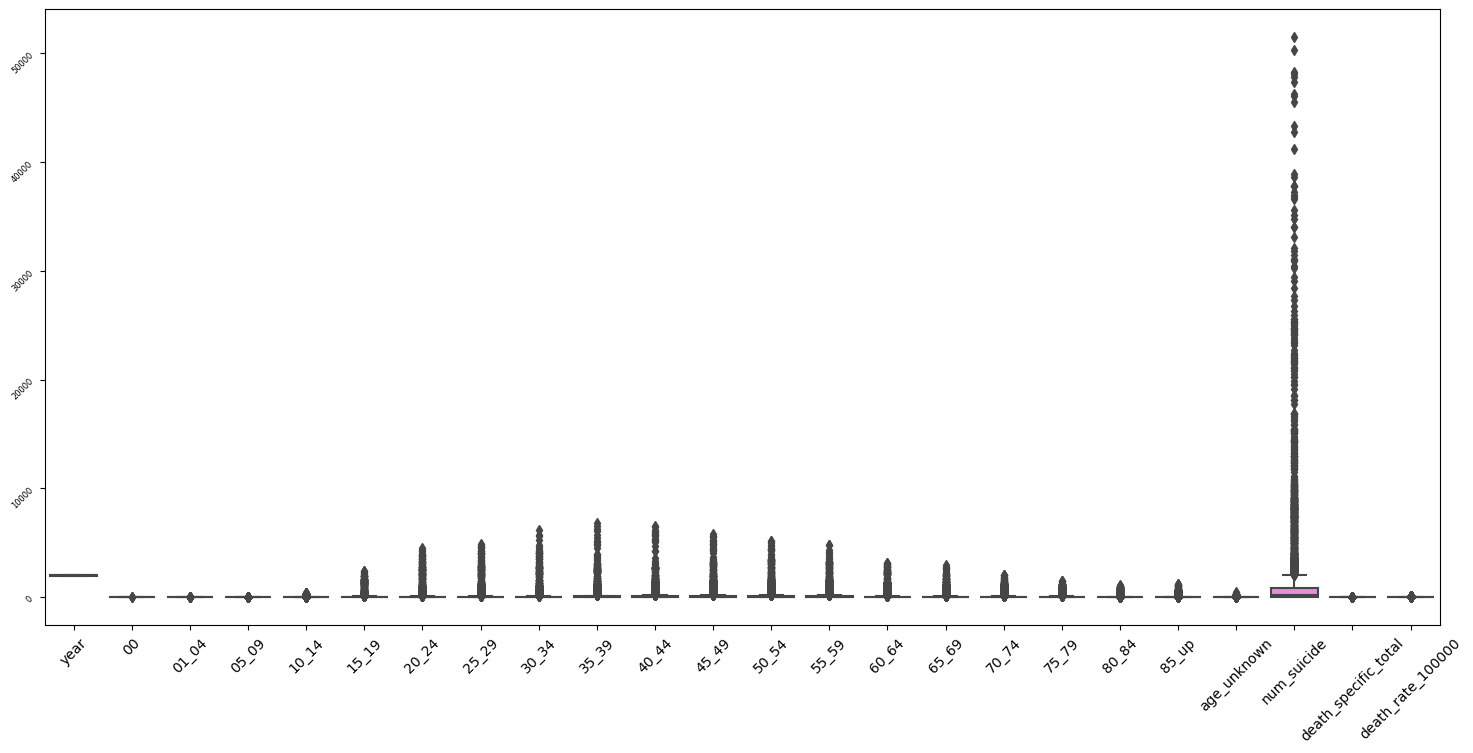

In [323]:
# 10.02.27.01
# render box plot
# dt14

plt.figure(figsize=(18,8))
sns.boxplot(dt04_combined________________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

In [324]:
# 10.02.27.02
# render box plot
# dt05

'''plt.figure(figsize=(18,8))
sns.boxplot(dt05_stress_general__________00_rn_dict_df_tp)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt05_stress_general__________00_rn_dict_df_tp)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [325]:
# 10.02.27.03
# render box plot
# dt06

'''plt.figure(figsize=(18,8))
sns.boxplot(dt06_stress_home_____________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt06_stress_home_____________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [326]:
# 10.02.27.04
# render box plot
# dt07

'''plt.figure(figsize=(18,8))
sns.boxplot(dt07_stress_school___________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt07_stress_school___________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [327]:
# 10.02.27.05
# render box plot
# dt08

'''plt.figure(figsize=(18,8))
sns.boxplot(dt08_stress_work_____________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt08_stress_work_____________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [328]:
# 10.02.27.06
# render box plot
# dt09

'''plt.figure(figsize=(18,8))
sns.boxplot(dt09_drinking_19_____________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt09_drinking_19_____________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [329]:
# 10.02.27.07
# render box plot
# dt10

'''plt.figure(figsize=(18,8))
sns.boxplot(dt10_drinking_20_____________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt10_drinking_20_____________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [330]:
# 10.02.27.08
# render box plot
# dt11

'''plt.figure(figsize=(18,8))
sns.boxplot(dt11_drinking_manage_19______00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt11_drinking_manage_19______00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [331]:
# 10.02.27.09
# render box plot
# dt12

'''plt.figure(figsize=(18,8))
sns.boxplot(dt12_drinking_manage_20______00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt12_drinking_manage_20______00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [332]:
# 10.02.27.10
# render box plot
# dt13

'''plt.figure(figsize=(18,8))
sns.boxplot(dt13_suicide_impulse_________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt13_suicide_impulse_________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [333]:
# 10.02.27.11
# render box plot
# dt14

'''plt.figure(figsize=(18,8))
sns.boxplot(dt14_suicide_impulse_________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt14_suicide_impulse_________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [334]:
# 10.02.27.12
# render box plot
# dt15

'''plt.figure(figsize=(18,8))
sns.boxplot(dt15_suicide_reason__________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt15_suicide_reason__________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [335]:
# 10.02.27.13
# render box plot
# dt16

'''plt.figure(figsize=(18,8))
sns.boxplot(dt16_suicide_reason__________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt16_suicide_reason__________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [336]:
# 10.02.27.14
# render box plot
# dt17

'''plt.figure(figsize=(18,8))
sns.boxplot(dt17_smoke_drink_19__________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt17_smoke_drink_19__________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [337]:
# 10.02.27.15
# render box plot
# dt18

'''plt.figure(figsize=(18,8))
sns.boxplot(dt18_smoke_drink_20__________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt18_smoke_drink_20__________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

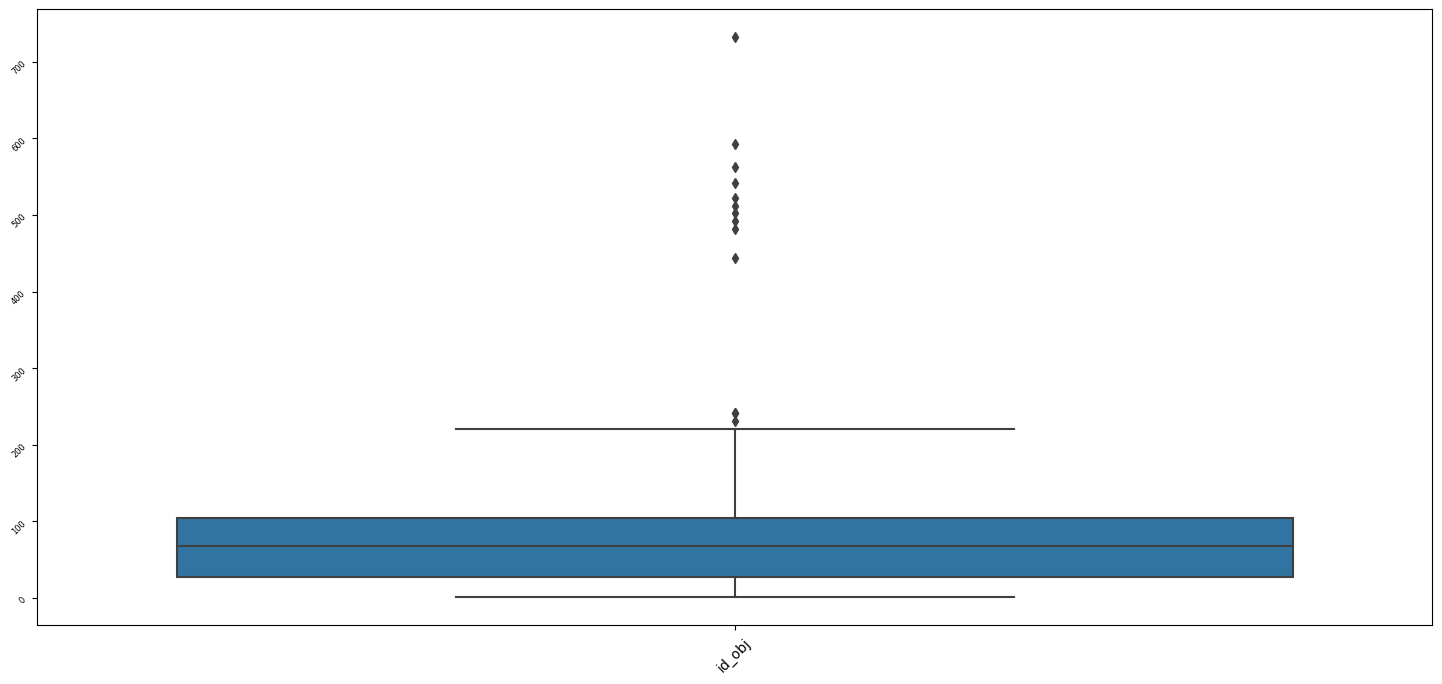

In [338]:
# 10.02.27.16
# render box plot
# dt19

plt.figure(figsize=(18,8))
sns.boxplot(dt19_ph_categories___________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

In [339]:
# 10.02.27.17
# render box plot
# dt20

'''plt.figure(figsize=(18,8))
sns.boxplot(dt20_ph_analysis_____________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt20_ph_analysis_____________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.]),
 [Text(0, -1000000.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1000000.0, '1'),
  Text(0, 2000000.0, '2'),
  Text(0, 3000000.0, '3'),
  Text(0, 4000000.0, '4'),
  Text(0, 5000000.0, '5')])

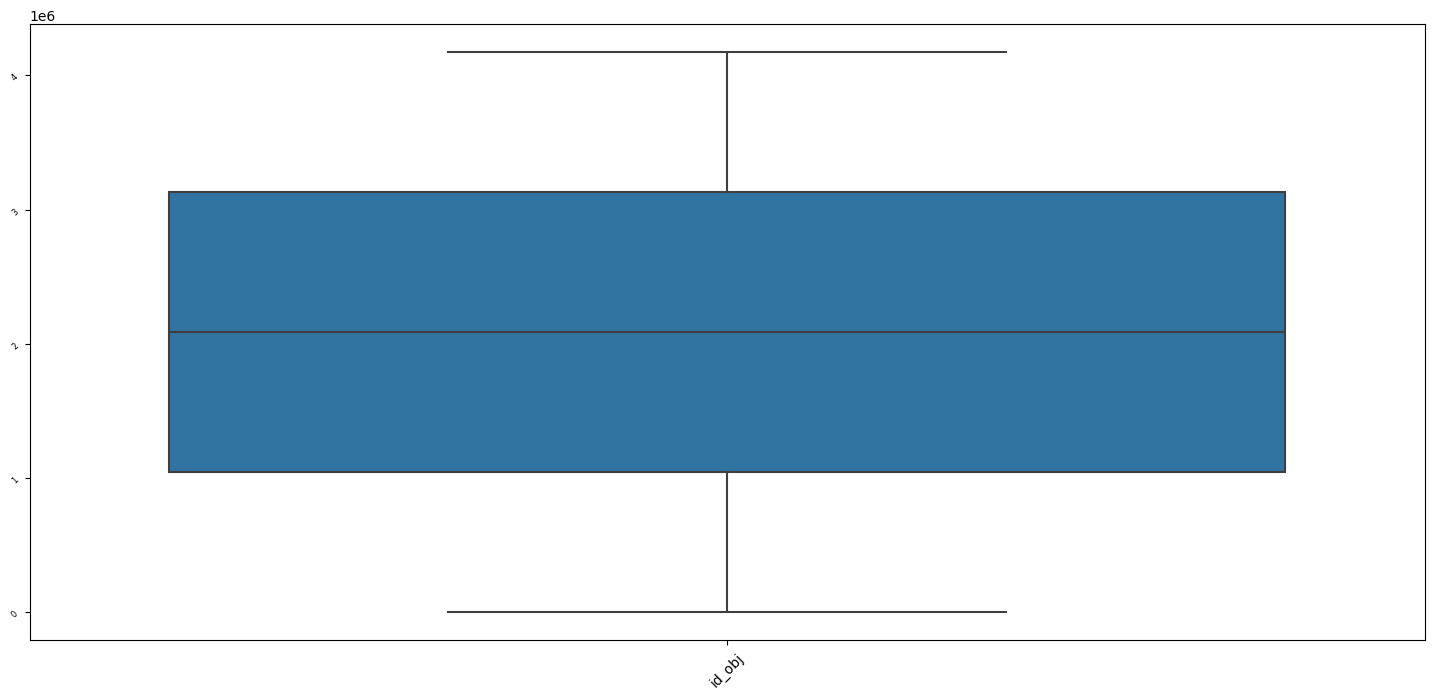

In [340]:
# 10.02.27.18
# render box plot
# dt21

plt.figure(figsize=(18,8))
sns.boxplot(dt21_ph_videos_______________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

In [341]:
# 10.02.27.19
# render box plot
# dt22

'''plt.figure(figsize=(18,8))
sns.boxplot(dt22_ph_tot__________________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt22_ph_tot__________________00_rn)\nplt.xticks(fontsize = 10)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [342]:
# 10.02.28.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt04

dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))

In [343]:
# 10.02.28.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_cv_lnr_dv01 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [344]:
# 10.02.28.03
# preparing data for modeling
# split data
# select columns 
# target variable: at birth
# dt04

dt04_lnr_x01 = dt04_combined________________00_rn_cv_lnr_dv01.drop(['00'], axis = 1)
dt04_lnr_y01 = dt04_combined________________00_rn_cv_lnr_dv01['00']

In [345]:
# 10.02.28.04
# preparing data for modeling
# split into train and test 
# target variable: at birth
# dt04

dt04_lnr_x01_trn, dt04_lnr_x01_tst, dt04_lnr_y01_trn, dt04_lnr_y01_tst = train_test_split(dt04_lnr_x01, dt04_lnr_y01, test_size = 0.3, random_state = 0)

In [346]:
# 10.02.28.05
# preparing data for modeling
# assign regression variable 
# target variable: at birth
# dt04

dt04_lnr_lr01 = LinearRegression()

In [347]:
# 10.02.28.06
# fit data for modeling
# fit variables to model
# target variable: at birth
# dt04

dt04_lnr_lr01.fit(dt04_lnr_x01_trn, dt04_lnr_y01_trn)

LinearRegression()

In [348]:
# 10.02.28.07
# predict data for modeling
# fit variables to model
# target variable: at birth
# dt04

dt04_lnr_y01_pdct = dt04_lnr_lr01.predict(dt04_lnr_x01_tst)

In [349]:
# 10.02.28.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: at birth
# dt04

dt04_lnr_rmse01 = np.sqrt(mean_squared_error(dt04_lnr_y01_tst, dt04_lnr_y01_pdct))
dt04_lnr_r201 = r2_score(dt04_lnr_y01_tst, dt04_lnr_y01_pdct)

In [350]:
# 10.02.28.09
# run model
# return rmse and r2 dt04
# rmse: 4.75
# r2: 0.0
# target variable: at birth
# dt04

print(f'rmse: {dt04_lnr_rmse01}')
print(f'r2: {dt04_lnr_r201}')

rmse: 2.7603757984279178e-12
r2: 0.0


In [351]:
# 10.02.28.10
# assign variable for pca
# target variable: at birth
# dt04

pca = PCA(.9)

In [352]:
# 10.02.28.11
# calculate pca
# target variable: at birth
# dt04

pca.fit(dt04_lnr_x01_trn)
dt04_lnr_x01_pca_trn = pca.transform(dt04_lnr_x01_trn)
dt04_lnr_x01_pca_tst = pca.transform(dt04_lnr_x01_tst)

In [353]:
# 10.02.28.12
# return pca calculation matrix
# target variable: at birth
# dt04

print(f'features in pca matrix: {dt04_lnr_x01_pca_trn.shape[1]}')

features in pca matrix: 2


In [354]:
# 10.02.29.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt04

'''dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))'''

"dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))"

In [355]:
# 10.02.29.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_cv_lnr_dv02 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [356]:
# 10.02.29.03
# preparing data for modeling
# split data
# select columns 
# target variable: ages 01 - 04
# dt04

dt04_lnr_x02 = dt04_combined________________00_rn_cv_lnr_dv02.drop(['01_04'], axis = 1)
dt04_lnr_y02 = dt04_combined________________00_rn_cv_lnr_dv02['01_04']

In [357]:
# 10.02.29.04
# preparing data for modeling
# split into train and test 
# target variable: ages 01 - 04
# dt04

dt04_lnr_x02_trn, dt04_lnr_x02_tst, dt04_lnr_y02_trn, dt04_lnr_y02_tst = train_test_split(dt04_lnr_x02, dt04_lnr_y02, test_size = 0.3, random_state = 0)

In [358]:
# 10.02.29.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 01 - 04
# dt04

dt04_lnr_lr02 = LinearRegression()

In [359]:
# 10.02.29.06
# fit data for modeling
# fit variables to model
# target variable: ages 01 - 04
# dt04

dt04_lnr_lr02.fit(dt04_lnr_x02_trn, dt04_lnr_y02_trn)

LinearRegression()

In [360]:
# 10.02.29.07
# predict data for modeling
# fit variables to model
# target variable: ages 01 - 04
# dt04

dt04_lnr_y02_pdct = dt04_lnr_lr02.predict(dt04_lnr_x02_tst)

In [361]:
# 10.02.29.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: ages 01 - 04
# dt04

dt04_lnr_rmse02 = np.sqrt(mean_squared_error(dt04_lnr_y02_tst, dt04_lnr_y02_pdct))
dt04_lnr_r202 = r2_score(dt04_lnr_y02_tst, dt04_lnr_y02_pdct)

In [362]:
# 10.02.29.09
# run model
# return rmse and r2 dt04
# rmse: 8.02
# r2: 1.0
# target variable: ages 01 - 04
# dt04

print(f'rmse: {dt04_lnr_rmse02}')
print(f'r2: {dt04_lnr_r202}')

rmse: 9.276505062436515e-12
r2: 1.0


In [363]:
# 10.02.29.10
# assign variable for pca
# target variable: ages 01 - 04
# dt04

pca = PCA(.9)

In [364]:
# 10.02.29.11
# calculate pca
# target variable: ages 01 - 04
# dt04

pca.fit(dt04_lnr_x02_trn)
dt04_lnr_x02_pca_trn = pca.transform(dt04_lnr_x02_trn)
dt04_lnr_x02_pca_tst = pca.transform(dt04_lnr_x02_tst)

In [365]:
# 10.02.29.12
# return pca calculation matrix
# target variable: ages 01 - 04
# dt04

print(f'features in pca matrix: {dt04_lnr_x02_pca_trn.shape[1]}')

features in pca matrix: 2


In [366]:
# 10.02.30.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt04

'''dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))'''

"dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))"

In [367]:
# 10.02.30.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_cv_lnr_dv03 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [368]:
# 10.02.30.03
# preparing data for modeling
# split data
# select columns 
# target variable: ages 05 - 09
# dt04

dt04_lnr_x03 = dt04_combined________________00_rn_cv_lnr_dv03.drop(['05_09'], axis = 1)
dt04_lnr_y03 = dt04_combined________________00_rn_cv_lnr_dv03['05_09']

In [369]:
# 10.02.30.04
# preparing data for modeling
# split into train and test 
# target variable: ages 05 - 09
# dt04

dt04_lnr_x03_trn, dt04_lnr_x03_tst, dt04_lnr_y03_trn, dt04_lnr_y03_tst = train_test_split(dt04_lnr_x03, dt04_lnr_y03, test_size = 0.3, random_state = 0)

In [370]:
# 10.02.30.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 05 - 09
# dt04

dt04_lnr_lr03 = LinearRegression()

In [371]:
# 10.02.30.06
# fit data for modeling
# fit variables to model
# target variable: ages 05 - 09
# dt04

dt04_lnr_lr03.fit(dt04_lnr_x03_trn, dt04_lnr_y03_trn)

LinearRegression()

In [372]:
# 10.02.30.07
# predict data for modeling
# fit variables to model
# target variable: ages 05 - 09
# dt04

dt04_lnr_y03_pdct = dt04_lnr_lr03.predict(dt04_lnr_x03_tst)

In [373]:
# 10.02.30.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: ages 05 - 09
# dt04

dt04_lnr_rmse03 = np.sqrt(mean_squared_error(dt04_lnr_y03_tst, dt04_lnr_y03_pdct))
dt04_lnr_r203 = r2_score(dt04_lnr_y03_tst, dt04_lnr_y03_pdct)

In [374]:
# 10.02.30.09
# run model
# return rmse and r2 dt04
# rmse: 4.32
# r2: 1.0
# target variable: ages 05 - 09
# dt04

print(f'rmse: {dt04_lnr_rmse03}')
print(f'r2: {dt04_lnr_r203}')

rmse: 1.7087765695953258e-12
r2: 1.0


In [375]:
# 10.02.30.10
# assign variable for pca
# target variable: ages 05 - 09
# dt04

pca = PCA(.9)

In [376]:
# 10.02.30.11
# calculate pca
# target variable: ages 05 - 09
# dt04

pca.fit(dt04_lnr_x03_trn)
dt04_lnr_x03_pca_trn = pca.transform(dt04_lnr_x03_trn)
dt04_lnr_x03_pca_tst = pca.transform(dt04_lnr_x03_tst)

In [377]:
# 10.02.30.12
# return pca calculation matrix
# target variable: ages 05 - 09
# dt04

print(f'features in pca matrix: {dt04_lnr_x03_pca_trn.shape[1]}')

features in pca matrix: 2


In [378]:
# 10.02.31.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt04

'''dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))'''

"dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))"

In [379]:
# 10.02.31.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_cv_lnr_dv04 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [380]:
# 10.02.31.03
# preparing data for modeling
# split data
# select columns 
# target variable: ages 10 - 14
# dt04

dt04_lnr_x04 = dt04_combined________________00_rn_cv_lnr_dv04.drop(['10_14'], axis = 1)
dt04_lnr_y04 = dt04_combined________________00_rn_cv_lnr_dv04['10_14']

In [381]:
# 10.02.31.04
# preparing data for modeling
# split into train and test 
# target variable: ages 10 - 14
# dt04

dt04_lnr_x04_trn, dt04_lnr_x04_tst, dt04_lnr_y04_trn, dt04_lnr_y04_tst = train_test_split(dt04_lnr_x04, dt04_lnr_y04, test_size = 0.3, random_state = 0)

In [382]:
# 10.02.31.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 10 - 14
# dt04

dt04_lnr_lr04 = LinearRegression()

In [383]:
# 10.02.31.06
# fit data for modeling
# fit variables to model
# target variable: ages 10 - 14
# dt04

dt04_lnr_lr04.fit(dt04_lnr_x04_trn, dt04_lnr_y04_trn)

LinearRegression()

In [384]:
# 10.02.31.07
# predict data for modeling
# fit variables to model
# target variable: ages 10 - 14
# dt04

dt04_lnr_y04_pdct = dt04_lnr_lr04.predict(dt04_lnr_x04_tst)

In [385]:
# 10.02.31.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: ages 10 - 14
# dt04

dt04_lnr_rmse04 = np.sqrt(mean_squared_error(dt04_lnr_y04_tst, dt04_lnr_y04_pdct))
dt04_lnr_r204 = r2_score(dt04_lnr_y04_tst, dt04_lnr_y04_pdct)

In [386]:
# 10.02.31.09
# run model
# return rmse and r2 dt04
# rmse: 4.21
# r2: 1.0
# target variable: ages 10 - 14
# dt04

print(f'rmse: {dt04_lnr_rmse04}')
print(f'r2: {dt04_lnr_r204}')

rmse: 2.571956070939031e-12
r2: 1.0


In [387]:
# 10.02.31.10
# assign variable for pca
# target variable: ages 10 - 14
# dt04

pca = PCA(.9)

In [388]:
# 10.02.31.11
# calculate pca
# target variable: ages 10 - 14
# dt04

pca.fit(dt04_lnr_x04_trn)
dt04_lnr_x04_pca_trn = pca.transform(dt04_lnr_x04_trn)
dt04_lnr_x04_pca_tst = pca.transform(dt04_lnr_x04_tst)

In [389]:
# 10.02.31.12
# return pca calculation matrix
# target variable: ages 10 - 14
# dt04

print(f'features in pca matrix: {dt04_lnr_x04_pca_trn.shape[1]}')

features in pca matrix: 2


In [390]:
# 10.02.32.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt04

'''dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))'''

"dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))"

In [391]:
# 10.02.32.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_cv_lnr_dv05 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [392]:
# 10.02.32.03
# preparing data for modeling
# split data
# select columns 
# target variable: ages 15 - 19
# dt04

dt04_lnr_x05 = dt04_combined________________00_rn_cv_lnr_dv05.drop(['15_19'], axis = 1)
dt04_lnr_y05 = dt04_combined________________00_rn_cv_lnr_dv05['15_19']

In [393]:
# 10.02.32.04
# preparing data for modeling
# split into train and test 
# target variable: ages 15 - 19
# dt04

dt04_lnr_x05_trn, dt04_lnr_x05_tst, dt04_lnr_y05_trn, dt04_lnr_y05_tst = train_test_split(dt04_lnr_x05, dt04_lnr_y05, test_size = 0.3, random_state = 0)

In [394]:
# 10.02.32.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 15 - 19
# dt04

dt04_lnr_lr05 = LinearRegression()

In [395]:
# 10.02.32.06
# fit data for modeling
# fit variables to model
# target variable: ages 15 - 19
# dt04

dt04_lnr_lr05.fit(dt04_lnr_x05_trn, dt04_lnr_y05_trn)

LinearRegression()

In [396]:
# 10.02.32.07
# predict data for modeling
# fit variables to model
# target variable: ages 15 - 19
# dt04

dt04_lnr_y05_pdct = dt04_lnr_lr05.predict(dt04_lnr_x05_tst)

In [397]:
# 10.02.32.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: ages 15 - 19
# dt04

dt04_lnr_rmse05 = np.sqrt(mean_squared_error(dt04_lnr_y05_tst, dt04_lnr_y05_pdct))
dt04_lnr_r205 = r2_score(dt04_lnr_y05_tst, dt04_lnr_y05_pdct)

In [398]:
# 10.02.32.09
# run model
# return rmse and r2 dt04
# rmse: 3.46
# r2: 1.0
# target variable: ages 15 - 19
# dt04

print(f'rmse: {dt04_lnr_rmse05}')
print(f'r2: {dt04_lnr_r205}')

rmse: 2.380674016647172e-12
r2: 1.0


In [399]:
# 10.02.32.10
# assign variable for pca
# target variable: ages 15 - 19
# dt04

pca = PCA(.9)

In [400]:
# 10.02.32.11
# calculate pca
# target variable: ages 15 - 19
# dt04

pca.fit(dt04_lnr_x05_trn)
dt04_lnr_x05_pca_trn = pca.transform(dt04_lnr_x05_trn)
dt04_lnr_x05_pca_tst = pca.transform(dt04_lnr_x05_tst)

In [401]:
# 10.02.32.12
# return pca calculation matrix
# target variable: ages 15 - 19
# dt04

print(f'features in pca matrix: {dt04_lnr_x05_pca_trn.shape[1]}')

features in pca matrix: 2


In [402]:
# 10.02.33.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt04

'''dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))'''

"dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))"

In [403]:
# 10.02.33.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_cv_lnr_dv06 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [404]:
# 10.02.33.03
# preparing data for modeling
# split data
# select columns 
# target variable: ages 20 - 24
# dt04

dt04_lnr_x06 = dt04_combined________________00_rn_cv_lnr_dv06.drop(['20_24'], axis = 1)
dt04_lnr_y06 = dt04_combined________________00_rn_cv_lnr_dv06['20_24']

In [405]:
# 10.02.33.04
# preparing data for modeling
# split into train and test 
# target variable: ages 20 - 24
# dt04

dt04_lnr_x06_trn, dt04_lnr_x06_tst, dt04_lnr_y06_trn, dt04_lnr_y06_tst = train_test_split(dt04_lnr_x06, dt04_lnr_y06, test_size = 0.3, random_state = 0)

In [406]:
# 10.02.33.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 20 - 24
# dt04

dt04_lnr_lr06 = LinearRegression()

In [407]:
# 10.02.33.06
# fit data for modeling
# fit variables to model
# target variable: ages 20 - 24
# dt04

dt04_lnr_lr06.fit(dt04_lnr_x06_trn, dt04_lnr_y06_trn)

LinearRegression()

In [408]:
# 10.02.33.07
# predict data for modeling
# fit variables to model
# target variable: ages 20 - 24
# dt04

dt04_lnr_y06_pdct = dt04_lnr_lr06.predict(dt04_lnr_x06_tst)

In [409]:
# 10.02.33.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: ages 20 - 24
# dt04

dt04_lnr_rmse06 = np.sqrt(mean_squared_error(dt04_lnr_y06_tst, dt04_lnr_y06_pdct))
dt04_lnr_r206 = r2_score(dt04_lnr_y06_tst, dt04_lnr_y06_pdct)

In [410]:
# 10.02.33.09
# run model
# return rmse and r2 dt04
# rmse: 1.36
# r2: 1.0
# target variable: ages 20 - 24
# dt04

print(f'rmse: {dt04_lnr_rmse06}')
print(f'r2: {dt04_lnr_r206}')

rmse: 1.2840420161183323e-11
r2: 1.0


In [411]:
# 10.02.33.10
# assign variable for pca
# target variable: ages 20 - 24
# dt04

pca = PCA(.9)

In [412]:
# 10.02.33.11
# calculate pca
# target variable: ages 20 - 24
# dt04

pca.fit(dt04_lnr_x06_trn)
dt04_lnr_x06_pca_trn = pca.transform(dt04_lnr_x06_trn)
dt04_lnr_x06_pca_tst = pca.transform(dt04_lnr_x06_tst)

In [413]:
# 10.02.33.12
# return pca calculation matrix
# target variable: ages 20 - 24
# dt04

print(f'features in pca matrix: {dt04_lnr_x06_pca_trn.shape[1]}')

features in pca matrix: 2


In [414]:
# 10.02.34.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt04

'''dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))'''

"dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))"

In [415]:
# 10.02.34.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_cv_lnr_dv18 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [416]:
# 10.02.34.03
# preparing data for modeling
# split data
# select columns 
# target variable: ages 80 - 84
# dt04

dt04_lnr_x18 = dt04_combined________________00_rn_cv_lnr_dv18.drop(['80_84'], axis = 1)
dt04_lnr_y18 = dt04_combined________________00_rn_cv_lnr_dv18['80_84']

In [417]:
# 10.02.34.04
# preparing data for modeling
# split into train and test 
# target variable: ages 80 - 84
# dt04

dt04_lnr_x18_trn, dt04_lnr_x18_tst, dt04_lnr_y18_trn, dt04_lnr_y18_tst = train_test_split(dt04_lnr_x18, dt04_lnr_y18, test_size = 0.3, random_state = 0)

In [418]:
# 10.02.34.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 80 - 84
# dt04

dt04_lnr_lr18 = LinearRegression()

In [419]:
# 10.02.34.06
# fit data for modeling
# fit variables to model
# target variable: ages 80 - 84
# dt04

dt04_lnr_lr18.fit(dt04_lnr_x18_trn, dt04_lnr_y18_trn)

LinearRegression()

In [420]:
# 10.02.34.07
# predict data for modeling
# fit variables to model
# target variable: ages 80 - 84
# dt04

dt04_lnr_y18_pdct = dt04_lnr_lr18.predict(dt04_lnr_x18_tst)

In [421]:
# 10.02.34.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: ages 80 - 84
# dt04

dt04_lnr_rmse18 = np.sqrt(mean_squared_error(dt04_lnr_y18_tst, dt04_lnr_y18_pdct))
dt04_lnr_r218 = r2_score(dt04_lnr_y18_tst, dt04_lnr_y18_pdct)

In [422]:
# 10.02.34.09
# run model
# return rmse and r2 dt04
# rmse: 7.5
# r2: 1.0
# target variable: ages 80 - 84
# dt04

print(f'rmse: {dt04_lnr_rmse18}')
print(f'r2: {dt04_lnr_r218}')

rmse: 3.801986114349955e-12
r2: 1.0


In [423]:
# 10.02.34.10
# assign variable for pca
# target variable: ages 80 - 84
# dt04

pca = PCA(.9)

In [424]:
# 10.02.34.11
# calculate pca
# target variable: ages 80 - 84
# dt04

pca.fit(dt04_lnr_x18_trn)
dt04_lnr_x18_pca_trn = pca.transform(dt04_lnr_x18_trn)
dt04_lnr_x18_pca_tst = pca.transform(dt04_lnr_x18_tst)

In [425]:
# 10.02.34.12
# return pca calculation matrix
# target variable: ages 80 - 84
# dt04

print(f'features in pca matrix: {dt04_lnr_x18_pca_trn.shape[1]}')

features in pca matrix: 2


In [426]:
# 10.02.35.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt04

'''dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))'''

"dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))"

In [427]:
# 10.02.35.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_cv_lnr_dv21 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [428]:
# 10.02.35.03
# preparing data for modeling
# split data
# select columns 
# target variable: number of suicides
# dt04

dt04_lnr_x21 = dt04_combined________________00_rn_cv_lnr_dv21.drop(['num_suicide'], axis = 1)
dt04_lnr_y21 = dt04_combined________________00_rn_cv_lnr_dv21['num_suicide']

In [429]:
# 10.02.35.04
# preparing data for modeling
# split into train and test 
# target variable: number of suicides
# dt04

dt04_lnr_x21_trn, dt04_lnr_x21_tst, dt04_lnr_y21_trn, dt04_lnr_y21_tst = train_test_split(dt04_lnr_x21, dt04_lnr_y21, test_size = 0.3, random_state = 0)

In [430]:
# 10.02.35.05
# preparing data for modeling
# assign regression variable 
# target variable: number of suicides
# dt04

dt04_lnr_lr21 = LinearRegression()

In [431]:
# 10.02.35.06
# fit data for modeling
# fit variables to model
# target variable: number of suicides
# dt04

dt04_lnr_lr21.fit(dt04_lnr_x21_trn, dt04_lnr_y21_trn)

LinearRegression()

In [432]:
# 10.02.35.07
# predict data for modeling
# fit variables to model
# target variable: number of suicides
# dt04

dt04_lnr_y21_pdct = dt04_lnr_lr21.predict(dt04_lnr_x21_tst)

In [433]:
# 10.02.35.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: number of suicides
# dt04

dt04_lnr_rmse21 = np.sqrt(mean_squared_error(dt04_lnr_y21_tst, dt04_lnr_y21_pdct))
dt04_lnr_r221 = r2_score(dt04_lnr_y21_tst, dt04_lnr_y21_pdct)

In [434]:
# 10.02.35.09
# run model
# return rmse and r2 dt04
# rmse: 3.0
# r2: 1.0
# target variable: number of suicides
# dt04

print(f'rmse: {dt04_lnr_rmse21}')
print(f'r2: {dt04_lnr_r221}')

rmse: 3.3673300726479147e-12
r2: 1.0


In [435]:
# 10.02.35.10
# assign variable for pca
# target variable: number of suicides
# dt04

pca = PCA(.9)

In [436]:
# 10.02.35.11
# calculate pca
# target variable: number of suicides
# dt04

pca.fit(dt04_lnr_x21_trn)
dt04_lnr_x21_pca_trn = pca.transform(dt04_lnr_x21_trn)
dt04_lnr_x21_pca_tst = pca.transform(dt04_lnr_x21_tst)

In [437]:
# 10.02.35.12
# return pca calculation matrix
# target variable: number of suicides
# dt04

print(f'features in pca matrix: {dt04_lnr_x21_pca_trn.shape[1]}')

features in pca matrix: 2


In [438]:
# 10.02.35.13
# replace 0 with median
# this step improves the accuracy of linear and logistic regressions
# target variable: number of suicides
# dt04

median = dt04_combined________________00_rn_cv.loc[dt04_combined________________00_rn_cv['num_suicide']==0, 'num_suicide'].median()
dt04_combined________________00_rn.loc[dt04_combined________________00_rn_cv.num_suicide == 0, 'num_suicide'] = np.nan
dt04_combined________________00_rn_cv.fillna(median,inplace=True)

In [439]:
# 10.02.36.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt04

'''dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))'''

"dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))"

In [440]:
# 10.02.36.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_cv_lnr_dv21 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [441]:
# 10.02.36.03
# preparing data for modeling
# split data
# select columns 
# target variable: number of suicides
# dt04

dt04_lnr_x21 = dt04_combined________________00_rn_cv_lnr_dv21.drop(['num_suicide'], axis = 1)
dt04_lnr_y21 = dt04_combined________________00_rn_cv_lnr_dv21['num_suicide']

In [442]:
# 10.02.36.04
# preparing data for modeling
# split into train and test 
# target variable: number of suicides
# dt04

dt04_lnr_x21_trn, dt04_lnr_x21_tst, dt04_lnr_y21_trn, dt04_lnr_y21_tst = train_test_split(dt04_lnr_x21, dt04_lnr_y21, test_size = 0.3, random_state = 0)

In [443]:
# 10.02.36.05
# preparing data for modeling
# assign regression variable 
# target variable: number of suicides
# dt04

dt04_lnr_lr21 = LinearRegression()

In [444]:
# 10.02.36.06
# fit data for modeling
# fit variables to model
# target variable: number of suicides
# dt04

dt04_lnr_lr21.fit(dt04_lnr_x21_trn, dt04_lnr_y21_trn)

LinearRegression()

In [445]:
# 10.02.36.07
# predict data for modeling
# fit variables to model
# target variable: number of suicides
# dt04

dt04_lnr_y21_pdct = dt04_lnr_lr21.predict(dt04_lnr_x21_tst)

In [446]:
# 10.02.36.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: number of suicides
# dt04

dt04_lnr_rmse21 = np.sqrt(mean_squared_error(dt04_lnr_y21_tst, dt04_lnr_y21_pdct))
dt04_lnr_r221 = r2_score(dt04_lnr_y21_tst, dt04_lnr_y21_pdct)

In [447]:
# 10.02.36.09
# run model
# return rmse and r2 dt04
# rmse: 3.19
# r2: 1.0
# target variable: number of suicides
# dt04

print(f'rmse: {dt04_lnr_rmse21}')
print(f'r2: {dt04_lnr_r221}')

rmse: 3.2443450183225437e-12
r2: 1.0


In [448]:
# 10.02.36.10
# replace NA with mode
# this step improves the accuracy of linear and logistic regressions
# dt04

dt04_combined________________00_rn_cv['00']=dt04_combined________________00_rn_cv['00'].fillna(dt04_combined________________00_rn_cv['00'].mode()[0])
dt04_combined________________00_rn_cv['01_04']=dt04_combined________________00_rn_cv['01_04'].fillna(dt04_combined________________00_rn_cv['01_04'].mode()[0])
dt04_combined________________00_rn_cv['05_09']=dt04_combined________________00_rn_cv['05_09'].fillna(dt04_combined________________00_rn_cv['05_09'].mode()[0])
dt04_combined________________00_rn_cv['10_14']=dt04_combined________________00_rn_cv['10_14'].fillna(dt04_combined________________00_rn_cv['10_14'].mode()[0])
dt04_combined________________00_rn_cv['15_19']=dt04_combined________________00_rn_cv['15_19'].fillna(dt04_combined________________00_rn_cv['15_19'].mode()[0])
dt04_combined________________00_rn_cv['20_24']=dt04_combined________________00_rn_cv['20_24'].fillna(dt04_combined________________00_rn_cv['20_24'].mode()[0])
dt04_combined________________00_rn_cv['25_29']=dt04_combined________________00_rn_cv['25_29'].fillna(dt04_combined________________00_rn_cv['25_29'].mode()[0])
dt04_combined________________00_rn_cv['30_34']=dt04_combined________________00_rn_cv['30_34'].fillna(dt04_combined________________00_rn_cv['30_34'].mode()[0])
dt04_combined________________00_rn_cv['35_39']=dt04_combined________________00_rn_cv['35_39'].fillna(dt04_combined________________00_rn_cv['35_39'].mode()[0])
dt04_combined________________00_rn_cv['40_44']=dt04_combined________________00_rn_cv['40_44'].fillna(dt04_combined________________00_rn_cv['40_44'].mode()[0])
dt04_combined________________00_rn_cv['45_49']=dt04_combined________________00_rn_cv['45_49'].fillna(dt04_combined________________00_rn_cv['45_49'].mode()[0])
dt04_combined________________00_rn_cv['50_54']=dt04_combined________________00_rn_cv['50_54'].fillna(dt04_combined________________00_rn_cv['50_54'].mode()[0])
dt04_combined________________00_rn_cv['55_59']=dt04_combined________________00_rn_cv['55_59'].fillna(dt04_combined________________00_rn_cv['55_59'].mode()[0])
dt04_combined________________00_rn_cv['60_64']=dt04_combined________________00_rn_cv['60_64'].fillna(dt04_combined________________00_rn_cv['60_64'].mode()[0])
dt04_combined________________00_rn_cv['65_69']=dt04_combined________________00_rn_cv['65_69'].fillna(dt04_combined________________00_rn_cv['65_69'].mode()[0])
dt04_combined________________00_rn_cv['70_74']=dt04_combined________________00_rn_cv['70_74'].fillna(dt04_combined________________00_rn_cv['70_74'].mode()[0])
dt04_combined________________00_rn_cv['75_79']=dt04_combined________________00_rn_cv['75_79'].fillna(dt04_combined________________00_rn_cv['75_79'].mode()[0])
dt04_combined________________00_rn_cv['80_84']=dt04_combined________________00_rn_cv['80_84'].fillna(dt04_combined________________00_rn_cv['80_84'].mode()[0])
dt04_combined________________00_rn_cv['85_up']=dt04_combined________________00_rn_cv['85_up'].fillna(dt04_combined________________00_rn_cv['85_up'].mode()[0])
dt04_combined________________00_rn_cv['age_unknown']=dt04_combined________________00_rn_cv['age_unknown'].fillna(dt04_combined________________00_rn_cv['age_unknown'].mode()[0])
dt04_combined________________00_rn_cv['num_suicide']=dt04_combined________________00_rn_cv['num_suicide'].fillna(dt04_combined________________00_rn_cv['num_suicide'].mode()[0])
dt04_combined________________00_rn_cv['death_specific_total']=dt04_combined________________00_rn_cv['death_specific_total'].fillna(dt04_combined________________00_rn_cv['death_specific_total'].mode()[0])
dt04_combined________________00_rn_cv['death_rate_100000']=dt04_combined________________00_rn_cv['death_rate_100000'].fillna(dt04_combined________________00_rn_cv['death_rate_100000'].mode()[0])

In [449]:
# 10.02.37.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt04

'''dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))'''

"dt04_combined________________00_rn_cv.insert(0, 'index', range(0, 0 + len(dt04_combined________________00_rn_cv)))"

In [450]:
# 10.02.37.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: at birth
# dt04

dt04_combined________________00_rn_cv_lnr_dv01 = pd.get_dummies(dt04_combined________________00_rn_cv, drop_first = True, dtype = int)

In [451]:
# 10.02.37.03
# preparing data for modeling
# split data
# select columns 
# target variable: at birth
# dt04

dt04_lnr_x01 = dt04_combined________________00_rn_cv_lnr_dv01.drop(['00'], axis = 1)
dt04_lnr_y01 = dt04_combined________________00_rn_cv_lnr_dv01['00']

In [452]:
# 10.02.37.04
# preparing data for modeling
# split into train and test 
# target variable: at birth
# dt04

dt04_lnr_x01_trn, dt04_lnr_x01_tst, dt04_lnr_y01_trn, dt04_lnr_y01_tst = train_test_split(dt04_lnr_x01, dt04_lnr_y01, test_size = 0.3, random_state = 0)

In [453]:
# 10.02.37.05
# preparing data for modeling
# assign regression variable 
# target variable: at birth
# dt04

dt04_lnr_lr01 = LinearRegression()

In [454]:
# 10.02.37.06
# fit data for modeling
# fit variables to model
# target variable: at birth
# dt04

dt04_lnr_lr01.fit(dt04_lnr_x01_trn, dt04_lnr_y01_trn)

LinearRegression()

In [455]:
# 10.02.37.07
# predict data for modeling
# fit variables to model
# target variable: at birth
# dt04

dt04_lnr_y01_pdct = dt04_lnr_lr01.predict(dt04_lnr_x01_tst)

In [456]:
# 10.02.37.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: at birth
# dt04

dt04_lnr_rmse01 = np.sqrt(mean_squared_error(dt04_lnr_y01_tst, dt04_lnr_y01_pdct))
dt04_lnr_r201 = r2_score(dt04_lnr_y01_tst, dt04_lnr_y01_pdct)

In [457]:
# 10.02.37.09
# run model
# return rmse and r2 dt04
# rmse: 2.57
# r2: 0.0
# target variable: at birth
# dt04

print(f'rmse: {dt04_lnr_rmse01}')
print(f'r2: {dt04_lnr_r201}')

rmse: 6.585658197591536e-12
r2: 0.0


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(0, -10000.0, '−10000'),
  Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000')])

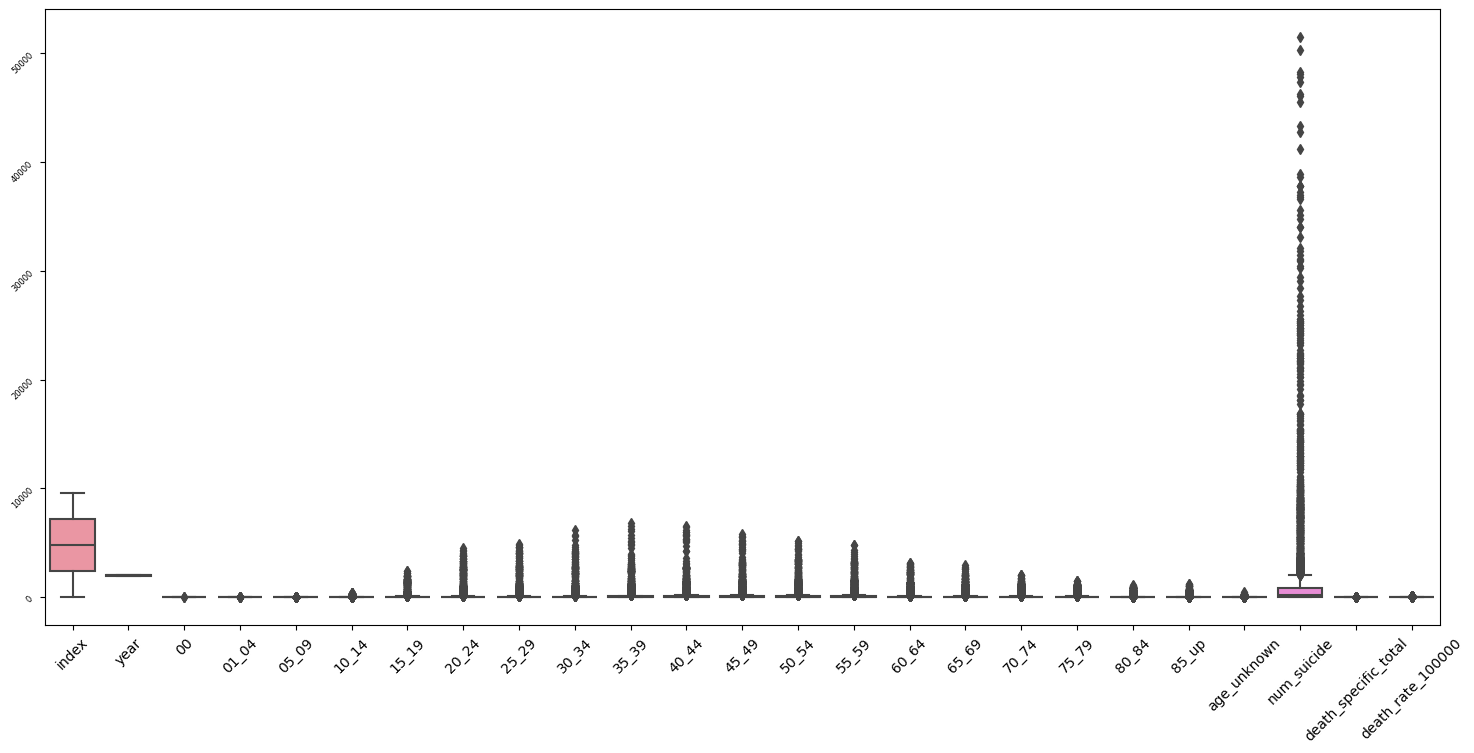

In [458]:
# 10.02.38.01
# render box plot
# dt04

plt.figure(figsize=(18,8))
sns.boxplot(dt04_combined________________00_rn)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

# uncomment before processing

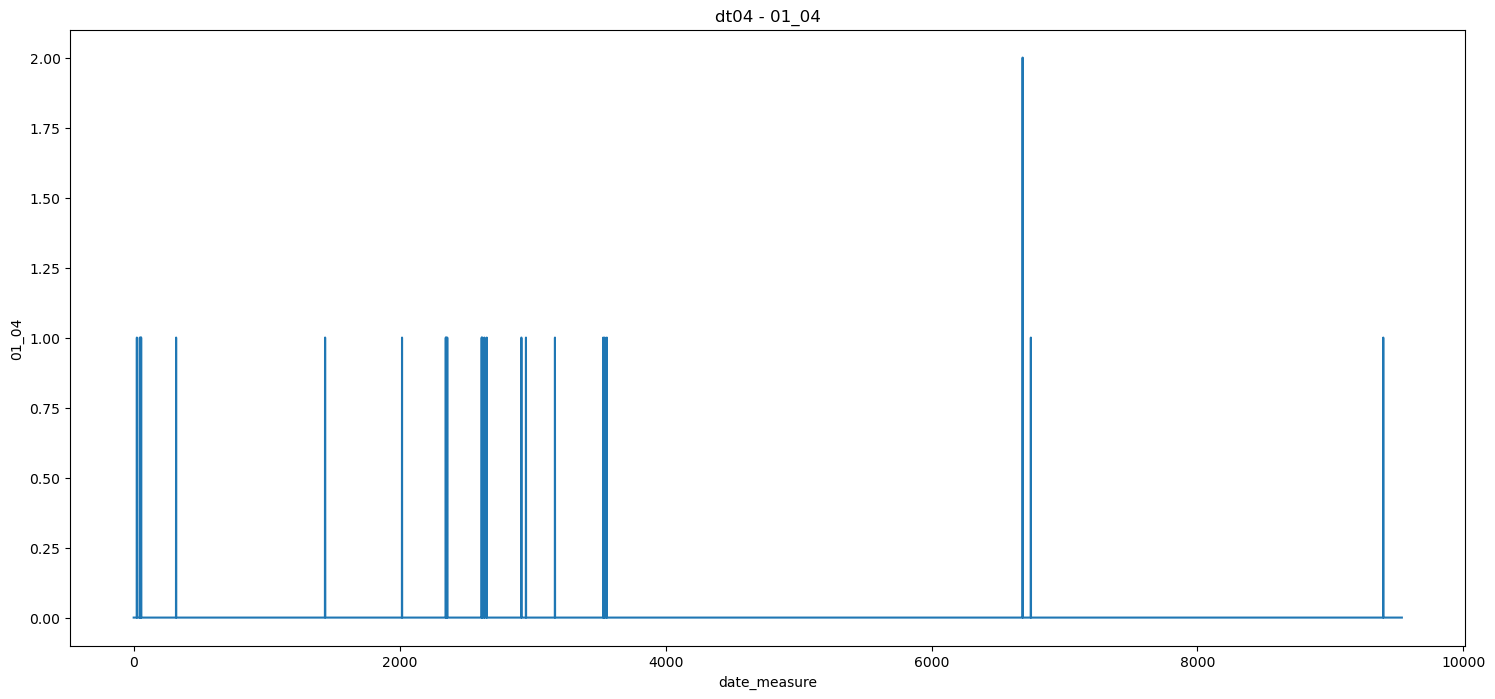

In [459]:
# 10.02.38.02
# plot time series
# target variable: ages 01 - 04
# dt04

plt.figure(figsize=(18,8))
plt.plot(dt04_combined________________00_rn['01_04'])
plt.title('dt04 - 01_04')
plt.xlabel('date_measure')
plt.ylabel('01_04')
plt.show()

# uncomment before processing

<Figure size 1800x800 with 0 Axes>

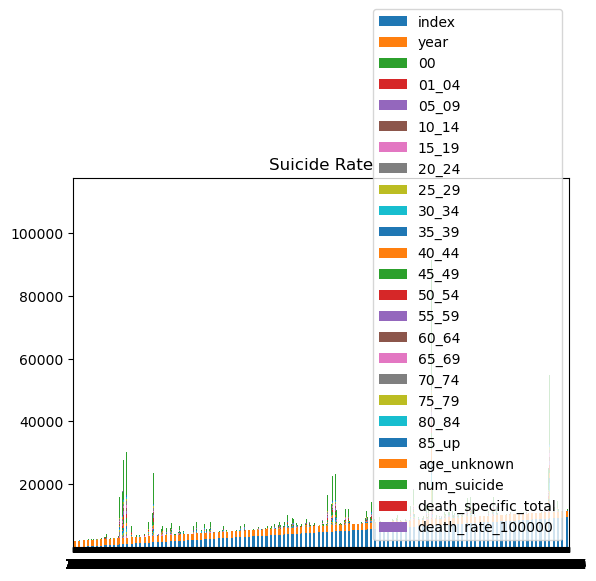

In [460]:
# 10.02.38.03
# render bar chart
# dt04

plt.figure(figsize=(18,8))
dt04_combined________________00_rn_cv.plot(kind='bar', stacked=True)
plt.title('Suicide Rate')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

In [461]:
# 10.02.39.01
# return all columns
# dt01 - dt22

print('dt01-----------------------------------------------')
print(dt01_death_cause_gend________00_rn.columns)
print('dt02-----------------------------------------------')
print(dt02_death_cause_geo_________00_rn.columns)
print('dt03-----------------------------------------------')
print(dt03_who_suicide_____________00_rn.columns)
print('dt04-----------------------------------------------')
print(dt04_combined________________00_rn.columns)
print('dt05-----------------------------------------------')
print(dt05_stress_general__________00_rn_dict_df_tp.columns)
print('dt06-----------------------------------------------')
print(dt06_stress_home_____________00_rn_dict_df_tp.columns)
print('dt07-----------------------------------------------')
print(dt07_stress_school___________00_rn_dict_df_tp.columns)
print('dt08-----------------------------------------------')
print(dt08_stress_work_____________00_rn_dict_df_tp.columns)
print('dt09-----------------------------------------------')
print(dt09_drinking_19_____________00_rn_dict_df_tp.columns)
print('dt10-----------------------------------------------')
print(dt10_drinking_20_____________00_rn_dict_df_tp.columns)
print('dt11-----------------------------------------------')
print(dt11_drinking_manage_19______00_rn_dict_df_tp.columns)
print('dt12-----------------------------------------------')
print(dt12_drinking_manage_20______00_rn_dict_df_tp.columns)
print('dt13-----------------------------------------------')
print(dt13_suicide_impulse_________00_rn_dict_df_tp.columns)
print('dt14-----------------------------------------------')
print(dt14_suicide_impulse_________00_rn_dict_df_tp.columns)
print('dt15-----------------------------------------------')
print(dt15_suicide_reason__________00_rn_dict_df_tp.columns)
print('dt16-----------------------------------------------')
print(dt16_suicide_reason__________00_rn_dict_df_tp.columns)
print('dt17-----------------------------------------------')
print(dt17_smoke_drink_19__________00_rn_dict_df_tp.columns)
print('dt18-----------------------------------------------')
print(dt18_smoke_drink_20__________00_rn_dict_df_tp.columns)
print('dt19-----------------------------------------------')
print(dt19_ph_categories___________00_rn.columns)
'''print('dt20-----------------------------------------------')
print(dt20_ph_analysis_____________00_rn.columns)'''
print('dt21-----------------------------------------------')
print(dt21_ph_videos_______________00_rn.columns)
'''print('dt22-----------------------------------------------')
print(dt22_ph_tot__________________00_rn.columns)'''

dt01-----------------------------------------------
Index(['cause', 'gender', 'province', 'item', 'unit', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'unnamed_45'],
      dtype='object')
dt02-----------------------------------------------
Index(['cause', 'province', 'gender', 'item', 'unit', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', 'unnamed_32'],
      dtype='object')
dt03-----------------------------------------------
Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], 

"print('dt22-----------------------------------------------')\nprint(dt22_ph_tot__________________00_rn.columns)"

In [462]:
# 10.02.39.02
# return all columns
# dt01 - dt22

print('dt01---------------------------------------------------')
print(dt01_death_cause_gend________00_rn.columns)
print('dt02---------------------------------------------------')
print(dt02_death_cause_geo_________00_rn.columns)
print('dt03---------------------------------------------------')
print(dt03_who_suicide_____________00_rn.columns)
print('dt04---------------------------------------------------')
print(dt04_combined________________00_rn.columns)
print('dt05---------------------------------------------------')
print(dt05_stress_general__________00_rn_dict_df_tp_ntf.columns)
print('dt06---------------------------------------------------')
print(dt06_stress_home_____________00_rn_dict_df_tp_ntf.columns)
print('dt07---------------------------------------------------')
print(dt07_stress_school___________00_rn_dict_df_tp_ntf.columns)
print('dt08---------------------------------------------------')
print(dt08_stress_work_____________00_rn_dict_df_tp_ntf.columns)
print('dt09---------------------------------------------------')
print(dt09_drinking_19_____________00_rn_dict_df_tp_ntf.columns)
print('dt10---------------------------------------------------')
print(dt10_drinking_20_____________00_rn_dict_df_tp_ntf.columns)
print('dt11---------------------------------------------------')
print(dt11_drinking_manage_19______00_rn_dict_df_tp_ntf.columns)
print('dt12---------------------------------------------------')
print(dt12_drinking_manage_20______00_rn_dict_df_tp_ntf.columns)
print('dt13---------------------------------------------------')
print(dt13_suicide_impulse_________00_rn_dict_df_tp_ntf.columns)
print('dt14---------------------------------------------------')
print(dt14_suicide_impulse_________00_rn_dict_df_tp_ntf.columns)
print('dt15---------------------------------------------------')
print(dt15_suicide_reason__________00_rn_dict_df_tp_ntf.columns)
print('dt16---------------------------------------------------')
print(dt16_suicide_reason__________00_rn_dict_df_tp_ntf.columns)
print('dt17---------------------------------------------------')
print(dt17_smoke_drink_19__________00_rn_dict_df_tp_ntf.columns)
print('dt18---------------------------------------------------')
print(dt18_smoke_drink_20__________00_rn_dict_df_tp_ntf.columns)
print('dt19---------------------------------------------------')
print(dt19_ph_categories___________00_rn.columns)
'''print('dt20---------------------------------------------------')
print(dt20_ph_analysis_____________00_rn.columns)'''
print('dt21---------------------------------------------------')
print(dt21_ph_videos_______________00_rn.columns)
'''print('dt22---------------------------------------------------')
print(dt22_ph_tot__________________00_rn.columns)'''

dt01---------------------------------------------------
Index(['cause', 'gender', 'province', 'item', 'unit', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'unnamed_45'],
      dtype='object')
dt02---------------------------------------------------
Index(['cause', 'province', 'gender', 'item', 'unit', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', 'unnamed_32'],
      dtype='object')
dt03---------------------------------------------------
Index(['country', 'year', 'gender', 'age', 'suicides', 'po

"print('dt22---------------------------------------------------')\nprint(dt22_ph_tot__________________00_rn.columns)"

In [463]:
# 10.02.39.03
# return all columns
# dt01 - dt22

print('dt01---------------------------------------------------')
print(dt01_death_cause_gend________00_rn.columns)
print('dt02---------------------------------------------------')
print(dt02_death_cause_geo_________00_rn.columns)
print('dt03---------------------------------------------------')
print(dt03_who_suicide_____________00_rn.columns)
print('dt04---------------------------------------------------')
print(dt04_combined________________00_rn.columns)
print('dt05---------------------------------------------------')
print(dt05_stress_general__________00_rn.columns)
print('dt06---------------------------------------------------')
print(dt06_stress_home_____________00_rn.columns)
print('dt07---------------------------------------------------')
print(dt07_stress_school___________00_rn.columns)
print('dt08---------------------------------------------------')
print(dt08_stress_work_____________00_rn.columns)
print('dt09---------------------------------------------------')
print(dt09_drinking_19_____________00_rn.columns)
print('dt10---------------------------------------------------')
print(dt10_drinking_20_____________00_rn.columns)
print('dt11---------------------------------------------------')
print(dt11_drinking_manage_19______00_rn.columns)
print('dt12---------------------------------------------------')
print(dt12_drinking_manage_20______00_rn.columns)
print('dt13---------------------------------------------------')
print(dt13_suicide_impulse_________00_rn.columns)
print('dt14---------------------------------------------------')
print(dt14_suicide_impulse_________00_rn.columns)
print('dt15---------------------------------------------------')
print(dt15_suicide_reason__________00_rn.columns)
print('dt16---------------------------------------------------')
print(dt16_suicide_reason__________00_rn.columns)
print('dt17---------------------------------------------------')
print(dt17_smoke_drink_19__________00_rn.columns)
print('dt18---------------------------------------------------')
print(dt18_smoke_drink_20__________00_rn.columns)
print('dt19---------------------------------------------------')
print(dt19_ph_categories___________00_rn.columns)
'''print('dt20---------------------------------------------------')
print(dt20_ph_analysis_____________00_rn.columns)'''
print('dt21---------------------------------------------------')
print(dt21_ph_videos_______________00_rn.columns)
'''print('dt22---------------------------------------------------')
print(dt22_ph_tot__________________00_rn.columns)'''

dt01---------------------------------------------------
Index(['cause', 'gender', 'province', 'item', 'unit', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'unnamed_45'],
      dtype='object')
dt02---------------------------------------------------
Index(['cause', 'province', 'gender', 'item', 'unit', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', 'unnamed_32'],
      dtype='object')
dt03---------------------------------------------------
Index(['country', 'year', 'gender', 'age', 'suicides', 'po

"print('dt22---------------------------------------------------')\nprint(dt22_ph_tot__________________00_rn.columns)"

In [464]:
# 10.02.39.04
# return all columns
# dt01 - dt22

print('dt01---------------------------------------------------')
print(dt01_death_cause_gend________00_rn.columns)
print('dt02---------------------------------------------------')
print(dt02_death_cause_geo_________00_rn.columns)
print('dt03---------------------------------------------------')
print(dt03_who_suicide_____________00_rn.columns)
print('dt04---------------------------------------------------')
print(dt04_combined________________00_rn.columns)
print('dt05---------------------------------------------------')
print(dt05_stress_general__________00_rn_dict_df.columns)
print('dt06---------------------------------------------------')
print(dt06_stress_home_____________00_rn_dict_df.columns)
print('dt07---------------------------------------------------')
print(dt07_stress_school___________00_rn_dict_df.columns)
print('dt08---------------------------------------------------')
print(dt08_stress_work_____________00_rn_dict_df.columns)
print('dt09---------------------------------------------------')
print(dt09_drinking_19_____________00_rn_dict_df.columns)
print('dt10---------------------------------------------------')
print(dt10_drinking_20_____________00_rn_dict_df.columns)
print('dt11---------------------------------------------------')
print(dt11_drinking_manage_19______00_rn_dict_df.columns)
print('dt12---------------------------------------------------')
print(dt12_drinking_manage_20______00_rn_dict_df.columns)
print('dt13---------------------------------------------------')
print(dt13_suicide_impulse_________00_rn_dict_df.columns)
print('dt14---------------------------------------------------')
print(dt14_suicide_impulse_________00_rn_dict_df.columns)
print('dt15---------------------------------------------------')
print(dt15_suicide_reason__________00_rn_dict_df.columns)
print('dt16---------------------------------------------------')
print(dt16_suicide_reason__________00_rn_dict_df.columns)
print('dt17---------------------------------------------------')
print(dt17_smoke_drink_19__________00_rn_dict_df.columns)
print('dt18---------------------------------------------------')
print(dt18_smoke_drink_20__________00_rn_dict_df.columns)
print('dt19---------------------------------------------------')
print(dt19_ph_categories___________00_rn.columns)
'''print('dt20---------------------------------------------------')
print(dt20_ph_analysis_____________00_rn.columns)'''
print('dt21---------------------------------------------------')
print(dt21_ph_videos_______________00_rn.columns)
'''print('dt22---------------------------------------------------')
print(dt22_ph_tot__________________00_rn.columns)'''

dt01---------------------------------------------------
Index(['cause', 'gender', 'province', 'item', 'unit', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'unnamed_45'],
      dtype='object')
dt02---------------------------------------------------
Index(['cause', 'province', 'gender', 'item', 'unit', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', 'unnamed_32'],
      dtype='object')
dt03---------------------------------------------------
Index(['country', 'year', 'gender', 'age', 'suicides', 'po

"print('dt22---------------------------------------------------')\nprint(dt22_ph_tot__________________00_rn.columns)"

In [465]:
# 10.02.40.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv00 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [466]:
# 10.02.40.02
# preparing data for modeling
# split data
# select columns
# target variable: age 00
# dt04

dt04_lgr_x00 = dt04_combined________________00_rn_lgr_dv00.drop('00', axis=1)
dt04_lgr_y00 = dt04_combined________________00_rn_lgr_dv00['00']

In [467]:
# 10.02.40.03
# preparing data for modeling
# assign regression variable 
# target variable: age 00
# dt04

dt04_lgr_lr00 = LogisticRegression()

In [468]:
# 10.02.40.04
# preparing data for modeling
# split into train and test 
# target variable: age 00
# dt04

dt04_lgr_x00_trn, dt04_lgr_x00_tst, dt04_lgr_y00_trn, dt04_lgr_y00_tst = train_test_split(dt04_lgr_x00, dt04_lgr_y00, test_size = 0.2, random_state = 42)

In [469]:
# 10.02.40.05
# preparing data for modeling
# assign regression variable 
# target variable: age 00
# dt04

dt04_lgr_lr00.fit(dt04_lgr_x00_trn, dt04_lgr_y00_trn)

LogisticRegression()

In [470]:
# 10.02.40.06
# fit data for modeling
# fit variables to model
# target variable: age 00
# dt04

dt04_lgr_y00_pdct = dt04_lgr_lr00.predict(dt04_lgr_x00_tst)

In [471]:
# 10.02.40.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.998
# target variable: age 00
# dt04

dt04_lgr_acc00 = accuracy_score(dt04_lgr_y00_tst, dt04_lgr_y00_pdct)
print('Accuracy:', dt04_lgr_acc00)

Accuracy: 0.9979035639412998


In [472]:
# 10.02.40.08
# return classification report
# target variable: age 00
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y00_tst, dt04_lgr_y00_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1907
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1908
   macro avg       0.50      0.50      0.50      1908
weighted avg       1.00      1.00      1.00      1908



In [473]:
# 10.02.41.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv01 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [474]:
# 10.02.41.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 01 - 04
# dt04

dt04_lgr_x01 = dt04_combined________________00_rn_lgr_dv01.drop('01_04', axis=1)
dt04_lgr_y01 = dt04_combined________________00_rn_lgr_dv01['01_04']

In [475]:
# 10.02.41.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 01 - 04
# dt04

dt04_lgr_lr01 = LogisticRegression()

In [476]:
# 10.02.41.04
# preparing data for modeling
# split into train and test 
# target variable: ages 01 - 04
# dt04

dt04_lgr_x01_trn, dt04_lgr_x01_tst, dt04_lgr_y01_trn, dt04_lgr_y01_tst = train_test_split(dt04_lgr_x01, dt04_lgr_y01, test_size = 0.2, random_state = 42)

In [477]:
# 10.02.41.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 01 - 04
# dt04

dt04_lgr_lr01.fit(dt04_lgr_x01_trn, dt04_lgr_y01_trn)

LogisticRegression()

In [478]:
# 10.02.41.06
# fit data for modeling
# fit variables to model
# target variable: ages 01 - 04
# dt04

dt04_lgr_y01_pdct = dt04_lgr_lr01.predict(dt04_lgr_x01_tst)

In [479]:
# 10.02.41.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.996
# target variable: ages 01 - 04
# dt04

dt04_lgr_acc01 = accuracy_score(dt04_lgr_y01_tst, dt04_lgr_y01_pdct)
print('Accuracy:', dt04_lgr_acc01)

Accuracy: 0.9968553459119497


In [480]:
# 10.02.41.08
# return classification report
# target variable: ages 01 - 04
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y01_tst, dt04_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1902
         1.0       0.00      0.00      0.00         6

    accuracy                           1.00      1908
   macro avg       0.50      0.50      0.50      1908
weighted avg       0.99      1.00      1.00      1908



In [481]:
# 10.02.42.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv02 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [482]:
# 10.02.42.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 05 - 09
# dt04

dt04_lgr_x02 = dt04_combined________________00_rn_lgr_dv02.drop('05_09', axis=1)
dt04_lgr_y02 = dt04_combined________________00_rn_lgr_dv02['05_09']

In [483]:
# 10.02.42.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 05 - 09
# dt04

dt04_lgr_lr02 = LogisticRegression()

In [484]:
# 10.02.42.04
# preparing data for modeling
# split into train and test 
# target variable: ages 05 - 09
# dt04

dt04_lgr_x02_trn, dt04_lgr_x02_tst, dt04_lgr_y02_trn, dt04_lgr_y02_tst = train_test_split(dt04_lgr_x02, dt04_lgr_y02, test_size = 0.2, random_state = 42)

In [485]:
# 10.02.42.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 05 - 09
# dt04

dt04_lgr_lr02.fit(dt04_lgr_x02_trn, dt04_lgr_y02_trn)

LogisticRegression()

In [486]:
# 10.02.42.06
# fit data for modeling
# fit variables to model
# target variable: ages 05 - 09
# dt04

dt04_lgr_y02_pdct = dt04_lgr_lr02.predict(dt04_lgr_x02_tst)

In [487]:
# 10.02.42.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.86
# target variable: ages 05 - 09
# dt04

dt04_lgr_acc02 = accuracy_score(dt04_lgr_y02_tst, dt04_lgr_y02_pdct)
print('Accuracy:', dt04_lgr_acc02)

Accuracy: 0.8632075471698113


In [488]:
# 10.02.42.08
# return classification report
# target variable: ages 05 - 09
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y02_tst, dt04_lgr_y02_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1653
         1.0       0.13      0.02      0.03       149
         2.0       0.33      0.04      0.07        55
         3.0       0.00      0.00      0.00        28
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         3
         8.0       1.00      0.25      0.40         4
         9.0       0.00      0.00      0.00         2
        13.0       0.50      0.50      0.50         2
        14.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         2

    accuracy                           0.86      1908
   macro avg       0.22      0.14      0.15      1908
weighted avg       0.78      0.86      0.81      1908



In [489]:
# 10.02.43.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv03 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [490]:
# 10.02.43.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 10 - 14
# dt04

dt04_lgr_x03 = dt04_combined________________00_rn_lgr_dv03.drop('10_14', axis=1)
dt04_lgr_y03 = dt04_combined________________00_rn_lgr_dv03['10_14']

In [491]:
# 10.02.43.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 10 - 14
# dt04

dt04_lgr_lr03 = LogisticRegression()

In [492]:
# 10.02.43.04
# preparing data for modeling
# split into train and test 
# target variable: ages 10 - 14
# dt04

dt04_lgr_x03_trn, dt04_lgr_x03_tst, dt04_lgr_y03_trn, dt04_lgr_y03_tst = train_test_split(dt04_lgr_x03, dt04_lgr_y03, test_size = 0.2, random_state = 42)

In [493]:
# 10.02.43.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 10 - 14
# dt04

dt04_lgr_lr03.fit(dt04_lgr_x03_trn, dt04_lgr_y03_trn)

LogisticRegression()

In [494]:
# 10.02.43.06
# fit data for modeling
# fit variables to model
# target variable: ages 10 - 14
# dt04

dt04_lgr_y03_pdct = dt04_lgr_lr03.predict(dt04_lgr_x03_tst)

In [495]:
# 10.02.43.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.39
# target variable: ages 10 - 14
# dt04

dt04_lgr_acc03 = accuracy_score(dt04_lgr_y03_tst, dt04_lgr_y03_pdct)
print('Accuracy:', dt04_lgr_acc03)

Accuracy: 0.3857442348008386


In [496]:
# 10.02.43.08
# return classification report
# target variable: ages 10 - 14
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y03_tst, dt04_lgr_y03_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.96      0.68       691
         1.0       0.21      0.15      0.18       266
         2.0       0.14      0.13      0.13       165
         3.0       0.00      0.00      0.00       129
         4.0       0.02      0.02      0.02        90
         5.0       0.06      0.04      0.05        53
         6.0       0.11      0.02      0.04        45
         7.0       0.00      0.00      0.00        38
         8.0       0.00      0.00      0.00        33
         9.0       0.08      0.09      0.08        35
        10.0       0.00      0.00      0.00        28
        11.0       0.00      0.00      0.00        19
        12.0       0.00      0.00      0.00        27
        13.0       0.00      0.00      0.00        12
        14.0       0.00      0.00      0.00        13
        15.0       0.00      0.00      0.00        16
        16.0       0.00      0.00      0.00         7
    

In [497]:
# 10.02.44.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv04 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [498]:
# 10.02.44.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 15 - 19
# dt04

dt04_lgr_x04 = dt04_combined________________00_rn_lgr_dv04.drop('15_19', axis=1)
dt04_lgr_y04 = dt04_combined________________00_rn_lgr_dv04['15_19']

In [499]:
# 10.02.44.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 15 - 19
# dt04

dt04_lgr_lr04 = LogisticRegression()

In [500]:
# 10.02.44.04
# preparing data for modeling
# split into train and test 
# target variable: ages 15 - 19
# dt04

dt04_lgr_x04_trn, dt04_lgr_x04_tst, dt04_lgr_y04_trn, dt04_lgr_y04_tst = train_test_split(dt04_lgr_x04, dt04_lgr_y04, test_size = 0.2, random_state = 42)

In [501]:
# 10.02.44.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 15 - 19
# dt04

dt04_lgr_lr04.fit(dt04_lgr_x04_trn, dt04_lgr_y04_trn)

LogisticRegression()

In [502]:
# 10.02.44.06
# fit data for modeling
# fit variables to model
# target variable: ages 15 - 19
# dt04

dt04_lgr_y04_pdct = dt04_lgr_lr04.predict(dt04_lgr_x04_tst)

In [503]:
# 10.02.44.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.21
# target variable: ages 15 - 19
# dt04

dt04_lgr_acc04 = accuracy_score(dt04_lgr_y04_tst, dt04_lgr_y04_pdct)
print('Accuracy:', dt04_lgr_acc04)

Accuracy: 0.20911949685534592


In [504]:
# 10.02.44.08
# return classification report
# target variable: ages 15 - 19
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y04_tst, dt04_lgr_y04_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.99      0.71       350
         1.0       0.08      0.03      0.05        95
         2.0       0.03      0.04      0.03        74
         3.0       0.12      0.03      0.05        66
         4.0       0.09      0.15      0.11        68
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        68
         7.0       0.50      0.02      0.03        60
         8.0       0.07      0.23      0.11        44
         9.0       0.05      0.24      0.09        45
        10.0       0.02      0.02      0.02        41
        11.0       0.00      0.00      0.00        29
        12.0       0.00      0.00      0.00        35
        13.0       0.00      0.00      0.00        28
        14.0       0.00      0.00      0.00        27
        15.0       0.00      0.00      0.00        29
        16.0       0.00      0.00      0.00        22
    

In [505]:
# 10.02.45.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv05 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [506]:
# 10.02.45.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 15 - 19
# dt04

dt04_lgr_x05 = dt04_combined________________00_rn_lgr_dv05.drop('15_19', axis=1)
dt04_lgr_y05 = dt04_combined________________00_rn_lgr_dv05['15_19']

In [507]:
# 10.02.45.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 15 - 19
# dt04

dt04_lgr_lr05 = LogisticRegression()

In [508]:
# 10.02.45.04
# preparing data for modeling
# split into train and test 
# target variable: ages 15 - 19
# dt04

dt04_lgr_x05_trn, dt04_lgr_x05_tst, dt04_lgr_y05_trn, dt04_lgr_y05_tst = train_test_split(dt04_lgr_x05, dt04_lgr_y05, test_size = 0.2, random_state = 42)

In [509]:
# 10.02.45.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 15 - 19
# dt04

dt04_lgr_lr05.fit(dt04_lgr_x05_trn, dt04_lgr_y05_trn)

LogisticRegression()

In [510]:
# 10.02.45.06
# fit data for modeling
# fit variables to model
# target variable: ages 15 - 19
# dt04

dt04_lgr_y05_pdct = dt04_lgr_lr05.predict(dt04_lgr_x05_tst)

In [511]:
# 10.02.45.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.21
# target variable: ages 15 - 19
# dt04

dt04_lgr_acc05 = accuracy_score(dt04_lgr_y05_tst, dt04_lgr_y05_pdct)
print('Accuracy:', dt04_lgr_acc05)

Accuracy: 0.20911949685534592


In [512]:
# 10.02.45.08
# return classification report
# target variable: ages 15 - 19
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y05_tst, dt04_lgr_y05_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.99      0.71       350
         1.0       0.08      0.03      0.05        95
         2.0       0.03      0.04      0.03        74
         3.0       0.12      0.03      0.05        66
         4.0       0.09      0.15      0.11        68
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        68
         7.0       0.50      0.02      0.03        60
         8.0       0.07      0.23      0.11        44
         9.0       0.05      0.24      0.09        45
        10.0       0.02      0.02      0.02        41
        11.0       0.00      0.00      0.00        29
        12.0       0.00      0.00      0.00        35
        13.0       0.00      0.00      0.00        28
        14.0       0.00      0.00      0.00        27
        15.0       0.00      0.00      0.00        29
        16.0       0.00      0.00      0.00        22
    

In [513]:
# 10.02.46.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv06 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [514]:
# 10.02.46.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 20 - 24
# dt04

dt04_lgr_x06 = dt04_combined________________00_rn_lgr_dv06.drop('20_24', axis=1)
dt04_lgr_y06 = dt04_combined________________00_rn_lgr_dv06['20_24']

In [515]:
# 10.02.46.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 20 - 24
# dt04

dt04_lgr_lr06 = LogisticRegression()

In [516]:
# 10.02.46.04
# preparing data for modeling
# split into train and test 
# target variable: ages 20 - 24
# dt04

dt04_lgr_x06_trn, dt04_lgr_x06_tst, dt04_lgr_y06_trn, dt04_lgr_y06_tst = train_test_split(dt04_lgr_x06, dt04_lgr_y06, test_size = 0.2, random_state = 42)

In [517]:
# 10.02.46.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 20 - 24
# dt04

dt04_lgr_lr06.fit(dt04_lgr_x06_trn, dt04_lgr_y06_trn)

LogisticRegression()

In [518]:
# 10.02.46.06
# fit data for modeling
# fit variables to model
# target variable: ages 20 - 24
# dt04

dt04_lgr_y06_pdct = dt04_lgr_lr06.predict(dt04_lgr_x06_tst)

In [519]:
# 10.02.46.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.17
# target variable: ages 20 - 24
# dt04

dt04_lgr_acc06 = accuracy_score(dt04_lgr_y06_tst, dt04_lgr_y06_pdct)
print('Accuracy:', dt04_lgr_acc06)

Accuracy: 0.17452830188679244


In [520]:
# 10.02.46.08
# return classification report
# target variable: ages 20 - 24
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y06_tst, dt04_lgr_y06_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.99      0.69       303
         1.0       0.11      0.05      0.07       102
         2.0       0.00      0.00      0.00        60
         3.0       0.05      0.07      0.06        46
         4.0       0.09      0.10      0.09        50
         5.0       0.12      0.02      0.03        55
         6.0       0.00      0.00      0.00        37
         7.0       0.00      0.00      0.00        32
         8.0       0.05      0.13      0.08        31
         9.0       0.00      0.00      0.00        36
        10.0       0.00      0.00      0.00        25
        11.0       0.04      0.10      0.05        40
        12.0       0.00      0.00      0.00        31
        13.0       0.00      0.00      0.00        18
        14.0       0.00      0.00      0.00        17
        15.0       0.00      0.00      0.00        21
        16.0       0.04      0.14      0.06        37
    

In [521]:
# 10.02.47.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv07 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [522]:
# 10.02.47.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 25 - 29
# dt04

dt04_lgr_x07 = dt04_combined________________00_rn_lgr_dv07.drop('25_29', axis=1)
dt04_lgr_y07 = dt04_combined________________00_rn_lgr_dv07['25_29']

In [523]:
# 10.02.47.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 25 - 29
# dt04

dt04_lgr_lr07 = LogisticRegression()

In [524]:
# 10.02.47.04
# preparing data for modeling
# split into train and test 
# target variable: ages 25 - 29
# dt04

dt04_lgr_x07_trn, dt04_lgr_x07_tst, dt04_lgr_y07_trn, dt04_lgr_y07_tst = train_test_split(dt04_lgr_x07, dt04_lgr_y07, test_size = 0.2, random_state = 42)

In [525]:
# 10.02.47.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 25 - 29
# dt04

dt04_lgr_lr07.fit(dt04_lgr_x07_trn, dt04_lgr_y07_trn)

LogisticRegression()

In [526]:
# 10.02.47.06
# fit data for modeling
# fit variables to model
# target variable: ages 25 - 29
# dt04

dt04_lgr_y07_pdct = dt04_lgr_lr07.predict(dt04_lgr_x07_tst)

In [527]:
# 10.02.47.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.17
# target variable: ages 25 - 29
# dt04

dt04_lgr_acc07 = accuracy_score(dt04_lgr_y07_tst, dt04_lgr_y07_pdct)
print('Accuracy:', dt04_lgr_acc07)

Accuracy: 0.17452830188679244


In [528]:
# 10.02.47.08
# return classification report
# target variable: ages 25 - 29
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y07_tst, dt04_lgr_y07_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      1.00      0.71       295
         1.0       0.06      0.01      0.02        85
         2.0       0.05      0.06      0.05        79
         3.0       0.19      0.15      0.16        55
         4.0       0.10      0.07      0.08        44
         5.0       0.00      0.00      0.00        49
         6.0       0.00      0.00      0.00        34
         7.0       0.00      0.00      0.00        35
         8.0       0.04      0.03      0.03        30
         9.0       0.01      0.03      0.02        32
        10.0       0.00      0.00      0.00        32
        11.0       0.08      0.11      0.09        28
        12.0       0.00      0.00      0.00        31
        13.0       0.00      0.00      0.00        23
        14.0       0.02      0.10      0.04        21
        15.0       0.05      0.09      0.07        33
        16.0       0.00      0.00      0.00        21
    

In [529]:
# 10.02.48.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv08 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [530]:
# 10.02.48.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 30 - 34
# dt04

dt04_lgr_x08 = dt04_combined________________00_rn_lgr_dv08.drop('30_34', axis=1)
dt04_lgr_y08 = dt04_combined________________00_rn_lgr_dv08['30_34']

In [531]:
# 10.02.48.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 30 - 34
# dt04

dt04_lgr_lr08 = LogisticRegression()

In [532]:
# 10.02.48.04
# preparing data for modeling
# split into train and test 
# target variable: ages 30 - 34
# dt04

dt04_lgr_x08_trn, dt04_lgr_x08_tst, dt04_lgr_y08_trn, dt04_lgr_y08_tst = train_test_split(dt04_lgr_x08, dt04_lgr_y08, test_size = 0.2, random_state = 42)

In [533]:
# 10.02.48.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 30 - 34
# dt04

dt04_lgr_lr08.fit(dt04_lgr_x08_trn, dt04_lgr_y08_trn)

LogisticRegression()

In [534]:
# 10.02.48.06
# fit data for modeling
# fit variables to model
# target variable: ages 30 - 34
# dt04

dt04_lgr_y08_pdct = dt04_lgr_lr08.predict(dt04_lgr_x08_tst)

In [535]:
# 10.02.48.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.18
# target variable: ages 30 - 34
# dt04

dt04_lgr_acc08 = accuracy_score(dt04_lgr_y08_tst, dt04_lgr_y08_pdct)
print('Accuracy:', dt04_lgr_acc08)

Accuracy: 0.1792452830188679


In [536]:
# 10.02.48.08
# return classification report
# target variable: ages 30 - 34
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y08_tst, dt04_lgr_y08_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.99      0.72       296
         1.0       0.06      0.01      0.02       103
         2.0       0.09      0.07      0.08        72
         3.0       0.10      0.08      0.09        51
         4.0       0.09      0.20      0.13        50
         5.0       0.07      0.02      0.03        44
         6.0       0.12      0.02      0.04        41
         7.0       0.00      0.00      0.00        33
         8.0       0.01      0.05      0.02        19
         9.0       0.00      0.00      0.00        31
        10.0       0.02      0.03      0.02        38
        11.0       0.18      0.06      0.09        32
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        25
        14.0       0.07      0.06      0.06        18
        15.0       0.00      0.00      0.00        30
        16.0       0.10      0.13      0.11        23
    

In [537]:
# 10.02.49.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv09 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [538]:
# 10.02.49.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 35 - 39
# dt04

dt04_lgr_x09 = dt04_combined________________00_rn_lgr_dv09.drop('35_39', axis=1)
dt04_lgr_y09 = dt04_combined________________00_rn_lgr_dv09['35_39']

In [539]:
# 10.02.49.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 35 - 39
# dt04

dt04_lgr_lr09 = LogisticRegression()

In [540]:
# 10.02.49.04
# preparing data for modeling
# split into train and test 
# target variable: ages 35 - 39
# dt04

dt04_lgr_x09_trn, dt04_lgr_x09_tst, dt04_lgr_y09_trn, dt04_lgr_y09_tst = train_test_split(dt04_lgr_x09, dt04_lgr_y09, test_size = 0.2, random_state = 42)

In [541]:
# 10.02.49.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 35 - 39
# dt04

dt04_lgr_lr09.fit(dt04_lgr_x09_trn, dt04_lgr_y09_trn)

LogisticRegression()

In [542]:
# 10.02.49.06
# fit data for modeling
# fit variables to model
# target variable: ages 35 - 39
# dt04

dt04_lgr_y09_pdct = dt04_lgr_lr09.predict(dt04_lgr_x09_tst)

In [543]:
# 10.02.49.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.2
# target variable: ages 35 - 39
# dt04

dt04_lgr_acc09 = accuracy_score(dt04_lgr_y09_tst, dt04_lgr_y09_pdct)
print('Accuracy:', dt04_lgr_acc09)

Accuracy: 0.19968553459119498


In [544]:
# 10.02.49.08
# return classification report
# target variable: ages 35 - 39
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y09_tst, dt04_lgr_y09_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.98      0.78       301
         1.0       0.12      0.08      0.09       103
         2.0       0.19      0.16      0.17        81
         3.0       0.14      0.06      0.09        62
         4.0       0.00      0.00      0.00        44
         5.0       0.12      0.40      0.18        47
         6.0       0.00      0.00      0.00        32
         7.0       0.07      0.09      0.08        34
         8.0       0.00      0.00      0.00        31
         9.0       0.21      0.11      0.15        35
        10.0       0.07      0.10      0.08        30
        11.0       0.06      0.04      0.05        24
        12.0       0.00      0.00      0.00        23
        13.0       0.11      0.20      0.14        25
        14.0       0.00      0.00      0.00        20
        15.0       0.00      0.00      0.00        25
        16.0       0.08      0.12      0.10        16
    

In [545]:
# 10.02.50.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt04

dt04_combined________________00_rn_lgr_dv10 = pd.get_dummies(dt04_combined________________00_rn, drop_first = True, dtype = int)

In [546]:
# 10.02.50.02
# preparing data for modeling
# split data
# select columns
# target variable: ages 40 - 44
# dt04

dt04_lgr_x10 = dt04_combined________________00_rn_lgr_dv10.drop('40_44', axis=1)
dt04_lgr_y10 = dt04_combined________________00_rn_lgr_dv10['40_44']

In [547]:
# 10.02.50.03
# preparing data for modeling
# assign regression variable 
# target variable: ages 40 - 44
# dt04

dt04_lgr_lr10 = LogisticRegression()

In [548]:
# 10.02.50.04
# preparing data for modeling
# split into train and test 
# target variable: ages 40 - 44
# dt04

dt04_lgr_x10_trn, dt04_lgr_x10_tst, dt04_lgr_y10_trn, dt04_lgr_y10_tst = train_test_split(dt04_lgr_x10, dt04_lgr_y10, test_size = 0.2, random_state = 42)

In [549]:
# 10.02.50.05
# preparing data for modeling
# assign regression variable 
# target variable: ages 40 - 44
# dt04

dt04_lgr_lr10.fit(dt04_lgr_x10_trn, dt04_lgr_y10_trn)

LogisticRegression()

In [550]:
# 10.02.50.06
# fit data for modeling
# fit variables to model
# target variable: ages 40 - 44
# dt04

dt04_lgr_y10_pdct = dt04_lgr_lr10.predict(dt04_lgr_x10_tst)

In [551]:
# 10.02.50.07
# assign variable for accuracy
# return accuracy
# accuracy: 0.19
# target variable: ages 40 - 44
# dt04

dt04_lgr_acc10 = accuracy_score(dt04_lgr_y10_tst, dt04_lgr_y10_pdct)
print('Accuracy:', dt04_lgr_acc10)

Accuracy: 0.19549266247379454


In [552]:
# 10.02.50.08
# return classification report
# target variable: ages 40 - 44
# dt04

print('Classification Report:')
print(classification_report(dt04_lgr_y10_tst, dt04_lgr_y10_pdct))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.99      0.81       314
         1.0       0.11      0.14      0.13       101
         2.0       0.14      0.04      0.06        82
         3.0       0.12      0.04      0.05        56
         4.0       0.15      0.22      0.18        54
         5.0       0.00      0.00      0.00        40
         6.0       0.13      0.17      0.14        30
         7.0       0.10      0.18      0.13        34
         8.0       0.00      0.00      0.00        35
         9.0       0.05      0.15      0.08        33
        10.0       0.00      0.00      0.00        29
        11.0       0.00      0.00      0.00        20
        12.0       0.00      0.00      0.00        17
        13.0       0.00      0.00      0.00        29
        14.0       0.00      0.00      0.00        21
        15.0       0.00      0.00      0.00        14
        16.0       0.04      0.18      0.07        17
    

In [553]:
# 10.02.51.01
# return classification report
# assign variable
# dt04

'''dt04_combined________________00_rn_rdr01 = dt04_combined________________00_rn'''

'dt04_combined________________00_rn_rdr01 = dt04_combined________________00_rn'

In [554]:
# 10.02.51.02
# return classification report
# func ridge_regression
# dt04

'''def ridge_regression(data, predictors, alpha, models_to_plot={}):
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],dt04_combined________________00_rn_rdr01['01_04'])
    y_pred = ridgereg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(dt04_combined________________00_rn_rdr01['00'],y_pred)
        plt.plot(dt04_combined________________00_rn_rdr01['00'],dt04_combined________________00_rn_rdr01['01_04'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    rss = sum((y_pred-dt04_combined________________00_rn_rdr01['01_04'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret'''

"def ridge_regression(data, predictors, alpha, models_to_plot={}):\n    ridgereg = Ridge(alpha=alpha,normalize=True)\n    ridgereg.fit(data[predictors],dt04_combined________________00_rn_rdr01['01_04'])\n    y_pred = ridgereg.predict(data[predictors])\n    \n    if alpha in models_to_plot:\n        plt.subplot(models_to_plot[alpha])\n        plt.tight_layout()\n        plt.plot(dt04_combined________________00_rn_rdr01['00'],y_pred)\n        plt.plot(dt04_combined________________00_rn_rdr01['00'],dt04_combined________________00_rn_rdr01['01_04'],'.')\n        plt.title('Plot for alpha: %.3g'%alpha)\n    \n    rss = sum((y_pred-dt04_combined________________00_rn_rdr01['01_04'])**2)\n    ret = [rss]\n    ret.extend([ridgereg.intercept_])\n    ret.extend(ridgereg.coef_)\n    return ret"

In [555]:
# 10.02.51.03
# return classification report
# run model
# dt04

'''predictors=['00']
predictors.extend(['x_%d'%i for i in range(2,16)])

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(dt04_combined________________00_rn_rdr01, predictors, alpha_ridge[i], models_to_plot)'''

"predictors=['00']\npredictors.extend(['x_%d'%i for i in range(2,16)])\n\nalpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]\n\ncol = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]\nind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]\ncoef_matrix_ridge = pd.DataFrame(index=ind, columns=col)\n\nmodels_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}\nfor i in range(10):\n    coef_matrix_ridge.iloc[i,] = ridge_regression(dt04_combined________________00_rn_rdr01, predictors, alpha_ridge[i], models_to_plot)"

In [556]:
# 10.02.52.01
# read csv
# assign variable
# dt23

dt23_408_03__________________00 = pd.read_csv('408_DT_40803_N0003_20240801134720.csv')

In [557]:
# 10.02.52.02
# read csv
# assign variable
# dt24

dt24_408_04__________________00 = pd.read_csv('408_DT_40803_N0004_20240801134840.csv')

In [558]:
# 10.02.52.03
# read csv
# assign variable
# dt25

dt25_index_eco_sent__________00 = pd.read_csv('Economic_Sentiment_Index_20240801135039.csv')

In [559]:
# 10.02.52.04
# read csv
# assign variable
# dt26

dt26_sadness_________________00 = pd.read_csv('Feeling_sad_or_hopeless_20240801134129.csv')

In [560]:
# 10.02.52.05
# read csv
# assign variable
# dt27

dt27_happiness_01____________00 = pd.read_csv('happiness.csv')

In [561]:
# 10.02.52.06
# read csv
# assign variable
# dt28

dt28_happiness_2015__________00 = pd.read_csv('index_happiness_2015.csv')

In [562]:
# 10.02.52.07
# read csv
# assign variable
# dt29

dt29_happiness_2016__________00 = pd.read_csv('index_happiness_2016.csv')

In [563]:
# 10.02.52.08
# read csv
# assign variable
# dt30

dt30_happiness_2017__________00 = pd.read_csv('index_happiness_2017.csv')

In [564]:
# 10.02.52.09
# read csv
# assign variable
# dt31

dt31_happiness_2018__________00 = pd.read_csv('index_happiness_2018.csv')

In [565]:
# 10.02.52.10
# read csv
# assign variable
# dt32

dt32_happiness_2019__________00 = pd.read_csv('index_happiness_2019.csv')

In [566]:
# 10.02.52.11
# read csv
# assign variable
# dt33

dt33_pop_income______________00 = pd.read_csv('Population_by_income_level_20240801133314.csv')

In [567]:
# 10.02.52.12
# read csv
# assign variable
# dt34

dt34_stress_perc_____________00 = pd.read_csv('Preceived_stress_20240801134258.csv')

In [568]:
# 10.02.52.13
# read csv
# assign variable
# dt35

dt35_suic_reason_____________00 = pd.read_csv('Reason_and_Attempt_to_Think_Suicide_by_General_Feature_of_older_persons_Over_65_Years_Old__20240801134427.csv', encoding='unicode_escape')

In [569]:
# 10.02.52.14
# read csv
# assign variable
# dt36

dt36_depr_symptom____________00 = pd.read_csv('Symptom_of_Depression_by_General_Feature_of_older_persons_Over_65_Years_Old__20240801135254.csv', encoding='unicode_escape')

In [570]:
# 10.02.52.15
# read csv
# assign variable
# dt37

dt37_happiness_world_________00 = pd.read_csv('World Happiness Report.csv')

In [571]:
# 10.02.53.01
# return first and last ten rows
# dt23

print(dt23_408_03__________________00.head(10))
print(dt23_408_03__________________00.tail(10))

         Type                 Region  ... 2024.06 Month Unnamed: 155
0  Apartments        TheWholeCountry  ...     96.251337          NaN
1  Apartments        TheWholeCountry  ...     93.564574          NaN
2  Apartments        TheWholeCountry  ...     91.535477          NaN
3  Apartments        TheWholeCountry  ...     92.342328          NaN
4  Apartments        TheWholeCountry  ...     94.141327          NaN
5  Apartments        TheWholeCountry  ...     97.658896          NaN
6  Apartments  SeoulMetropolitanArea  ...     94.172439          NaN
7  Apartments  SeoulMetropolitanArea  ...     92.297311          NaN
8  Apartments  SeoulMetropolitanArea  ...     91.621748          NaN
9  Apartments  SeoulMetropolitanArea  ...     93.810756          NaN

[10 rows x 156 columns]
                Type     Region  ... 2024.06 Month Unnamed: 155
523  Detached Houses    Jeonnam  ...    104.050757          NaN
524  Detached Houses  Gyeongbuk  ...    103.706632          NaN
525  Detached Houses  Gy

In [572]:
# 10.02.53.02
# return first and last ten rows
# dt24

print(dt24_408_04__________________00.head(10))
print(dt24_408_04__________________00.tail(10))

         Type                 Region  ... 2024.06 Month Unnamed: 155
0  Apartments        TheWholeCountry  ...     97.772350          NaN
1  Apartments        TheWholeCountry  ...     91.682823          NaN
2  Apartments        TheWholeCountry  ...     87.388487          NaN
3  Apartments        TheWholeCountry  ...     87.029497          NaN
4  Apartments        TheWholeCountry  ...     88.293626          NaN
5  Apartments        TheWholeCountry  ...     91.601075          NaN
6  Apartments  SeoulMetropolitanArea  ...     95.583793          NaN
7  Apartments  SeoulMetropolitanArea  ...     89.383558          NaN
8  Apartments  SeoulMetropolitanArea  ...     85.620580          NaN
9  Apartments  SeoulMetropolitanArea  ...     85.679416          NaN

[10 rows x 156 columns]
                Type     Region  ... 2024.06 Month Unnamed: 155
523  Detached Houses    Jeonnam  ...    100.100663          NaN
524  Detached Houses  Gyeongbuk  ...    100.285322          NaN
525  Detached Houses  Gy

In [573]:
# 10.02.53.03
# return first and last ten rows
# dt25

print(dt25_index_eco_sent__________00.head(10))
print(dt25_index_eco_sent__________00.tail(10))

                               Selection of Items  2003.01  ...  2024.06  2024.07
0                        Economic Sentiment Index    101.3  ...     94.7     95.9
1  Cyclical Component of Economic Sentiment Index     95.9  ...     93.7     94.0

[2 rows x 260 columns]
                               Selection of Items  2003.01  ...  2024.06  2024.07
0                        Economic Sentiment Index    101.3  ...     94.7     95.9
1  Cyclical Component of Economic Sentiment Index     95.9  ...     93.7     94.0

[2 rows x 260 columns]


In [574]:
# 10.02.53.04
# return first and last ten rows
# dt26

print(dt26_sadness_________________00.head(10))
print(dt26_sadness_________________00.tail(10))

   Classification(1)     Classification(2)  ...          2023.7          2023.8
0  Classification(1)     Classification(2)  ...           Girls           Girls
1  Classification(1)     Classification(2)  ...  Proportion (%)  Standard Error
2              Total           Sub Summary  ...            30.9             0.3
3              Grade  1st of middle school  ...            30.9             0.8
4              Grade  2nd of middle school  ...            30.9             0.8
5              Grade  3rd of middle school  ...            32.5             0.7
6              Grade    1st of high school  ...            31.9             0.7
7              Grade    2nd of high school  ...            30.8             0.8
8              Grade    3rd of high school  ...            27.6             0.8
9        School type         Middle school  ...            31.5             0.5

[10 rows x 173 columns]
   Classification(1) Classification(2)  2005 2005.1  ... 2023.5 2023.6 2023.7 2023.8
18        

In [575]:
# 10.02.53.05
# return first and last ten rows
# dt27

print(dt27_happiness_01____________00.head(10))
print(dt27_happiness_01____________00.tail(10))

     Countries  Happiness index, 2022  Global rank Available data
0      Finland                   7.80            1    2013 - 2022
1      Denmark                   7.59            2    2013 - 2022
2      Iceland                   7.53            3    2013 - 2022
3       Israel                   7.47            4    2013 - 2022
4  Netherlands                   7.40            5    2013 - 2022
5       Sweden                   7.40            6    2013 - 2022
6       Norway                   7.32            7    2013 - 2022
7  Switzerland                   7.24            8    2013 - 2022
8   Luxembourg                   7.23            9    2013 - 2022
9  New Zealand                   7.12           10    2013 - 2022
        Countries  Happiness index, 2022  Global rank Available data
124        Zambia                   3.98          125    2013 - 2022
125      Tanzania                   3.69          126    2013 - 2022
126       Comoros                   3.55          127    2013 - 202

In [576]:
# 10.02.53.06
# return first and last ten rows
# dt28

print(dt28_happiness_2015__________00.head(10))
print(dt28_happiness_2015__________00.tail(10))

       Country                     Region  ...  Generosity  Dystopia Residual
0  Switzerland             Western Europe  ...     0.29678            2.51738
1      Iceland             Western Europe  ...     0.43630            2.70201
2      Denmark             Western Europe  ...     0.34139            2.49204
3       Norway             Western Europe  ...     0.34699            2.46531
4       Canada              North America  ...     0.45811            2.45176
5      Finland             Western Europe  ...     0.23351            2.61955
6  Netherlands             Western Europe  ...     0.47610            2.46570
7       Sweden             Western Europe  ...     0.36262            2.37119
8  New Zealand  Australia and New Zealand  ...     0.47501            2.26425
9    Australia  Australia and New Zealand  ...     0.43562            2.26646

[10 rows x 12 columns]
          Country  ... Dystopia Residual
148          Chad  ...           1.94296
149        Guinea  ...           1.9

In [577]:
# 10.02.53.07
# return first and last ten rows
# dt29

print(dt29_happiness_2016__________00.head(10))
print(dt29_happiness_2016__________00.tail(10))

       Country                     Region  ...  Generosity  Dystopia Residual
0      Denmark             Western Europe  ...     0.36171            2.73939
1  Switzerland             Western Europe  ...     0.28083            2.69463
2      Iceland             Western Europe  ...     0.47678            2.83137
3       Norway             Western Europe  ...     0.37895            2.66465
4      Finland             Western Europe  ...     0.25492            2.82596
5       Canada              North America  ...     0.44834            2.70485
6  Netherlands             Western Europe  ...     0.47416            2.70749
7  New Zealand  Australia and New Zealand  ...     0.49401            2.47553
8    Australia  Australia and New Zealand  ...     0.47407            2.54650
9       Sweden             Western Europe  ...     0.38254            2.54734

[10 rows x 13 columns]
         Country  ... Dystopia Residual
147   Madagascar  ...           2.15075
148     Tanzania  ...           1.3776

In [578]:
# 10.02.53.08
# return first and last ten rows
# dt30

print(dt30_happiness_2017__________00.head(10))
print(dt30_happiness_2017__________00.tail(10))

       Country  ...  Dystopia.Residual
0       Norway  ...           2.277027
1      Denmark  ...           2.313707
2      Iceland  ...           2.322715
3  Switzerland  ...           2.276716
4      Finland  ...           2.430182
5  Netherlands  ...           2.294804
6       Canada  ...           2.187264
7  New Zealand  ...           2.046456
8       Sweden  ...           2.097538
9    Australia  ...           2.065211

[10 rows x 12 columns]
                      Country  ...  Dystopia.Residual
145                     Yemen  ...           1.345601
146               South Sudan  ...           1.879567
147                   Liberia  ...           1.673286
148                    Guinea  ...           1.552312
149                      Togo  ...           1.837229
150                    Rwanda  ...           0.540061
151                     Syria  ...           1.061574
152                  Tanzania  ...           0.621130
153                   Burundi  ...           1.683024
154  Ce

In [579]:
# 10.02.53.09
# return first and last ten rows
# dt31

print(dt31_happiness_2018__________00.head(10))
print(dt31_happiness_2018__________00.tail(10))

   Overall rank Country or region  ...  Generosity  Perceptions of corruption
0             1           Finland  ...       0.202                      0.393
1             2            Norway  ...       0.286                      0.340
2             3           Denmark  ...       0.284                      0.408
3             4           Iceland  ...       0.353                      0.138
4             5       Switzerland  ...       0.256                      0.357
5             6       Netherlands  ...       0.333                      0.295
6             7            Canada  ...       0.321                      0.291
7             8       New Zealand  ...       0.365                      0.389
8             9            Sweden  ...       0.285                      0.383
9            10         Australia  ...       0.361                      0.302

[10 rows x 9 columns]
     Overall rank  ... Perceptions of corruption
146           147  ...                     0.080
147           148  ..

In [580]:
# 10.02.53.10
# return first and last ten rows
# dt32

print(dt32_happiness_2019__________00.head(10))
print(dt32_happiness_2019__________00.tail(10))

   Overall rank Country or region  ...  Generosity  Perceptions of corruption
0             1           Finland  ...       0.153                      0.393
1             2           Denmark  ...       0.252                      0.410
2             3            Norway  ...       0.271                      0.341
3             4           Iceland  ...       0.354                      0.118
4             5       Netherlands  ...       0.322                      0.298
5             6       Switzerland  ...       0.263                      0.343
6             7            Sweden  ...       0.267                      0.373
7             8       New Zealand  ...       0.330                      0.380
8             9            Canada  ...       0.285                      0.308
9            10           Austria  ...       0.244                      0.226

[10 rows x 9 columns]
     Overall rank  ... Perceptions of corruption
146           147  ...                     0.110
147           148  ..

In [581]:
# 10.02.53.11
# return first and last ten rows
# dt33

print(dt33_pop_income______________00.head(10))
print(dt33_pop_income______________00.tail(10))

  By gender, employment status and house ownership status(1)  ...       2022.8
0  By gender, employment status and house ownersh...          ...    No income
1  By gender, employment status and house ownersh...          ...  Sub Summary
2                               Total of youth class          ...         3719
3                               Total of youth class          ...         2862
4                               Total of youth class          ...          372
5                               Total of youth class          ...          485
6                               Total of youth class          ...         1785
7                                Male of youth class          ...         1906
8                                Male of youth class          ...         1635
9                                Male of youth class          ...          140

[10 rows x 29 columns]
   By gender, employment status and house ownership status(1)  ... 2022.8
46                              M

In [582]:
# 10.02.53.12
# return first and last ten rows
# dt34

print(dt34_stress_perc_____________00.head(10))
print(dt34_stress_perc_____________00.tail(10))

   Classification(1)     Classification(2)  ...          2023.7          2023.8
0  Classification(1)     Classification(2)  ...           Girls           Girls
1  Classification(1)     Classification(2)  ...  Proportion (%)  Standard Error
2              Total           Sub Summary  ...            44.2             0.4
3              Grade  1st of middle school  ...            42.1             0.8
4              Grade  2nd of middle school  ...            43.9             0.9
5              Grade  3rd of middle school  ...            44.2             0.8
6              Grade    1st of high school  ...            44.4             0.8
7              Grade    2nd of high school  ...            45.7             0.9
8              Grade    3rd of high school  ...            45.4             0.8
9        School type         Middle school  ...            43.4             0.5

[10 rows x 173 columns]
   Classification(1) Classification(2)  2005 2005.1  ... 2023.5 2023.6 2023.7 2023.8
18        

In [583]:
# 10.02.53.13
# return first and last ten rows
# dt35

print(dt35_suic_reason_____________00.head(10))
print(dt35_suic_reason_____________00.tail(10))

   By Characteristic(1)  ...                   2020.8
0  By Characteristic(1)  ...  Reason To Think Suicide
1  By Characteristic(1)  ...               Others (%)
2                 Total  ...                      0.4
3                Region  ...                      0.0
4                Region  ...                      1.6
5           Family Name  ...                      0.0
6           Family Name  ...                      0.5
7                   Age  ...                      0.0
8                   Age  ...                      1.5
9                   Age  ...                      0.0

[10 rows x 41 columns]
           By Characteristic(1)        By Characteristic(2)  ... 2020.7 2020.8
25            Educational Level  Higher Than Junior College  ...   13.9    0.0
26  Current State of Employment                    Employed  ...   12.1    0.0
27  Current State of Employment                  Unemployed  ...    6.3    0.5
28   Annual Income of Household        The First Five Group  ...  

In [584]:
# 10.02.53.14
# return first and last ten rows
# dt36

print(dt36_depr_symptom____________00.head(10))
print(dt36_depr_symptom____________00.tail(10))

   Characteristic(1)  ...                                    2020.3
0  Characteristic(1)  ...  Depression Degree (Average Point) (Item)
1              Total  ...                                       3.5
2             Region  ...                                       3.4
3             Region  ...                                       3.7
4        Family Name  ...                                       3.1
5        Family Name  ...                                       3.7
6                Age  ...                                       2.8
7                Age  ...                                       3.3
8                Age  ...                                       3.7
9                Age  ...                                       4.4

[10 rows x 17 columns]
              Characteristic(1)           Characteristic(2)  ... 2020.2 2020.3
24            Educational Level  Higher Than Junior College  ...   10.6    2.2
25  Current State of Employment                    Employed  ...    7.

In [585]:
# 10.02.53.15
# return first and last ten rows
# dt37

print(dt37_happiness_world_________00.head(10))
print(dt37_happiness_world_________00.tail(10))

  Country Name  ... Confidence In National Government
0  Afghanistan  ...                          0.612072
1  Afghanistan  ...                          0.611545
2  Afghanistan  ...                          0.299357
3  Afghanistan  ...                          0.307386
4  Afghanistan  ...                          0.435440
5  Afghanistan  ...                          0.482847
6  Afghanistan  ...                          0.409048
7  Afghanistan  ...                          0.260557
8  Afghanistan  ...                          0.324990
9  Afghanistan  ...                          0.261179

[10 rows x 13 columns]
     Country Name  ... Confidence In National Government
2189     Zimbabwe  ...                          0.527755
2190     Zimbabwe  ...                          0.566209
2191     Zimbabwe  ...                          0.590012
2192     Zimbabwe  ...                          0.699344
2193     Zimbabwe  ...                          0.682647
2194     Zimbabwe  ...                  

In [586]:
# 10.02.54.01
# return dimensions
# dt23

print(dt23_408_03__________________00.shape)

(533, 156)


In [587]:
# 10.02.54.02
# return dimensions
# dt24

print(dt24_408_04__________________00.shape)

(533, 156)


In [588]:
# 10.02.54.03
# return dimensions
# dt25

print(dt25_index_eco_sent__________00.shape)

(2, 260)


In [589]:
# 10.02.54.04
# return dimensions
# dt26

print(dt26_sadness_________________00.shape)

(28, 173)


In [590]:
# 10.02.54.05
# return dimensions
# dt27

print(dt27_happiness_01____________00.shape)

(134, 4)


In [591]:
# 10.02.54.06
# return dimensions
# dt28

print(dt28_happiness_2015__________00.shape)

(158, 12)


In [592]:
# 10.02.54.07
# return dimensions
# dt29

print(dt29_happiness_2016__________00.shape)

(157, 13)


In [593]:
# 10.02.54.08
# return dimensions
# dt30

print(dt30_happiness_2017__________00.shape)

(155, 12)


In [594]:
# 10.02.54.09
# return dimensions
# dt31

print(dt31_happiness_2018__________00.shape)

(156, 9)


In [595]:
# 10.02.54.10
# return dimensions
# dt32

print(dt32_happiness_2019__________00.shape)

(156, 9)


In [596]:
# 10.02.54.11
# return dimensions
# dt33

print(dt33_pop_income______________00.shape)

(56, 29)


In [597]:
# 10.02.54.12
# return dimensions
# dt34

print(dt34_stress_perc_____________00.shape)

(28, 173)


In [598]:
# 10.02.54.13
# return dimensions
# dt35

print(dt35_suic_reason_____________00.shape)

(35, 41)


In [599]:
# 10.02.54.14
# return dimensions
# dt36

print(dt36_depr_symptom____________00.shape)

(34, 17)


In [600]:
# 10.02.54.15
# return dimensions
# dt37

print(dt37_happiness_world_________00.shape)

(2199, 13)


In [601]:
# 10.02.55.01
# confirm column names
# dt23

dt23_408_03__________________00.columns

Index(['Type', 'Region', 'Scale', 'Item', 'UNIT', '2012.01 Month',
       '2012.02 Month', '2012.03 Month', '2012.04 Month', '2012.05 Month',
       ...
       '2023.10 Month', '2023.11 Month', '2023.12 Month', '2024.01 Month',
       '2024.02 Month', '2024.03 Month', '2024.04 Month', '2024.05 Month',
       '2024.06 Month', 'Unnamed: 155'],
      dtype='object', length=156)

In [602]:
# 10.02.55.02
# confirm column names
# dt24

dt24_408_04__________________00.columns

Index(['Type', 'Region', 'Scale', 'Item', 'UNIT', '2012.01 Month',
       '2012.02 Month', '2012.03 Month', '2012.04 Month', '2012.05 Month',
       ...
       '2023.10 Month', '2023.11 Month', '2023.12 Month', '2024.01 Month',
       '2024.02 Month', '2024.03 Month', '2024.04 Month', '2024.05 Month',
       '2024.06 Month', 'Unnamed: 155'],
      dtype='object', length=156)

In [603]:
# 10.02.55.03
# confirm column names
# dt25

dt25_index_eco_sent__________00.columns

Index(['Selection of Items', '2003.01', '2003.02', '2003.03', '2003.04',
       '2003.05', '2003.06', '2003.07', '2003.08', '2003.09',
       ...
       '2023.10', '2023.11', '2023.12', '2024.01', '2024.02', '2024.03',
       '2024.04', '2024.05', '2024.06', '2024.07'],
      dtype='object', length=260)

In [604]:
# 10.02.55.04
# confirm column names
# dt26

dt26_sadness_________________00.columns

Index(['Classification(1)', 'Classification(2)', '2005', '2005.1', '2005.2',
       '2005.3', '2005.4', '2005.5', '2005.6', '2005.7',
       ...
       '2022.8', '2023', '2023.1', '2023.2', '2023.3', '2023.4', '2023.5',
       '2023.6', '2023.7', '2023.8'],
      dtype='object', length=173)

In [605]:
# 10.02.55.05
# confirm column names
# dt27

dt27_happiness_01____________00.columns

Index(['Countries', 'Happiness index, 2022', 'Global rank', 'Available data'], dtype='object')

In [606]:
# 10.02.55.06
# confirm column names
# dt28

dt28_happiness_2015__________00.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [607]:
# 10.02.55.07
# confirm column names
# dt29

dt29_happiness_2016__________00.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [608]:
# 10.02.55.08
# confirm column names
# dt30

dt30_happiness_2017__________00.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [609]:
# 10.02.55.09
# confirm column names
# dt31

dt31_happiness_2018__________00.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [610]:
# 10.02.55.10
# confirm column names
# dt32

dt32_happiness_2019__________00.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [611]:
# 10.02.55.11
# confirm column names
# dt33

dt33_pop_income______________00.columns

Index(['By gender, employment status and house ownership status(1)',
       'By gender employment status and house ownership status(2)', '2020',
       '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6', '2020.7',
       '2020.8', '2021', '2021.1', '2021.2', '2021.3', '2021.4', '2021.5',
       '2021.6', '2021.7', '2021.8', '2022', '2022.1', '2022.2', '2022.3',
       '2022.4', '2022.5', '2022.6', '2022.7', '2022.8'],
      dtype='object')

In [612]:
# 10.02.55.12
# confirm column names
# dt34

dt34_stress_perc_____________00.columns

Index(['Classification(1)', 'Classification(2)', '2005', '2005.1', '2005.2',
       '2005.3', '2005.4', '2005.5', '2005.6', '2005.7',
       ...
       '2022.8', '2023', '2023.1', '2023.2', '2023.3', '2023.4', '2023.5',
       '2023.6', '2023.7', '2023.8'],
      dtype='object', length=173)

In [613]:
# 10.02.55.13
# confirm column names
# dt35

dt35_suic_reason_____________00.columns

Index(['By Characteristic(1)', 'By Characteristic(2)', '2011', '2011.1',
       '2011.2', '2011.3', '2011.4', '2011.5', '2011.6', '2011.7', '2011.8',
       '2011.9', '2014', '2014.1', '2014.2', '2014.3', '2014.4', '2014.5',
       '2014.6', '2014.7', '2014.8', '2014.9', '2017', '2017.1', '2017.2',
       '2017.3', '2017.4', '2017.5', '2017.6', '2017.7', '2017.8', '2017.9',
       '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6',
       '2020.7', '2020.8'],
      dtype='object')

In [614]:
# 10.02.55.14
# confirm column names
# dt36

dt36_depr_symptom____________00.columns

Index(['Characteristic(1)', 'Characteristic(2)', '2011', '2011.1', '2011.2',
       '2014', '2014.1', '2014.2', '2014.3', '2017', '2017.1', '2017.2',
       '2017.3', '2020', '2020.1', '2020.2', '2020.3'],
      dtype='object')

In [615]:
# 10.02.55.15
# confirm column names
# dt37

dt37_happiness_world_________00.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [616]:
# 10.02.56.01
# column rename to remove spaces
# dt23

dt23_408_03__________________00_rn = dt23_408_03__________________00.rename(columns = {
    'Type': 'type',
    'Region': 'region',
    'Scale': 'scale',
    'Item': 'item',
    'UNIT': 'unit',
    '2012.01 Month': '2012_01',
    '2012.02 Month': '2012_02',
    '2012.03 Month': '2012_03',
    '2012.04 Month': '2012_04',
    '2012.05 Month': '2012_05',
    '2012.06 Month': '2012_06',
    '2012.07 Month': '2012_07',
    '2012.08 Month': '2012_08',
    '2012.09 Month': '2012_09',
    '2012.10 Month': '2012_10',
    '2012.11 Month': '2012_11',
    '2012.12 Month': '2012_12',
    '2013.01 Month': '2013_01',
    '2013.02 Month': '2013_02',
    '2013.03 Month': '2013_03',
    '2013.04 Month': '2013_04',
    '2013.05 Month': '2013_05',
    '2013.06 Month': '2013_06',
    '2013.07 Month': '2013_07',
    '2013.08 Month': '2013_08',
    '2013.09 Month': '2013_09',
    '2013.10 Month': '2013_10',
    '2013.11 Month': '2013_11',
    '2013.12 Month': '2013_12',
    '2014.01 Month': '2014_01',
    '2014.02 Month': '2014_02',
    '2014.03 Month': '2014_03',
    '2014.04 Month': '2014_04',
    '2014.05 Month': '2014_05',
    '2014.06 Month': '2014_06',
    '2014.07 Month': '2014_07',
    '2014.08 Month': '2014_08',
    '2014.09 Month': '2014_09',
    '2014.10 Month': '2014_10',
    '2014.11 Month': '2014_11',
    '2014.12 Month': '2014_12',
    '2015.01 Month': '2015_01',
    '2015.02 Month': '2015_02',
    '2015.03 Month': '2015_03',
    '2015.04 Month': '2015_04',
    '2015.05 Month': '2015_05',
    '2015.06 Month': '2015_06',
    '2015.07 Month': '2015_07',
    '2015.08 Month': '2015_08',
    '2015.09 Month': '2015_09',
    '2015.10 Month': '2015_10',
    '2015.11 Month': '2015_11',
    '2015.12 Month': '2015_12',
    '2016.01 Month': '2016_01',
    '2016.02 Month': '2016_02',
    '2016.03 Month': '2016_03',
    '2016.04 Month': '2016_04',
    '2016.05 Month': '2016_05',
    '2016.06 Month': '2016_06',
    '2016.07 Month': '2016_07',
    '2016.08 Month': '2016_08',
    '2016.09 Month': '2016_09',
    '2016.10 Month': '2016_10',
    '2016.11 Month': '2016_11',
    '2016.12 Month': '2016_12',
    '2017.01 Month': '2017_01',
    '2017.02 Month': '2017_02',
    '2017.03 Month': '2017_03',
    '2017.04 Month': '2017_04',
    '2017.05 Month': '2017_05',
    '2017.06 Month': '2017_06',
    '2017.07 Month': '2017_07',
    '2017.08 Month': '2017_08',
    '2017.09 Month': '2017_09',
    '2017.10 Month': '2017_10',
    '2017.11 Month': '2017_11',
    '2017.12 Month': '2017_12',
    '2018.01 Month': '2018_01',
    '2018.02 Month': '2018_02',
    '2018.03 Month': '2018_03',
    '2018.04 Month': '2018_04',
    '2018.05 Month': '2018_05',
    '2018.06 Month': '2018_06',
    '2018.07 Month': '2018_07',
    '2018.08 Month': '2018_08',
    '2018.09 Month': '2018_09',
    '2018.10 Month': '2018_10',
    '2018.11 Month': '2018_11',
    '2018.12 Month': '2018_12',
    '2019.01 Month': '2019_01',
    '2019.02 Month': '2019_02',
    '2019.03 Month': '2019_03',
    '2019.04 Month': '2019_04',
    '2019.05 Month': '2019_05',
    '2019.06 Month': '2019_06',
    '2019.07 Month': '2019_07',
    '2019.08 Month': '2019_08',
    '2019.09 Month': '2019_09',
    '2019.10 Month': '2019_10',
    '2019.11 Month': '2019_11',
    '2019.12 Month': '2019_12',
    '2020.01 Month': '2020_01',
    '2020.02 Month': '2020_02',
    '2020.03 Month': '2020_03',
    '2020.04 Month': '2020_04',
    '2020.05 Month': '2020_05',
    '2020.06 Month': '2020_06',
    '2020.07 Month': '2020_07',
    '2020.08 Month': '2020_08',
    '2020.09 Month': '2020_09',
    '2020.10 Month': '2020_10',
    '2020.11 Month': '2020_11',
    '2020.12 Month': '2020_12',
    '2021.01 Month': '2021_01',
    '2021.02 Month': '2021_02',
    '2021.03 Month': '2021_03',
    '2021.04 Month': '2021_04',
    '2021.05 Month': '2021_05',
    '2021.06 Month': '2021_06',
    '2021.07 Month': '2021_07',
    '2021.08 Month': '2021_08',
    '2021.09 Month': '2021_09',
    '2021.10 Month': '2021_10',
    '2021.11 Month': '2021_11',
    '2021.12 Month': '2021_12',
    '2022.01 Month': '2022_01',
    '2022.02 Month': '2022_02',
    '2022.03 Month': '2022_03',
    '2022.04 Month': '2022_04',
    '2022.05 Month': '2022_05',
    '2022.06 Month': '2022_06',
    '2022.07 Month': '2022_07',
    '2022.08 Month': '2022_08',
    '2022.09 Month': '2022_09',
    '2022.10 Month': '2022_10',
    '2022.11 Month': '2022_11',
    '2022.12 Month': '2022_12',
    '2023.01 Month': '2023_01',
    '2023.02 Month': '2023_02',
    '2023.03 Month': '2023_03',
    '2023.04 Month': '2023_04',
    '2023.05 Month': '2023_05',
    '2023.06 Month': '2023_06',
    '2023.07 Month': '2023_07',
    '2023.08 Month': '2023_08',
    '2023.09 Month': '2023_09',
    '2023.10 Month': '2023_10',
    '2023.11 Month': '2023_11',
    '2023.12 Month': '2023_12',
    '2024.01 Month': '2024_01',
    '2024.02 Month': '2024_02',
    '2024.03 Month': '2024_03',
    '2024.04 Month': '2024_04',
    '2024.05 Month': '2024_05',
    '2024.06 Month': '2024_06',
    'Unnamed: 155': 'unnamed_155'
    })

In [617]:
# 10.02.56.02
# column rename to remove spaces
# dt24

dt24_408_04__________________00_rn = dt24_408_04__________________00.rename(columns = {
    'Type': 'type',
    'Region': 'region',
    'Scale': 'scale',
    'Item': 'item',
    'UNIT': 'unit',
    '2012.01 Month': '2012_01',
    '2012.02 Month': '2012_02',
    '2012.03 Month': '2012_03',
    '2012.04 Month': '2012_04',
    '2012.05 Month': '2012_05',
    '2012.06 Month': '2012_06',
    '2012.07 Month': '2012_07',
    '2012.08 Month': '2012_08',
    '2012.09 Month': '2012_09',
    '2012.10 Month': '2012_10',
    '2012.11 Month': '2012_11',
    '2012.12 Month': '2012_12',
    '2013.01 Month': '2013_01',
    '2013.02 Month': '2013_02',
    '2013.03 Month': '2013_03',
    '2013.04 Month': '2013_04',
    '2013.05 Month': '2013_05',
    '2013.06 Month': '2013_06',
    '2013.07 Month': '2013_07',
    '2013.08 Month': '2013_08',
    '2013.09 Month': '2013_09',
    '2013.10 Month': '2013_10',
    '2013.11 Month': '2013_11',
    '2013.12 Month': '2013_12',
    '2014.01 Month': '2014_01',
    '2014.02 Month': '2014_02',
    '2014.03 Month': '2014_03',
    '2014.04 Month': '2014_04',
    '2014.05 Month': '2014_05',
    '2014.06 Month': '2014_06',
    '2014.07 Month': '2014_07',
    '2014.08 Month': '2014_08',
    '2014.09 Month': '2014_09',
    '2014.10 Month': '2014_10',
    '2014.11 Month': '2014_11',
    '2014.12 Month': '2014_12',
    '2015.01 Month': '2015_01',
    '2015.02 Month': '2015_02',
    '2015.03 Month': '2015_03',
    '2015.04 Month': '2015_04',
    '2015.05 Month': '2015_05',
    '2015.06 Month': '2015_06',
    '2015.07 Month': '2015_07',
    '2015.08 Month': '2015_08',
    '2015.09 Month': '2015_09',
    '2015.10 Month': '2015_10',
    '2015.11 Month': '2015_11',
    '2015.12 Month': '2015_12',
    '2016.01 Month': '2016_01',
    '2016.02 Month': '2016_02',
    '2016.03 Month': '2016_03',
    '2016.04 Month': '2016_04',
    '2016.05 Month': '2016_05',
    '2016.06 Month': '2016_06',
    '2016.07 Month': '2016_07',
    '2016.08 Month': '2016_08',
    '2016.09 Month': '2016_09',
    '2016.10 Month': '2016_10',
    '2016.11 Month': '2016_11',
    '2016.12 Month': '2016_12',
    '2017.01 Month': '2017_01',
    '2017.02 Month': '2017_02',
    '2017.03 Month': '2017_03',
    '2017.04 Month': '2017_04',
    '2017.05 Month': '2017_05',
    '2017.06 Month': '2017_06',
    '2017.07 Month': '2017_07',
    '2017.08 Month': '2017_08',
    '2017.09 Month': '2017_09',
    '2017.10 Month': '2017_10',
    '2017.11 Month': '2017_11',
    '2017.12 Month': '2017_12',
    '2018.01 Month': '2018_01',
    '2018.02 Month': '2018_02',
    '2018.03 Month': '2018_03',
    '2018.04 Month': '2018_04',
    '2018.05 Month': '2018_05',
    '2018.06 Month': '2018_06',
    '2018.07 Month': '2018_07',
    '2018.08 Month': '2018_08',
    '2018.09 Month': '2018_09',
    '2018.10 Month': '2018_10',
    '2018.11 Month': '2018_11',
    '2018.12 Month': '2018_12',
    '2019.01 Month': '2019_01',
    '2019.02 Month': '2019_02',
    '2019.03 Month': '2019_03',
    '2019.04 Month': '2019_04',
    '2019.05 Month': '2019_05',
    '2019.06 Month': '2019_06',
    '2019.07 Month': '2019_07',
    '2019.08 Month': '2019_08',
    '2019.09 Month': '2019_09',
    '2019.10 Month': '2019_10',
    '2019.11 Month': '2019_11',
    '2019.12 Month': '2019_12',
    '2020.01 Month': '2020_01',
    '2020.02 Month': '2020_02',
    '2020.03 Month': '2020_03',
    '2020.04 Month': '2020_04',
    '2020.05 Month': '2020_05',
    '2020.06 Month': '2020_06',
    '2020.07 Month': '2020_07',
    '2020.08 Month': '2020_08',
    '2020.09 Month': '2020_09',
    '2020.10 Month': '2020_10',
    '2020.11 Month': '2020_11',
    '2020.12 Month': '2020_12',
    '2021.01 Month': '2021_01',
    '2021.02 Month': '2021_02',
    '2021.03 Month': '2021_03',
    '2021.04 Month': '2021_04',
    '2021.05 Month': '2021_05',
    '2021.06 Month': '2021_06',
    '2021.07 Month': '2021_07',
    '2021.08 Month': '2021_08',
    '2021.09 Month': '2021_09',
    '2021.10 Month': '2021_10',
    '2021.11 Month': '2021_11',
    '2021.12 Month': '2021_12',
    '2022.01 Month': '2022_01',
    '2022.02 Month': '2022_02',
    '2022.03 Month': '2022_03',
    '2022.04 Month': '2022_04',
    '2022.05 Month': '2022_05',
    '2022.06 Month': '2022_06',
    '2022.07 Month': '2022_07',
    '2022.08 Month': '2022_08',
    '2022.09 Month': '2022_09',
    '2022.10 Month': '2022_10',
    '2022.11 Month': '2022_11',
    '2022.12 Month': '2022_12',
    '2023.01 Month': '2023_01',
    '2023.02 Month': '2023_02',
    '2023.03 Month': '2023_03',
    '2023.04 Month': '2023_04',
    '2023.05 Month': '2023_05',
    '2023.06 Month': '2023_06',
    '2023.07 Month': '2023_07',
    '2023.08 Month': '2023_08',
    '2023.09 Month': '2023_09',
    '2023.10 Month': '2023_10',
    '2023.11 Month': '2023_11',
    '2023.12 Month': '2023_12',
    '2024.01 Month': '2024_01',
    '2024.02 Month': '2024_02',
    '2024.03 Month': '2024_03',
    '2024.04 Month': '2024_04',
    '2024.05 Month': '2024_05',
    '2024.06 Month': '2024_06',
    'Unnamed: 155': 'unnamed_155'
    })

In [618]:
# 10.02.56.03
# column rename to remove spaces
# dt25

dt25_index_eco_sent__________00_rn = dt25_index_eco_sent__________00.rename(columns = {
    'Selection of Items': 'items',
    '2003.01': '2003_01',
    '2003.02': '2003_02',
    '2003.03': '2003_03',
    '2003.04': '2003_04',
    '2003.05': '2003_05',
    '2003.06': '2003_06',
    '2003.07': '2003_07',
    '2003.08': '2003_08',
    '2003.09': '2003_09',
    '2003.10': '2003_10',
    '2003.11': '2003_11',
    '2003.12': '2003_12',
    '2004.01': '2004_01',
    '2004.02': '2004_02',
    '2004.03': '2004_03',
    '2004.04': '2004_04',
    '2004.05': '2004_05',
    '2004.06': '2004_06',
    '2004.07': '2004_07',
    '2004.08': '2004_08',
    '2004.09': '2004_09',
    '2004.10': '2004_10',
    '2004.11': '2004_11',
    '2004.12': '2004_12',
    '2005.01': '2005_01',
    '2005.02': '2005_02',
    '2005.03': '2005_03',
    '2005.04': '2005_04',
    '2005.05': '2005_05',
    '2005.06': '2005_06',
    '2005.07': '2005_07',
    '2005.08': '2005_08',
    '2005.09': '2005_09',
    '2005.10': '2005_10',
    '2005.11': '2005_11',
    '2005.12': '2005_12',
    '2006.01': '2006_01',
    '2006.02': '2006_02',
    '2006.03': '2006_03',
    '2006.04': '2006_04',
    '2006.05': '2006_05',
    '2006.06': '2006_06',
    '2006.07': '2006_07',
    '2006.08': '2006_08',
    '2006.09': '2006_09',
    '2006.10': '2006_10',
    '2006.11': '2006_11',
    '2006.12': '2006_12',
    '2007.01': '2007_01',
    '2007.02': '2007_02',
    '2007.03': '2007_03',
    '2007.04': '2007_04',
    '2007.05': '2007_05',
    '2007.06': '2007_06',
    '2007.07': '2007_07',
    '2007.08': '2007_08',
    '2007.09': '2007_09',
    '2007.10': '2007_10',
    '2007.11': '2007_11',
    '2007.12': '2007_12',
    '2008.01': '2008_01',
    '2008.02': '2008_02',
    '2008.03': '2008_03',
    '2008.04': '2008_04',
    '2008.05': '2008_05',
    '2008.06': '2008_06',
    '2008.07': '2008_07',
    '2008.08': '2008_08',
    '2008.09': '2008_09',
    '2008.10': '2008_10',
    '2008.11': '2008_11',
    '2008.12': '2008_12',
    '2009.01': '2009_01',
    '2009.02': '2009_02',
    '2009.03': '2009_03',
    '2009.04': '2009_04',
    '2009.05': '2009_05',
    '2009.06': '2009_06',
    '2009.07': '2009_07',
    '2009.08': '2009_08',
    '2009.09': '2009_09',
    '2009.10': '2009_10',
    '2009.11': '2009_11',
    '2009.12': '2009_12',
    '2010.01': '2010_01',
    '2010.02': '2010_02',
    '2010.03': '2010_03',
    '2010.04': '2010_04',
    '2010.05': '2010_05',
    '2010.06': '2010_06',
    '2010.07': '2010_07',
    '2010.08': '2010_08',
    '2010.09': '2010_09',
    '2010.10': '2010_10',
    '2010.11': '2010_11',
    '2010.12': '2010_12',
    '2011.01': '2011_01',
    '2011.02': '2011_02',
    '2011.03': '2011_03',
    '2011.04': '2011_04',
    '2011.05': '2011_05',
    '2011.06': '2011_06',
    '2011.07': '2011_07',
    '2011.08': '2011_08',
    '2011.09': '2011_09',
    '2011.10': '2011_10',
    '2011.11': '2011_11',
    '2011.12': '2011_12',
    '2012.01': '2012_01',
    '2012.02': '2012_02',
    '2012.03': '2012_03',
    '2012.04': '2012_04',
    '2012.05': '2012_05',
    '2012.06': '2012_06',
    '2012.07': '2012_07',
    '2012.08': '2012_08',
    '2012.09': '2012_09',
    '2012.10': '2012_10',
    '2012.11': '2012_11',
    '2012.12': '2012_12',
    '2013.01': '2013_01',
    '2013.02': '2013_02',
    '2013.03': '2013_03',
    '2013.04': '2013_04',
    '2013.05': '2013_05',
    '2013.06': '2013_06',
    '2013.07': '2013_07',
    '2013.08': '2013_08',
    '2013.09': '2013_09',
    '2013.10': '2013_10',
    '2013.11': '2013_11',
    '2013.12': '2013_12',
    '2014.01': '2014_01',
    '2014.02': '2014_02',
    '2014.03': '2014_03',
    '2014.04': '2014_04',
    '2014.05': '2014_05',
    '2014.06': '2014_06',
    '2014.07': '2014_07',
    '2014.08': '2014_08',
    '2014.09': '2014_09',
    '2014.10': '2014_10',
    '2014.11': '2014_11',
    '2014.12': '2014_12',
    '2015.01': '2015_01',
    '2015.02': '2015_02',
    '2015.03': '2015_03',
    '2015.04': '2015_04',
    '2015.05': '2015_05',
    '2015.06': '2015_06',
    '2015.07': '2015_07',
    '2015.08': '2015_08',
    '2015.09': '2015_09',
    '2015.10': '2015_10',
    '2015.11': '2015_11',
    '2015.12': '2015_12',
    '2016.01': '2016_01',
    '2016.02': '2016_02',
    '2016.03': '2016_03',
    '2016.04': '2016_04',
    '2016.05': '2016_05',
    '2016.06': '2016_06',
    '2016.07': '2016_07',
    '2016.08': '2016_08',
    '2016.09': '2016_09',
    '2016.10': '2016_10',
    '2016.11': '2016_11',
    '2016.12': '2016_12',
    '2017.01': '2017_01',
    '2017.02': '2017_02',
    '2017.03': '2017_03',
    '2017.04': '2017_04',
    '2017.05': '2017_05',
    '2017.06': '2017_06',
    '2017.07': '2017_07',
    '2017.08': '2017_08',
    '2017.09': '2017_09',
    '2017.10': '2017_10',
    '2017.11': '2017_11',
    '2017.12': '2017_12',
    '2018.01': '2018_01',
    '2018.02': '2018_02',
    '2018.03': '2018_03',
    '2018.04': '2018_04',
    '2018.05': '2018_05',
    '2018.06': '2018_06',
    '2018.07': '2018_07',
    '2018.08': '2018_08',
    '2018.09': '2018_09',
    '2018.10': '2018_10',
    '2018.11': '2018_11',
    '2018.12': '2018_12',
    '2019.01': '2019_01',
    '2019.02': '2019_02',
    '2019.03': '2019_03',
    '2019.04': '2019_04',
    '2019.05': '2019_05',
    '2019.06': '2019_06',
    '2019.07': '2019_07',
    '2019.08': '2019_08',
    '2019.09': '2019_09',
    '2019.10': '2019_10',
    '2019.11': '2019_11',
    '2019.12': '2019_12',
    '2020.01': '2020_01',
    '2020.02': '2020_02',
    '2020.03': '2020_03',
    '2020.04': '2020_04',
    '2020.05': '2020_05',
    '2020.06': '2020_06',
    '2020.07': '2020_07',
    '2020.08': '2020_08',
    '2020.09': '2020_09',
    '2020.10': '2020_10',
    '2020.11': '2020_11',
    '2020.12': '2020_12',
    '2021.01': '2021_01',
    '2021.02': '2021_02',
    '2021.03': '2021_03',
    '2021.04': '2021_04',
    '2021.05': '2021_05',
    '2021.06': '2021_06',
    '2021.07': '2021_07',
    '2021.08': '2021_08',
    '2021.09': '2021_09',
    '2021.10': '2021_10',
    '2021.11': '2021_11',
    '2021.12': '2021_12',
    '2022.01': '2022_01',
    '2022.02': '2022_02',
    '2022.03': '2022_03',
    '2022.04': '2022_04',
    '2022.05': '2022_05',
    '2022.06': '2022_06',
    '2022.07': '2022_07',
    '2022.08': '2022_08',
    '2022.09': '2022_09',
    '2022.10': '2022_10',
    '2022.11': '2022_11',
    '2022.12': '2022_12',
    '2023.01': '2023_01',
    '2023.02': '2023_02',
    '2023.03': '2023_03',
    '2023.04': '2023_04',
    '2023.05': '2023_05',
    '2023.06': '2023_06',
    '2023.07': '2023_07',
    '2023.08': '2023_08',
    '2023.09': '2023_09',
    '2023.10': '2023_10',
    '2023.11': '2023_11',
    '2023.12': '2023_12',
    '2024.01': '2024_01',
    '2024.02': '2024_02',
    '2024.03': '2024_03',
    '2024.04': '2024_04',
    '2024.05': '2024_05',
    '2024.06': '2024_06',
    '2024.07': '2024_07'
    })

In [619]:
# 10.02.56.04
# column rename to remove spaces
# dt26

dt26_sadness_________________00_rn = dt26_sadness_________________00.rename(columns = {
    'Classification(1)': 'classification_01',
    'Classification(2)': 'classification_02',
    '2005': '2005_00',
    '2005.1': '2005_01',
    '2005.2': '2005_02',
    '2005.3': '2005_03',
    '2005.4': '2005_04',
    '2005.5': '2005_05',
    '2005.6': '2005_06',
    '2005.7': '2005_07',
    '2005.8': '2005_08',
    '2005.9': '2005_09',
    '2005.10': '2005_10',
    '2005.11': '2005_11',
    '2005.12': '2005_12',
    '2006': '2006_00',
    '2006.1': '2006_01',
    '2006.2': '2006_02',
    '2006.3': '2006_03',
    '2006.4': '2006_04',
    '2006.5': '2006_05',
    '2006.6': '2006_06',
    '2006.7': '2006_07',
    '2006.8': '2006_08',
    '2006.9': '2006_09',
    '2006.10': '2006_10',
    '2006.11': '2006_11',
    '2006.12': '2006_12',
    '2007': '2007_00',
    '2007.1': '2007_01',
    '2007.2': '2007_02',
    '2007.3': '2007_03',
    '2007.4': '2007_04',
    '2007.5': '2007_05',
    '2007.6': '2007_06',
    '2007.7': '2007_07',
    '2007.8': '2007_08',
    '2007.9': '2007_09',
    '2007.10': '2007_10',
    '2007.11': '2007_11',
    '2007.12': '2007_12',
    '2008': '2008_00',
    '2008.1': '2008_01',
    '2008.2': '2008_02',
    '2008.3': '2008_03',
    '2008.4': '2008_04',
    '2008.5': '2008_05',
    '2008.6': '2008_06',
    '2008.7': '2008_07',
    '2008.8': '2008_08',
    '2008.9': '2008_09',
    '2008.10': '2008_10',
    '2008.11': '2008_11',
    '2008.12': '2008_12',
    '2009': '2009_00',
    '2009.1': '2009_01',
    '2009.2': '2009_02',
    '2009.3': '2009_03',
    '2009.4': '2009_04',
    '2009.5': '2009_05',
    '2009.6': '2009_06',
    '2009.7': '2009_07',
    '2009.8': '2009_08',
    '2009.9': '2009_09',
    '2009.10': '2009_10',
    '2009.11': '2009_11',
    '2009.12': '2009_12',
    '2010': '2010_00',
    '2010.1': '2010_01',
    '2010.2': '2010_02',
    '2010.3': '2010_03',
    '2010.4': '2010_04',
    '2010.5': '2010_05',
    '2010.6': '2010_06',
    '2010.7': '2010_07',
    '2010.8': '2010_08',
    '2010.9': '2010_09',
    '2010.10': '2010_10',
    '2010.11': '2010_11',
    '2010.12': '2010_12',
    '2011': '2011_00',
    '2011.1': '2011_01',
    '2011.2': '2011_02',
    '2011.3': '2011_03',
    '2011.4': '2011_04',
    '2011.5': '2011_05',
    '2011.6': '2011_06',
    '2011.7': '2011_07',
    '2011.8': '2011_08',
    '2011.9': '2011_09',
    '2011.10': '2011_10',
    '2011.11': '2011_11',
    '2011.12': '2011_12',
    '2012': '2012_00',
    '2012.1': '2012_01',
    '2012.2': '2012_02',
    '2012.3': '2012_03',
    '2012.4': '2012_04',
    '2012.5': '2012_05',
    '2012.6': '2012_06',
    '2012.7': '2012_07',
    '2012.8': '2012_08',
    '2012.9': '2012_09',
    '2012.10': '2012_10',
    '2012.11': '2012_11',
    '2012.12': '2012_12',
    '2013': '2013_00',
    '2013.1': '2013_01',
    '2013.2': '2013_02',
    '2013.3': '2013_03',
    '2013.4': '2013_04',
    '2013.5': '2013_05',
    '2013.6': '2013_06',
    '2013.7': '2013_07',
    '2013.8': '2013_08',
    '2013.9': '2013_09',
    '2013.10': '2013_10',
    '2013.11': '2013_11',
    '2013.12': '2013_12',
    '2014': '2014_00',
    '2014.1': '2014_01',
    '2014.2': '2014_02',
    '2014.3': '2014_03',
    '2014.4': '2014_04',
    '2014.5': '2014_05',
    '2014.6': '2014_06',
    '2014.7': '2014_07',
    '2014.8': '2014_08',
    '2014.9': '2014_09',
    '2014.10': '2014_10',
    '2014.11': '2014_11',
    '2014.12': '2014_12',
    '2015': '2015_00',
    '2015.1': '2015_01',
    '2015.2': '2015_02',
    '2015.3': '2015_03',
    '2015.4': '2015_04',
    '2015.5': '2015_05',
    '2015.6': '2015_06',
    '2015.7': '2015_07',
    '2015.8': '2015_08',
    '2015.9': '2015_09',
    '2015.10': '2015_10',
    '2015.11': '2015_11',
    '2015.12': '2015_12',
    '2016': '2016_00',
    '2016.1': '2016_01',
    '2016.2': '2016_02',
    '2016.3': '2016_03',
    '2016.4': '2016_04',
    '2016.5': '2016_05',
    '2016.6': '2016_06',
    '2016.7': '2016_07',
    '2016.8': '2016_08',
    '2016.9': '2016_09',
    '2016.10': '2016_10',
    '2016.11': '2016_11',
    '2016.12': '2016_12',
    '2017': '2017_00',
    '2017.1': '2017_01',
    '2017.2': '2017_02',
    '2017.3': '2017_03',
    '2017.4': '2017_04',
    '2017.5': '2017_05',
    '2017.6': '2017_06',
    '2017.7': '2017_07',
    '2017.8': '2017_08',
    '2017.9': '2017_09',
    '2017.10': '2017_10',
    '2017.11': '2017_11',
    '2017.12': '2017_12',
    '2018': '2018_00',
    '2018.1': '2018_01',
    '2018.2': '2018_02',
    '2018.3': '2018_03',
    '2018.4': '2018_04',
    '2018.5': '2018_05',
    '2018.6': '2018_06',
    '2018.7': '2018_07',
    '2018.8': '2018_08',
    '2018.9': '2018_09',
    '2018.10': '2018_10',
    '2018.11': '2018_11',
    '2018.12': '2018_12',
    '2019': '2019_00',
    '2019.1': '2019_01',
    '2019.2': '2019_02',
    '2019.3': '2019_03',
    '2019.4': '2019_04',
    '2019.5': '2019_05',
    '2019.6': '2019_06',
    '2019.7': '2019_07',
    '2019.8': '2019_08',
    '2019.9': '2019_09',
    '2019.10': '2019_10',
    '2019.11': '2019_11',
    '2019.12': '2019_12',
    '2020': '2020_00',
    '2020.1': '2020_01',
    '2020.2': '2020_02',
    '2020.3': '2020_03',
    '2020.4': '2020_04',
    '2020.5': '2020_05',
    '2020.6': '2020_06',
    '2020.7': '2020_07',
    '2020.8': '2020_08',
    '2020.9': '2020_09',
    '2020.10': '2020_10',
    '2020.11': '2020_11',
    '2020.12': '2020_12',
    '2021': '2021_00',
    '2021.1': '2021_01',
    '2021.2': '2021_02',
    '2021.3': '2021_03',
    '2021.4': '2021_04',
    '2021.5': '2021_05',
    '2021.6': '2021_06',
    '2021.7': '2021_07',
    '2021.8': '2021_08',
    '2021.9': '2021_09',
    '2021.10': '2021_10',
    '2021.11': '2021_11',
    '2021.12': '2021_12',
    '2022': '2022_00',
    '2022.1': '2022_01',
    '2022.2': '2022_02',
    '2022.3': '2022_03',
    '2022.4': '2022_04',
    '2022.5': '2022_05',
    '2022.6': '2022_06',
    '2022.7': '2022_07',
    '2022.8': '2022_08',
    '2022.9': '2022_09',
    '2022.10': '2022_10',
    '2022.11': '2022_11',
    '2022.12': '2022_12',
    '2023': '2023_00',
    '2023.1': '2023_01',
    '2023.2': '2023_02',
    '2023.3': '2023_03',
    '2023.4': '2023_04',
    '2023.5': '2023_05',
    '2023.6': '2023_06',
    '2023.7': '2023_07',
    '2023.8': '2023_08'
    })

In [620]:
# 10.02.56.05
# column rename to remove spaces
# dt27

dt27_happiness_01____________00_rn = dt27_happiness_01____________00.rename(columns = {
    'Countries': 'countries',
    'Happiness index, 2022': 'index_happiness_2022',
    'Global rank': 'rank_global',
    'Available data': 'data'
    })

In [621]:
# 10.02.56.06
# column rename to remove spaces
# dt28

dt28_happiness_2015__________00_rn = dt28_happiness_2015__________00.rename(columns = {
    'Country': 'country',
    'Region': 'region',
    'Happiness Rank': 'rank_happiness',
    'Happiness Score': 'score_happiness',
    'Standard Error': 'error_standard',
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Family': 'family',
    'Health (Life Expectancy)': 'life_exp',
    'Freedom': 'freedom',
    'Trust (Government Corruption)': 'trust_govt_corruption',
    'Generosity': 'generosity',
    'Dystopia Residual': 'residual_dystopia'
    })

In [622]:
# 10.02.56.07
# column rename to remove spaces
# dt29

dt29_happiness_2016__________00_rn = dt29_happiness_2016__________00.rename(columns = {
    'Country': 'country',
    'Region': 'region',
    'Happiness Rank': 'rank_happiness',
    'Happiness Score': 'score_happiness',
    'Lower Confidence Interval': 'interval_lower_confidence',
    'Upper Confidence Interval': 'interval_upper_confidence',
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Family': 'family',
    'Health (Life Expectancy)': 'life_exp',
    'Freedom': 'freedom',
    'Trust (Government Corruption)': 'trust_govt_corruption',
    'Generosity': 'generosity',
    'Dystopia Residual': 'residual_dystopia'
    })

In [623]:
# 10.02.56.08
# column rename to remove spaces
# dt30

dt30_happiness_2017__________00_rn = dt30_happiness_2017__________00.rename(columns = {
    'Country': 'country',
    'Happiness.Rank': 'rank_happiness',
    'Happiness.Score': 'score_happiness',
    'Whisker.high': 'whisker_high',
    'Whisker.low': 'whisker_low',
    'Economy..GDP.per.Capita.': 'gdp_per_capita',
    'Family': 'family',
    'Health..Life.Expectancy.': 'life_exp',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust..Government.Corruption.': 'trust_govt_corruption',
    'Dystopia.Residual': 'residual_dystopia'
    })

In [624]:
# 10.02.56.09
# column rename to remove spaces
# dt31

dt31_happiness_2018__________00_rn = dt31_happiness_2018__________00.rename(columns = {
    'Overall rank': 'rank',
    'Country or region': 'country_region',
    'Score': 'score',
    'GDP per capita': 'gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'life_exp',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption_perceptions'
    })

In [625]:
# 10.02.56.10
# column rename to remove spaces
# dt32

dt32_happiness_2019__________00_rn = dt32_happiness_2019__________00.rename(columns = {
    'Overall rank': 'rank',
    'Country or region': 'country_region',
    'Score': 'score',
    'GDP per capita': 'gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'life_exp',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption_perceptions'
    })

In [626]:
# 10.02.56.11
# column rename to remove spaces
# dt33

dt33_pop_income______________00_rn = dt33_pop_income______________00.rename(columns = {
    'By gender, employment status and house ownership status(1)': 'rank',
    'By gender employment status and house ownership status(2)': 'country_region',
    '2020': '2020_00',
    '2020.1': '2020_01',
    '2020.2': '2020_02',
    '2020.3': '2020_03',
    '2020.4': '2020_04',
    '2020.5': '2020_05',
    '2020.6': '2020_06',
    '2020.7': '2020_07',
    '2020.8': '2020_08',
    '2021': '2021_00',
    '2021.1': '2021_01',
    '2021.2': '2021_02',
    '2021.3': '2021_03',
    '2021.4': '2021_04',
    '2021.5': '2021_05',
    '2021.6': '2021_06',
    '2021.7': '2021_07',
    '2021.8': '2021_08',
    '2022': '2022_00',
    '2022.1': '2022_01',
    '2022.2': '2022_02',
    '2022.3': '2022_03',
    '2022.4': '2022_04',
    '2022.5': '2022_05',
    '2022.6': '2022_06',
    '2022.7': '2022_07',
    '2022.8': '2022_08',
    })

In [627]:
# 10.02.56.12
# column rename to remove spaces
# dt34

dt34_stress_perc_____________00_rn = dt34_stress_perc_____________00.rename(columns = {
    'Classification(1)': 'classification_01',
    'Classification(2)': 'classification_02',
    '2005': '2005_00',
    '2005.1': '2005_01',
    '2005.2': '2005_02',
    '2005.3': '2005_03',
    '2005.4': '2005_04',
    '2005.5': '2005_05',
    '2005.6': '2005_06',
    '2005.7': '2005_07',
    '2005.8': '2005_08',
    '2005.9': '2005_09',
    '2005.10': '2005_10',
    '2005.11': '2005_11',
    '2005.12': '2005_12',
    '2006': '2006_00',
    '2006.1': '2006_01',
    '2006.2': '2006_02',
    '2006.3': '2006_03',
    '2006.4': '2006_04',
    '2006.5': '2006_05',
    '2006.6': '2006_06',
    '2006.7': '2006_07',
    '2006.8': '2006_08',
    '2006.9': '2006_09',
    '2006.10': '2006_10',
    '2006.11': '2006_11',
    '2006.12': '2006_12',
    '2007': '2007_00',
    '2007.1': '2007_01',
    '2007.2': '2007_02',
    '2007.3': '2007_03',
    '2007.4': '2007_04',
    '2007.5': '2007_05',
    '2007.6': '2007_06',
    '2007.7': '2007_07',
    '2007.8': '2007_08',
    '2007.9': '2007_09',
    '2007.10': '2007_10',
    '2007.11': '2007_11',
    '2007.12': '2007_12',
    '2008': '2008_00',
    '2008.1': '2008_01',
    '2008.2': '2008_02',
    '2008.3': '2008_03',
    '2008.4': '2008_04',
    '2008.5': '2008_05',
    '2008.6': '2008_06',
    '2008.7': '2008_07',
    '2008.8': '2008_08',
    '2008.9': '2008_09',
    '2008.10': '2008_10',
    '2008.11': '2008_11',
    '2008.12': '2008_12',
    '2009': '2009_00',
    '2009.1': '2009_01',
    '2009.2': '2009_02',
    '2009.3': '2009_03',
    '2009.4': '2009_04',
    '2009.5': '2009_05',
    '2009.6': '2009_06',
    '2009.7': '2009_07',
    '2009.8': '2009_08',
    '2009.9': '2009_09',
    '2009.10': '2009_10',
    '2009.11': '2009_11',
    '2009.12': '2009_12',
    '2010': '2010_00',
    '2010.1': '2010_01',
    '2010.2': '2010_02',
    '2010.3': '2010_03',
    '2010.4': '2010_04',
    '2010.5': '2010_05',
    '2010.6': '2010_06',
    '2010.7': '2010_07',
    '2010.8': '2010_08',
    '2010.9': '2010_09',
    '2010.10': '2010_10',
    '2010.11': '2010_11',
    '2010.12': '2010_12',
    '2011': '2011_00',
    '2011.1': '2011_01',
    '2011.2': '2011_02',
    '2011.3': '2011_03',
    '2011.4': '2011_04',
    '2011.5': '2011_05',
    '2011.6': '2011_06',
    '2011.7': '2011_07',
    '2011.8': '2011_08',
    '2011.9': '2011_09',
    '2011.10': '2011_10',
    '2011.11': '2011_11',
    '2011.12': '2011_12',
    '2012': '2012_00',
    '2012.1': '2012_01',
    '2012.2': '2012_02',
    '2012.3': '2012_03',
    '2012.4': '2012_04',
    '2012.5': '2012_05',
    '2012.6': '2012_06',
    '2012.7': '2012_07',
    '2012.8': '2012_08',
    '2012.9': '2012_09',
    '2012.10': '2012_10',
    '2012.11': '2012_11',
    '2012.12': '2012_12',
    '2013': '2013_00',
    '2013.1': '2013_01',
    '2013.2': '2013_02',
    '2013.3': '2013_03',
    '2013.4': '2013_04',
    '2013.5': '2013_05',
    '2013.6': '2013_06',
    '2013.7': '2013_07',
    '2013.8': '2013_08',
    '2013.9': '2013_09',
    '2013.10': '2013_10',
    '2013.11': '2013_11',
    '2013.12': '2013_12',
    '2014': '2014_00',
    '2014.1': '2014_01',
    '2014.2': '2014_02',
    '2014.3': '2014_03',
    '2014.4': '2014_04',
    '2014.5': '2014_05',
    '2014.6': '2014_06',
    '2014.7': '2014_07',
    '2014.8': '2014_08',
    '2014.9': '2014_09',
    '2014.10': '2014_10',
    '2014.11': '2014_11',
    '2014.12': '2014_12',
    '2015': '2015_00',
    '2015.1': '2015_01',
    '2015.2': '2015_02',
    '2015.3': '2015_03',
    '2015.4': '2015_04',
    '2015.5': '2015_05',
    '2015.6': '2015_06',
    '2015.7': '2015_07',
    '2015.8': '2015_08',
    '2015.9': '2015_09',
    '2015.10': '2015_10',
    '2015.11': '2015_11',
    '2015.12': '2015_12',
    '2016': '2016_00',
    '2016.1': '2016_01',
    '2016.2': '2016_02',
    '2016.3': '2016_03',
    '2016.4': '2016_04',
    '2016.5': '2016_05',
    '2016.6': '2016_06',
    '2016.7': '2016_07',
    '2016.8': '2016_08',
    '2016.9': '2016_09',
    '2016.10': '2016_10',
    '2016.11': '2016_11',
    '2016.12': '2016_12',
    '2017': '2017_00',
    '2017.1': '2017_01',
    '2017.2': '2017_02',
    '2017.3': '2017_03',
    '2017.4': '2017_04',
    '2017.5': '2017_05',
    '2017.6': '2017_06',
    '2017.7': '2017_07',
    '2017.8': '2017_08',
    '2017.9': '2017_09',
    '2017.10': '2017_10',
    '2017.11': '2017_11',
    '2017.12': '2017_12',
    '2018': '2018_00',
    '2018.1': '2018_01',
    '2018.2': '2018_02',
    '2018.3': '2018_03',
    '2018.4': '2018_04',
    '2018.5': '2018_05',
    '2018.6': '2018_06',
    '2018.7': '2018_07',
    '2018.8': '2018_08',
    '2018.9': '2018_09',
    '2018.10': '2018_10',
    '2018.11': '2018_11',
    '2018.12': '2018_12',
    '2019': '2019_00',
    '2019.1': '2019_01',
    '2019.2': '2019_02',
    '2019.3': '2019_03',
    '2019.4': '2019_04',
    '2019.5': '2019_05',
    '2019.6': '2019_06',
    '2019.7': '2019_07',
    '2019.8': '2019_08',
    '2019.9': '2019_09',
    '2019.10': '2019_10',
    '2019.11': '2019_11',
    '2019.12': '2019_12',
    '2020': '2020_00',
    '2020.1': '2020_01',
    '2020.2': '2020_02',
    '2020.3': '2020_03',
    '2020.4': '2020_04',
    '2020.5': '2020_05',
    '2020.6': '2020_06',
    '2020.7': '2020_07',
    '2020.8': '2020_08',
    '2020.9': '2020_09',
    '2020.10': '2020_10',
    '2020.11': '2020_11',
    '2020.12': '2020_12',
    '2021': '2021_00',
    '2021.1': '2021_01',
    '2021.2': '2021_02',
    '2021.3': '2021_03',
    '2021.4': '2021_04',
    '2021.5': '2021_05',
    '2021.6': '2021_06',
    '2021.7': '2021_07',
    '2021.8': '2021_08',
    '2021.9': '2021_09',
    '2021.10': '2021_10',
    '2021.11': '2021_11',
    '2021.12': '2021_12',
    '2022': '2022_00',
    '2022.1': '2022_01',
    '2022.2': '2022_02',
    '2022.3': '2022_03',
    '2022.4': '2022_04',
    '2022.5': '2022_05',
    '2022.6': '2022_06',
    '2022.7': '2022_07',
    '2022.8': '2022_08',
    '2022.9': '2022_09',
    '2022.10': '2022_10',
    '2022.11': '2022_11',
    '2022.12': '2022_12',
    '2023': '2023_00',
    '2023.1': '2023_01',
    '2023.2': '2023_02',
    '2023.3': '2023_03',
    '2023.4': '2023_04',
    '2023.5': '2023_05',
    '2023.6': '2023_06',
    '2023.7': '2023_07',
    '2023.8': '2023_08'
    })

In [628]:
# 10.02.56.13
# column rename to remove spaces
# dt35

dt35_suic_reason_____________00_rn = dt35_suic_reason_____________00.rename(columns = {
    'By Characteristic(1)': 'characteristic_01',
    'By Characteristic(2)': 'characteristic_02',
    '2011': '2011_00',
    '2011.1': '2011_01',
    '2011.2': '2011_02',
    '2011.3': '2011_03',
    '2011.4': '2011_04',
    '2011.5': '2011_05',
    '2011.6': '2011_06',
    '2011.7': '2011_07',
    '2011.8': '2011_08',
    '2011.9': '2011_09',
    '2014': '2014_00',
    '2014.1': '2014_01',
    '2014.2': '2014_02',
    '2014.3': '2014_03',
    '2014.4': '2014_04',
    '2014.5': '2014_05',
    '2014.6': '2014_06',
    '2014.7': '2014_07',
    '2014.8': '2014_08',
    '2014.9': '2014_09',
    '2017': '2017_00',
    '2017.1': '2017_01',
    '2017.2': '2017_02',
    '2017.3': '2017_03',
    '2017.4': '2017_04',
    '2017.5': '2017_05',
    '2017.6': '2017_06',
    '2017.7': '2017_07',
    '2017.8': '2017_08',
    '2017.9': '2017_09',
    '2020': '2020_00',
    '2020.1': '2020_01',
    '2020.2': '2020_02',
    '2020.3': '2020_03',
    '2020.4': '2020_04',
    '2020.5': '2020_05',
    '2020.6': '2020_06',
    '2020.7': '2020_07',
    '2020.8': '2020_08'
    })

In [629]:
# 10.02.56.14
# column rename to remove spaces
# dt36

dt36_depr_symptom____________00_rn = dt36_depr_symptom____________00.rename(columns = {
    'Characteristic(1)': 'characteristic_01',
    'Characteristic(2)': 'characteristic_02',
    '2011': '2011_00',
    '2011.1': '2011_01',
    '2011.2': '2011_02',
    '2014': '2014_00',
    '2014.1': '2014_01',
    '2014.2': '2014_02',
    '2014.3': '2014_03',
    '2017': '2017_00',
    '2017.1': '2017_01',
    '2017.2': '2017_02',
    '2017.3': '2017_03',
    '2020': '2020_00',
    '2020.1': '2020_01',
    '2020.2': '2020_02',
    '2020.3': '2020_03'
    })

In [630]:
# 10.02.56.15
# column rename to remove spaces
# dt37

dt37_happiness_world_________00_rn = dt37_happiness_world_________00.rename(columns = {
    'Country Name': 'country',
    'Regional Indicator': 'regional_indicator',
    'Year': 'year',
    'Life Ladder': 'life_ladder',
    'Log GDP Per Capita': 'GDP_per_capita',
    'Social Support': 'social_support',
    'Healthy Life Expectancy At Birth': 'life_exp_birth',
    'Freedom To Make Life Choices': 'freedom_choice',
    'Generosity': 'generosity',
    'Perceptions Of Corruption': 'perception_corruption',
    'Positive Affect': 'positive_effect',
    'Negative Affect': 'negative_effect',
    'Confidence In National Government': 'confidence_in_govt'
    })

In [631]:
# 10.02.57.01
# confirm column names
# dt23

dt23_408_03__________________00_rn.columns

Index(['type', 'region', 'scale', 'item', 'unit', '2012_01', '2012_02',
       '2012_03', '2012_04', '2012_05',
       ...
       '2023_10', '2023_11', '2023_12', '2024_01', '2024_02', '2024_03',
       '2024_04', '2024_05', '2024_06', 'unnamed_155'],
      dtype='object', length=156)

In [632]:
# 10.02.57.02
# confirm column names
# dt24

dt24_408_04__________________00_rn.columns

Index(['type', 'region', 'scale', 'item', 'unit', '2012_01', '2012_02',
       '2012_03', '2012_04', '2012_05',
       ...
       '2023_10', '2023_11', '2023_12', '2024_01', '2024_02', '2024_03',
       '2024_04', '2024_05', '2024_06', 'unnamed_155'],
      dtype='object', length=156)

In [633]:
# 10.02.57.03
# confirm column names
# dt25

dt25_index_eco_sent__________00_rn.columns

Index(['items', '2003_01', '2003_02', '2003_03', '2003_04', '2003_05',
       '2003_06', '2003_07', '2003_08', '2003_09',
       ...
       '2023_10', '2023_11', '2023_12', '2024_01', '2024_02', '2024_03',
       '2024_04', '2024_05', '2024_06', '2024_07'],
      dtype='object', length=260)

In [634]:
# 10.02.57.04
# confirm column names
# dt26

dt26_sadness_________________00_rn.columns

Index(['classification_01', 'classification_02', '2005_00', '2005_01',
       '2005_02', '2005_03', '2005_04', '2005_05', '2005_06', '2005_07',
       ...
       '2022_08', '2023_00', '2023_01', '2023_02', '2023_03', '2023_04',
       '2023_05', '2023_06', '2023_07', '2023_08'],
      dtype='object', length=173)

In [635]:
# 10.02.57.05
# confirm column names
# dt27

dt27_happiness_01____________00_rn.columns

Index(['countries', 'index_happiness_2022', 'rank_global', 'data'], dtype='object')

In [636]:
# 10.02.57.06
# confirm column names
# dt28

dt28_happiness_2015__________00_rn.columns

Index(['country', 'region', 'rank_happiness', 'score_happiness',
       'error_standard', 'gdp_per_capita', 'family', 'life_exp', 'freedom',
       'trust_govt_corruption', 'generosity', 'residual_dystopia'],
      dtype='object')

In [637]:
# 10.02.57.07
# confirm column names
# dt29

dt29_happiness_2016__________00_rn.columns

Index(['country', 'region', 'rank_happiness', 'score_happiness',
       'interval_lower_confidence', 'interval_upper_confidence',
       'gdp_per_capita', 'family', 'life_exp', 'freedom',
       'trust_govt_corruption', 'generosity', 'residual_dystopia'],
      dtype='object')

In [638]:
# 10.02.57.08
# confirm column names
# dt30

dt30_happiness_2017__________00_rn.columns

Index(['country', 'rank_happiness', 'score_happiness', 'whisker_high',
       'whisker_low', 'gdp_per_capita', 'family', 'life_exp', 'freedom',
       'generosity', 'trust_govt_corruption', 'residual_dystopia'],
      dtype='object')

In [639]:
# 10.02.57.09
# confirm column names
# dt31

dt31_happiness_2018__________00_rn.columns

Index(['rank', 'country_region', 'score', 'gdp_per_capita', 'social_support',
       'life_exp', 'freedom', 'generosity', 'corruption_perceptions'],
      dtype='object')

In [640]:
# 10.02.57.10
# confirm column names
# dt32

dt32_happiness_2019__________00_rn.columns

Index(['rank', 'country_region', 'score', 'gdp_per_capita', 'social_support',
       'life_exp', 'freedom', 'generosity', 'corruption_perceptions'],
      dtype='object')

In [641]:
# 10.02.57.11
# confirm column names
# dt33

dt33_pop_income______________00_rn.columns

Index(['rank', 'country_region', '2020_00', '2020_01', '2020_02', '2020_03',
       '2020_04', '2020_05', '2020_06', '2020_07', '2020_08', '2021_00',
       '2021_01', '2021_02', '2021_03', '2021_04', '2021_05', '2021_06',
       '2021_07', '2021_08', '2022_00', '2022_01', '2022_02', '2022_03',
       '2022_04', '2022_05', '2022_06', '2022_07', '2022_08'],
      dtype='object')

In [642]:
# 10.02.57.12
# confirm column names
# dt34

dt34_stress_perc_____________00_rn.columns

Index(['classification_01', 'classification_02', '2005_00', '2005_01',
       '2005_02', '2005_03', '2005_04', '2005_05', '2005_06', '2005_07',
       ...
       '2022_08', '2023_00', '2023_01', '2023_02', '2023_03', '2023_04',
       '2023_05', '2023_06', '2023_07', '2023_08'],
      dtype='object', length=173)

In [643]:
# 10.02.57.13
# confirm column names
# dt35

dt35_suic_reason_____________00_rn.columns

Index(['characteristic_01', 'characteristic_02', '2011_00', '2011_01',
       '2011_02', '2011_03', '2011_04', '2011_05', '2011_06', '2011_07',
       '2011_08', '2011_09', '2014_00', '2014_01', '2014_02', '2014_03',
       '2014_04', '2014_05', '2014_06', '2014_07', '2014_08', '2014_09',
       '2017_00', '2017_01', '2017_02', '2017_03', '2017_04', '2017_05',
       '2017_06', '2017_07', '2017_08', '2017_09', '2020_00', '2020_01',
       '2020_02', '2020_03', '2020_04', '2020_05', '2020_06', '2020_07',
       '2020_08'],
      dtype='object')

In [644]:
# 10.02.57.14
# confirm column names
# dt36

dt36_depr_symptom____________00_rn.columns

Index(['characteristic_01', 'characteristic_02', '2011_00', '2011_01',
       '2011_02', '2014_00', '2014_01', '2014_02', '2014_03', '2017_00',
       '2017_01', '2017_02', '2017_03', '2020_00', '2020_01', '2020_02',
       '2020_03'],
      dtype='object')

In [645]:
# 10.02.57.15
# confirm column names
# dt37

dt37_happiness_world_________00_rn.columns

Index(['country', 'regional_indicator', 'year', 'life_ladder',
       'GDP_per_capita', 'social_support', 'life_exp_birth', 'freedom_choice',
       'generosity', 'perception_corruption', 'positive_effect',
       'negative_effect', 'confidence_in_govt'],
      dtype='object')

In [646]:
# 10.02.58.01
# confirm datatype
# dt23

print(dt23_408_03__________________00_rn['type'].dtypes)
print(dt23_408_03__________________00_rn['region'].dtypes)
print(dt23_408_03__________________00_rn['scale'].dtypes)
print(dt23_408_03__________________00_rn['item'].dtypes)
print(dt23_408_03__________________00_rn['unit'].dtypes)
print(dt23_408_03__________________00_rn['2012_01'].dtypes)
print(dt23_408_03__________________00_rn['unnamed_155'].dtypes)

object
object
object
object
float64
float64
float64


In [647]:
# 10.02.58.02
# confirm datatype
# dt24

print(dt24_408_04__________________00_rn['type'].dtypes)
print(dt24_408_04__________________00_rn['region'].dtypes)
print(dt24_408_04__________________00_rn['scale'].dtypes)
print(dt24_408_04__________________00_rn['item'].dtypes)
print(dt24_408_04__________________00_rn['unit'].dtypes)
print(dt24_408_04__________________00_rn['2012_01'].dtypes)
print(dt24_408_04__________________00_rn['unnamed_155'].dtypes)

object
object
object
object
float64
float64
float64


In [648]:
# 10.02.58.03
# confirm datatype
# dt25

print(dt25_index_eco_sent__________00_rn['items'].dtypes)
print(dt25_index_eco_sent__________00_rn['2023_01'].dtypes)
print(dt25_index_eco_sent__________00_rn['2024_07'].dtypes)

object
float64
float64


In [649]:
# 10.02.58.04
# confirm datatype
# dt26

print(dt26_sadness_________________00_rn['classification_01'].dtypes)
print(dt26_sadness_________________00_rn['classification_02'].dtypes)
print(dt26_sadness_________________00_rn['2005_00'].dtypes)
print(dt26_sadness_________________00_rn['2023_08'].dtypes)

object
object
object
object


In [650]:
# 10.02.58.05
# confirm datatype
# dt27

print(dt27_happiness_01____________00_rn['countries'].dtypes)
print(dt27_happiness_01____________00_rn['index_happiness_2022'].dtypes)
print(dt27_happiness_01____________00_rn['rank_global'].dtypes)
print(dt27_happiness_01____________00_rn['data'].dtypes)

object
float64
int64
object


In [651]:
# 10.02.58.06
# confirm datatype
# dt28

print(dt28_happiness_2015__________00_rn['country'].dtypes)
print(dt28_happiness_2015__________00_rn['region'].dtypes)
print(dt28_happiness_2015__________00_rn['rank_happiness'].dtypes)
print(dt28_happiness_2015__________00_rn['score_happiness'].dtypes)
print(dt28_happiness_2015__________00_rn['error_standard'].dtypes)
print(dt28_happiness_2015__________00_rn['gdp_per_capita'].dtypes)
print(dt28_happiness_2015__________00_rn['family'].dtypes)
print(dt28_happiness_2015__________00_rn['life_exp'].dtypes)
print(dt28_happiness_2015__________00_rn['freedom'].dtypes)
print(dt28_happiness_2015__________00_rn['trust_govt_corruption'].dtypes)
print(dt28_happiness_2015__________00_rn['generosity'].dtypes)
print(dt28_happiness_2015__________00_rn['residual_dystopia'].dtypes)

object
object
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [652]:
# 10.02.58.07
# confirm datatype
# dt29

print(dt29_happiness_2016__________00_rn['country'].dtypes)
print(dt29_happiness_2016__________00_rn['region'].dtypes)
print(dt29_happiness_2016__________00_rn['rank_happiness'].dtypes)
print(dt29_happiness_2016__________00_rn['score_happiness'].dtypes)
print(dt29_happiness_2016__________00_rn['interval_lower_confidence'].dtypes)
print(dt29_happiness_2016__________00_rn['interval_upper_confidence'].dtypes)
print(dt29_happiness_2016__________00_rn['gdp_per_capita'].dtypes)
print(dt29_happiness_2016__________00_rn['family'].dtypes)
print(dt29_happiness_2016__________00_rn['life_exp'].dtypes)
print(dt29_happiness_2016__________00_rn['freedom'].dtypes)
print(dt29_happiness_2016__________00_rn['trust_govt_corruption'].dtypes)
print(dt29_happiness_2016__________00_rn['generosity'].dtypes)
print(dt29_happiness_2016__________00_rn['residual_dystopia'].dtypes)

object
object
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [653]:
# 10.02.58.08
# confirm datatype
# dt30

print(dt30_happiness_2017__________00_rn['country'].dtypes)
print(dt30_happiness_2017__________00_rn['rank_happiness'].dtypes)
print(dt30_happiness_2017__________00_rn['score_happiness'].dtypes)
print(dt30_happiness_2017__________00_rn['whisker_high'].dtypes)
print(dt30_happiness_2017__________00_rn['whisker_low'].dtypes)
print(dt30_happiness_2017__________00_rn['gdp_per_capita'].dtypes)
print(dt30_happiness_2017__________00_rn['family'].dtypes)
print(dt30_happiness_2017__________00_rn['life_exp'].dtypes)
print(dt30_happiness_2017__________00_rn['freedom'].dtypes)
print(dt30_happiness_2017__________00_rn['generosity'].dtypes)
print(dt30_happiness_2017__________00_rn['trust_govt_corruption'].dtypes)
print(dt30_happiness_2017__________00_rn['residual_dystopia'].dtypes)

object
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [654]:
# 10.02.58.09
# confirm datatype
# dt31

print(dt31_happiness_2018__________00_rn['rank'].dtypes)
print(dt31_happiness_2018__________00_rn['country_region'].dtypes)
print(dt31_happiness_2018__________00_rn['score'].dtypes)
print(dt31_happiness_2018__________00_rn['gdp_per_capita'].dtypes)
print(dt31_happiness_2018__________00_rn['social_support'].dtypes)
print(dt31_happiness_2018__________00_rn['life_exp'].dtypes)
print(dt31_happiness_2018__________00_rn['freedom'].dtypes)
print(dt31_happiness_2018__________00_rn['generosity'].dtypes)
print(dt31_happiness_2018__________00_rn['corruption_perceptions'].dtypes)

int64
object
float64
float64
float64
float64
float64
float64
float64


In [655]:
# 10.02.58.10
# confirm datatype
# dt32

print(dt32_happiness_2019__________00_rn['rank'].dtypes)
print(dt32_happiness_2019__________00_rn['country_region'].dtypes)
print(dt32_happiness_2019__________00_rn['score'].dtypes)
print(dt32_happiness_2019__________00_rn['gdp_per_capita'].dtypes)
print(dt32_happiness_2019__________00_rn['social_support'].dtypes)
print(dt32_happiness_2019__________00_rn['life_exp'].dtypes)
print(dt32_happiness_2019__________00_rn['freedom'].dtypes)
print(dt32_happiness_2019__________00_rn['generosity'].dtypes)
print(dt32_happiness_2019__________00_rn['corruption_perceptions'].dtypes)

int64
object
float64
float64
float64
float64
float64
float64
float64


In [656]:
# 10.02.58.11
# confirm datatype
# dt33

print(dt33_pop_income______________00_rn['rank'].dtypes)
print(dt33_pop_income______________00_rn['country_region'].dtypes)
print(dt33_pop_income______________00_rn['2020_00'].dtypes)
print(dt33_pop_income______________00_rn['2022_08'].dtypes)

object
object
object
object


In [657]:
# 10.02.58.12
# confirm datatype
# dt34

print(dt34_stress_perc_____________00_rn['classification_01'].dtypes)
print(dt34_stress_perc_____________00_rn['classification_02'].dtypes)
print(dt34_stress_perc_____________00_rn['2005_00'].dtypes)
print(dt34_stress_perc_____________00_rn['2023_08'].dtypes)

object
object
object
object


In [658]:
# 10.02.58.13
# confirm datatype
# dt35

print(dt35_suic_reason_____________00_rn['characteristic_01'].dtypes)
print(dt35_suic_reason_____________00_rn['characteristic_02'].dtypes)
print(dt35_suic_reason_____________00_rn['2011_00'].dtypes)
print(dt35_suic_reason_____________00_rn['2020_08'].dtypes)

object
object
object
object


In [659]:
# 10.02.58.14
# confirm datatype
# dt36

print(dt36_depr_symptom____________00_rn['characteristic_01'].dtypes)
print(dt36_depr_symptom____________00_rn['characteristic_02'].dtypes)
print(dt36_depr_symptom____________00_rn['2011_00'].dtypes)
print(dt36_depr_symptom____________00_rn['2020_03'].dtypes)

object
object
object
object


In [660]:
# 10.02.58.15
# confirm datatype
# dt37

print(dt37_happiness_world_________00_rn['country'].dtypes)
print(dt37_happiness_world_________00_rn['regional_indicator'].dtypes)
print(dt37_happiness_world_________00_rn['year'].dtypes)
print(dt37_happiness_world_________00_rn['life_ladder'].dtypes)
print(dt37_happiness_world_________00_rn['GDP_per_capita'].dtypes)
print(dt37_happiness_world_________00_rn['social_support'].dtypes)
print(dt37_happiness_world_________00_rn['life_exp_birth'].dtypes)
print(dt37_happiness_world_________00_rn['freedom_choice'].dtypes)
print(dt37_happiness_world_________00_rn['generosity'].dtypes)
print(dt37_happiness_world_________00_rn['perception_corruption'].dtypes)
print(dt37_happiness_world_________00_rn['positive_effect'].dtypes)
print(dt37_happiness_world_________00_rn['negative_effect'].dtypes)
print(dt37_happiness_world_________00_rn['confidence_in_govt'].dtypes)

object
object
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [661]:
# 10.02.59.01
# replace NaN with mean
# dt23

dt23_408_03__________________00_rn.fillna(mean, inplace=True)

In [662]:
# 10.02.59.02
# replace NaN with mean
# dt24

dt24_408_04__________________00_rn.fillna(mean, inplace=True)

In [663]:
# 10.02.59.03
# replace NaN with mean
# dt25

dt25_index_eco_sent__________00_rn.fillna(mean, inplace=True)

In [664]:
# 10.02.59.04
# replace NaN with mean
# dt26

dt26_sadness_________________00_rn.fillna(mean, inplace=True)

In [665]:
# 10.02.59.05
# replace NaN with mean
# dt27

dt27_happiness_01____________00_rn.fillna(mean, inplace=True)

In [666]:
# 10.02.59.06
# replace NaN with mean
# dt28

dt28_happiness_2015__________00_rn.fillna(mean, inplace=True)

In [667]:
# 10.02.59.07
# replace NaN with mean
# dt29

dt29_happiness_2016__________00_rn.fillna(mean, inplace=True)

In [668]:
# 10.02.59.08
# replace NaN with mean
# dt30

dt30_happiness_2017__________00_rn.fillna(mean, inplace=True)

In [669]:
# 10.02.59.09
# replace NaN with mean
# dt31

dt31_happiness_2018__________00_rn.fillna(mean, inplace=True)

In [670]:
# 10.02.59.10
# replace NaN with mean
# dt32

dt32_happiness_2019__________00_rn.fillna(mean, inplace=True)

In [671]:
# 10.02.59.11
# replace NaN with mean
# dt33

dt33_pop_income______________00_rn.fillna(mean, inplace=True)

In [672]:
# 10.02.59.12
# replace NaN with mean
# dt34

dt34_stress_perc_____________00_rn.fillna(mean, inplace=True)

In [673]:
# 10.02.59.13
# replace NaN with mean
# dt35

dt35_suic_reason_____________00_rn.fillna(mean, inplace=True)

In [674]:
# 10.02.59.14
# replace NaN with mean
# dt36

dt36_depr_symptom____________00_rn.fillna(mean, inplace=True)

In [675]:
# 10.02.59.15
# replace NaN with mean
# dt37

dt37_happiness_world_________00_rn.fillna(mean, inplace=True)

(array([ 94.,  96.,  98., 100., 102., 104., 106.]),
 [Text(0, 94.0, '94'),
  Text(0, 96.0, '96'),
  Text(0, 98.0, '98'),
  Text(0, 100.0, '100'),
  Text(0, 102.0, '102'),
  Text(0, 104.0, '104'),
  Text(0, 106.0, '106')])

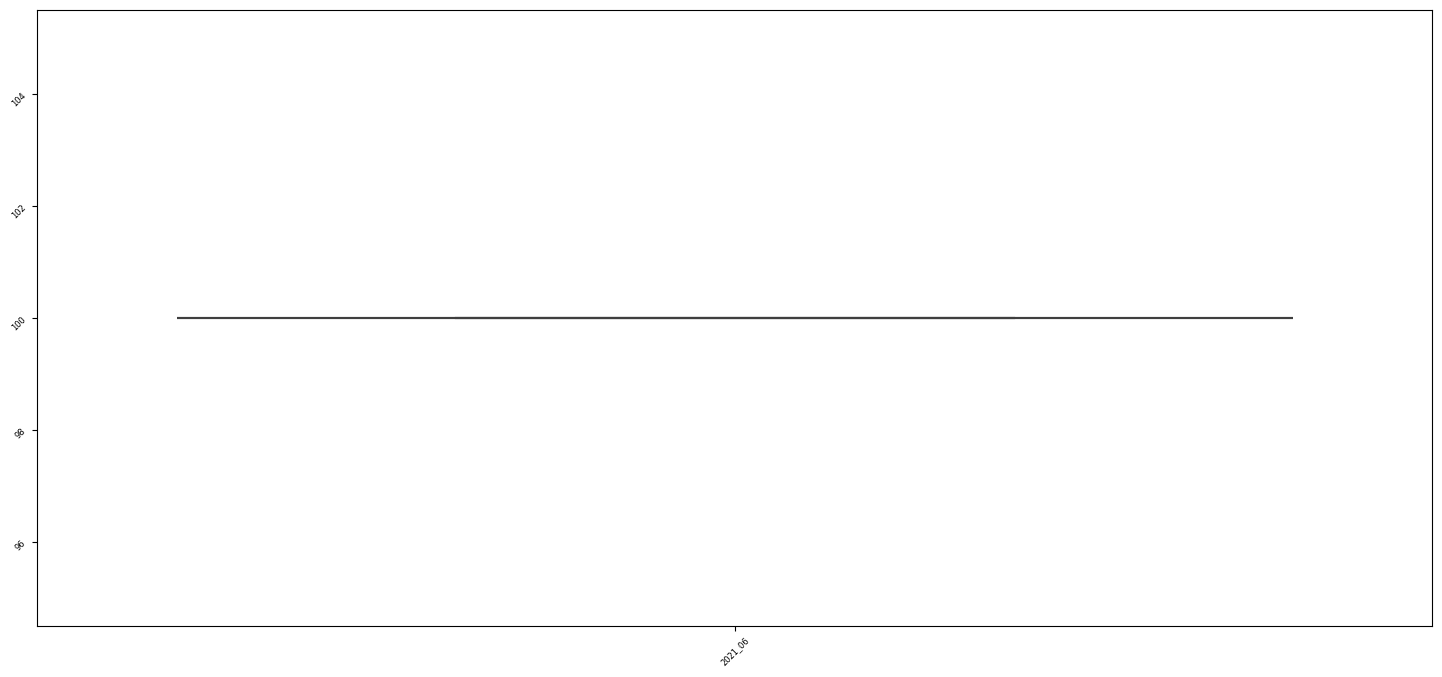

In [676]:
# 10.02.60.01
# render box plot
# dt23

plt.figure(figsize=(18,8))
sns.boxplot(dt23_408_03__________________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

(array([ 94.,  96.,  98., 100., 102., 104., 106.]),
 [Text(0, 94.0, '94'),
  Text(0, 96.0, '96'),
  Text(0, 98.0, '98'),
  Text(0, 100.0, '100'),
  Text(0, 102.0, '102'),
  Text(0, 104.0, '104'),
  Text(0, 106.0, '106')])

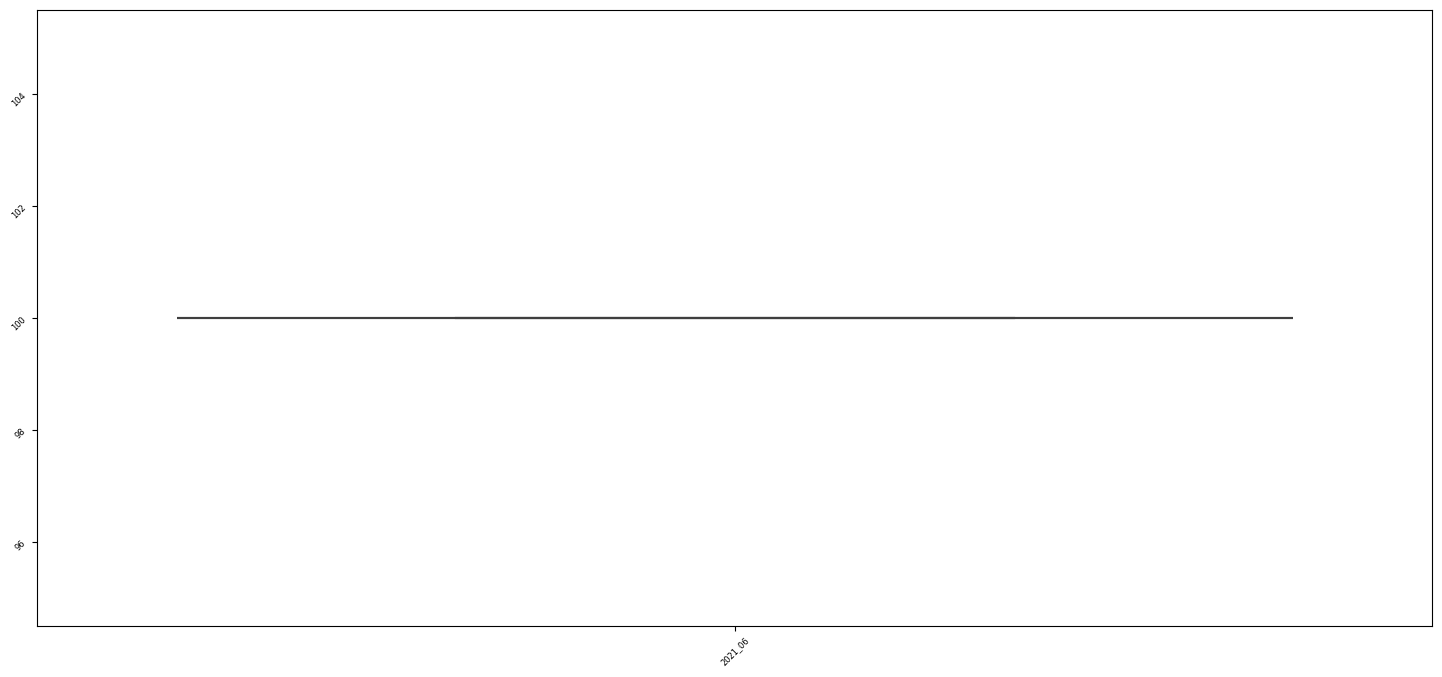

In [677]:
# 10.02.60.02
# render box plot
# dt24

plt.figure(figsize=(18,8))
sns.boxplot(dt24_408_04__________________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

(array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120., 130.]),
 [Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90'),
  Text(0, 100.0, '100'),
  Text(0, 110.0, '110'),
  Text(0, 120.0, '120'),
  Text(0, 130.0, '130')])

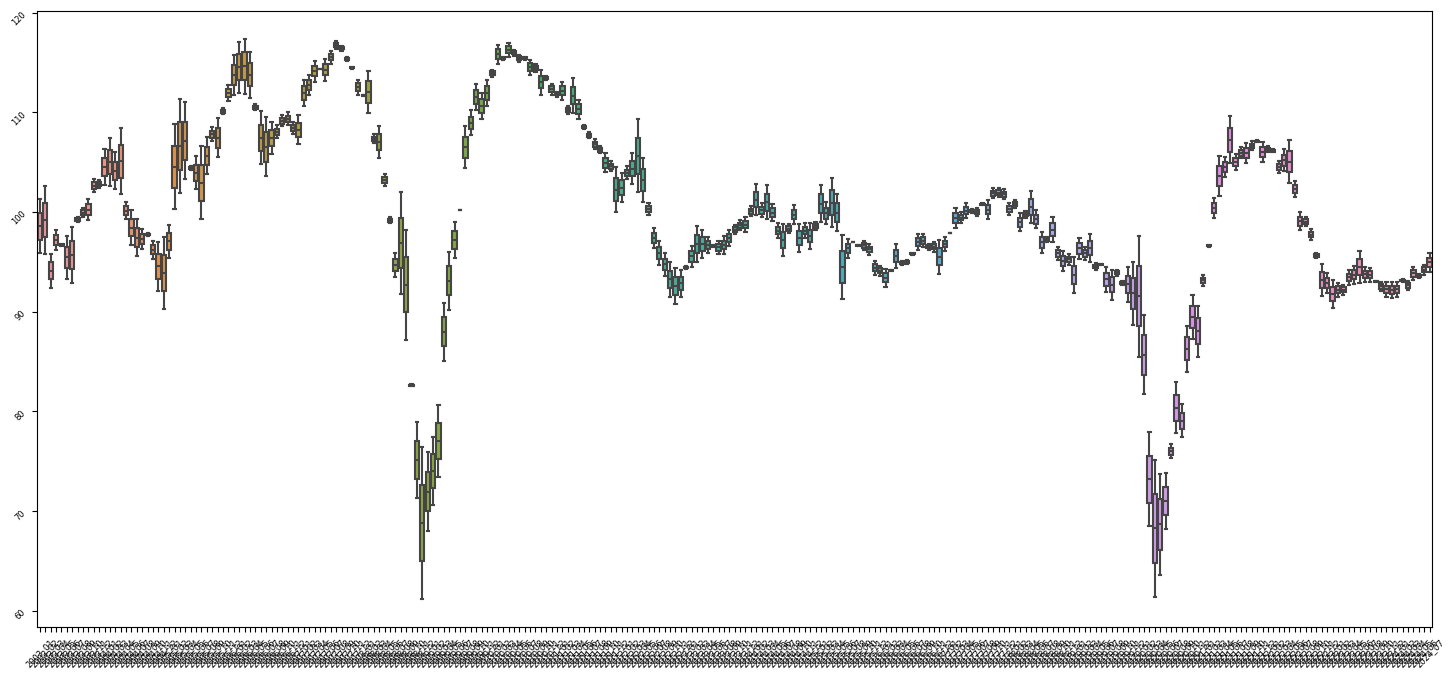

In [678]:
# 10.02.60.03
# render box plot
# dt25

plt.figure(figsize=(18,8))
sns.boxplot(dt25_index_eco_sent__________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

In [679]:
# 10.02.60.04
# render box plot
# dt26

'''plt.figure(figsize=(18,8))
sns.boxplot(dt26_sadness_________________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt26_sadness_________________00_rn)\nplt.xticks(fontsize = 6)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

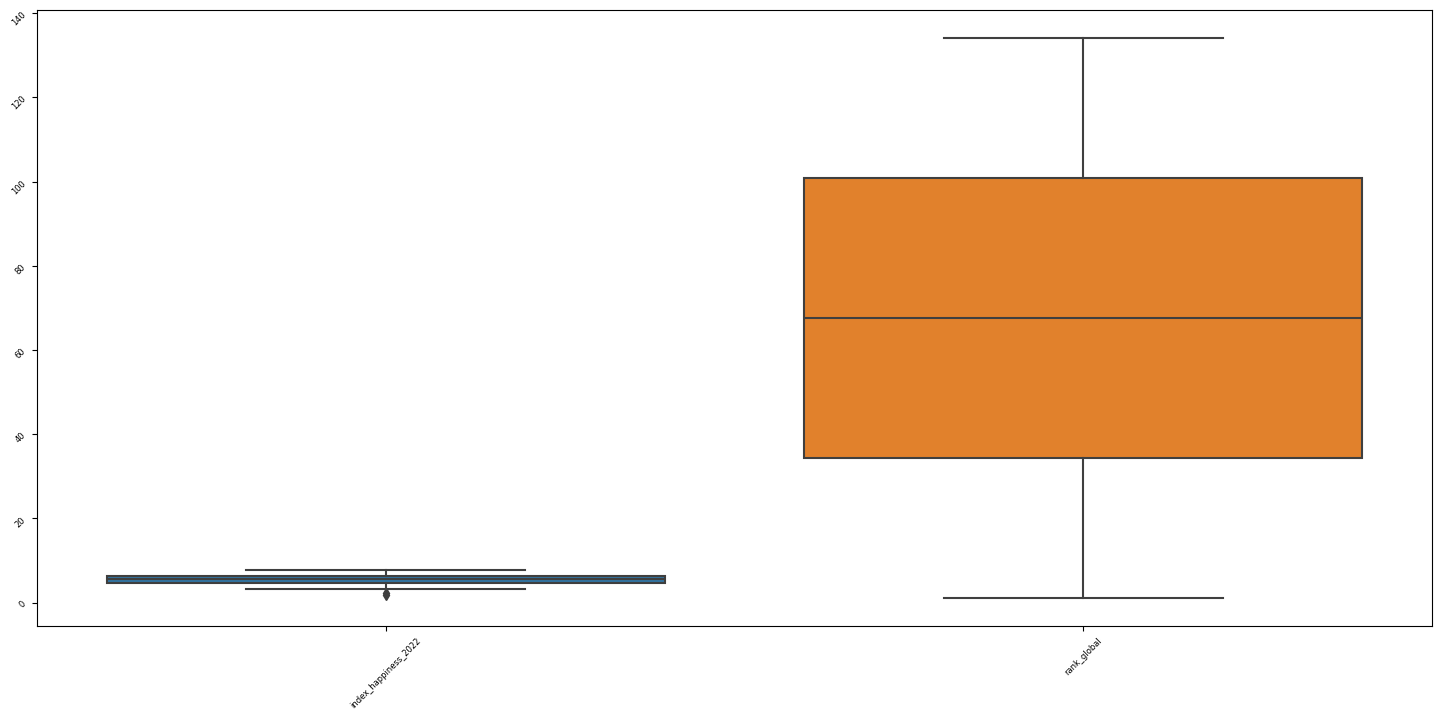

In [680]:
# 10.02.60.05
# render box plot
# dt27

plt.figure(figsize=(18,8))
sns.boxplot(dt27_happiness_01____________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

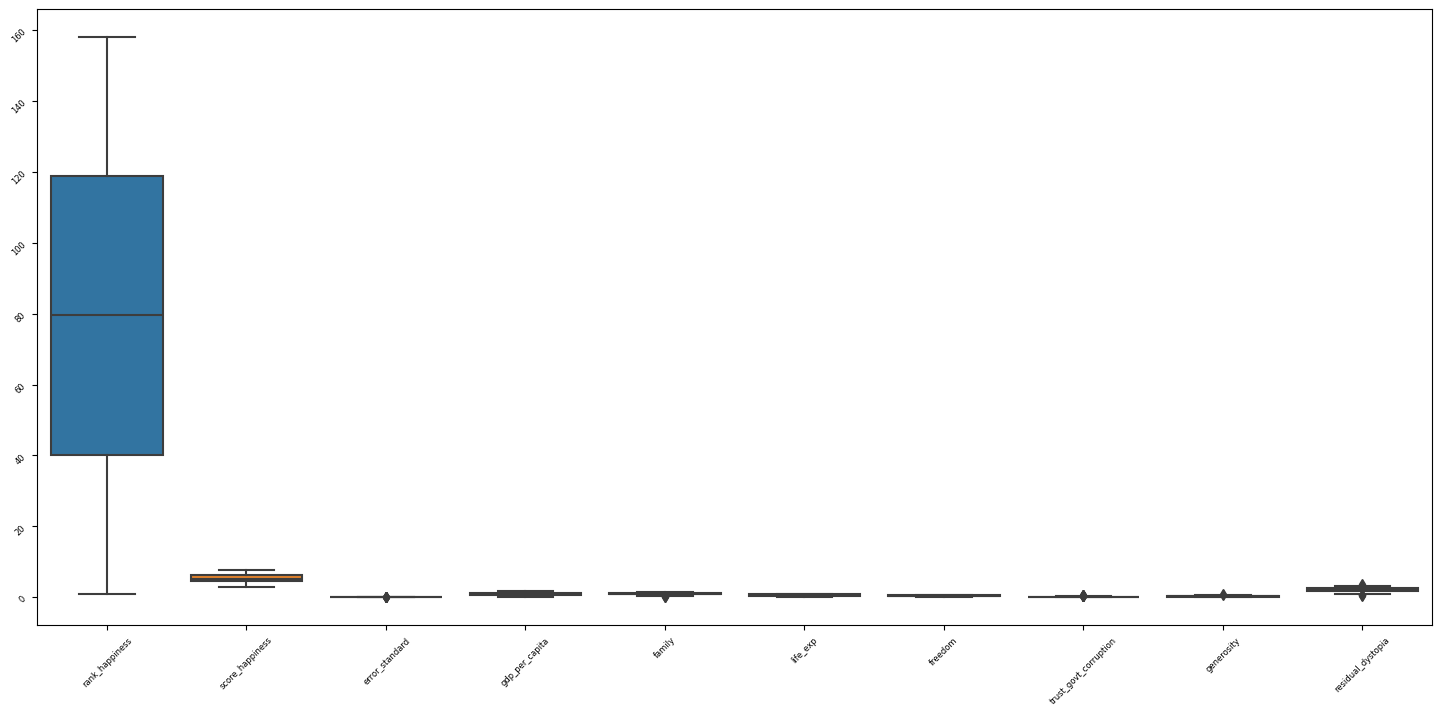

In [681]:
# 10.02.60.06
# render box plot
# dt28

plt.figure(figsize=(18,8))
sns.boxplot(dt28_happiness_2015__________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

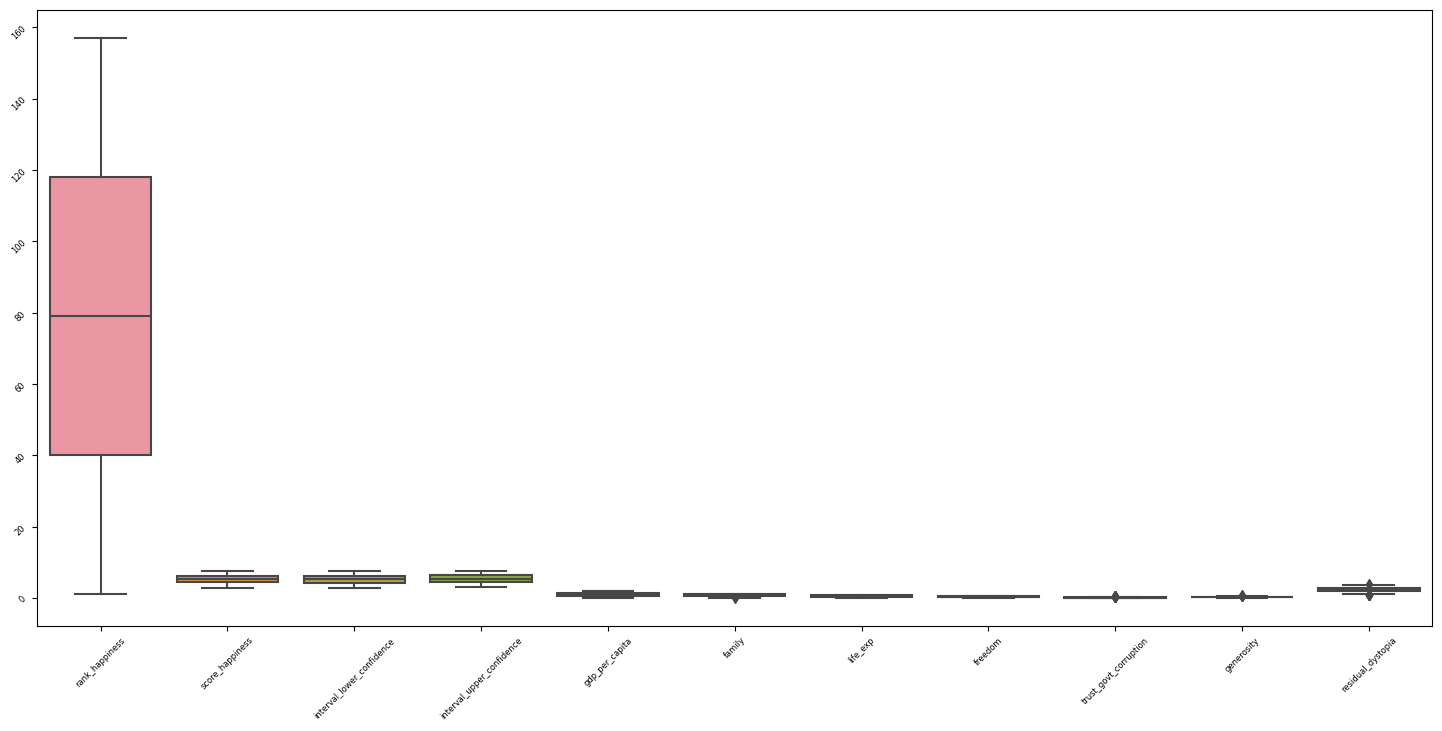

In [682]:
# 10.02.60.07
# render box plot
# dt29

plt.figure(figsize=(18,8))
sns.boxplot(dt29_happiness_2016__________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

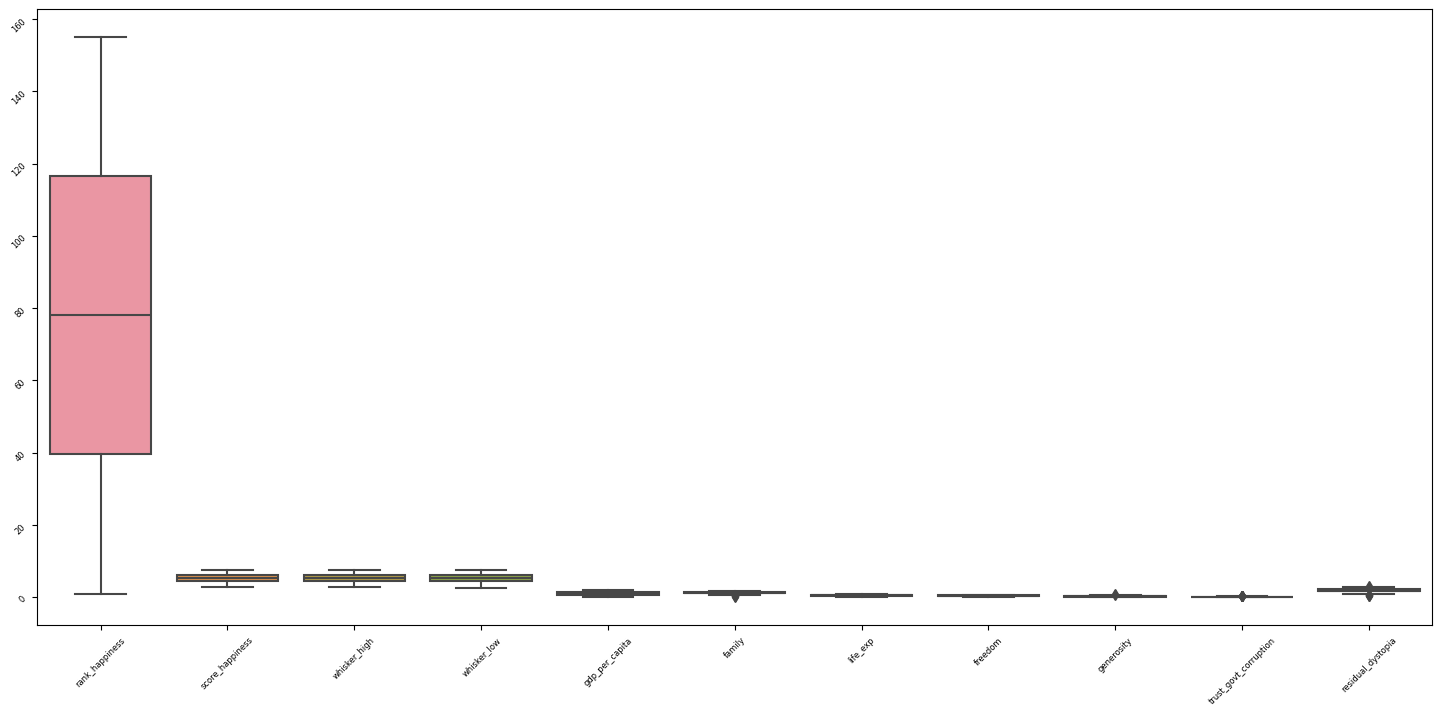

In [683]:
# 10.02.60.08
# render box plot
# dt30

plt.figure(figsize=(18,8))
sns.boxplot(dt30_happiness_2017__________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

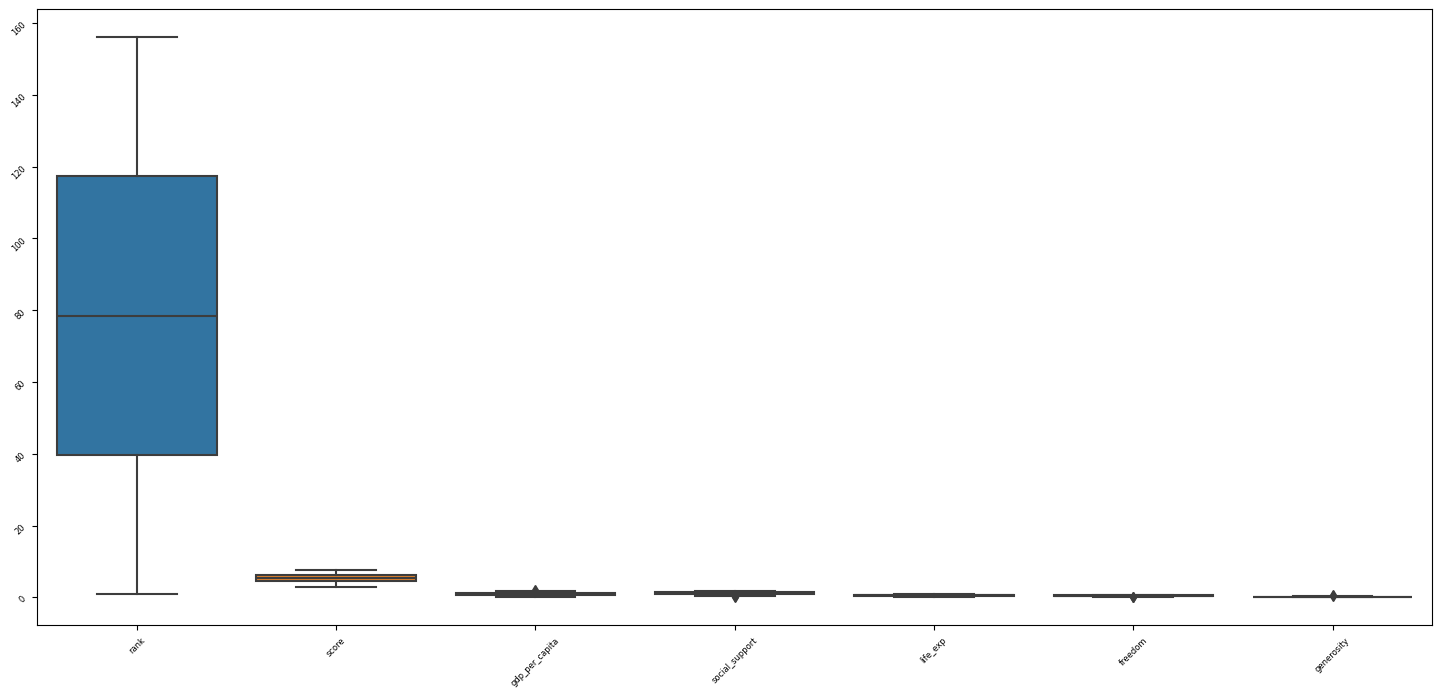

In [684]:
# 10.02.60.09
# render box plot
# dt31

plt.figure(figsize=(18,8))
sns.boxplot(dt31_happiness_2018__________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

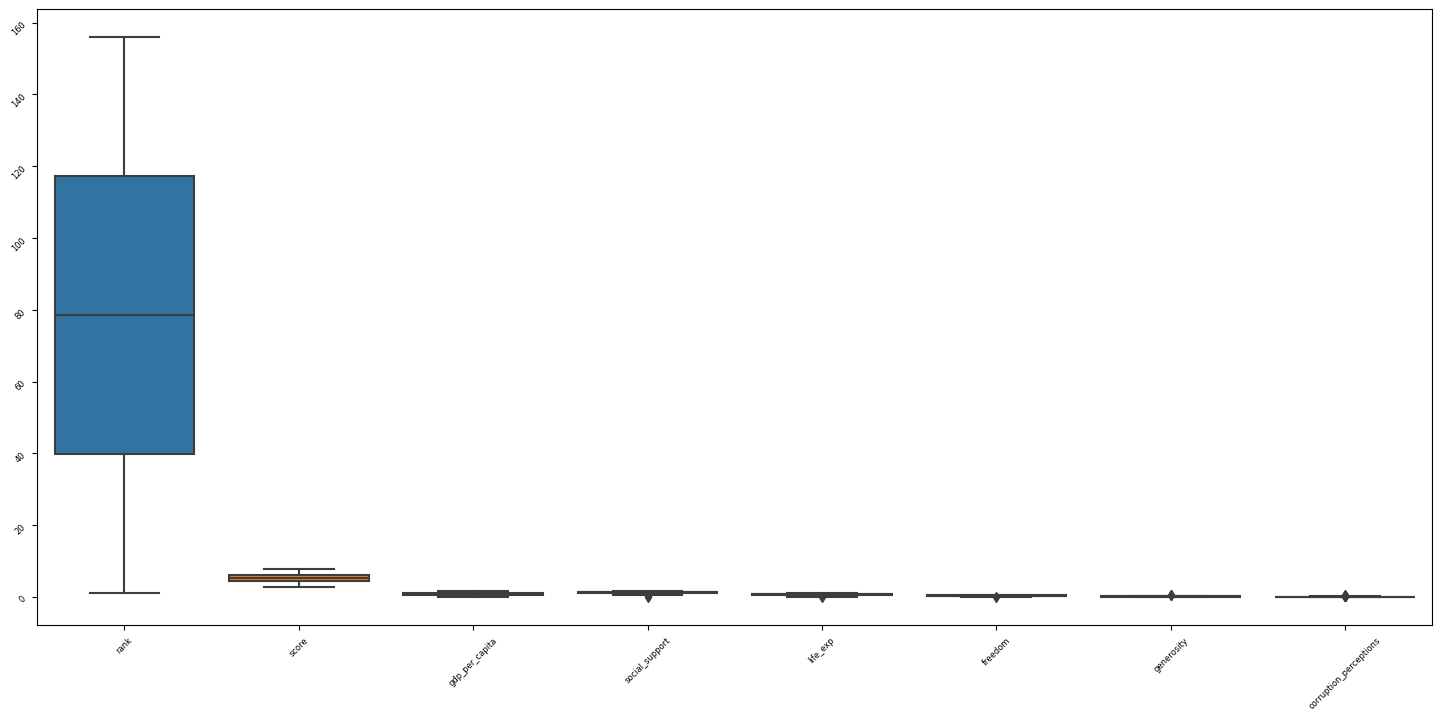

In [685]:
# 10.02.60.10
# render box plot
# dt32

plt.figure(figsize=(18,8))
sns.boxplot(dt32_happiness_2019__________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

In [686]:
# 10.02.60.11
# render box plot
# dt33

'''plt.figure(figsize=(18,8))
sns.boxplot(dt33_pop_income______________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt33_pop_income______________00_rn)\nplt.xticks(fontsize = 6)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [687]:
# 10.02.60.12
# render box plot
# dt34

'''plt.figure(figsize=(18,8))
sns.boxplot(dt34_stress_perc_____________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt34_stress_perc_____________00_rn)\nplt.xticks(fontsize = 6)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [688]:
# 10.02.60.13
# render box plot
# dt35

'''plt.figure(figsize=(18,8))
sns.boxplot(dt35_suic_reason_____________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt35_suic_reason_____________00_rn)\nplt.xticks(fontsize = 6)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

In [689]:
# 10.02.59.14
# render box plot
# dt36

'''plt.figure(figsize=(18,8))
sns.boxplot(dt36_depr_symptom____________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)'''

'plt.figure(figsize=(18,8))\nsns.boxplot(dt36_depr_symptom____________00_rn)\nplt.xticks(fontsize = 6)\nplt.xticks(rotation = 45)\nplt.yticks(fontsize = 6)\nplt.yticks(rotation = 45)'

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(0, -250.0, '−250'),
  Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000'),
  Text(0, 2250.0, '2250')])

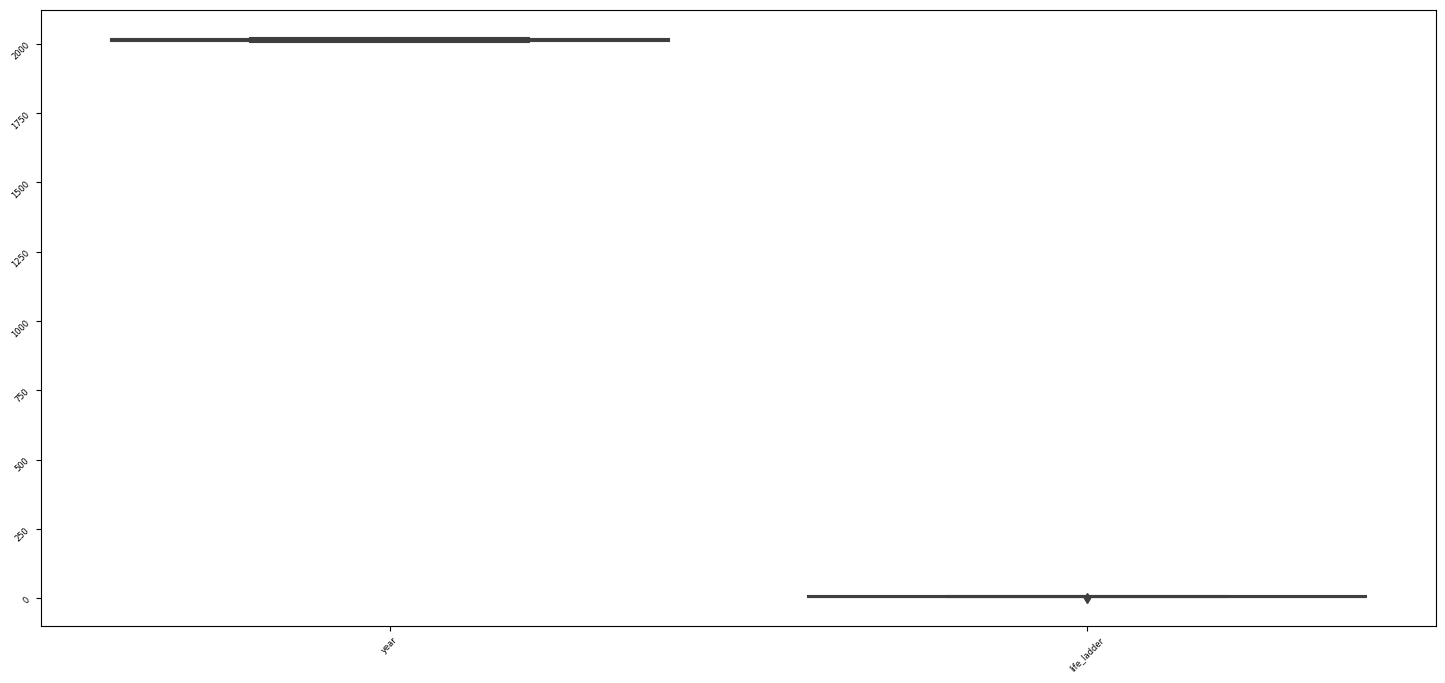

In [690]:
# 10.02.60.15
# render box plot
# dt37

plt.figure(figsize=(18,8))
sns.boxplot(dt37_happiness_world_________00_rn)
plt.xticks(fontsize = 6)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

<Figure size 1800x800 with 0 Axes>

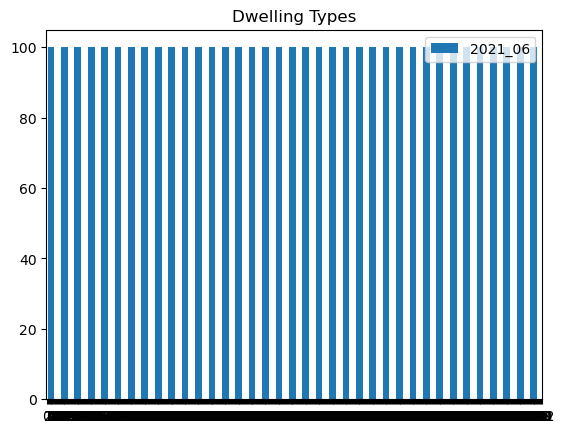

In [691]:
# 10.02.61.01
# render bar chart
# dt23

plt.figure(figsize=(18,8))
dt23_408_03__________________00_rn.plot(kind='bar', stacked=True)
plt.title('Dwelling Types')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

<Figure size 1800x800 with 0 Axes>

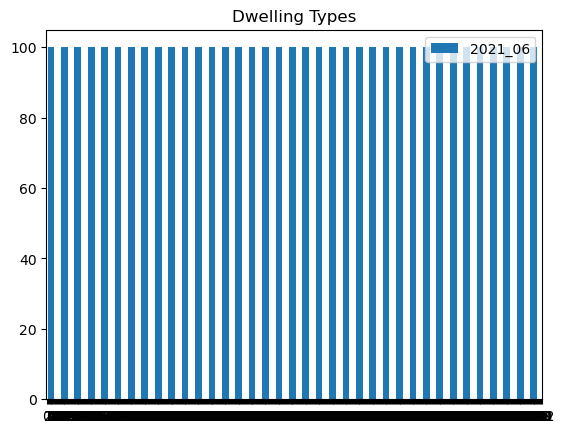

In [692]:
# 10.02.61.02
# render bar chart
# dt24

plt.figure(figsize=(18,8))
dt24_408_04__________________00_rn.plot(kind='bar', stacked=True)
plt.title('Dwelling Types')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

<Figure size 1800x800 with 0 Axes>

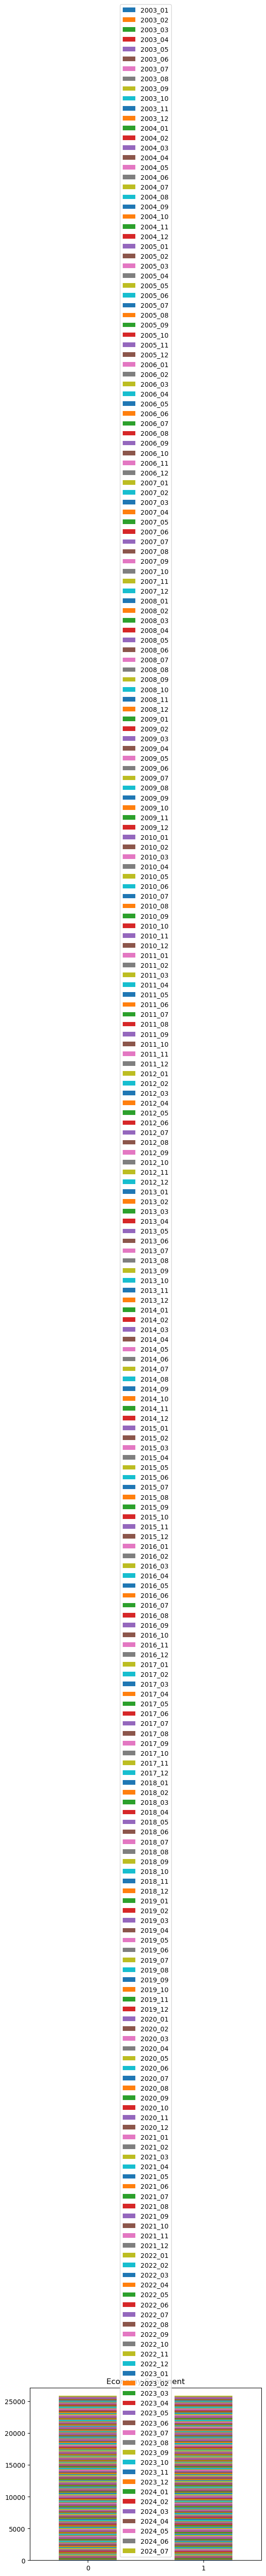

In [693]:
# 10.02.61.03
# render bar chart
# dt25

plt.figure(figsize=(18,8))
dt25_index_eco_sent__________00_rn.plot(kind='bar', stacked=True)
plt.title('Economy Sentiment')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

In [694]:
# 10.02.61.04
# render bar chart
# dt26

'''plt.figure(figsize=(18,8))
dt26_sadness_________________00_rn.plot(kind='bar', stacked=True)
plt.title('Depression Index')
plt.xticks(rotation=0, ha='center')
plt.show()'''

"plt.figure(figsize=(18,8))\ndt26_sadness_________________00_rn.plot(kind='bar', stacked=True)\nplt.title('Depression Index')\nplt.xticks(rotation=0, ha='center')\nplt.show()"

<Figure size 1800x800 with 0 Axes>

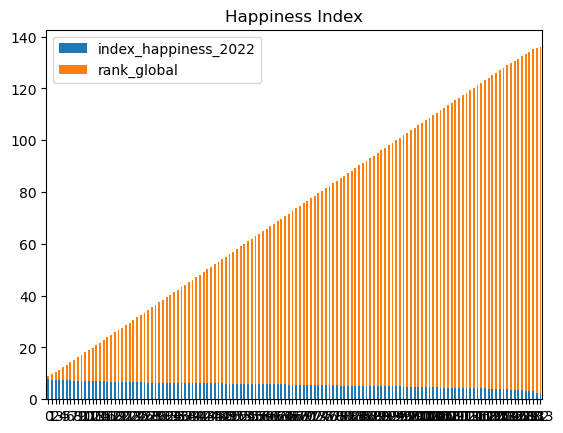

In [695]:
# 10.02.61.05
# render bar chart
# dt27

plt.figure(figsize=(18,8))
dt27_happiness_01____________00_rn.plot(kind='bar', stacked=True)
plt.title('Happiness Index')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

<Figure size 1800x800 with 0 Axes>

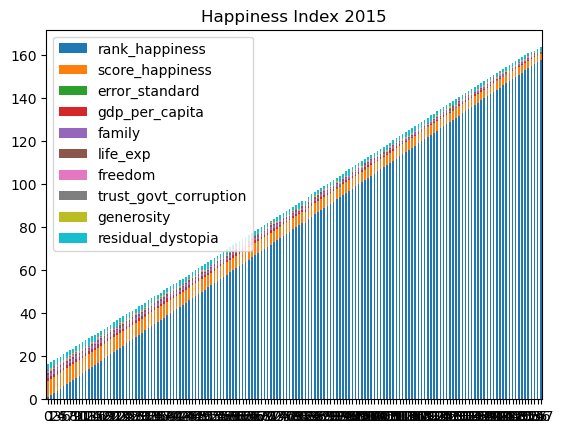

In [696]:
# 10.02.61.06
# render bar chart
# dt28

plt.figure(figsize=(18,8))
dt28_happiness_2015__________00_rn.plot(kind='bar', stacked=True)
plt.title('Happiness Index 2015')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

<Figure size 1800x800 with 0 Axes>

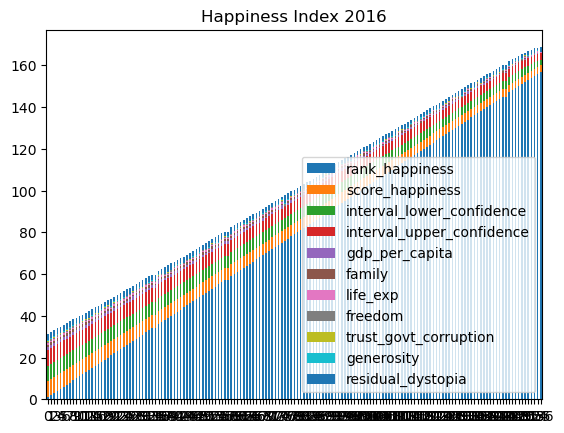

In [697]:
# 10.02.61.07
# render bar chart
# dt29

plt.figure(figsize=(18,8))
dt29_happiness_2016__________00_rn.plot(kind='bar', stacked=True)
plt.title('Happiness Index 2016')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

<Figure size 1800x800 with 0 Axes>

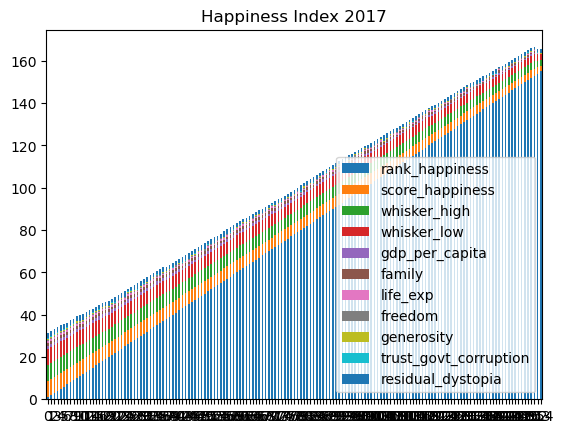

In [698]:
# 10.02.61.08
# render bar chart
# dt30

plt.figure(figsize=(18,8))
dt30_happiness_2017__________00_rn.plot(kind='bar', stacked=True)
plt.title('Happiness Index 2017')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

<Figure size 1800x800 with 0 Axes>

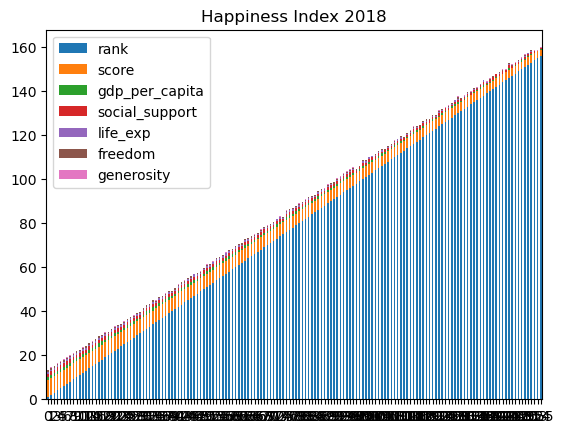

In [699]:
# 10.02.61.09
# render bar chart
# dt31

plt.figure(figsize=(18,8))
dt31_happiness_2018__________00_rn.plot(kind='bar', stacked=True)
plt.title('Happiness Index 2018')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

<Figure size 1800x800 with 0 Axes>

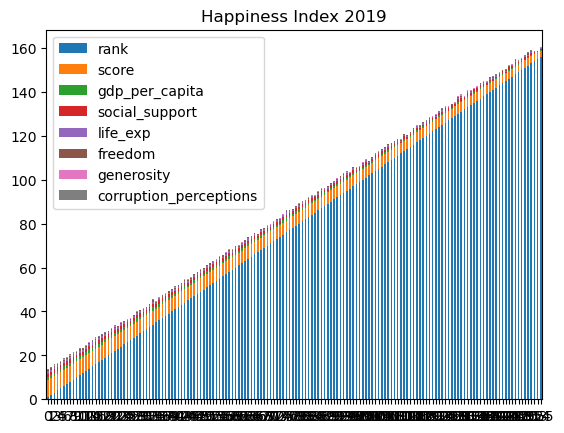

In [700]:
# 10.02.61.10
# render bar chart
# dt32

plt.figure(figsize=(18,8))
dt32_happiness_2019__________00_rn.plot(kind='bar', stacked=True)
plt.title('Happiness Index 2019')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

In [701]:
# 10.02.61.11
# render bar chart
# dt33

'''plt.figure(figsize=(18,8))
dt33_pop_income______________00_rn.plot(kind='bar', stacked=True)
plt.title('Population / Income')
plt.xticks(rotation=0, ha='center')
plt.show()'''

"plt.figure(figsize=(18,8))\ndt33_pop_income______________00_rn.plot(kind='bar', stacked=True)\nplt.title('Population / Income')\nplt.xticks(rotation=0, ha='center')\nplt.show()"

In [702]:
# 10.02.61.12
# render bar chart
# dt34

'''plt.figure(figsize=(18,8))
dt34_stress_perc_____________00_rn.plot(kind='bar', stacked=True)
plt.title('Stress Percentage')
plt.xticks(rotation=0, ha='center')
plt.show()'''

"plt.figure(figsize=(18,8))\ndt34_stress_perc_____________00_rn.plot(kind='bar', stacked=True)\nplt.title('Stress Percentage')\nplt.xticks(rotation=0, ha='center')\nplt.show()"

In [703]:
# 10.02.61.13
# render bar chart
# dt35

'''plt.figure(figsize=(18,8))
dt35_suic_reason_____________00_rn.plot(kind='bar', stacked=True)
plt.title('Suicide Reason')
plt.xticks(rotation=0, ha='center')
plt.show()'''

"plt.figure(figsize=(18,8))\ndt35_suic_reason_____________00_rn.plot(kind='bar', stacked=True)\nplt.title('Suicide Reason')\nplt.xticks(rotation=0, ha='center')\nplt.show()"

In [704]:
# 10.02.61.14
# render bar chart
# dt36

'''plt.figure(figsize=(18,8))
dt36_depr_symptom____________00_rn.plot(kind='bar', stacked=True)
plt.title('Depression Symptoms')
plt.xticks(rotation=0, ha='center')
plt.show()'''

"plt.figure(figsize=(18,8))\ndt36_depr_symptom____________00_rn.plot(kind='bar', stacked=True)\nplt.title('Depression Symptoms')\nplt.xticks(rotation=0, ha='center')\nplt.show()"

<Figure size 1800x800 with 0 Axes>

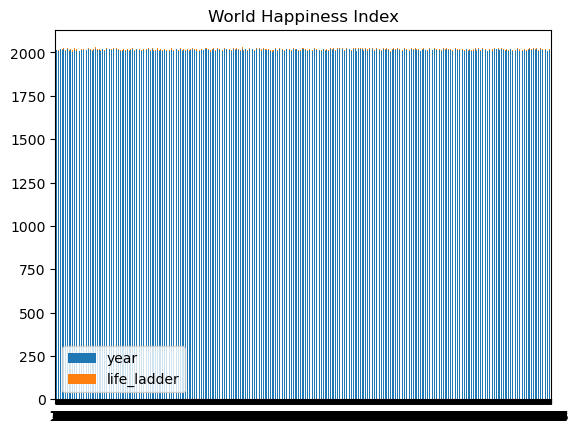

In [705]:
# 10.02.61.15
# render bar chart
# dt37

plt.figure(figsize=(18,8))
dt37_happiness_world_________00_rn.plot(kind='bar', stacked=True)
plt.title('World Happiness Index')
plt.xticks(rotation=0, ha='center')
plt.show()

# uncomment before processing

In [706]:
# 10.02.62.01
# remove continuous label type
# dt23

'''dt25_index_eco_sent__________00_rn = dt25_index_eco_sent__________00_rn.drop("continuous", axis='columns')'''
'''dt25_index_eco_sent__________00_rn = [int(label) for label in dt25_index_eco_sent__________00_rn]'''

'dt25_index_eco_sent__________00_rn = [int(label) for label in dt25_index_eco_sent__________00_rn]'

In [707]:
# 10.02.63.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt23

dt23_408_03__________________00_rn_lnr_id = dt23_408_03__________________00_rn.insert(0, 'index', range(0, 0 + len(dt23_408_03__________________00_rn)))
'''dt23_408_03__________________00_rn.insert(0, 'index', range(0, 0 + len(dt23_408_03__________________00_rn)))
dt23_408_03__________________00_rn_lnr_id = dt23_408_03__________________00_rn'''

"dt23_408_03__________________00_rn.insert(0, 'index', range(0, 0 + len(dt23_408_03__________________00_rn)))\ndt23_408_03__________________00_rn_lnr_id = dt23_408_03__________________00_rn"

In [708]:
# 10.02.63.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: 2012_01
# dt23

dt23_408_03__________________00_rn_lnr_id_dv01 = pd.get_dummies(dt23_408_03__________________00_rn, drop_first = True, dtype = int)
dt23_408_03__________________00_rn_lnr_id_dv01

,index,2021_06,type_Detached Houses,type_Row Houses,region_6LargeCities,region_8Provinces,region_9Provinces,region_Busan,region_Chungbuk,region_Chungnam,region_Daegu,region_Daejeon,region_Dongbu1-kwon,region_Dongbu2-kwon,region_Dongbuk-kwon,region_Dongbusan-kwon,region_Dongnam-kwon,region_Dosim-kwon,region_Gangwon,region_Gwangju,region_Gyeongbu1-kwon,region_Gyeongbu2-kwon,region_Gyeongbuk,region_Gyeonggi,region_Gyeongnam,region_Gyeongui-kwon,region_Gyeongwon-kwon,region_Incheon,region_Jeju,region_Jeonbuk,region_Jeonnam,region_Jungbusan-kwon,region_Non-SeoulMetropolitanArea,region_NorthernSeoul,region_Sejong,region_Seobuk-kwon,region_Seobusan-kwon,region_Seohaean-kwon,region_Seonam-kwon,region_Seoul,...,2024_06_110.3838708,2024_06_104.3068907,2024_06_103.9980439,2024_06_103.9085805,2024_06_105.4474863,2024_06_104.5313014,2024_06_103.3457284,2024_06_108.1747031,2024_06_104.6724437,2024_06_103.7150157,2024_06_104.1177826,2024_06_102.2235116,2024_06_101.6711982,2024_06_109.7078513,2024_06_104.8527071,2024_06_111.5476225,2024_06_105.2931343,2024_06_103.537558,2024_06_103.7024328,2024_06_103.6239345,2024_06_103.4642386,2024_06_103.6257754,2024_06_104.4637123,2024_06_102.1665438,2024_06_103.1403939,2024_06_102.8111094,2024_06_102.697006,2024_06_102.5416886,2024_06_104.9094779,2024_06_104.7500601,2024_06_104.0507568,2024_06_103.7066322,2024_06_103.335245,2024_06_102.3802312,2024_06_100.8362581,2024_06_100.9920637,2024_06_101.0067063,2024_06_102.8895484,2024_06_101.3882777,2024_06_101.2784496
0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,528,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
529,529,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
530,530,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
531,531,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [709]:
# 10.02.63.03
# preparing data for modeling
# split data
# select columns 
# target variable: 2012_01
# dt23

dt23_lnr_x01 = dt23_408_03__________________00_rn_lnr_id_dv01.drop(['2024_06_103.9980439'], axis = 1)
dt23_lnr_y01 = dt23_408_03__________________00_rn_lnr_id_dv01['2024_06_103.9980439']

In [710]:
# 10.02.63.04
# preparing data for modeling
# split into train and test 
# target variable: 2012_01
# dt23

dt23_lnr_x01_trn, dt23_lnr_x01_tst, dt23_lnr_y01_trn, dt23_lnr_y01_tst = train_test_split(dt23_lnr_x01, dt23_lnr_y01, test_size = 0.3, random_state = 0)

In [711]:
# 10.02.63.05
# preparing data for modeling
# assign regression variable 
# target variable: 2012_01
# dt23

dt23_lnr_lr01 = LinearRegression()

In [712]:
# 10.02.63.06
# fit data for modeling
# fit variables to model
# target variable: 2012_01
# dt23

dt23_lnr_lr01.fit(dt23_lnr_x01_trn, dt23_lnr_y01_trn)

LinearRegression()

In [713]:
# 10.02.63.07
# predict data for modeling
# fit variables to model
# target variable: 2012_01
# dt23

dt23_lnr_y01_pdct = dt23_lnr_lr01.predict(dt23_lnr_x01_tst)

In [714]:
# 10.02.63.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: 2012_01
# dt23

dt23_lnr_rmse01 = np.sqrt(mean_squared_error(dt23_lnr_y01_tst, dt23_lnr_y01_pdct))
dt23_lnr_r201 = r2_score(dt23_lnr_y01_tst, dt23_lnr_y01_pdct)

In [715]:
# 10.02.63.09
# run model
# return rmse and r2 dt23
# rmse: 0.004
# r2: 0.0
# target variable: 2012_01
# dt23

print(f'rmse: {dt23_lnr_rmse01}')
print(f'r2: {dt23_lnr_r201}')

rmse: 0.004493912642270682
r2: 0.0


In [716]:
# 10.02.63.10
# assign variable for pca
# target variable: 2012_01
# dt23

pca = PCA(.9)

In [717]:
# 10.02.63.11
# calculate pca
# target variable: 2012_01
# dt23

pca.fit(dt23_lnr_x01_trn)
dt23_lnr_x01_pca_trn = pca.transform(dt23_lnr_x01_trn)
dt23_lnr_x01_pca_tst = pca.transform(dt23_lnr_x01_tst)

In [718]:
# 10.02.63.12
# return pca calculation matrix
# target variable: 2012_01
# dt23

print(f'features in pca matrix: {dt23_lnr_x01_pca_trn.shape[1]}')

features in pca matrix: 1


In [719]:
# 10.02.64.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt23

'''dt23_408_03__________________00_rn_lgr_id = dt23_408_03__________________00_rn.insert(0, 'index', range(0, 0 + len(dt23_408_03__________________00_rn)))'''
'''dt23_408_03__________________00_rn.insert(0, 'index', range(0, 0 + len(dt23_408_03__________________00_rn)))'''
dt23_408_03__________________00_rn_lgr_id = dt23_408_03__________________00_rn

In [720]:
# 10.02.64.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt23

dt23_408_03__________________00_rn_lgr_id_dv01 = pd.get_dummies(dt23_408_03__________________00_rn_lgr_id, drop_first = True, dtype = int)
dt23_408_03__________________00_rn_lgr_id_dv01

,index,2021_06,type_Detached Houses,type_Row Houses,region_6LargeCities,region_8Provinces,region_9Provinces,region_Busan,region_Chungbuk,region_Chungnam,region_Daegu,region_Daejeon,region_Dongbu1-kwon,region_Dongbu2-kwon,region_Dongbuk-kwon,region_Dongbusan-kwon,region_Dongnam-kwon,region_Dosim-kwon,region_Gangwon,region_Gwangju,region_Gyeongbu1-kwon,region_Gyeongbu2-kwon,region_Gyeongbuk,region_Gyeonggi,region_Gyeongnam,region_Gyeongui-kwon,region_Gyeongwon-kwon,region_Incheon,region_Jeju,region_Jeonbuk,region_Jeonnam,region_Jungbusan-kwon,region_Non-SeoulMetropolitanArea,region_NorthernSeoul,region_Sejong,region_Seobuk-kwon,region_Seobusan-kwon,region_Seohaean-kwon,region_Seonam-kwon,region_Seoul,...,2024_06_110.3838708,2024_06_104.3068907,2024_06_103.9980439,2024_06_103.9085805,2024_06_105.4474863,2024_06_104.5313014,2024_06_103.3457284,2024_06_108.1747031,2024_06_104.6724437,2024_06_103.7150157,2024_06_104.1177826,2024_06_102.2235116,2024_06_101.6711982,2024_06_109.7078513,2024_06_104.8527071,2024_06_111.5476225,2024_06_105.2931343,2024_06_103.537558,2024_06_103.7024328,2024_06_103.6239345,2024_06_103.4642386,2024_06_103.6257754,2024_06_104.4637123,2024_06_102.1665438,2024_06_103.1403939,2024_06_102.8111094,2024_06_102.697006,2024_06_102.5416886,2024_06_104.9094779,2024_06_104.7500601,2024_06_104.0507568,2024_06_103.7066322,2024_06_103.335245,2024_06_102.3802312,2024_06_100.8362581,2024_06_100.9920637,2024_06_101.0067063,2024_06_102.8895484,2024_06_101.3882777,2024_06_101.2784496
0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,528,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
529,529,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
530,530,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
531,531,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [721]:
# 10.02.64.03
# preparing data for modeling
# split data
# select columns
# target variable: 2012_01
# dt23

dt23_lgr_x01 = dt23_408_03__________________00_rn_lgr_id_dv01.drop('2024_06_110.3838708', axis=1)
dt23_lgr_y01 = dt23_408_03__________________00_rn_lgr_id_dv01['2024_06_110.3838708']

In [722]:
# 10.02.64.04
# preparing data for modeling
# assign regression variable 
# target variable: 2012_01
# dt23

dt23_lgr_lr01 = LogisticRegression()

In [723]:
# 10.02.64.05
# preparing data for modeling
# split into train and test 
# target variable: 2012_01
# dt23

dt23_lgr_x01_trn, dt23_lgr_x01_tst, dt23_lgr_y01_trn, dt23_lgr_y01_tst = train_test_split(dt23_lgr_x01, dt23_lgr_y01, test_size = 0.2, random_state = 42)

In [724]:
# 10.02.64.06
# preparing data for modeling
# assign regression variable 
# target variable: 2012_01
# dt23

dt23_lgr_lr01.fit(dt23_lgr_x01_trn, dt23_lgr_y01_trn)

LogisticRegression()

In [725]:
# 10.02.64.07
# fit data for modeling
# fit variables to model
# target variable: 2012_01
# dt23

dt23_lgr_y01_pdct = dt23_lgr_lr01.predict(dt23_lgr_x01_tst)

In [726]:
# 10.02.64.08
# assign variable for accuracy
# return accuracy
# accuracy: 1.0
# target variable: 2012_01
# dt23

dt23_lgr_acc01 = accuracy_score(dt23_lgr_y01_tst, dt23_lgr_y01_pdct)
print('Accuracy:', dt23_lgr_acc01)

Accuracy: 1.0


In [727]:
# 10.02.64.09
# return classification report
# target variable: 2012_01
# dt23

print('Classification Report:')
print(classification_report(dt23_lgr_y01_tst, dt23_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [728]:
# 10.02.65.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt24

dt24_408_04__________________00_rn_lnr_id = dt24_408_04__________________00_rn.insert(0, 'index', range(0, 0 + len(dt24_408_04__________________00_rn)))
'''dt24_408_04__________________00_rn.insert(0, 'index', range(0, 0 + len(dt24_408_04__________________00_rn)))'''
'''dt24_408_04__________________00_rn_lnr_id = dt24_408_04__________________00_rn'''

'dt24_408_04__________________00_rn_lnr_id = dt24_408_04__________________00_rn'

In [729]:
# 10.02.65.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: 2012_01
# dt24

'''dt24_408_04__________________00_rn_lnr_id_dv01 = pd.get_dummies(dt24_408_04__________________00_rn_lnr_id, drop_first = True, dtype = int)
dt24_408_04__________________00_rn_lnr_id_dv01'''

'dt24_408_04__________________00_rn_lnr_id_dv01 = pd.get_dummies(dt24_408_04__________________00_rn_lnr_id, drop_first = True, dtype = int)\ndt24_408_04__________________00_rn_lnr_id_dv01'

In [730]:
# 10.02.65.03
# preparing data for modeling
# split data
# select columns 
# target variable: 2012_01
# dt24

'''dt24_lnr_x01 = dt24_408_04__________________00_rn_lnr_id_dv01.drop(['2012_01'], axis = 1)
dt24_lnr_y01 = dt24_408_04__________________00_rn_lnr_id_dv01['2012_01']'''
'''dt24_lnr_x01 = dt24_408_04__________________00_rn.drop(['2012_01'], axis = 1)
dt24_lnr_y01 = dt24_408_04__________________00_rn['2012_01']'''

"dt24_lnr_x01 = dt24_408_04__________________00_rn.drop(['2012_01'], axis = 1)\ndt24_lnr_y01 = dt24_408_04__________________00_rn['2012_01']"

In [731]:
# 10.02.65.04
# preparing data for modeling
# split into train and test 
# target variable: 2012_01
# dt24

'''dt24_lnr_x01_trn, dt24_lnr_x01_tst, dt24_lnr_y01_trn, dt24_lnr_y01_tst = train_test_split(dt24_lnr_x01, dt24_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt24_lnr_x01_trn, dt24_lnr_x01_tst, dt24_lnr_y01_trn, dt24_lnr_y01_tst = train_test_split(dt24_lnr_x01, dt24_lnr_y01, test_size = 0.3, random_state = 0)'

In [732]:
# 10.02.65.05
# preparing data for modeling
# assign regression variable 
# target variable: 2012_01
# dt24

'''dt24_lnr_lr01 = LinearRegression()'''

'dt24_lnr_lr01 = LinearRegression()'

In [733]:
# 10.02.65.06
# fit data for modeling
# fit variables to model
# target variable: 2012_01
# dt24

'''dt24_lnr_lr01.fit(dt24_lnr_x01_trn, dt24_lnr_y01_trn)'''

'dt24_lnr_lr01.fit(dt24_lnr_x01_trn, dt24_lnr_y01_trn)'

In [734]:
# 10.02.65.07
# predict data for modeling
# fit variables to model
# target variable: 2012_01
# dt24

'''dt24_lnr_y01_pdct = dt24_lnr_lr01.predict(dt24_lnr_x01_tst)'''

'dt24_lnr_y01_pdct = dt24_lnr_lr01.predict(dt24_lnr_x01_tst)'

In [735]:
# 10.02.65.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: 2012_01
# dt24

'''dt24_lnr_rmse01 = np.sqrt(mean_squared_error(dt24_lnr_y01_tst, dt24_lnr_y01_pdct))
dt24_lnr_r201 = r2_score(dt24_lnr_y01_tst, dt24_lnr_y01_pdct)'''

'dt24_lnr_rmse01 = np.sqrt(mean_squared_error(dt24_lnr_y01_tst, dt24_lnr_y01_pdct))\ndt24_lnr_r201 = r2_score(dt24_lnr_y01_tst, dt24_lnr_y01_pdct)'

In [736]:
# 10.02.65.09
# run model
# return rmse and r2 dt24
# rmse: 
# r2: 
# target variable: 2012_01
# dt24

'''print(f'rmse: {dt24_lnr_rmse01}')
print(f'r2: {dt24_lnr_r201}')'''

"print(f'rmse: {dt24_lnr_rmse01}')\nprint(f'r2: {dt24_lnr_r201}')"

In [737]:
# 10.02.65.10
# assign variable for pca
# target variable: 2012_01
# dt24

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [738]:
# 10.02.65.11
# calculate pca
# target variable: 2012_01
# dt24

'''pca.fit(dt24_lnr_x01_trn)
dt24_lnr_x01_pca_trn = pca.transform(dt24_lnr_x01_trn)
dt24_lnr_x01_pca_tst = pca.transform(dt24_lnr_x01_tst)'''

'pca.fit(dt24_lnr_x01_trn)\ndt24_lnr_x01_pca_trn = pca.transform(dt24_lnr_x01_trn)\ndt24_lnr_x01_pca_tst = pca.transform(dt24_lnr_x01_tst)'

In [739]:
# 10.02.65.12
# return pca calculation matrix
# target variable: 2012_01
# dt24

'''print(f'features in pca matrix: {dt24_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt24_lnr_x01_pca_trn.shape[1]}')"

In [740]:
# 10.02.66.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt24

'''dt24_408_04__________________00_rn_lgr_id = dt24_408_04__________________00_rn.insert(0, 'index', range(0, 0 + len(dt24_408_04__________________00_rn)))'''
'''dt24_408_04__________________00_rn.insert(0, 'index', range(0, 0 + len(dt24_408_04__________________00_rn)))'''
dt24_408_04__________________00_rn_lgr_id = dt24_408_04__________________00_rn

In [741]:
# 10.02.66.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt24

dt24_408_04__________________00_rn_lgr_id_dv01 = pd.get_dummies(dt24_408_04__________________00_rn_lgr_id, drop_first = True, dtype = int)
dt24_408_04__________________00_rn_lgr_id_dv01

,index,2021_06,type_Detached Houses,type_Row Houses,region_6LargeCities,region_8Provinces,region_9Provinces,region_Busan,region_Chungbuk,region_Chungnam,region_Daegu,region_Daejeon,region_Dongbu1-kwon,region_Dongbu2-kwon,region_Dongbuk-kwon,region_Dongbusan-kwon,region_Dongnam-kwon,region_Dosim-kwon,region_Gangwon,region_Gwangju,region_Gyeongbu1-kwon,region_Gyeongbu2-kwon,region_Gyeongbuk,region_Gyeonggi,region_Gyeongnam,region_Gyeongui-kwon,region_Gyeongwon-kwon,region_Incheon,region_Jeju,region_Jeonbuk,region_Jeonnam,region_Jungbusan-kwon,region_Non-SeoulMetropolitanArea,region_NorthernSeoul,region_Sejong,region_Seobuk-kwon,region_Seobusan-kwon,region_Seohaean-kwon,region_Seonam-kwon,region_Seoul,...,2024_06_100.0,2024_06_99.97011946,2024_06_100.292152,2024_06_100.8965294,2024_06_101.02507,2024_06_100.949589,2024_06_100.4277137,2024_06_98.32162068,2024_06_99.11759224,2024_06_98.80631007,2024_06_101.9332039,2024_06_101.5611979,2024_06_99.07333679,2024_06_99.17439926,2024_06_98.37315219,2024_06_98.09476217,2024_06_101.8868248,2024_06_101.5282157,2024_06_102.2949506,2024_06_100.8382189,2024_06_100.7250955,2024_06_101.3108125,2024_06_100.1893158,2024_06_99.75256409,2024_06_100.3576279,2024_06_99.83680224,2024_06_99.89168508,2024_06_100.1015007,2024_06_100.8309011,2024_06_100.8286942,2024_06_100.1006628,2024_06_100.2853223,2024_06_100.5784149,2024_06_100.2573377,2024_06_99.67522335,2024_06_99.87365498,2024_06_99.93055741,2024_06_100.8785612,2024_06_100.1817754,2024_06_99.88036645
0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,528,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
529,529,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
530,530,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
531,531,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [742]:
# 10.02.66.03
# preparing data for modeling
# split data
# select columns
# target variable: 2012_01
# dt24

dt24_lgr_x01 = dt24_408_04__________________00_rn_lgr_id_dv01.drop('2024_06_100.0', axis=1)
dt24_lgr_y01 = dt24_408_04__________________00_rn_lgr_id_dv01['2024_06_100.0']
'''dt24_lgr_x01 = dt24_408_04__________________00_rn.drop('2012_01', axis=1)
dt24_lgr_y01 = dt24_408_04__________________00_rn['2012_01']'''

"dt24_lgr_x01 = dt24_408_04__________________00_rn.drop('2012_01', axis=1)\ndt24_lgr_y01 = dt24_408_04__________________00_rn['2012_01']"

In [743]:
# 10.02.66.04
# preparing data for modeling
# assign regression variable 
# target variable: 2012_01
# dt24

dt24_lgr_lr01 = LogisticRegression()

In [744]:
# 10.02.66.05
# preparing data for modeling
# split into train and test 
# target variable: 2012_01
# dt24

dt24_lgr_x01_trn, dt24_lgr_x01_tst, dt24_lgr_y01_trn, dt24_lgr_y01_tst = train_test_split(dt24_lgr_x01, dt24_lgr_y01, test_size = 0.2, random_state = 42)

In [745]:
# 10.02.66.06
# preparing data for modeling
# assign regression variable 
# target variable: 2012_01
# dt24

dt24_lgr_lr01.fit(dt24_lgr_x01_trn, dt24_lgr_y01_trn)

LogisticRegression()

In [746]:
# 10.02.66.07
# fit data for modeling
# fit variables to model
# target variable: 2012_01
# dt24

dt24_lgr_y01_pdct = dt24_lgr_lr01.predict(dt24_lgr_x01_tst)

In [747]:
# 10.02.66.08
# assign variable for accuracy
# return accuracy
# accuracy: 1.0
# target variable: 2012_01
# dt24

dt24_lgr_acc01 = accuracy_score(dt24_lgr_y01_tst, dt24_lgr_y01_pdct)
print('Accuracy:', dt24_lgr_acc01)

Accuracy: 1.0


In [748]:
# 10.02.66.09
# return classification report
# target variable: 2012_01
# dt24

print('Classification Report:')
print(classification_report(dt24_lgr_y01_tst, dt24_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [749]:
# 10.02.67.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt25

dt25_index_eco_sent__________00_rn_lnr_id = dt25_index_eco_sent__________00_rn.insert(0, 'index', range(0, 0 + len(dt25_index_eco_sent__________00_rn)))
'''dt25_index_eco_sent__________00_rn.insert(0, 'index', range(0, 0 + len(dt25_index_eco_sent__________00_rn)))'''
'''dt25_index_eco_sent__________00_rn_lnr_id = dt25_index_eco_sent__________00_rn'''

'dt25_index_eco_sent__________00_rn_lnr_id = dt25_index_eco_sent__________00_rn'

In [750]:
# 10.02.67.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: 2023_01
# dt25

'''dt25_index_eco_sent__________00_rn_lnr_id_dv01 = pd.get_dummies(dt25_index_eco_sent__________00_rn_lnr_id, drop_first = True, dtype = int)
dt25_index_eco_sent__________00_rn_lnr_id_dv01'''

'dt25_index_eco_sent__________00_rn_lnr_id_dv01 = pd.get_dummies(dt25_index_eco_sent__________00_rn_lnr_id, drop_first = True, dtype = int)\ndt25_index_eco_sent__________00_rn_lnr_id_dv01'

In [751]:
# 10.02.67.03
# preparing data for modeling
# split data
# select columns 
# target variable: 2023_01
# dt25

'''dt25_lnr_x01 = dt25_index_eco_sent__________00_rn_lnr_id_dv01.drop(['2023_01'], axis = 1)
dt25_lnr_y01 = dt25_index_eco_sent__________00_rn_lnr_id_dv01['2023_01']'''
'''dt25_lnr_x01 = dt25_index_eco_sent__________00_rn.drop(['2023_01'], axis = 1)
dt25_lnr_y01 = dt25_index_eco_sent__________00_rn['2023_01']'''

"dt25_lnr_x01 = dt25_index_eco_sent__________00_rn.drop(['2023_01'], axis = 1)\ndt25_lnr_y01 = dt25_index_eco_sent__________00_rn['2023_01']"

In [752]:
# 10.02.67.04
# preparing data for modeling
# split into train and test 
# target variable: 2023_01
# dt25

'''dt25_lnr_x01_trn, dt25_lnr_x01_tst, dt25_lnr_y01_trn, dt25_lnr_y01_tst = train_test_split(dt25_lnr_x01, dt25_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt25_lnr_x01_trn, dt25_lnr_x01_tst, dt25_lnr_y01_trn, dt25_lnr_y01_tst = train_test_split(dt25_lnr_x01, dt25_lnr_y01, test_size = 0.3, random_state = 0)'

In [753]:
# 10.02.67.05
# preparing data for modeling
# assign regression variable 
# target variable: 2023_01
# dt25

'''dt25_lnr_lr01 = LinearRegression()'''

'dt25_lnr_lr01 = LinearRegression()'

In [754]:
# 10.02.67.06
# fit data for modeling
# fit variables to model
# target variable: 2023_01
# dt25

'''dt25_lnr_lr01.fit(dt25_lnr_x01_trn, dt25_lnr_y01_trn)'''

'dt25_lnr_lr01.fit(dt25_lnr_x01_trn, dt25_lnr_y01_trn)'

In [755]:
# 10.02.67.07
# predict data for modeling
# fit variables to model
# target variable: 2023_01
# dt25

'''dt25_lnr_y01_pdct = dt25_lnr_lr01.predict(dt25_lnr_x01_tst)'''

'dt25_lnr_y01_pdct = dt25_lnr_lr01.predict(dt25_lnr_x01_tst)'

In [756]:
# 10.02.67.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: 2023_01
# dt25

'''dt25_lnr_rmse01 = np.sqrt(mean_squared_error(dt25_lnr_y01_tst, dt25_lnr_y01_pdct))
dt25_lnr_r201 = r2_score(dt25_lnr_y01_tst, dt25_lnr_y01_pdct)'''

'dt25_lnr_rmse01 = np.sqrt(mean_squared_error(dt25_lnr_y01_tst, dt25_lnr_y01_pdct))\ndt25_lnr_r201 = r2_score(dt25_lnr_y01_tst, dt25_lnr_y01_pdct)'

In [757]:
# 10.02.67.09
# run model
# return rmse and r2 dt25
# rmse: 2.8
# r2: nan
# target variable: 2023_01
# dt25

'''print(f'rmse: {dt25_lnr_rmse01}')
print(f'r2: {dt25_lnr_r201}')'''

"print(f'rmse: {dt25_lnr_rmse01}')\nprint(f'r2: {dt25_lnr_r201}')"

In [758]:
# 10.02.67.10
# assign variable for pca
# target variable: 2023_01
# dt25

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [759]:
# 10.02.67.11
# calculate pca
# target variable: 2023_01
# dt25

'''pca.fit(dt25_lnr_x01_trn)
dt25_lnr_x01_pca_trn = pca.transform(dt25_lnr_x01_trn)
dt25_lnr_x01_pca_tst = pca.transform(dt25_lnr_x01_tst)'''

'pca.fit(dt25_lnr_x01_trn)\ndt25_lnr_x01_pca_trn = pca.transform(dt25_lnr_x01_trn)\ndt25_lnr_x01_pca_tst = pca.transform(dt25_lnr_x01_tst)'

In [760]:
# 10.02.66.12
# return pca calculation matrix
# target variable: 2023_01
# dt25

'''print(f'features in pca matrix: {dt25_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt25_lnr_x01_pca_trn.shape[1]}')"

In [761]:
# 10.02.68.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt25

'''dt25_index_eco_sent__________00_rn_lgr_id = dt25_index_eco_sent__________00_rn.insert(0, 'index', range(0, 0 + len(dt25_index_eco_sent__________00_rn)))'''
'''dt25_index_eco_sent__________00_rn.insert(0, 'index', range(0, 0 + len(dt25_index_eco_sent__________00_rn)))'''
dt25_index_eco_sent__________00_rn_lgr_id = dt25_index_eco_sent__________00_rn

In [762]:
# 10.02.68.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt25

'''dt25_index_eco_sent__________00_rn_lgr_id_dv01 = pd.get_dummies(dt25_index_eco_sent__________00_rn_lgr_id, drop_first = True, dtype = int)
dt25_index_eco_sent__________00_rn_lgr_id_dv01'''

'dt25_index_eco_sent__________00_rn_lgr_id_dv01 = pd.get_dummies(dt25_index_eco_sent__________00_rn_lgr_id, drop_first = True, dtype = int)\ndt25_index_eco_sent__________00_rn_lgr_id_dv01'

In [763]:
# 10.02.68.03
# preparing data for modeling
# split data
# select columns
# target variable: 2023_01
# dt25

'''dt25_lgr_x01 = dt25_index_eco_sent__________00_rn_lgr_id_dv01.drop('2023_01', axis=1)
dt25_lgr_y01 = dt25_index_eco_sent__________00_rn_lgr_id_dv01['2023_01']'''
'''dt25_lgr_x01 = dt25_index_eco_sent__________00_rn.drop('2023_01', axis=1)
dt25_lgr_y01 = dt25_index_eco_sent__________00_rn['2023_01']'''

"dt25_lgr_x01 = dt25_index_eco_sent__________00_rn.drop('2023_01', axis=1)\ndt25_lgr_y01 = dt25_index_eco_sent__________00_rn['2023_01']"

In [764]:
# 10.02.68.04
# preparing data for modeling
# assign regression variable 
# target variable: 2023_01
# dt25

'''dt25_lgr_lr01 = LogisticRegression()'''

'dt25_lgr_lr01 = LogisticRegression()'

In [765]:
# 10.02.68.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: 2023_01
# dt25

'''dt25_lgr_y01 = [int(label) for label in dt25_lgr_y01]
dt25_lgr_x01_trn, dt25_lgr_x01_tst, dt25_lgr_y01_trn, dt25_lgr_y01_tst = train_test_split(dt25_lgr_x01, dt25_lgr_y01, test_size = 0.2, random_state = 42)'''

'dt25_lgr_y01 = [int(label) for label in dt25_lgr_y01]\ndt25_lgr_x01_trn, dt25_lgr_x01_tst, dt25_lgr_y01_trn, dt25_lgr_y01_tst = train_test_split(dt25_lgr_x01, dt25_lgr_y01, test_size = 0.2, random_state = 42)'

In [766]:
# 10.02.68.06
# preparing data for modeling
# assign regression variable 
# target variable: 2023_01
# dt25

'''dt25_lgr_lr01.fit(dt25_lgr_x01_trn, dt25_lgr_y01_trn)'''

'dt25_lgr_lr01.fit(dt25_lgr_x01_trn, dt25_lgr_y01_trn)'

In [767]:
# 10.02.68.07
# fit data for modeling
# fit variables to model
# target variable: 2023_01
# dt25

'''dt25_lgr_y01_pdct = dt25_lgr_lr01.predict(dt25_lgr_x01_tst)'''

'dt25_lgr_y01_pdct = dt25_lgr_lr01.predict(dt25_lgr_x01_tst)'

In [768]:
# 10.02.68.08
# assign variable for accuracy
# return accuracy
# accuracy: 
# target variable: 2023_01
# dt25

'''dt25_lgr_acc01 = accuracy_score(dt25_lgr_y01_tst, dt25_lgr_y01_pdct)
print('Accuracy:', dt25_lgr_acc01)'''

"dt25_lgr_acc01 = accuracy_score(dt25_lgr_y01_tst, dt25_lgr_y01_pdct)\nprint('Accuracy:', dt25_lgr_acc01)"

In [769]:
# 10.02.68.09
# return classification report
# target variable: 2023_01
# dt25

'''print('Classification Report:')
print(classification_report(dt25_lgr_y01_tst, dt25_lgr_y01_pdct))'''

"print('Classification Report:')\nprint(classification_report(dt25_lgr_y01_tst, dt25_lgr_y01_pdct))"

In [770]:
# 10.02.69.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt26

dt26_sadness_________________00_rn_lnr_id = dt26_sadness_________________00_rn.insert(0, 'index', range(0, 0 + len(dt26_sadness_________________00_rn)))
'''dt26_sadness_________________00_rn.insert(0, 'index', range(0, 0 + len(dt26_sadness_________________00_rn)))'''
'''dt26_sadness_________________00_rn_lnr_id = dt26_sadness_________________00_rn'''

'dt26_sadness_________________00_rn_lnr_id = dt26_sadness_________________00_rn'

In [771]:
# 10.02.69.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: 2005_00
# dt26

'''dt26_sadness_________________00_rn_lnr_id_dv01 = pd.get_dummies(dt26_sadness_________________00_rn_lnr_id, drop_first = True, dtype = int)
dt26_sadness_________________00_rn_lnr_id_dv01'''

'dt26_sadness_________________00_rn_lnr_id_dv01 = pd.get_dummies(dt26_sadness_________________00_rn_lnr_id, drop_first = True, dtype = int)\ndt26_sadness_________________00_rn_lnr_id_dv01'

In [772]:
# 10.02.69.03
# preparing data for modeling
# split data
# select columns 
# target variable: 2005_00
# dt26

'''dt26_lnr_x01 = dt26_sadness_________________00_rn_lnr_id_dv01.drop(['2005_00'], axis = 1)
dt26_lnr_y01 = dt26_sadness_________________00_rn_lnr_id_dv01['2005_00']'''
'''dt26_lnr_x01 = dt26_sadness_________________00_rn.drop(['2005_00'], axis = 1)
dt26_lnr_y01 = dt26_sadness_________________00_rn['2005_00']'''

"dt26_lnr_x01 = dt26_sadness_________________00_rn.drop(['2005_00'], axis = 1)\ndt26_lnr_y01 = dt26_sadness_________________00_rn['2005_00']"

In [773]:
# 10.02.69.04
# preparing data for modeling
# split into train and test 
# target variable: 2005_00
# dt26

'''dt26_lnr_x01_trn, dt26_lnr_x01_tst, dt26_lnr_y01_trn, dt26_lnr_y01_tst = train_test_split(dt26_lnr_x01, dt26_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt26_lnr_x01_trn, dt26_lnr_x01_tst, dt26_lnr_y01_trn, dt26_lnr_y01_tst = train_test_split(dt26_lnr_x01, dt26_lnr_y01, test_size = 0.3, random_state = 0)'

In [774]:
# 10.02.69.05
# preparing data for modeling
# assign regression variable 
# target variable: 2005_00
# dt26

'''dt26_lnr_lr01 = LinearRegression()'''

'dt26_lnr_lr01 = LinearRegression()'

In [775]:
# 10.02.69.06
# fit data for modeling
# fit variables to model
# target variable: 2005_00
# dt26

'''dt26_lnr_lr01.fit(dt26_lnr_x01_trn, dt26_lnr_y01_trn)'''

'dt26_lnr_lr01.fit(dt26_lnr_x01_trn, dt26_lnr_y01_trn)'

In [776]:
# 10.02.69.07
# predict data for modeling
# fit variables to model
# target variable: 2005_00
# dt26

'''dt26_lnr_y01_pdct = dt26_lnr_lr01.predict(dt26_lnr_x01_tst)'''

'dt26_lnr_y01_pdct = dt26_lnr_lr01.predict(dt26_lnr_x01_tst)'

In [777]:
# 10.02.69.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: 2005_00
# dt26

'''dt26_lnr_rmse01 = np.sqrt(mean_squared_error(dt26_lnr_y01_tst, dt26_lnr_y01_pdct))
dt26_lnr_r201 = r2_score(dt26_lnr_y01_tst, dt26_lnr_y01_pdct)'''

'dt26_lnr_rmse01 = np.sqrt(mean_squared_error(dt26_lnr_y01_tst, dt26_lnr_y01_pdct))\ndt26_lnr_r201 = r2_score(dt26_lnr_y01_tst, dt26_lnr_y01_pdct)'

In [778]:
# 10.02.69.09
# run model
# return rmse and r2 dt26
# rmse: 
# r2: 
# target variable: 2005_00
# dt26

'''print(f'rmse: {dt26_lnr_rmse01}')
print(f'r2: {dt26_lnr_r201}')'''

"print(f'rmse: {dt26_lnr_rmse01}')\nprint(f'r2: {dt26_lnr_r201}')"

In [779]:
# 10.02.69.10
# assign variable for pca
# target variable: 2005_00
# dt26

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [780]:
# 10.02.69.11
# calculate pca
# target variable: 2005_00
# dt26

'''pca.fit(dt26_lnr_x01_trn)
dt26_lnr_x01_pca_trn = pca.transform(dt26_lnr_x01_trn)
dt26_lnr_x01_pca_tst = pca.transform(dt26_lnr_x01_tst)'''

'pca.fit(dt26_lnr_x01_trn)\ndt26_lnr_x01_pca_trn = pca.transform(dt26_lnr_x01_trn)\ndt26_lnr_x01_pca_tst = pca.transform(dt26_lnr_x01_tst)'

In [781]:
# 10.02.69.12
# return pca calculation matrix
# target variable: 2005_00
# dt26

'''print(f'features in pca matrix: {dt26_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt26_lnr_x01_pca_trn.shape[1]}')"

In [782]:
# 10.02.70.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt26

'''dt26_sadness_________________00_rn_lgr_id = dt26_sadness_________________00_rn.insert(0, 'index', range(0, 0 + len(dt26_sadness_________________00_rn)))'''
'''dt26_sadness_________________00_rn.insert(0, 'index', range(0, 0 + len(dt26_sadness_________________00_rn)))'''
dt26_sadness_________________00_rn_lgr_id = dt26_sadness_________________00_rn

In [783]:
# 10.02.70.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt26

dt26_sadness_________________00_rn_lgr_id_dv01 = pd.get_dummies(dt26_sadness_________________00_rn_lgr_id, drop_first = True, dtype = int)
dt26_sadness_________________00_rn_lgr_id_dv01

,index,classification_01_Grade,classification_01_Region,classification_01_School type,classification_01_Total,classification_02_1st of middle school,classification_02_2nd of high school,classification_02_2nd of middle school,classification_02_3rd of high school,classification_02_3rd of middle school,classification_02_Busan,classification_02_Chungbuk,classification_02_Chungnam,classification_02_Classification(2),classification_02_Daegu,classification_02_Daejeon,classification_02_Gangwon,classification_02_Gwangju,classification_02_Gyeongbuk,classification_02_Gyeonggi,classification_02_Gyeongnam,classification_02_High school,classification_02_Incheon,classification_02_Jeju,classification_02_Jeonbuk,classification_02_Jeonnam,classification_02_Middle school,classification_02_Sejong,classification_02_Seoul,classification_02_Sub Summary,classification_02_Ulsan,2005_00_11206,2005_00_11384,2005_00_11469,2005_00_11998,2005_00_12167,2005_00_2037,2005_00_22675,2005_00_2635,2005_00_2691,...,2023_06_N (Person),2023_07_27.6,2023_07_27.7,2023_07_27.9,2023_07_28.3,2023_07_29.0,2023_07_29.1,2023_07_29.4,2023_07_29.7,2023_07_30.2,2023_07_30.8,2023_07_30.9,2023_07_31.0,2023_07_31.2,2023_07_31.5,2023_07_31.8,2023_07_31.9,2023_07_32.0,2023_07_32.1,2023_07_32.2,2023_07_32.5,2023_07_32.7,2023_07_35.2,2023_07_Girls,2023_07_Proportion (%),2023_08_0.5,2023_08_0.7,2023_08_0.8,2023_08_0.9,2023_08_1.1,2023_08_1.3,2023_08_1.5,2023_08_1.6,2023_08_1.7,2023_08_1.9,2023_08_2.0,2023_08_2.1,2023_08_2.2,2023_08_Girls,2023_08_Standard Error
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [784]:
# 10.02.70.03
# preparing data for modeling
# split data
# select columns
# target variable: 2005_00
# dt26

dt26_lgr_x01 = dt26_sadness_________________00_rn_lgr_id_dv01.drop('2005_00_11206', axis=1)
dt26_lgr_y01 = dt26_sadness_________________00_rn_lgr_id_dv01['2005_00_11206']
'''dt26_lgr_x01 = dt26_sadness_________________00_rn.drop('2005_00', axis=1)
dt26_lgr_y01 = dt26_sadness_________________00_rn['2005_00']'''

"dt26_lgr_x01 = dt26_sadness_________________00_rn.drop('2005_00', axis=1)\ndt26_lgr_y01 = dt26_sadness_________________00_rn['2005_00']"

In [785]:
# 10.02.70.04
# preparing data for modeling
# assign regression variable 
# target variable: 2005_00
# dt26

dt26_lgr_lr01 = LogisticRegression()

In [786]:
# 10.02.70.05
# preparing data for modeling
# split into train and test 
# target variable: 2005_00
# dt26

dt26_lgr_x01_trn, dt26_lgr_x01_tst, dt26_lgr_y01_trn, dt26_lgr_y01_tst = train_test_split(dt26_lgr_x01, dt26_lgr_y01, test_size = 0.2, random_state = 42)

In [787]:
# 10.02.70.06
# preparing data for modeling
# assign regression variable 
# target variable: 2005_00
# dt26

dt26_lgr_lr01.fit(dt26_lgr_x01_trn, dt26_lgr_y01_trn)

LogisticRegression()

In [788]:
# 10.02.70.07
# fit data for modeling
# fit variables to model
# target variable: 2005_00
# dt26

dt26_lgr_y01_pdct = dt26_lgr_lr01.predict(dt26_lgr_x01_tst)

In [789]:
# 10.02.70.08
# assign variable for accuracy
# return accuracy
# accuracy: 1.0
# target variable: 2005_00
# dt26

dt26_lgr_acc01 = accuracy_score(dt26_lgr_y01_tst, dt26_lgr_y01_pdct)
print('Accuracy:', dt26_lgr_acc01)

Accuracy: 1.0


In [790]:
# 10.02.70.09
# return classification report
# target variable: 2005_00
# dt26

print('Classification Report:')
print(classification_report(dt26_lgr_y01_tst, dt26_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [791]:
# 10.02.70.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt27

dt27_happiness_01____________00_rn_lnr_id = dt27_happiness_01____________00_rn.insert(0, 'index', range(0, 0 + len(dt27_happiness_01____________00_rn)))
'''dt27_happiness_01____________00_rn.insert(0, 'index', range(0, 0 + len(dt27_happiness_01____________00_rn)))'''
'''dt27_happiness_01____________00_rn_lnr_id = dt27_happiness_01____________00_rn'''

'dt27_happiness_01____________00_rn_lnr_id = dt27_happiness_01____________00_rn'

In [792]:
# 10.02.70.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: 2005_00
# dt27

'''dt27_happiness_01____________00_rn_lnr_id_dv01 = pd.get_dummies(dt27_happiness_01____________00_rn_lnr_id, drop_first = True, dtype = int)
dt27_happiness_01____________00_rn_lnr_id_dv01'''

'dt27_happiness_01____________00_rn_lnr_id_dv01 = pd.get_dummies(dt27_happiness_01____________00_rn_lnr_id, drop_first = True, dtype = int)\ndt27_happiness_01____________00_rn_lnr_id_dv01'

In [793]:
# 10.02.70.03
# preparing data for modeling
# split data
# select columns 
# target variable: 2005_00
# dt27

'''dt27_lnr_x01 = dt27_happiness_01____________00_rn_lnr_id_dv01.drop(['2005_00'], axis = 1)
dt27_lnr_y01 = dt27_happiness_01____________00_rn_lnr_id_dv01['2005_00']'''
'''dt26_lnr_x01 = dt26_sadness_________________00_rn.drop(['2005_00'], axis = 1)
dt26_lnr_y01 = dt26_sadness_________________00_rn['2005_00']'''

"dt26_lnr_x01 = dt26_sadness_________________00_rn.drop(['2005_00'], axis = 1)\ndt26_lnr_y01 = dt26_sadness_________________00_rn['2005_00']"

In [794]:
# 10.02.70.04
# preparing data for modeling
# split into train and test 
# target variable: 2005_00
# dt27

'''dt27_lnr_x01_trn, dt27_lnr_x01_tst, dt27_lnr_y01_trn, dt27_lnr_y01_tst = train_test_split(dt27_lnr_x01, dt27_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt27_lnr_x01_trn, dt27_lnr_x01_tst, dt27_lnr_y01_trn, dt27_lnr_y01_tst = train_test_split(dt27_lnr_x01, dt27_lnr_y01, test_size = 0.3, random_state = 0)'

In [795]:
# 10.02.70.05
# preparing data for modeling
# assign regression variable 
# target variable: 2005_00
# dt27

'''dt27_lnr_lr01 = LinearRegression()'''

'dt27_lnr_lr01 = LinearRegression()'

In [796]:
# 10.02.70.06
# fit data for modeling
# fit variables to model
# target variable: 2005_00
# dt27

'''dt27_lnr_lr01.fit(dt27_lnr_x01_trn, dt27_lnr_y01_trn)'''

'dt27_lnr_lr01.fit(dt27_lnr_x01_trn, dt27_lnr_y01_trn)'

In [797]:
# 10.02.70.07
# predict data for modeling
# fit variables to model
# target variable: 2005_00
# dt27

'''dt27_lnr_y01_pdct = dt27_lnr_lr01.predict(dt27_lnr_x01_tst)'''

'dt27_lnr_y01_pdct = dt27_lnr_lr01.predict(dt27_lnr_x01_tst)'

In [798]:
# 10.02.70.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: 2005_00
# dt27

'''dt27_lnr_rmse01 = np.sqrt(mean_squared_error(dt27_lnr_y01_tst, dt27_lnr_y01_pdct))
dt27_lnr_r201 = r2_score(dt27_lnr_y01_tst, dt27_lnr_y01_pdct)'''

'dt27_lnr_rmse01 = np.sqrt(mean_squared_error(dt27_lnr_y01_tst, dt27_lnr_y01_pdct))\ndt27_lnr_r201 = r2_score(dt27_lnr_y01_tst, dt27_lnr_y01_pdct)'

In [799]:
# 10.02.70.09
# run model
# return rmse and r2 dt27
# rmse: 
# r2: 
# target variable: 2005_00
# dt27

'''print(f'rmse: {dt27_lnr_rmse01}')
print(f'r2: {dt27_lnr_r201}')'''

"print(f'rmse: {dt27_lnr_rmse01}')\nprint(f'r2: {dt27_lnr_r201}')"

In [800]:
# 10.02.70.10
# assign variable for pca
# target variable: 2005_00
# dt27

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [801]:
# 10.02.70.11
# calculate pca
# target variable: 2005_00
# dt27

'''pca.fit(dt27_lnr_x01_trn)
dt27_lnr_x01_pca_trn = pca.transform(dt27_lnr_x01_trn)
dt27_lnr_x01_pca_tst = pca.transform(dt27_lnr_x01_tst)'''

'pca.fit(dt27_lnr_x01_trn)\ndt27_lnr_x01_pca_trn = pca.transform(dt27_lnr_x01_trn)\ndt27_lnr_x01_pca_tst = pca.transform(dt27_lnr_x01_tst)'

In [802]:
# 10.02.70.12
# return pca calculation matrix
# target variable: 2005_00
# dt27

'''print(f'features in pca matrix: {dt27_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt27_lnr_x01_pca_trn.shape[1]}')"

In [803]:
# 10.02.71.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt27

'''dt26_sadness_________________00_rn_lgr_id = dt26_sadness_________________00_rn.insert(0, 'index', range(0, 0 + len(dt26_sadness_________________00_rn)))'''
'''dt26_sadness_________________00_rn.insert(0, 'index', range(0, 0 + len(dt26_sadness_________________00_rn)))'''
dt27_happiness_01____________00_rn_lgr_id = dt27_happiness_01____________00_rn

In [804]:
# 10.02.71.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt27

dt27_happiness_01____________00_rn_lgr_id_dv01 = pd.get_dummies(dt27_happiness_01____________00_rn_lgr_id, drop_first = True, dtype = int)
dt27_happiness_01____________00_rn_lgr_id_dv01

,index,index_happiness_2022,rank_global,countries_Albania,countries_Algeria,countries_Argentina,countries_Armenia,countries_Australia,countries_Austria,countries_Bahrain,countries_Bangladesh,countries_Belgium,countries_Benin,countries_Bolivia,countries_Bosnia & Herz.,countries_Botswana,countries_Brazil,countries_Bulgaria,countries_Burkina Faso,countries_Burma,countries_Cambodia,countries_Cameroon,countries_Canada,countries_Chad,countries_Chile,countries_China,countries_Colombia,countries_Comoros,countries_Costa Rica,countries_Croatia,countries_Cyprus,countries_Czechia,countries_DR Congo,countries_Denmark,countries_Domin. Rep.,countries_Ecuador,countries_Egypt,countries_El Salvador,countries_Estonia,countries_Finland,...,countries_Philippines,countries_Poland,countries_Portugal,countries_R. of Congo,countries_Romania,countries_Russia,countries_Saudi Arabia,countries_Senegal,countries_Serbia,countries_Sierra Leone,countries_Singapore,countries_Slovakia,countries_Slovenia,countries_Somalia,countries_South Korea,countries_Spain,countries_Sri Lanka,countries_Sweden,countries_Switzerland,countries_Tajikistan,countries_Tanzania,countries_Thailand,countries_Togo,countries_Tunisia,countries_Turkey,countries_UA Emirates,countries_UK,countries_USA,countries_Uganda,countries_Ukraine,countries_Uruguay,countries_Uzbekistan,countries_Venezuela,countries_Vietnam,countries_Zambia,countries_Zimbabwe,data_2015 - 2022,data_2016 - 2022,data_2017 - 2022,data_2019 - 2022
0,0,7.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7.59,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,7.53,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,7.47,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,7.40,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,129,3.21,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
130,130,3.20,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
131,131,3.14,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,132,2.39,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [805]:
# 10.02.71.03
# preparing data for modeling
# split data
# select columns
# target variable: index_happiness_2022
# dt27

dt27_lgr_x01 = dt27_happiness_01____________00_rn_lgr_id_dv01.drop('index_happiness_2022', axis=1)
dt27_lgr_y01 = dt27_happiness_01____________00_rn_lgr_id_dv01['index_happiness_2022']
'''dt27_lgr_x01 = dt27_happiness_01____________00_rn.drop('index_happiness_2022', axis=1)
dt27_lgr_y01 = dt27_happiness_01____________00_rn['index_happiness_2022']'''

"dt27_lgr_x01 = dt27_happiness_01____________00_rn.drop('index_happiness_2022', axis=1)\ndt27_lgr_y01 = dt27_happiness_01____________00_rn['index_happiness_2022']"

In [806]:
# 10.02.71.04
# preparing data for modeling
# assign regression variable 
# target variable: index_happiness_2022
# dt27

dt27_lgr_lr01 = LogisticRegression()

In [807]:
# 10.02.71.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: index_happiness_2022
# dt27

dt27_lgr_y01 = [int(label) for label in dt27_lgr_y01]
dt27_lgr_x01_trn, dt27_lgr_x01_tst, dt27_lgr_y01_trn, dt27_lgr_y01_tst = train_test_split(dt27_lgr_x01, dt27_lgr_y01, test_size = 0.2, random_state = 42)

In [808]:
# 10.02.71.06
# preparing data for modeling
# assign regression variable 
# target variable: index_happiness_2022
# dt27

dt27_lgr_lr01.fit(dt27_lgr_x01_trn, dt27_lgr_y01_trn)

LogisticRegression()

In [809]:
# 10.02.71.07
# fit data for modeling
# fit variables to model
# target variable: index_happiness_2022
# dt27

dt27_lgr_y01_pdct = dt27_lgr_lr01.predict(dt27_lgr_x01_tst)

In [810]:
# 10.02.71.08
# assign variable for accuracy
# return accuracy
# accuracy: 0.926
# target variable: index_happiness_2022
# dt27

dt27_lgr_acc01 = accuracy_score(dt27_lgr_y01_tst, dt27_lgr_y01_pdct)
print('Accuracy:', dt27_lgr_acc01)

Accuracy: 0.9259259259259259


In [811]:
# 10.02.71.09
# return classification report
# target variable: index_happiness_2022
# dt27

print('Classification Report:')
print(classification_report(dt27_lgr_y01_tst, dt27_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       1.00      0.83      0.91         6
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         2

    accuracy                           0.93        27
   macro avg       0.75      0.77      0.75        27
weighted avg       0.91      0.93      0.91        27



In [812]:
# 10.02.72.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt28

dt28_happiness_2015__________00_rn_lnr_id = dt28_happiness_2015__________00_rn.insert(0, 'index', range(0, 0 + len(dt28_happiness_2015__________00_rn)))
'''dt28_happiness_2015__________00_rn.insert(0, 'index', range(0, 0 + len(dt28_happiness_2015__________00_rn)))'''
'''dt28_happiness_2015__________00_rn_lnr_id = dt28_happiness_2015__________00_rn'''

'dt28_happiness_2015__________00_rn_lnr_id = dt28_happiness_2015__________00_rn'

In [813]:
# 10.02.72.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: 2005_00
# dt28

'''dt28_happiness_2015__________00_rn_lnr_id_dv01 = pd.get_dummies(dt28_happiness_2015__________00_rn_lnr_id, drop_first = True, dtype = int)
dt28_happiness_2015__________00_rn_lnr_id_dv01'''

'dt28_happiness_2015__________00_rn_lnr_id_dv01 = pd.get_dummies(dt28_happiness_2015__________00_rn_lnr_id, drop_first = True, dtype = int)\ndt28_happiness_2015__________00_rn_lnr_id_dv01'

In [814]:
# 10.02.72.03
# preparing data for modeling
# split data
# select columns 
# target variable: index_happiness_2022
# dt28

'''dt28_lnr_x01 = dt28_happiness_2015__________00_rn_lnr_id_dv01.drop(['index_happiness_2022'], axis = 1)
dt28_lnr_y01 = dt28_happiness_2015__________00_rn_lnr_id_dv01['index_happiness_2022']'''
'''dt28_lnr_x01 = dt28_happiness_2015__________00_rn.drop(['2005_00'], axis = 1)
dt28_lnr_y01 = dt28_happiness_2015__________00_rn['2005_00']'''

"dt28_lnr_x01 = dt28_happiness_2015__________00_rn.drop(['2005_00'], axis = 1)\ndt28_lnr_y01 = dt28_happiness_2015__________00_rn['2005_00']"

In [815]:
# 10.02.72.04
# preparing data for modeling
# split into train and test 
# target variable: index_happiness_2022
# dt28

'''dt28_lnr_x01_trn, dt28_lnr_x01_tst, dt28_lnr_y01_trn, dt28_lnr_y01_tst = train_test_split(dt28_lnr_x01, dt28_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt28_lnr_x01_trn, dt28_lnr_x01_tst, dt28_lnr_y01_trn, dt28_lnr_y01_tst = train_test_split(dt28_lnr_x01, dt28_lnr_y01, test_size = 0.3, random_state = 0)'

In [816]:
# 10.02.72.05
# preparing data for modeling
# assign regression variable 
# target variable: index_happiness_2022
# dt28

'''dt28_lnr_lr01 = LinearRegression()'''

'dt28_lnr_lr01 = LinearRegression()'

In [817]:
# 10.02.72.06
# fit data for modeling
# fit variables to model
# target variable: index_happiness_2022
# dt28

'''dt28_lnr_lr01.fit(dt28_lnr_x01_trn, dt28_lnr_y01_trn)'''

'dt28_lnr_lr01.fit(dt28_lnr_x01_trn, dt28_lnr_y01_trn)'

In [818]:
# 10.02.72.07
# predict data for modeling
# fit variables to model
# target variable: # target variable: index_happiness_2022
# dt28

'''dt28_lnr_y01_pdct = dt28_lnr_lr01.predict(dt28_lnr_x01_tst)'''

'dt28_lnr_y01_pdct = dt28_lnr_lr01.predict(dt28_lnr_x01_tst)'

In [819]:
# 10.02.72.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: index_happiness_2022
# dt28

'''dt28_lnr_rmse01 = np.sqrt(mean_squared_error(dt28_lnr_y01_tst, dt28_lnr_y01_pdct))
dt28_lnr_r201 = r2_score(dt28_lnr_y01_tst, dt28_lnr_y01_pdct)'''

'dt28_lnr_rmse01 = np.sqrt(mean_squared_error(dt28_lnr_y01_tst, dt28_lnr_y01_pdct))\ndt28_lnr_r201 = r2_score(dt28_lnr_y01_tst, dt28_lnr_y01_pdct)'

In [820]:
# 10.02.72.09
# run model
# return rmse and r2 dt28
# rmse: 
# r2: 
# target variable: index_happiness_2022
# dt28

'''print(f'rmse: {dt28_lnr_rmse01}')
print(f'r2: {dt28_lnr_r201}')'''

"print(f'rmse: {dt28_lnr_rmse01}')\nprint(f'r2: {dt28_lnr_r201}')"

In [821]:
# 10.02.72.10
# assign variable for pca
# target variable: index_happiness_2022
# dt28

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [822]:
# 10.02.72.11
# calculate pca
# target variable: index_happiness_2022
# dt28

'''pca.fit(dt28_lnr_x01_trn)
dt28_lnr_x01_pca_trn = pca.transform(dt28_lnr_x01_trn)
dt28_lnr_x01_pca_tst = pca.transform(dt28_lnr_x01_tst)'''

'pca.fit(dt28_lnr_x01_trn)\ndt28_lnr_x01_pca_trn = pca.transform(dt28_lnr_x01_trn)\ndt28_lnr_x01_pca_tst = pca.transform(dt28_lnr_x01_tst)'

In [823]:
# 10.02.72.12
# return pca calculation matrix
# target variable: index_happiness_2022
# dt28

'''print(f'features in pca matrix: {dt28_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt28_lnr_x01_pca_trn.shape[1]}')"

In [824]:
# 10.02.73.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt28

'''dt28_happiness_2015__________00_rn_lgr_id = dt28_happiness_2015__________00_rn.insert(0, 'index', range(0, 0 + len(dt28_happiness_2015__________00_rn)))'''
'''dt28_happiness_2015__________00_rn.insert(0, 'index', range(0, 0 + len(dt28_happiness_2015__________00_rn)))'''
dt28_happiness_2015__________00_rn_lgr_id = dt28_happiness_2015__________00_rn

In [825]:
# 10.02.73.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt28

dt28_happiness_2015__________00_rn_lgr_id_dv01 = pd.get_dummies(dt28_happiness_2015__________00_rn_lgr_id, drop_first = True, dtype = int)
dt28_happiness_2015__________00_rn_lgr_id_dv01

,index,rank_happiness,score_happiness,error_standard,gdp_per_capita,family,life_exp,freedom,trust_govt_corruption,generosity,residual_dystopia,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Bhutan,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,...,country_South Africa,country_South Korea,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Tanzania,country_Thailand,country_Togo,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
154,154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
155,155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
156,156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [826]:
# 10.02.73.03
# preparing data for modeling
# split data
# select columns
# target variable: score_happiness
# dt28

dt28_lgr_x01 = dt28_happiness_2015__________00_rn_lgr_id_dv01.drop('score_happiness', axis=1)
dt28_lgr_y01 = dt28_happiness_2015__________00_rn_lgr_id_dv01['score_happiness']
'''dt28_lgr_x01 = dt28_happiness_2015__________00_rn.drop('score_happiness', axis=1)
dt28_lgr_y01 = dt28_happiness_2015__________00_rn['score_happiness']'''

"dt28_lgr_x01 = dt28_happiness_2015__________00_rn.drop('score_happiness', axis=1)\ndt28_lgr_y01 = dt28_happiness_2015__________00_rn['score_happiness']"

In [827]:
# 10.02.73.04
# preparing data for modeling
# assign regression variable 
# target variable: score_happiness
# dt28

dt28_lgr_lr01 = LogisticRegression()

In [828]:
# 10.02.73.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: score_happiness
# dt28

dt28_lgr_y01 = [int(label) for label in dt28_lgr_y01]
dt28_lgr_x01_trn, dt28_lgr_x01_tst, dt28_lgr_y01_trn, dt28_lgr_y01_tst = train_test_split(dt28_lgr_x01, dt28_lgr_y01, test_size = 0.2, random_state = 42)

In [829]:
# 10.02.73.06
# preparing data for modeling
# assign regression variable 
# target variable: score_happiness
# dt28

dt28_lgr_lr01.fit(dt28_lgr_x01_trn, dt28_lgr_y01_trn)

LogisticRegression()

In [830]:
# 10.02.73.07
# fit data for modeling
# fit variables to model
# target variable: score_happiness
# dt28

dt28_lgr_y01_pdct = dt28_lgr_lr01.predict(dt28_lgr_x01_tst)

In [831]:
# 10.02.73.08
# assign variable for accuracy
# return accuracy
# accuracy: 0.844
# target variable: score_happiness
# dt28

dt28_lgr_acc01 = accuracy_score(dt28_lgr_y01_tst, dt28_lgr_y01_pdct)
print('Accuracy:', dt28_lgr_acc01)

Accuracy: 0.84375


In [832]:
# 10.02.73.09
# return classification report
# target variable: score_happiness
# dt28

print('Classification Report:')
print(classification_report(dt28_lgr_y01_tst, dt28_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.67      0.80      0.73         5
           4       0.78      0.78      0.78         9
           5       0.88      0.88      0.88         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         2

    accuracy                           0.84        32
   macro avg       0.72      0.74      0.73        32
weighted avg       0.82      0.84      0.83        32



In [833]:
# 10.02.74.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt29

dt29_happiness_2016__________00_rn_lnr_id = dt29_happiness_2016__________00_rn.insert(0, 'index', range(0, 0 + len(dt29_happiness_2016__________00_rn)))
'''dt29_happiness_2016__________00_rn.insert(0, 'index', range(0, 0 + len(dt29_happiness_2016__________00_rn)))'''
'''dt29_happiness_2016__________00_rn_lnr_id = dt29_happiness_2016__________00_rn'''

'dt29_happiness_2016__________00_rn_lnr_id = dt29_happiness_2016__________00_rn'

In [834]:
# 10.02.74.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: score_happiness
# dt29

'''dt29_happiness_2016__________00_rn_lnr_id_dv01 = pd.get_dummies(dt29_happiness_2016__________00_rn_lnr_id, drop_first = True, dtype = int)
dt29_happiness_2016__________00_rn_lnr_id_dv01'''

'dt29_happiness_2016__________00_rn_lnr_id_dv01 = pd.get_dummies(dt29_happiness_2016__________00_rn_lnr_id, drop_first = True, dtype = int)\ndt29_happiness_2016__________00_rn_lnr_id_dv01'

In [835]:
# 10.02.74.03
# preparing data for modeling
# split data
# select columns 
# target variable: score_happiness
# dt29

'''dt29_lnr_x01 = dt29_happiness_2016__________00_rn_lnr_id_dv01.drop(['index_happiness_2022'], axis = 1)
dt29_lnr_y01 = dt29_happiness_2016__________00_rn_lnr_id_dv01['index_happiness_2022']'''
'''dt29_lnr_x01 = dt29_happiness_2016__________00_rn.drop(['2005_00'], axis = 1)
dt29_lnr_y01 = dt29_happiness_2016__________00_rn['2005_00']'''

"dt29_lnr_x01 = dt29_happiness_2016__________00_rn.drop(['2005_00'], axis = 1)\ndt29_lnr_y01 = dt29_happiness_2016__________00_rn['2005_00']"

In [836]:
# 10.02.74.04
# preparing data for modeling
# split into train and test 
# target variable: score_happiness
# dt29

'''dt29_lnr_x01_trn, dt29_lnr_x01_tst, dt29_lnr_y01_trn, dt29_lnr_y01_tst = train_test_split(dt29_lnr_x01, dt29_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt29_lnr_x01_trn, dt29_lnr_x01_tst, dt29_lnr_y01_trn, dt29_lnr_y01_tst = train_test_split(dt29_lnr_x01, dt29_lnr_y01, test_size = 0.3, random_state = 0)'

In [837]:
# 10.02.74.05
# preparing data for modeling
# assign regression variable 
# target variable: score_happiness
# dt29

'''dt29_lnr_lr01 = LinearRegression()'''

'dt29_lnr_lr01 = LinearRegression()'

In [838]:
# 10.02.74.06
# fit data for modeling
# fit variables to model
# target variable: score_happiness
# dt29

'''dt29_lnr_lr01.fit(dt29_lnr_x01_trn, dt29_lnr_y01_trn)'''

'dt29_lnr_lr01.fit(dt29_lnr_x01_trn, dt29_lnr_y01_trn)'

In [839]:
# 10.02.74.07
# predict data for modeling
# fit variables to model
# target variable: # target variable: score_happiness
# dt29

'''dt29_lnr_y01_pdct = dt29_lnr_lr01.predict(dt29_lnr_x01_tst)'''

'dt29_lnr_y01_pdct = dt29_lnr_lr01.predict(dt29_lnr_x01_tst)'

In [840]:
# 10.02.74.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: score_happiness
# dt29

'''dt29_lnr_rmse01 = np.sqrt(mean_squared_error(dt29_lnr_y01_tst, dt29_lnr_y01_pdct))
dt29_lnr_r201 = r2_score(dt29_lnr_y01_tst, dt29_lnr_y01_pdct)'''

'dt29_lnr_rmse01 = np.sqrt(mean_squared_error(dt29_lnr_y01_tst, dt29_lnr_y01_pdct))\ndt29_lnr_r201 = r2_score(dt29_lnr_y01_tst, dt29_lnr_y01_pdct)'

In [841]:
# 10.02.74.09
# run model
# return rmse and r2 dt29
# rmse: 
# r2: 
# target variable: score_happiness
# dt29

'''print(f'rmse: {dt29_lnr_rmse01}')
print(f'r2: {dt29_lnr_r201}')'''

"print(f'rmse: {dt29_lnr_rmse01}')\nprint(f'r2: {dt29_lnr_r201}')"

In [842]:
# 10.02.74.10
# assign variable for pca
# target variable: score_happiness
# dt29

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [843]:
# 10.02.74.11
# calculate pca
# target variable: score_happiness
# dt29

'''pca.fit(dt29_lnr_x01_trn)
dt29_lnr_x01_pca_trn = pca.transform(dt29_lnr_x01_trn)
dt29_lnr_x01_pca_tst = pca.transform(dt29_lnr_x01_tst)'''

'pca.fit(dt29_lnr_x01_trn)\ndt29_lnr_x01_pca_trn = pca.transform(dt29_lnr_x01_trn)\ndt29_lnr_x01_pca_tst = pca.transform(dt29_lnr_x01_tst)'

In [844]:
# 10.02.74.12
# return pca calculation matrix
# target variable: score_happiness
# dt29

'''print(f'features in pca matrix: {dt29_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt29_lnr_x01_pca_trn.shape[1]}')"

In [845]:
# 10.02.75.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt29

'''dt29_happiness_2016__________00_rn_lgr_id = dt29_happiness_2016__________00_rn.insert(0, 'index', range(0, 0 + len(dt29_happiness_2016__________00_rn)))'''
'''dt29_happiness_2016__________00_rn.insert(0, 'index', range(0, 0 + len(dt29_happiness_2016__________00_rn)))'''
dt29_happiness_2016__________00_rn_lgr_id = dt29_happiness_2016__________00_rn

In [846]:
# 10.02.75.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt29

dt29_happiness_2016__________00_rn_lgr_id_dv01 = pd.get_dummies(dt29_happiness_2016__________00_rn_lgr_id, drop_first = True, dtype = int)
dt29_happiness_2016__________00_rn_lgr_id_dv01

,index,rank_happiness,score_happiness,interval_lower_confidence,interval_upper_confidence,gdp_per_capita,family,life_exp,freedom,trust_govt_corruption,generosity,residual_dystopia,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Chad,country_Chile,country_China,...,country_South Africa,country_South Korea,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Tanzania,country_Thailand,country_Togo,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,0,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
153,153,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
154,154,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
155,155,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [847]:
# 10.02.75.03
# preparing data for modeling
# split data
# select columns
# target variable: score_happiness
# dt29

dt29_lgr_x01 = dt29_happiness_2016__________00_rn_lgr_id_dv01.drop('score_happiness', axis=1)
dt29_lgr_y01 = dt29_happiness_2016__________00_rn_lgr_id_dv01['score_happiness']
'''dt29_lgr_x01 = dt29_happiness_2016__________00_rn.drop('score_happiness', axis=1)
dt29_lgr_y01 = dt29_happiness_2016__________00_rn['score_happiness']'''

"dt29_lgr_x01 = dt29_happiness_2016__________00_rn.drop('score_happiness', axis=1)\ndt29_lgr_y01 = dt29_happiness_2016__________00_rn['score_happiness']"

In [848]:
# 10.02.75.04
# preparing data for modeling
# assign regression variable 
# target variable: score_happiness
# dt29

dt29_lgr_lr01 = LogisticRegression()

In [849]:
# 10.02.75.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: score_happiness
# dt29

dt29_lgr_y01 = [int(label) for label in dt29_lgr_y01]
dt29_lgr_x01_trn, dt29_lgr_x01_tst, dt29_lgr_y01_trn, dt29_lgr_y01_tst = train_test_split(dt29_lgr_x01, dt29_lgr_y01, test_size = 0.2, random_state = 42)

In [850]:
# 10.02.75.06
# preparing data for modeling
# assign regression variable 
# target variable: score_happiness
# dt29

dt29_lgr_lr01.fit(dt29_lgr_x01_trn, dt29_lgr_y01_trn)

LogisticRegression()

In [851]:
# 10.02.75.07
# fit data for modeling
# fit variables to model
# target variable: score_happiness
# dt29

dt29_lgr_y01_pdct = dt29_lgr_lr01.predict(dt29_lgr_x01_tst)

In [852]:
# 10.02.75.08
# assign variable for accuracy
# return accuracy
# accuracy: 0.938
# target variable: score_happiness
# dt29

dt29_lgr_acc01 = accuracy_score(dt29_lgr_y01_tst, dt29_lgr_y01_pdct)
print('Accuracy:', dt29_lgr_acc01)

Accuracy: 0.9375


In [853]:
# 10.02.75.09
# return classification report
# target variable: score_happiness
# dt29

print('Classification Report:')
print(classification_report(dt29_lgr_y01_tst, dt29_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           3       0.83      1.00      0.91         5
           4       0.86      0.86      0.86         7
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         2

    accuracy                           0.94        32
   macro avg       0.94      0.95      0.94        32
weighted avg       0.94      0.94      0.94        32



In [854]:
# 10.02.76.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt30

dt30_happiness_2017__________00_rn_lnr_id = dt30_happiness_2017__________00_rn.insert(0, 'index', range(0, 0 + len(dt30_happiness_2017__________00_rn)))
'''dt30_happiness_2017__________00_rn.insert(0, 'index', range(0, 0 + len(dt30_happiness_2017__________00_rn)))'''
'''dt30_happiness_2017__________00_rn_lnr_id = dt30_happiness_2017__________00_rn'''

'dt30_happiness_2017__________00_rn_lnr_id = dt30_happiness_2017__________00_rn'

In [855]:
# 10.02.76.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: score_happiness
# dt30

'''dt30_happiness_2017__________00_rn_lnr_id_dv01 = pd.get_dummies(dt30_happiness_2017__________00_rn_lnr_id, drop_first = True, dtype = int)
dt30_happiness_2017__________00_rn_lnr_id_dv01'''

'dt30_happiness_2017__________00_rn_lnr_id_dv01 = pd.get_dummies(dt30_happiness_2017__________00_rn_lnr_id, drop_first = True, dtype = int)\ndt30_happiness_2017__________00_rn_lnr_id_dv01'

In [856]:
# 10.02.76.03
# preparing data for modeling
# split data
# select columns 
# target variable: score_happiness
# dt30

'''dt30_lnr_x01 = dt30_happiness_2017__________00_rn_lnr_id_dv01.drop(['index_happiness_2022'], axis = 1)
dt30_lnr_y01 = dt30_happiness_2017__________00_rn_lnr_id_dv01['index_happiness_2022']'''
'''dt30_lnr_x01 = dt30_happiness_2017__________00_rn.drop(['2005_00'], axis = 1)
dt30_lnr_y01 = dt30_happiness_2017__________00_rn['2005_00']'''

"dt30_lnr_x01 = dt30_happiness_2017__________00_rn.drop(['2005_00'], axis = 1)\ndt30_lnr_y01 = dt30_happiness_2017__________00_rn['2005_00']"

In [857]:
# 10.02.76.04
# preparing data for modeling
# split into train and test 
# target variable: score_happiness
# dt30

'''dt30_lnr_x01_trn, dt30_lnr_x01_tst, dt30_lnr_y01_trn, dt30_lnr_y01_tst = train_test_split(dt30_lnr_x01, dt30_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt30_lnr_x01_trn, dt30_lnr_x01_tst, dt30_lnr_y01_trn, dt30_lnr_y01_tst = train_test_split(dt30_lnr_x01, dt30_lnr_y01, test_size = 0.3, random_state = 0)'

In [858]:
# 10.02.76.05
# preparing data for modeling
# assign regression variable 
# target variable: score_happiness
# dt30

'''dt30_lnr_lr01 = LinearRegression()'''

'dt30_lnr_lr01 = LinearRegression()'

In [859]:
# 10.02.76.06
# fit data for modeling
# fit variables to model
# target variable: score_happiness
# dt30

'''dt30_lnr_lr01.fit(dt30_lnr_x01_trn, dt30_lnr_y01_trn)'''

'dt30_lnr_lr01.fit(dt30_lnr_x01_trn, dt30_lnr_y01_trn)'

In [860]:
# 10.02.76.07
# predict data for modeling
# fit variables to model
# target variable: # target variable: score_happiness
# dt30

'''dt30_lnr_y01_pdct = dt30_lnr_lr01.predict(dt30_lnr_x01_tst)'''

'dt30_lnr_y01_pdct = dt30_lnr_lr01.predict(dt30_lnr_x01_tst)'

In [861]:
# 10.02.76.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: score_happiness
# dt30

'''dt30_lnr_rmse01 = np.sqrt(mean_squared_error(dt30_lnr_y01_tst, dt30_lnr_y01_pdct))
dt30_lnr_r201 = r2_score(dt30_lnr_y01_tst, dt30_lnr_y01_pdct)'''

'dt30_lnr_rmse01 = np.sqrt(mean_squared_error(dt30_lnr_y01_tst, dt30_lnr_y01_pdct))\ndt30_lnr_r201 = r2_score(dt30_lnr_y01_tst, dt30_lnr_y01_pdct)'

In [862]:
# 10.02.76.09
# run model
# return rmse and r2 dt30
# rmse: 
# r2: 
# target variable: score_happiness
# dt30

'''print(f'rmse: {dt30_lnr_rmse01}')
print(f'r2: {dt30_lnr_r201}')'''

"print(f'rmse: {dt30_lnr_rmse01}')\nprint(f'r2: {dt30_lnr_r201}')"

In [863]:
# 10.02.76.10
# assign variable for pca
# target variable: score_happiness
# dt30

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [864]:
# 10.02.76.11
# calculate pca
# target variable: score_happiness
# dt30

'''pca.fit(dt30_lnr_x01_trn)
dt30_lnr_x01_pca_trn = pca.transform(dt30_lnr_x01_trn)
dt30_lnr_x01_pca_tst = pca.transform(dt30_lnr_x01_tst)'''

'pca.fit(dt30_lnr_x01_trn)\ndt30_lnr_x01_pca_trn = pca.transform(dt30_lnr_x01_trn)\ndt30_lnr_x01_pca_tst = pca.transform(dt30_lnr_x01_tst)'

In [865]:
# 10.02.76.12
# return pca calculation matrix
# target variable: score_happiness
# dt30

'''print(f'features in pca matrix: {dt30_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt30_lnr_x01_pca_trn.shape[1]}')"

In [866]:
# 10.02.77.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt30

'''dt30_happiness_2017__________00_rn_lgr_id = dt30_happiness_2017__________00_rn.insert(0, 'index', range(0, 0 + len(dt30_happiness_2017__________00_rn)))'''
'''dt30_happiness_2017__________00_rn.insert(0, 'index', range(0, 0 + len(dt30_happiness_2017__________00_rn)))'''
dt30_happiness_2017__________00_rn_lgr_id = dt30_happiness_2017__________00_rn

In [867]:
# 10.02.77.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt30

dt30_happiness_2017__________00_rn_lgr_id_dv01 = pd.get_dummies(dt30_happiness_2017__________00_rn_lgr_id, drop_first = True, dtype = int)
dt30_happiness_2017__________00_rn_lgr_id_dv01

,index,rank_happiness,score_happiness,whisker_high,whisker_low,gdp_per_capita,family,life_exp,freedom,generosity,trust_govt_corruption,residual_dystopia,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,...,country_Russia,country_Rwanda,country_Saudi Arabia,country_Senegal,country_Serbia,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syria,country_Taiwan Province of China,country_Tajikistan,country_Tanzania,country_Thailand,country_Togo,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
151,151,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,152,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153,153,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [868]:
# 10.02.77.03
# preparing data for modeling
# split data
# select columns
# target variable: score_happiness
# dt30

dt30_lgr_x01 = dt30_happiness_2017__________00_rn_lgr_id_dv01.drop('score_happiness', axis=1)
dt30_lgr_y01 = dt30_happiness_2017__________00_rn_lgr_id_dv01['score_happiness']
'''dt30_lgr_x01 = dt30_happiness_2017__________00_rn.drop('score_happiness', axis=1)
dt30_lgr_y01 = dt30_happiness_2017__________00_rn['score_happiness']'''

"dt30_lgr_x01 = dt30_happiness_2017__________00_rn.drop('score_happiness', axis=1)\ndt30_lgr_y01 = dt30_happiness_2017__________00_rn['score_happiness']"

In [869]:
# 10.02.77.04
# preparing data for modeling
# assign regression variable 
# target variable: score_happiness
# dt30

dt30_lgr_lr01 = LogisticRegression()

In [870]:
# 10.02.77.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: score_happiness
# dt30

dt30_lgr_y01 = [int(label) for label in dt30_lgr_y01]
dt30_lgr_x01_trn, dt30_lgr_x01_tst, dt30_lgr_y01_trn, dt30_lgr_y01_tst = train_test_split(dt30_lgr_x01, dt30_lgr_y01, test_size = 0.2, random_state = 42)

In [871]:
# 10.02.77.06
# preparing data for modeling
# assign regression variable 
# target variable: score_happiness
# dt30

dt30_lgr_lr01.fit(dt30_lgr_x01_trn, dt30_lgr_y01_trn)

LogisticRegression()

In [872]:
# 10.02.77.07
# fit data for modeling
# fit variables to model
# target variable: score_happiness
# dt30

dt30_lgr_y01_pdct = dt30_lgr_lr01.predict(dt30_lgr_x01_tst)

In [873]:
# 10.02.77.08
# assign variable for accuracy
# return accuracy
# accuracy: 0.935
# target variable: score_happiness
# dt30

dt30_lgr_acc01 = accuracy_score(dt30_lgr_y01_tst, dt30_lgr_y01_pdct)
print('Accuracy:', dt30_lgr_acc01)

Accuracy: 0.9354838709677419


In [874]:
# 10.02.77.09
# return classification report
# target variable: score_happiness
# dt30

print('Classification Report:')
print(classification_report(dt30_lgr_y01_tst, dt30_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        12
           6       0.89      1.00      0.94         8
           7       1.00      0.50      0.67         2

    accuracy                           0.94        31
   macro avg       0.78      0.75      0.75        31
weighted avg       0.91      0.94      0.92        31



In [875]:
# 10.02.78.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt31

dt31_happiness_2018__________00_rn_lnr_id = dt31_happiness_2018__________00_rn.insert(0, 'index', range(0, 0 + len(dt31_happiness_2018__________00_rn)))
'''dt31_happiness_2018__________00_rn.insert(0, 'index', range(0, 0 + len(dt31_happiness_2018__________00_rn)))'''
'''dt31_happiness_2018__________00_rn_lnr_id = dt31_happiness_2018__________00_rn'''

'dt31_happiness_2018__________00_rn_lnr_id = dt31_happiness_2018__________00_rn'

In [876]:
# 10.02.78.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: score
# dt31

'''dt31_happiness_2018__________00_rn_lnr_id_dv01 = pd.get_dummies(dt31_happiness_2018__________00_rn_lnr_id, drop_first = True, dtype = int)
dt31_happiness_2018__________00_rn_lnr_id_dv01'''

'dt31_happiness_2018__________00_rn_lnr_id_dv01 = pd.get_dummies(dt31_happiness_2018__________00_rn_lnr_id, drop_first = True, dtype = int)\ndt31_happiness_2018__________00_rn_lnr_id_dv01'

In [877]:
# 10.02.78.03
# preparing data for modeling
# split data
# select columns 
# target variable: score
# dt31

'''dt31_lnr_x01 = dt31_happiness_2018__________00_rn_lnr_id_dv01.drop(['score'], axis = 1)
dt31_lnr_y01 = dt31_happiness_2018__________00_rn_lnr_id_dv01['score']'''
'''dt31_lnr_x01 = dt31_happiness_2018__________00_rn.drop(['score'], axis = 1)
dt31_lnr_y01 = dt31_happiness_2018__________00_rn['score']'''

"dt31_lnr_x01 = dt31_happiness_2018__________00_rn.drop(['score'], axis = 1)\ndt31_lnr_y01 = dt31_happiness_2018__________00_rn['score']"

In [878]:
# 10.02.78.04
# preparing data for modeling
# split into train and test 
# target variable: score
# dt31

'''dt31_lnr_x01_trn, dt31_lnr_x01_tst, dt31_lnr_y01_trn, dt31_lnr_y01_tst = train_test_split(dt31_lnr_x01, dt31_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt31_lnr_x01_trn, dt31_lnr_x01_tst, dt31_lnr_y01_trn, dt31_lnr_y01_tst = train_test_split(dt31_lnr_x01, dt31_lnr_y01, test_size = 0.3, random_state = 0)'

In [879]:
# 10.02.78.05
# preparing data for modeling
# assign regression variable 
# target variable: score
# dt31

'''dt31_lnr_lr01 = LinearRegression()'''

'dt31_lnr_lr01 = LinearRegression()'

In [880]:
# 10.02.78.06
# fit data for modeling
# fit variables to model
# target variable: score
# dt31

'''dt31_lnr_lr01.fit(dt31_lnr_x01_trn, dt31_lnr_y01_trn)'''

'dt31_lnr_lr01.fit(dt31_lnr_x01_trn, dt31_lnr_y01_trn)'

In [881]:
# 10.02.78.07
# predict data for modeling
# fit variables to model
# target variable: # target variable: score
# dt31

'''dt31_lnr_y01_pdct = dt31_lnr_lr01.predict(dt31_lnr_x01_tst)'''

'dt31_lnr_y01_pdct = dt31_lnr_lr01.predict(dt31_lnr_x01_tst)'

In [882]:
# 10.02.78.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: score
# dt31

'''dt31_lnr_rmse01 = np.sqrt(mean_squared_error(dt31_lnr_y01_tst, dt31_lnr_y01_pdct))
dt31_lnr_r201 = r2_score(dt31_lnr_y01_tst, dt31_lnr_y01_pdct)'''

'dt31_lnr_rmse01 = np.sqrt(mean_squared_error(dt31_lnr_y01_tst, dt31_lnr_y01_pdct))\ndt31_lnr_r201 = r2_score(dt31_lnr_y01_tst, dt31_lnr_y01_pdct)'

In [883]:
# 10.02.78.09
# run model
# return rmse and r2 dt31
# rmse: 
# r2: 
# target variable: score
# dt31

'''print(f'rmse: {dt31_lnr_rmse01}')
print(f'r2: {dt31_lnr_r201}')'''

"print(f'rmse: {dt31_lnr_rmse01}')\nprint(f'r2: {dt31_lnr_r201}')"

In [884]:
# 10.02.78.10
# assign variable for pca
# target variable: score
# dt31

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [885]:
# 10.02.78.11
# calculate pca
# target variable: score
# dt31

'''pca.fit(dt31_lnr_x01_trn)
dt31_lnr_x01_pca_trn = pca.transform(dt31_lnr_x01_trn)
dt31_lnr_x01_pca_tst = pca.transform(dt31_lnr_x01_tst)'''

'pca.fit(dt31_lnr_x01_trn)\ndt31_lnr_x01_pca_trn = pca.transform(dt31_lnr_x01_trn)\ndt31_lnr_x01_pca_tst = pca.transform(dt31_lnr_x01_tst)'

In [886]:
# 10.02.78.12
# return pca calculation matrix
# target variable: score
# dt31

'''print(f'features in pca matrix: {dt31_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt31_lnr_x01_pca_trn.shape[1]}')"

In [887]:
# 10.02.79.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt31

'''dt31_happiness_2018__________00_rn_lnr_id = dt31_happiness_2018__________00_rn.insert(0, 'index', range(0, 0 + len(dt31_happiness_2018__________00_rn)))'''
'''dt31_happiness_2018__________00_rn.insert(0, 'index', range(0, 0 + len(dt31_happiness_2018__________00_rn)))'''
dt31_happiness_2018__________00_rn_lgr_id = dt31_happiness_2018__________00_rn

In [888]:
# 10.02.79.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt31

dt31_happiness_2018__________00_rn_lgr_id_dv01 = pd.get_dummies(dt31_happiness_2018__________00_rn_lgr_id, drop_first = True, dtype = int)
dt31_happiness_2018__________00_rn_lgr_id_dv01

,index,rank,score,gdp_per_capita,social_support,life_exp,freedom,generosity,country_region_Albania,country_region_Algeria,country_region_Angola,country_region_Argentina,country_region_Armenia,country_region_Australia,country_region_Austria,country_region_Azerbaijan,country_region_Bahrain,country_region_Bangladesh,country_region_Belarus,country_region_Belgium,country_region_Belize,country_region_Benin,country_region_Bhutan,country_region_Bolivia,country_region_Bosnia and Herzegovina,country_region_Botswana,country_region_Brazil,country_region_Bulgaria,country_region_Burkina Faso,country_region_Burundi,country_region_Cambodia,country_region_Cameroon,country_region_Canada,country_region_Central African Republic,country_region_Chad,country_region_Chile,country_region_China,country_region_Colombia,country_region_Congo (Brazzaville),country_region_Congo (Kinshasa),...,corruption_perceptions_0.136,corruption_perceptions_0.081,corruption_perceptions_0.135,corruption_perceptions_0.103,corruption_perceptions_0.052,corruption_perceptions_0.134,corruption_perceptions_0.032,corruption_perceptions_0.079,corruption_perceptions_0.018,corruption_perceptions_0.282,corruption_perceptions_0.009,corruption_perceptions_0.076,corruption_perceptions_0.056,corruption_perceptions_0.129,corruption_perceptions_0.053,corruption_perceptions_0.077,corruption_perceptions_0.144,corruption_perceptions_0.065,corruption_perceptions_0.107,corruption_perceptions_0.158,corruption_perceptions_0.055,corruption_perceptions_0.093,corruption_perceptions_0.146,corruption_perceptions_0.215,corruption_perceptions_0.178,corruption_perceptions_0.06,corruption_perceptions_0.099,corruption_perceptions_0.067,corruption_perceptions_0.011,corruption_perceptions_0.094,corruption_perceptions_0.112,corruption_perceptions_0.049,corruption_perceptions_0.036,corruption_perceptions_0.092,corruption_perceptions_0.08,corruption_perceptions_0.104,corruption_perceptions_0.03,corruption_perceptions_0.444,corruption_perceptions_0.097,corruption_perceptions_0.038
0,0,1,7.632,1.305,1.592,0.874,0.681,0.202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,7.594,1.456,1.582,0.861,0.686,0.286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,7.555,1.351,1.590,0.868,0.683,0.284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,7.495,1.343,1.644,0.914,0.677,0.353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,7.487,1.420,1.549,0.927,0.660,0.256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,152,3.355,0.442,1.073,0.343,0.244,0.083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,152,153,3.303,0.455,0.991,0.381,0.481,0.270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
153,153,154,3.254,0.337,0.608,0.177,0.112,0.224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
154,154,155,3.083,0.024,0.000,0.010,0.305,0.218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [889]:
# 10.02.79.03
# preparing data for modeling
# split data
# select columns
# target variable: gdp_per_capita
# dt31

dt31_lgr_x01 = dt31_happiness_2018__________00_rn_lgr_id_dv01.drop('gdp_per_capita', axis=1)
dt31_lgr_y01 = dt31_happiness_2018__________00_rn_lgr_id_dv01['gdp_per_capita']
'''dt31_lgr_x01 = dt31_happiness_2018__________00_rn.drop('score_happiness', axis=1)
dt31_lgr_y01 = dt31_happiness_2018__________00_rn['score_happiness']'''

"dt31_lgr_x01 = dt31_happiness_2018__________00_rn.drop('score_happiness', axis=1)\ndt31_lgr_y01 = dt31_happiness_2018__________00_rn['score_happiness']"

In [890]:
# 10.02.79.04
# preparing data for modeling
# assign regression variable 
# target variable: gdp_per_capita
# dt31

dt31_lgr_lr01 = LogisticRegression()

In [891]:
# 10.02.79.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: gdp_per_capita
# dt31

dt31_lgr_y01 = [int(label) for label in dt31_lgr_y01]
dt31_lgr_x01_trn, dt31_lgr_x01_tst, dt31_lgr_y01_trn, dt31_lgr_y01_tst = train_test_split(dt31_lgr_x01, dt31_lgr_y01, test_size = 0.2, random_state = 42)

In [892]:
# 10.02.79.06
# preparing data for modeling
# assign regression variable 
# target variable: gdp_per_capita
# dt31

dt31_lgr_lr01.fit(dt31_lgr_x01_trn, dt31_lgr_y01_trn)

LogisticRegression()

In [893]:
# 10.02.79.07
# fit data for modeling
# fit variables to model
# target variable: gdp_per_capita
# dt31

dt31_lgr_y01_pdct = dt31_lgr_lr01.predict(dt31_lgr_x01_tst)

In [894]:
# 10.02.79.08
# assign variable for accuracy
# return accuracy
# accuracy: 0.875
# target variable: gdp_per_capita
# dt31

dt31_lgr_acc01 = accuracy_score(dt31_lgr_y01_tst, dt31_lgr_y01_pdct)
print('Accuracy:', dt31_lgr_acc01)

Accuracy: 0.875


In [895]:
# 10.02.79.09
# return classification report
# target variable: gdp_per_capita
# dt31

print('Classification Report:')
print(classification_report(dt31_lgr_y01_tst, dt31_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.79      0.92      0.85        12
           2       0.00      0.00      0.00         1

    accuracy                           0.88        32
   macro avg       0.58      0.60      0.59        32
weighted avg       0.86      0.88      0.86        32



In [896]:
# 10.02.79.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt32

dt32_happiness_2019__________00_rn_lnr_id = dt32_happiness_2019__________00_rn.insert(0, 'index', range(0, 0 + len(dt32_happiness_2019__________00_rn)))
'''dt32_happiness_2019__________00_rn.insert(0, 'index', range(0, 0 + len(dt32_happiness_2019__________00_rn)))'''
'''dt32_happiness_2019__________00_rn_lnr_id = dt32_happiness_2019__________00_rn'''

'dt32_happiness_2019__________00_rn_lnr_id = dt32_happiness_2019__________00_rn'

In [897]:
# 10.02.79.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: score
# dt32

'''dt32_happiness_2019__________00_rn_lnr_id_dv01 = pd.get_dummies(dt32_happiness_2019__________00_rn_lnr_id, drop_first = True, dtype = int)
dt32_happiness_2019__________00_rn_lnr_id_dv01'''

'dt32_happiness_2019__________00_rn_lnr_id_dv01 = pd.get_dummies(dt32_happiness_2019__________00_rn_lnr_id, drop_first = True, dtype = int)\ndt32_happiness_2019__________00_rn_lnr_id_dv01'

In [898]:
# 10.02.79.03
# preparing data for modeling
# split data
# select columns 
# target variable: score
# dt32

'''dt32_lnr_x01 = dt32_happiness_2019__________00_rn_lnr_id_dv01.drop(['score'], axis = 1)
dt32_lnr_y01 = dt32_happiness_2019__________00_rn_lnr_id_dv01['score']'''
'''dt32_lnr_x01 = dt32_happiness_2019__________00_rn.drop(['score'], axis = 1)
dt32_lnr_y01 = dt32_happiness_2019__________00_rn['score']'''

"dt32_lnr_x01 = dt32_happiness_2019__________00_rn.drop(['score'], axis = 1)\ndt32_lnr_y01 = dt32_happiness_2019__________00_rn['score']"

In [899]:
# 10.02.79.04
# preparing data for modeling
# split into train and test 
# target variable: score
# dt32

'''dt32_lnr_x01_trn, dt32_lnr_x01_tst, dt32_lnr_y01_trn, dt32_lnr_y01_tst = train_test_split(dt32_lnr_x01, dt32_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt32_lnr_x01_trn, dt32_lnr_x01_tst, dt32_lnr_y01_trn, dt32_lnr_y01_tst = train_test_split(dt32_lnr_x01, dt32_lnr_y01, test_size = 0.3, random_state = 0)'

In [900]:
# 10.02.79.05
# preparing data for modeling
# assign regression variable 
# target variable: score
# dt32

'''dt32_lnr_lr01 = LinearRegression()'''

'dt32_lnr_lr01 = LinearRegression()'

In [901]:
# 10.02.79.06
# fit data for modeling
# fit variables to model
# target variable: score
# dt32

'''dt32_lnr_lr01.fit(dt32_lnr_x01_trn, dt32_lnr_y01_trn)'''

'dt32_lnr_lr01.fit(dt32_lnr_x01_trn, dt32_lnr_y01_trn)'

In [902]:
# 10.02.79.07
# predict data for modeling
# fit variables to model
# target variable: # target variable: score
# dt32

'''dt32_lnr_y01_pdct = dt32_lnr_lr01.predict(dt32_lnr_x01_tst)'''

'dt32_lnr_y01_pdct = dt32_lnr_lr01.predict(dt32_lnr_x01_tst)'

In [903]:
# 10.02.79.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: score
# dt32

'''dt32_lnr_rmse01 = np.sqrt(mean_squared_error(dt32_lnr_y01_tst, dt32_lnr_y01_pdct))
dt32_lnr_r201 = r2_score(dt32_lnr_y01_tst, dt32_lnr_y01_pdct)'''

'dt32_lnr_rmse01 = np.sqrt(mean_squared_error(dt32_lnr_y01_tst, dt32_lnr_y01_pdct))\ndt32_lnr_r201 = r2_score(dt32_lnr_y01_tst, dt32_lnr_y01_pdct)'

In [904]:
# 10.02.79.09
# run model
# return rmse and r2 dt32
# rmse: 
# r2: 
# target variable: score
# dt32

'''print(f'rmse: {dt32_lnr_rmse01}')
print(f'r2: {dt32_lnr_r201}')'''

"print(f'rmse: {dt32_lnr_rmse01}')\nprint(f'r2: {dt32_lnr_r201}')"

In [905]:
# 10.02.79.10
# assign variable for pca
# target variable: score
# dt32

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [906]:
# 10.02.79.11
# calculate pca
# target variable: score
# dt32

'''pca.fit(dt32_lnr_x01_trn)
dt32_lnr_x01_pca_trn = pca.transform(dt32_lnr_x01_trn)
dt32_lnr_x01_pca_tst = pca.transform(dt32_lnr_x01_tst)'''

'pca.fit(dt32_lnr_x01_trn)\ndt32_lnr_x01_pca_trn = pca.transform(dt32_lnr_x01_trn)\ndt32_lnr_x01_pca_tst = pca.transform(dt32_lnr_x01_tst)'

In [907]:
# 10.02.79.12
# return pca calculation matrix
# target variable: score
# dt32

'''print(f'features in pca matrix: {dt32_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt32_lnr_x01_pca_trn.shape[1]}')"

In [908]:
# 10.02.80.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt32

'''dt32_happiness_2019__________00_rn_lnr_id = dt32_happiness_2019__________00_rn.insert(0, 'index', range(0, 0 + len(dt32_happiness_2019__________00_rn)))'''
'''dt32_happiness_2019__________00_rn.insert(0, 'index', range(0, 0 + len(dt32_happiness_2019__________00_rn)))'''
dt32_happiness_2019__________00_rn_lgr_id = dt32_happiness_2019__________00_rn

In [909]:
# 10.02.80.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt32

dt32_happiness_2019__________00_rn_lgr_id_dv01 = pd.get_dummies(dt32_happiness_2019__________00_rn_lgr_id, drop_first = True, dtype = int)
dt32_happiness_2019__________00_rn_lgr_id_dv01

,index,rank,score,gdp_per_capita,social_support,life_exp,freedom,generosity,corruption_perceptions,country_region_Albania,country_region_Algeria,country_region_Argentina,country_region_Armenia,country_region_Australia,country_region_Austria,country_region_Azerbaijan,country_region_Bahrain,country_region_Bangladesh,country_region_Belarus,country_region_Belgium,country_region_Benin,country_region_Bhutan,country_region_Bolivia,country_region_Bosnia and Herzegovina,country_region_Botswana,country_region_Brazil,country_region_Bulgaria,country_region_Burkina Faso,country_region_Burundi,country_region_Cambodia,country_region_Cameroon,country_region_Canada,country_region_Central African Republic,country_region_Chad,country_region_Chile,country_region_China,country_region_Colombia,country_region_Comoros,country_region_Congo (Brazzaville),country_region_Congo (Kinshasa),...,country_region_Russia,country_region_Rwanda,country_region_Saudi Arabia,country_region_Senegal,country_region_Serbia,country_region_Sierra Leone,country_region_Singapore,country_region_Slovakia,country_region_Slovenia,country_region_Somalia,country_region_South Africa,country_region_South Korea,country_region_South Sudan,country_region_Spain,country_region_Sri Lanka,country_region_Swaziland,country_region_Sweden,country_region_Switzerland,country_region_Syria,country_region_Taiwan,country_region_Tajikistan,country_region_Tanzania,country_region_Thailand,country_region_Togo,country_region_Trinidad & Tobago,country_region_Tunisia,country_region_Turkey,country_region_Turkmenistan,country_region_Uganda,country_region_Ukraine,country_region_United Arab Emirates,country_region_United Kingdom,country_region_United States,country_region_Uruguay,country_region_Uzbekistan,country_region_Venezuela,country_region_Vietnam,country_region_Yemen,country_region_Zambia,country_region_Zimbabwe
0,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153,153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
154,154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [910]:
# 10.02.80.03
# preparing data for modeling
# split data
# select columns
# target variable: score
# dt32

dt32_lgr_x01 = dt32_happiness_2019__________00_rn_lgr_id_dv01.drop('score', axis=1)
dt32_lgr_y01 = dt32_happiness_2019__________00_rn_lgr_id_dv01['score']
'''dt32_lgr_x01 = dt32_happiness_2019__________00_rn.drop('score_happiness', axis=1)
dt32_lgr_y01 = dt32_happiness_2019__________00_rn['score_happiness']'''

"dt32_lgr_x01 = dt32_happiness_2019__________00_rn.drop('score_happiness', axis=1)\ndt32_lgr_y01 = dt32_happiness_2019__________00_rn['score_happiness']"

In [911]:
# 10.02.80.04
# preparing data for modeling
# assign regression variable 
# target variable: score
# dt32

dt32_lgr_lr01 = LogisticRegression()

In [912]:
# 10.02.80.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: score
# dt32

dt32_lgr_y01 = [int(label) for label in dt32_lgr_y01]
dt32_lgr_x01_trn, dt32_lgr_x01_tst, dt32_lgr_y01_trn, dt32_lgr_y01_tst = train_test_split(dt32_lgr_x01, dt32_lgr_y01, test_size = 0.2, random_state = 42)

In [913]:
# 10.02.80.06
# preparing data for modeling
# assign regression variable 
# target variable: score
# dt32

dt32_lgr_lr01.fit(dt32_lgr_x01_trn, dt32_lgr_y01_trn)

LogisticRegression()

In [914]:
# 10.02.80.07
# fit data for modeling
# fit variables to model
# target variable: score
# dt32

dt32_lgr_y01_pdct = dt32_lgr_lr01.predict(dt32_lgr_x01_tst)

In [915]:
# 10.02.80.08
# assign variable for accuracy
# return accuracy
# accuracy: 0.844
# target variable: score
# dt32

dt32_lgr_acc01 = accuracy_score(dt32_lgr_y01_tst, dt32_lgr_y01_pdct)
print('Accuracy:', dt32_lgr_acc01)

Accuracy: 0.875


In [916]:
# 10.02.80.09
# return classification report
# target variable: score
# dt32

print('Classification Report:')
print(classification_report(dt32_lgr_y01_tst, dt32_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.82      1.00      0.90         9
           5       0.91      1.00      0.95        10
           6       0.88      0.88      0.88         8
           7       1.00      0.67      0.80         3

    accuracy                           0.88        32
   macro avg       0.72      0.71      0.71        32
weighted avg       0.83      0.88      0.84        32



In [917]:
# 10.02.81.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt33

dt33_pop_income______________00_rn_lnr_id = dt33_pop_income______________00_rn.insert(0, 'index', range(0, 0 + len(dt33_pop_income______________00_rn)))
'''dt33_pop_income______________00_rn.insert(0, 'index', range(0, 0 + len(dt33_pop_income______________00_rn)))'''
'''dt33_pop_income______________00_rn_lnr_id = dt33_pop_income______________00_rn'''

'dt33_pop_income______________00_rn_lnr_id = dt33_pop_income______________00_rn'

In [918]:
# 10.02.81.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: 2020_00
# dt33

'''dt33_pop_income______________00_rn_lnr_id_dv01 = pd.get_dummies(dt33_pop_income______________00_rn_lnr_id, drop_first = True, dtype = int)
dt33_pop_income______________00_rn_lnr_id_dv01'''

'dt33_pop_income______________00_rn_lnr_id_dv01 = pd.get_dummies(dt33_pop_income______________00_rn_lnr_id, drop_first = True, dtype = int)\ndt33_pop_income______________00_rn_lnr_id_dv01'

In [919]:
# 10.02.81.03
# preparing data for modeling
# split data
# select columns 
# target variable: 2020_00
# dt33

'''dt33_lnr_x01 = dt33_pop_income______________00_rn_lnr_id_dv01.drop(['2020_00'], axis = 1)
dt33_lnr_y01 = dt33_pop_income______________00_rn_lnr_id_dv01['2020_00']'''
'''dt33_lnr_x01 = dt33_pop_income______________00_rn.drop(['score'], axis = 1)
dt33_lnr_y01 = dt33_pop_income______________00_rn['score']'''

"dt33_lnr_x01 = dt33_pop_income______________00_rn.drop(['score'], axis = 1)\ndt33_lnr_y01 = dt33_pop_income______________00_rn['score']"

In [920]:
# 10.02.81.04
# preparing data for modeling
# split into train and test 
# target variable: 2020_00
# dt33

'''dt33_lnr_x01_trn, dt33_lnr_x01_tst, dt33_lnr_y01_trn, dt33_lnr_y01_tst = train_test_split(dt33_lnr_x01, dt33_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt33_lnr_x01_trn, dt33_lnr_x01_tst, dt33_lnr_y01_trn, dt33_lnr_y01_tst = train_test_split(dt33_lnr_x01, dt33_lnr_y01, test_size = 0.3, random_state = 0)'

In [921]:
# 10.02.81.05
# preparing data for modeling
# assign regression variable 
# target variable: 2020_00
# dt33

'''dt33_lnr_lr01 = LinearRegression()'''

'dt33_lnr_lr01 = LinearRegression()'

In [922]:
# 10.02.81.06
# fit data for modeling
# fit variables to model
# target variable: 2020_00
# dt33

'''dt33_lnr_lr01.fit(dt33_lnr_x01_trn, dt33_lnr_y01_trn)'''

'dt33_lnr_lr01.fit(dt33_lnr_x01_trn, dt33_lnr_y01_trn)'

In [923]:
# 10.02.81.07
# predict data for modeling
# fit variables to model
# target variable: # target variable: 2020_00
# dt33

'''dt33_lnr_y01_pdct = dt33_lnr_lr01.predict(dt33_lnr_x01_tst)'''

'dt33_lnr_y01_pdct = dt33_lnr_lr01.predict(dt33_lnr_x01_tst)'

In [924]:
# 10.02.81.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: 2020_00
# dt33

'''dt33_lnr_rmse01 = np.sqrt(mean_squared_error(dt33_lnr_y01_tst, dt33_lnr_y01_pdct))
dt33_lnr_r201 = r2_score(dt33_lnr_y01_tst, dt33_lnr_y01_pdct)'''

'dt33_lnr_rmse01 = np.sqrt(mean_squared_error(dt33_lnr_y01_tst, dt33_lnr_y01_pdct))\ndt33_lnr_r201 = r2_score(dt33_lnr_y01_tst, dt33_lnr_y01_pdct)'

In [925]:
# 10.02.81.09
# run model
# return rmse and r2 dt33
# rmse: 
# r2: 
# target variable: 2020_00
# dt33

'''print(f'rmse: {dt33_lnr_rmse01}')
print(f'r2: {dt33_lnr_r201}')'''

"print(f'rmse: {dt33_lnr_rmse01}')\nprint(f'r2: {dt33_lnr_r201}')"

In [926]:
# 10.02.81.10
# assign variable for pca
# target variable: 2020_00
# dt33

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [927]:
# 10.02.81.11
# calculate pca
# target variable: 2020_00
# dt33

'''pca.fit(dt33_lnr_x01_trn)
dt33_lnr_x01_pca_trn = pca.transform(dt33_lnr_x01_trn)
dt33_lnr_x01_pca_tst = pca.transform(dt33_lnr_x01_tst)'''

'pca.fit(dt33_lnr_x01_trn)\ndt33_lnr_x01_pca_trn = pca.transform(dt33_lnr_x01_trn)\ndt33_lnr_x01_pca_tst = pca.transform(dt33_lnr_x01_tst)'

In [928]:
# 10.02.81.12
# return pca calculation matrix
# target variable: 2020_00
# dt33

'''print(f'features in pca matrix: {dt33_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt33_lnr_x01_pca_trn.shape[1]}')"

In [929]:
# 10.02.82.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt33

'''dt33_pop_income______________00_rn_lnr_id = dt33_pop_income______________00_rn.insert(0, 'index', range(0, 0 + len(dt32_happiness_2019__________00_rn)))'''
'''dt33_pop_income______________00_rn.insert(0, 'index', range(0, 0 + len(dt33_pop_income______________00_rn)))'''
dt33_pop_income______________00_rn_lgr_id = dt33_pop_income______________00_rn

In [930]:
# 10.02.82.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt33

dt33_pop_income______________00_rn_lgr_id_dv01 = pd.get_dummies(dt33_pop_income______________00_rn_lgr_id, drop_first = True, dtype = int)
dt33_pop_income______________00_rn_lgr_id_dv01

,index,rank_Female of elderly class,rank_Female of middle-aged class,rank_Female of youth class,rank_Home ownership - Middle-aged class,rank_Home ownership - Elderly class,rank_Home ownership - Youth class,rank_Homeless - Elderly class,rank_Homeless - Middle-aged class,rank_Homeless - Youth class,rank_Male of elderly class,rank_Male of middle-aged class,rank_Male of youth class,rank_Total of elderly class,rank_Total of middle-aged class,rank_Total of youth class,country_region_19-34 years old,country_region_30-34 years old,country_region_35-39 years old,country_region_40-44 years old,country_region_45-49 years old,country_region_50-54 years old,country_region_55-59 years old,country_region_60-64 years old,country_region_65-69 years old,country_region_70-74 years old,country_region_75-79 years old,country_region_80 years and older,country_region_By gender employment status and house ownership status(2),country_region_Sub Summary,2020_00_10084,2020_00_10213,2020_00_1071,2020_00_11419,2020_00_1279,2020_00_1292,2020_00_13770,2020_00_1394,2020_00_1453,2020_00_15666,...,2022_08_1815,2022_08_1906,2022_08_198,2022_08_2125,2022_08_2227,2022_08_231,2022_08_262,2022_08_2799,2022_08_2824,2022_08_2862,2022_08_316,2022_08_3330,2022_08_3432,2022_08_355,2022_08_3558,2022_08_3719,2022_08_372,2022_08_4253,2022_08_435,2022_08_440,2022_08_446,2022_08_485,2022_08_503,2022_08_521,2022_08_532,2022_08_5557,2022_08_560,2022_08_563,2022_08_585,2022_08_615,2022_08_622,2022_08_633,2022_08_725,2022_08_768,2022_08_783,2022_08_843,2022_08_853,2022_08_876,2022_08_No income,2022_08_Sub Summary
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [931]:
# 10.02.82.03
# preparing data for modeling
# split data
# select columns
# target variable: 2020_00_10084
# dt33

dt33_lgr_x01 = dt33_pop_income______________00_rn_lgr_id_dv01.drop('2020_00_10084', axis=1)
dt33_lgr_y01 = dt33_pop_income______________00_rn_lgr_id_dv01['2020_00_10084']
'''dt33_lgr_x01 = dt33_pop_income______________00_rn.drop('2020_00_10084', axis=1)
dt33_lgr_y01 = dt33_pop_income______________00_rn['2020_00_10084']'''

"dt33_lgr_x01 = dt33_pop_income______________00_rn.drop('2020_00_10084', axis=1)\ndt33_lgr_y01 = dt33_pop_income______________00_rn['2020_00_10084']"

In [932]:
# 10.02.82.04
# preparing data for modeling
# assign regression variable 
# target variable: 2020_00_10084
# dt33

dt33_lgr_lr01 = LogisticRegression()

In [933]:
# 10.02.82.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: 2020_00_10084
# dt33

dt33_lgr_y01 = [int(label) for label in dt33_lgr_y01]
dt33_lgr_x01_trn, dt33_lgr_x01_tst, dt33_lgr_y01_trn, dt33_lgr_y01_tst = train_test_split(dt33_lgr_x01, dt33_lgr_y01, test_size = 0.2, random_state = 42)

In [934]:
# 10.02.82.06
# preparing data for modeling
# assign regression variable 
# target variable: 2020_00_10084
# dt33

dt33_lgr_lr01.fit(dt33_lgr_x01_trn, dt33_lgr_y01_trn)

LogisticRegression()

In [935]:
# 10.02.82.07
# fit data for modeling
# fit variables to model
# target variable: 2020_00_10084
# dt33

dt33_lgr_y01_pdct = dt33_lgr_lr01.predict(dt33_lgr_x01_tst)

In [936]:
# 10.02.82.08
# assign variable for accuracy
# return accuracy
# accuracy: 1.0
# target variable: 2020_00_10084
# dt33

dt33_lgr_acc01 = accuracy_score(dt33_lgr_y01_tst, dt33_lgr_y01_pdct)
print('Accuracy:', dt33_lgr_acc01)

Accuracy: 1.0


In [937]:
# 10.02.82.09
# return classification report
# target variable: 2020_00_10084
# dt33

print('Classification Report:')
print(classification_report(dt33_lgr_y01_tst, dt33_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [938]:
# 10.02.83.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt34

dt34_stress_perc_____________00_rn_lnr_id = dt34_stress_perc_____________00_rn.insert(0, 'index', range(0, 0 + len(dt34_stress_perc_____________00_rn)))
'''dt34_stress_perc_____________00_rn.insert(0, 'index', range(0, 0 + len(dt34_stress_perc_____________00_rn)))'''
'''dt34_stress_perc_____________00_rn_lnr_id = dt34_stress_perc_____________00_rn'''

'dt34_stress_perc_____________00_rn_lnr_id = dt34_stress_perc_____________00_rn'

In [939]:
# 10.02.83.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: 2005_00
# dt34

'''dt34_stress_perc_____________00_rn_lnr_id_dv01 = pd.get_dummies(dt34_stress_perc_____________00_rn_lnr_id, drop_first = True, dtype = int)
dt34_stress_perc_____________00_rn_lnr_id_dv01'''

'dt34_stress_perc_____________00_rn_lnr_id_dv01 = pd.get_dummies(dt34_stress_perc_____________00_rn_lnr_id, drop_first = True, dtype = int)\ndt34_stress_perc_____________00_rn_lnr_id_dv01'

In [940]:
# 10.02.83.03
# preparing data for modeling
# split data
# select columns 
# target variable: 2005_00
# dt34

'''dt34_lnr_x01 = dt34_stress_perc_____________00_rn_lnr_id_dv01.drop(['2005_00'], axis = 1)
dt34_lnr_y01 = dt34_stress_perc_____________00_rn_lnr_id_dv01['2005_00']'''
'''dt34_lnr_x01 = dt34_stress_perc_____________00_rn.drop(['score'], axis = 1)
dt34_lnr_y01 = dt34_stress_perc_____________00_rn['score']'''

"dt34_lnr_x01 = dt34_stress_perc_____________00_rn.drop(['score'], axis = 1)\ndt34_lnr_y01 = dt34_stress_perc_____________00_rn['score']"

In [941]:
# 10.02.83.04
# preparing data for modeling
# split into train and test 
# target variable: 2005_00
# dt34

'''dt34_lnr_x01_trn, dt34_lnr_x01_tst, dt34_lnr_y01_trn, dt34_lnr_y01_tst = train_test_split(dt34_lnr_x01, dt34_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt34_lnr_x01_trn, dt34_lnr_x01_tst, dt34_lnr_y01_trn, dt34_lnr_y01_tst = train_test_split(dt34_lnr_x01, dt34_lnr_y01, test_size = 0.3, random_state = 0)'

In [942]:
# 10.02.83.05
# preparing data for modeling
# assign regression variable 
# target variable: 2005_00
# dt34

'''dt34_lnr_lr01 = LinearRegression()'''

'dt34_lnr_lr01 = LinearRegression()'

In [943]:
# 10.02.83.06
# fit data for modeling
# fit variables to model
# target variable: 2005_00
# dt34

'''dt34_lnr_lr01.fit(dt34_lnr_x01_trn, dt34_lnr_y01_trn)'''

'dt34_lnr_lr01.fit(dt34_lnr_x01_trn, dt34_lnr_y01_trn)'

In [944]:
# 10.02.83.07
# predict data for modeling
# fit variables to model
# target variable: # target variable: 2005_00
# dt34

'''dt34_lnr_y01_pdct = dt34_lnr_lr01.predict(dt34_lnr_x01_tst)'''

'dt34_lnr_y01_pdct = dt34_lnr_lr01.predict(dt34_lnr_x01_tst)'

In [945]:
# 10.02.83.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: 2005_00
# dt34

'''dt34_lnr_rmse01 = np.sqrt(mean_squared_error(dt34_lnr_y01_tst, dt34_lnr_y01_pdct))
dt34_lnr_r201 = r2_score(dt34_lnr_y01_tst, dt34_lnr_y01_pdct)'''

'dt34_lnr_rmse01 = np.sqrt(mean_squared_error(dt34_lnr_y01_tst, dt34_lnr_y01_pdct))\ndt34_lnr_r201 = r2_score(dt34_lnr_y01_tst, dt34_lnr_y01_pdct)'

In [946]:
# 10.02.83.09
# run model
# return rmse and r2 dt34
# rmse: 
# r2: 
# target variable: 2005_00
# dt34

'''print(f'rmse: {dt34_lnr_rmse01}')
print(f'r2: {dt34_lnr_r201}')'''

"print(f'rmse: {dt34_lnr_rmse01}')\nprint(f'r2: {dt34_lnr_r201}')"

In [947]:
# 10.02.83.10
# assign variable for pca
# target variable: 2005_00
# dt34

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [948]:
# 10.02.83.11
# calculate pca
# target variable: 2005_00
# dt34

'''pca.fit(dt34_lnr_x01_trn)
dt34_lnr_x01_pca_trn = pca.transform(dt34_lnr_x01_trn)
dt34_lnr_x01_pca_tst = pca.transform(dt34_lnr_x01_tst)'''

'pca.fit(dt34_lnr_x01_trn)\ndt34_lnr_x01_pca_trn = pca.transform(dt34_lnr_x01_trn)\ndt34_lnr_x01_pca_tst = pca.transform(dt34_lnr_x01_tst)'

In [949]:
# 10.02.83.12
# return pca calculation matrix
# target variable: 2020_00
# dt34

'''print(f'features in pca matrix: {dt34_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt34_lnr_x01_pca_trn.shape[1]}')"

In [950]:
# 10.02.84.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt34

'''dt34_stress_perc_____________00_rn_lnr_id = dt34_stress_perc_____________00_rn.insert(0, 'index', range(0, 0 + len(dt34_stress_perc_____________00_rn)))'''
'''dt34_stress_perc_____________00_rn.insert(0, 'index', range(0, 0 + len(dt34_stress_perc_____________00_rn)))'''
dt34_stress_perc_____________00_rn_lgr_id = dt34_stress_perc_____________00_rn

In [951]:
# 10.02.84.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt34

dt34_stress_perc_____________00_rn_lgr_id_dv01 = pd.get_dummies(dt34_stress_perc_____________00_rn_lgr_id, drop_first = True, dtype = int)
dt34_stress_perc_____________00_rn_lgr_id_dv01

,index,classification_01_Grade,classification_01_Region,classification_01_School type,classification_01_Total,classification_02_1st of middle school,classification_02_2nd of high school,classification_02_2nd of middle school,classification_02_3rd of high school,classification_02_3rd of middle school,classification_02_Busan,classification_02_Chungbuk,classification_02_Chungnam,classification_02_Classification(2),classification_02_Daegu,classification_02_Daejeon,classification_02_Gangwon,classification_02_Gwangju,classification_02_Gyeongbuk,classification_02_Gyeonggi,classification_02_Gyeongnam,classification_02_High school,classification_02_Incheon,classification_02_Jeju,classification_02_Jeonbuk,classification_02_Jeonnam,classification_02_Middle school,classification_02_Sejong,classification_02_Seoul,classification_02_Sub Summary,classification_02_Ulsan,2005_00_11206,2005_00_11384,2005_00_11469,2005_00_11998,2005_00_12167,2005_00_2037,2005_00_22675,2005_00_2635,2005_00_2691,...,2023_07_39.7,2023_07_40.6,2023_07_40.9,2023_07_41.3,2023_07_42.1,2023_07_42.8,2023_07_42.9,2023_07_43.4,2023_07_43.9,2023_07_44.0,2023_07_44.1,2023_07_44.2,2023_07_44.3,2023_07_44.4,2023_07_44.6,2023_07_44.8,2023_07_45.1,2023_07_45.4,2023_07_45.5,2023_07_45.6,2023_07_45.7,2023_07_46.0,2023_07_46.2,2023_07_48.8,2023_07_Girls,2023_07_Proportion (%),2023_08_0.5,2023_08_0.8,2023_08_0.9,2023_08_1.0,2023_08_1.1,2023_08_1.2,2023_08_1.3,2023_08_1.5,2023_08_1.6,2023_08_1.7,2023_08_2.1,2023_08_2.2,2023_08_Girls,2023_08_Standard Error
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [952]:
# 10.02.84.03
# preparing data for modeling
# split data
# select columns
# target variable: 2005_00_11206
# dt34

dt34_lgr_x01 = dt34_stress_perc_____________00_rn_lgr_id_dv01.drop('2005_00_11206', axis=1)
dt34_lgr_y01 = dt34_stress_perc_____________00_rn_lgr_id_dv01['2005_00_11206']
'''dt34_lgr_x01 = dt34_stress_perc_____________00_rn.drop('2005_00_11206', axis=1)
dt34_lgr_y01 = dt34_stress_perc_____________00_rn['2005_00_11206']'''

"dt34_lgr_x01 = dt34_stress_perc_____________00_rn.drop('2005_00_11206', axis=1)\ndt34_lgr_y01 = dt34_stress_perc_____________00_rn['2005_00_11206']"

In [953]:
# 10.02.84.04
# preparing data for modeling
# assign regression variable 
# target variable: 2005_00_11206
# dt34

dt34_lgr_lr01 = LogisticRegression()

In [954]:
# 10.02.84.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: 2005_00_11206
# dt34

dt34_lgr_y01 = [int(label) for label in dt34_lgr_y01]
dt34_lgr_x01_trn, dt34_lgr_x01_tst, dt34_lgr_y01_trn, dt34_lgr_y01_tst = train_test_split(dt34_lgr_x01, dt34_lgr_y01, test_size = 0.2, random_state = 42)

In [955]:
# 10.02.84.06
# preparing data for modeling
# assign regression variable 
# target variable: 2005_00_11206
# dt34

dt34_lgr_lr01.fit(dt34_lgr_x01_trn, dt34_lgr_y01_trn)

LogisticRegression()

In [956]:
# 10.02.84.07
# fit data for modeling
# fit variables to model
# target variable: 2005_00_11206
# dt34

dt34_lgr_y01_pdct = dt34_lgr_lr01.predict(dt34_lgr_x01_tst)

In [957]:
# 10.02.84.08
# assign variable for accuracy
# return accuracy
# accuracy: 1.0
# target variable: 2005_00_11206
# dt34

dt34_lgr_acc01 = accuracy_score(dt34_lgr_y01_tst, dt34_lgr_y01_pdct)
print('Accuracy:', dt34_lgr_acc01)

Accuracy: 1.0


In [958]:
# 10.02.84.09
# return classification report
# target variable: 2005_00_11206
# dt34

print('Classification Report:')
print(classification_report(dt34_lgr_y01_tst, dt34_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [959]:
# 10.02.85.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt35

dt35_suic_reason_____________00_rn_lnr_id = dt35_suic_reason_____________00_rn.insert(0, 'index', range(0, 0 + len(dt35_suic_reason_____________00_rn)))
'''dt35_suic_reason_____________00_rn.insert(0, 'index', range(0, 0 + len(dt35_suic_reason_____________00_rn)))'''
'''dt35_suic_reason_____________00_rn_lnr_id = dt35_suic_reason_____________00_rn'''

'dt35_suic_reason_____________00_rn_lnr_id = dt35_suic_reason_____________00_rn'

In [960]:
# 10.02.85.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# target variable: 2011_00
# dt35

'''dt35_suic_reason_____________00_rn_lnr_id_dv01 = pd.get_dummies(dt35_suic_reason_____________00_rn_lnr_id, drop_first = True, dtype = int)
dt35_suic_reason_____________00_rn_lnr_id_dv01'''

'dt35_suic_reason_____________00_rn_lnr_id_dv01 = pd.get_dummies(dt35_suic_reason_____________00_rn_lnr_id, drop_first = True, dtype = int)\ndt35_suic_reason_____________00_rn_lnr_id_dv01'

In [961]:
# 10.02.85.03
# preparing data for modeling
# split data
# select columns 
# target variable: 2011_00
# dt35

'''dt35_lnr_x01 = dt35_suic_reason_____________00_rn_lnr_id_dv01.drop(['2005_00'], axis = 1)
dt35_lnr_y01 = dt35_suic_reason_____________00_rn_lnr_id_dv01['2005_00']'''
'''dt35_lnr_x01 = dt35_suic_reason_____________00_rn.drop(['2005_00'], axis = 1)
dt35_lnr_y01 = dt35_suic_reason_____________00_rn['2005_00']'''

"dt35_lnr_x01 = dt35_suic_reason_____________00_rn.drop(['2005_00'], axis = 1)\ndt35_lnr_y01 = dt35_suic_reason_____________00_rn['2005_00']"

In [962]:
# 10.02.85.04
# preparing data for modeling
# split into train and test 
# target variable: 2011_00
# dt35

'''dt35_lnr_x01_trn, dt35_lnr_x01_tst, dt35_lnr_y01_trn, dt35_lnr_y01_tst = train_test_split(dt35_lnr_x01, dt35_lnr_y01, test_size = 0.3, random_state = 0)'''

'dt35_lnr_x01_trn, dt35_lnr_x01_tst, dt35_lnr_y01_trn, dt35_lnr_y01_tst = train_test_split(dt35_lnr_x01, dt35_lnr_y01, test_size = 0.3, random_state = 0)'

In [963]:
# 10.02.85.05
# preparing data for modeling
# assign regression variable 
# target variable: 2011_00
# dt35

'''dt35_lnr_lr01 = LinearRegression()'''

'dt35_lnr_lr01 = LinearRegression()'

In [964]:
# 10.02.85.06
# fit data for modeling
# fit variables to model
# target variable: 2011_00
# dt35

'''dt35_lnr_lr01.fit(dt35_lnr_x01_trn, dt35_lnr_y01_trn)'''

'dt35_lnr_lr01.fit(dt35_lnr_x01_trn, dt35_lnr_y01_trn)'

In [965]:
# 10.02.85.07
# predict data for modeling
# fit variables to model
# target variable: # target variable: 2011_00
# dt35

'''dt35_lnr_y01_pdct = dt35_lnr_lr01.predict(dt35_lnr_x01_tst)'''

'dt35_lnr_y01_pdct = dt35_lnr_lr01.predict(dt35_lnr_x01_tst)'

In [966]:
# 10.02.85.08
# preparing data for modeling
# assign variable for rmse and r2
# target variable: 2011_00
# dt35

'''dt35_lnr_rmse01 = np.sqrt(mean_squared_error(dt35_lnr_y01_tst, dt35_lnr_y01_pdct))
dt35_lnr_r201 = r2_score(dt35_lnr_y01_tst, dt35_lnr_y01_pdct)'''

'dt35_lnr_rmse01 = np.sqrt(mean_squared_error(dt35_lnr_y01_tst, dt35_lnr_y01_pdct))\ndt35_lnr_r201 = r2_score(dt35_lnr_y01_tst, dt35_lnr_y01_pdct)'

In [967]:
# 10.02.85.09
# run model
# return rmse and r2 dt35
# rmse: 
# r2: 
# target variable: 2011_00
# dt35

'''print(f'rmse: {dt35_lnr_rmse01}')
print(f'r2: {dt35_lnr_r201}')'''

"print(f'rmse: {dt35_lnr_rmse01}')\nprint(f'r2: {dt35_lnr_r201}')"

In [968]:
# 10.02.85.10
# assign variable for pca
# target variable: 2011_00
# dt35

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [969]:
# 10.02.85.11
# calculate pca
# target variable: 2011_00
# dt35

'''pca.fit(dt35_lnr_x01_trn)
dt35_lnr_x01_pca_trn = pca.transform(dt35_lnr_x01_trn)
dt35_lnr_x01_pca_tst = pca.transform(dt35_lnr_x01_tst)'''

'pca.fit(dt35_lnr_x01_trn)\ndt35_lnr_x01_pca_trn = pca.transform(dt35_lnr_x01_trn)\ndt35_lnr_x01_pca_tst = pca.transform(dt35_lnr_x01_tst)'

In [970]:
# 10.02.85.12
# return pca calculation matrix
# target variable: 2011_00
# dt35

'''print(f'features in pca matrix: {dt35_lnr_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt35_lnr_x01_pca_trn.shape[1]}')"

In [971]:
# 10.02.86.01
# preparing data for modeling
# add index column
# index column to select specific rows
# dt35

'''dt35_suic_reason_____________00_rn_lnr_id = dt35_suic_reason_____________00_rn.insert(0, 'index', range(0, 0 + len(dt35_suic_reason_____________00_rn)))'''
'''dt35_suic_reason_____________00_rn.insert(0, 'index', range(0, 0 + len(dt35_suic_reason_____________00_rn)))'''
dt35_suic_reason_____________00_rn_lgr_id = dt35_suic_reason_____________00_rn

In [972]:
# 10.02.86.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt35

dt35_suic_reason_____________00_rn_lgr_id_dv01 = pd.get_dummies(dt35_suic_reason_____________00_rn_lgr_id, drop_first = True, dtype = int)
dt35_suic_reason_____________00_rn_lgr_id_dv01

,index,characteristic_01_Annual Income of Household,characteristic_01_By Characteristic(1),characteristic_01_Current State of Employment,characteristic_01_Educational Level,characteristic_01_Family Name,characteristic_01_Household Type,characteristic_01_Marital Status,characteristic_01_Region,characteristic_01_Technical State,characteristic_01_Total,characteristic_02_70-74 Years Old,characteristic_02_75-79 Years Old,characteristic_02_80-84 Years Old,characteristic_02_85 Years and Over,characteristic_02_By Characteristic(2),characteristic_02_Elderly Couple,characteristic_02_Elderly Living Alone,characteristic_02_Elementary School,characteristic_02_Employed,characteristic_02_Eup and Myeon Division¡¤,characteristic_02_Female,characteristic_02_High School,characteristic_02_Higher Than Junior College,characteristic_02_Living Together With Children,characteristic_02_Living Together With Daughter-In-Law,characteristic_02_Male,characteristic_02_Middle School,characteristic_02_Middle and High School,characteristic_02_Others,characteristic_02_Restriction,characteristic_02_Sub Summary,characteristic_02_The Fifth Five Group,characteristic_02_The First Five Group,characteristic_02_The Fourth Five Group,characteristic_02_The Second Five Group,characteristic_02_The Third Five Group,characteristic_02_Uneducated,characteristic_02_Uneducated (Illiteracy),characteristic_02_Uneducated (Literacy),...,2020_06_Conflict and Disconnection With Spouse Children and Friends (%),2020_06_Reason To Think Suicide,2020_07_0.0,2020_07_0.8,2020_07_1.4,2020_07_10.2,2020_07_11.8,2020_07_12.1,2020_07_12.6,2020_07_13.4,2020_07_13.8,2020_07_13.9,2020_07_16.2,2020_07_18.1,2020_07_3.7,2020_07_3.9,2020_07_4.8,2020_07_5.1,2020_07_6.2,2020_07_6.3,2020_07_6.8,2020_07_7.2,2020_07_7.6,2020_07_8.2,2020_07_8.9,2020_07_9.6,2020_07_9.7,2020_07_Healthy Spouse and Family (%),2020_07_Reason To Think Suicide,2020_08_0.0,2020_08_0.4,2020_08_0.5,2020_08_0.8,2020_08_1.2,2020_08_1.3,2020_08_1.5,2020_08_1.6,2020_08_2.0,2020_08_Others (%),2020_08_Reason To Think Suicide
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [973]:
# 10.02.86.03
# preparing data for modeling
# split data
# select columns
# target variable: 2020_07_0.0
# dt35

dt35_lgr_x01 = dt35_suic_reason_____________00_rn_lgr_id_dv01.drop('2020_07_0.0', axis=1)
dt35_lgr_y01 = dt35_suic_reason_____________00_rn_lgr_id_dv01['2020_07_0.0']
'''dt35_lgr_x01 = dt35_suic_reason_____________00_rn.drop('2011_00', axis=1)
dt35_lgr_y01 = dt35_suic_reason_____________00_rn['2011_00']'''

"dt35_lgr_x01 = dt35_suic_reason_____________00_rn.drop('2011_00', axis=1)\ndt35_lgr_y01 = dt35_suic_reason_____________00_rn['2011_00']"

In [974]:
# 10.02.86.04
# preparing data for modeling
# assign regression variable 
# target variable: 2020_07_0.0
# dt35

dt35_lgr_lr01 = LogisticRegression()

In [975]:
# 10.02.86.05
# preparing data for modeling
# remove label continuous
# split into train and test 
# target variable: 2020_07_0.0
# dt35

dt35_lgr_y01 = [int(label) for label in dt35_lgr_y01]
dt35_lgr_x01_trn, dt35_lgr_x01_tst, dt35_lgr_y01_trn, dt35_lgr_y01_tst = train_test_split(dt35_lgr_x01, dt35_lgr_y01, test_size = 0.2, random_state = 42)

In [976]:
# 10.02.86.06
# preparing data for modeling
# assign regression variable 
# target variable: 2020_07_0.0
# dt35

dt35_lgr_lr01.fit(dt35_lgr_x01_trn, dt35_lgr_y01_trn)

LogisticRegression()

In [977]:
# 10.02.86.07
# fit data for modeling
# fit variables to model
# target variable: 2020_07_0.0
# dt35

dt35_lgr_y01_pdct = dt35_lgr_lr01.predict(dt35_lgr_x01_tst)

In [978]:
# 10.02.86.08
# assign variable for accuracy
# return accuracy
# accuracy: 0.857
# target variable: 2020_07_0.0
# dt35

dt35_lgr_acc01 = accuracy_score(dt35_lgr_y01_tst, dt35_lgr_y01_pdct)
print('Accuracy:', dt35_lgr_acc01)

Accuracy: 0.8571428571428571


In [979]:
# 10.02.86.09
# return classification report
# target variable: 2020_07_0.0
# dt35

print('Classification Report:')
print(classification_report(dt35_lgr_y01_tst, dt35_lgr_y01_pdct))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7

